<a href="https://colab.research.google.com/github/Melikakmm/Thesis/blob/main/Method2_LSTM/Method2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = [25, 10]




custom_style_gold = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#FFFFF0',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 15,
    'legend.fontsize': 12,
    'grid.color': '#E6DAA6',
}

custom_style_Lavender = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#E6E6FA',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 15,
    'legend.fontsize': 12,
    'grid.color': '#C79FEF',
}


In [ ]:
# this is the metadata which has been used to predict the metallicity. This data is from Crestani et al.
# g band - light curves has been processed with the lcfit package.




In [ ]:
!python rrlfeh_nn.py @gfeh.par

Density weighing is ON with cutoff 0.5
Number of input channels: 2
Number of meta features: 0
Number of devices:  1
Default strategy set for CPU
Global batch size = 256
Batch size per replica = 256
                    id  Nep    period  totamp  meanmag  phcov     snr
0  6380659528686603008   49  0.550067   0.994   12.743  0.895  1131.3
1  5412243359495900928   59  0.573507   0.745   11.921  0.928   312.0
2  4055098870077726976   40  0.427283   1.374   11.295  0.886   694.7
3  6735230515154698880   21  0.367551   1.033   12.664  0.822   162.6
4  2973954279102006656   67  0.656177   0.744   15.136  0.944   180.9
----------
362 lines read from ./Crestani/meta.dat

276 lines after threshold rejections

/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/rrlfeh_nn_utils.py:192: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.DataFrame.hist(df, bins=int(np.ceil(np.cbrt(ndata) * 2)), figsize=(20, 10), grid=False, color='red',
N

# Only prediction:

### Predicted label:

In [ ]:
file = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani/target_g.out'

data = []
with open(file, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

df_pre = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
df_pre.columns = {'source_id': '0', 'FeH_pre': '1', 'FeHerr_pre': '2'}
print(df_pre.source_id)
print('non duplicate source ids: ', len(df_pre.source_id.unique()))


0      6380659528686603008
1      5412243359495900928
2      4055098870077726976
3      2973954279102006656
4      5032510629236996608
              ...         
271    6378877082899249664
272    4473628559603349888
273    3839232130153219456
274    6897755139944897024
275    6589892159047076096
Name: source_id, Length: 276, dtype: int64
non duplicate source ids:  72


In [ ]:
df_pre

source_id   FeH_pre  FeHerr_pre
0    6380659528686603008 -2.132652    0.045187
1    5412243359495900928 -1.733289    0.051593
2    4055098870077726976 -1.346272    0.067951
3    2973954279102006656 -2.070626    0.039340
4    5032510629236996608 -2.077178    0.022992
..                   ...       ...         ...
271  6378877082899249664 -0.389370    0.043459
272  4473628559603349888 -0.480036    0.084937
273  3839232130153219456 -1.645336    0.029011
274  6897755139944897024 -2.235285    0.053723
275  6589892159047076096 -2.818283    0.174545

[276 rows x 3 columns]

In [ ]:
# the model has introduced some duplicated source ids!

df_pre[df_pre.source_id.duplicated()].sort_values('source_id')

source_id   FeH_pre  FeHerr_pre
267   630421935431871232 -1.415770    0.029152
195   630421935431871232 -1.415770    0.029152
174  1191510003353849472 -0.868451    0.121120
102  1191510003353849472 -0.868451    0.121120
246  1191510003353849472 -0.868451    0.121120
..                   ...       ...         ...
202  6897755139944897024 -2.235285    0.053723
274  6897755139944897024 -2.235285    0.053723
83   6910611591970329216 -0.362368    0.057885
227  6910611591970329216 -0.362368    0.057885
155  6910611591970329216 -0.362368    0.057885

[204 rows x 3 columns]

In [ ]:
df_pre.drop_duplicates(inplace = True)
df_pre.set_index('source_id')

FeH_pre  FeHerr_pre
source_id                                
6380659528686603008 -2.132652    0.045187
5412243359495900928 -1.733289    0.051593
4055098870077726976 -1.346272    0.067951
2973954279102006656 -2.070626    0.039340
5032510629236996608 -2.077178    0.022992
...                       ...         ...
6378877082899249664 -0.389370    0.043459
4473628559603349888 -0.480036    0.084937
3839232130153219456 -1.645336    0.029011
6897755139944897024 -2.235285    0.053723
6589892159047076096 -2.818283    0.174545

[72 rows x 2 columns]

## True Label:

In [ ]:
df_true = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani_new.csv')

df_true = df_true[['source_id', 'FeH', 'FeH_err']]
df_true.set_index('source_id')

FeH  FeH_err
source_id                         
6380659528686603008 -1.86     0.01
5412243359495900928 -1.84     0.09
4055098870077726976 -1.30     0.11
6735230515154698880 -0.17     0.04
2973954279102006656 -1.66     0.11
...                   ...      ...
4473628559603349888 -0.63     0.04
3839232130153219456 -1.25     0.04
6897755139944897024 -1.42     0.09
6836508627130440064 -2.44     0.03
6589892159047076096 -2.37     0.04

[95 rows x 2 columns]

In [ ]:
result = pd.merge(df_true, df_pre, how = 'inner', on = 'source_id')
result.to_csv('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani/only_Metal_T_pre_Crestani.csv')

RMSE: 0.2563604822388508


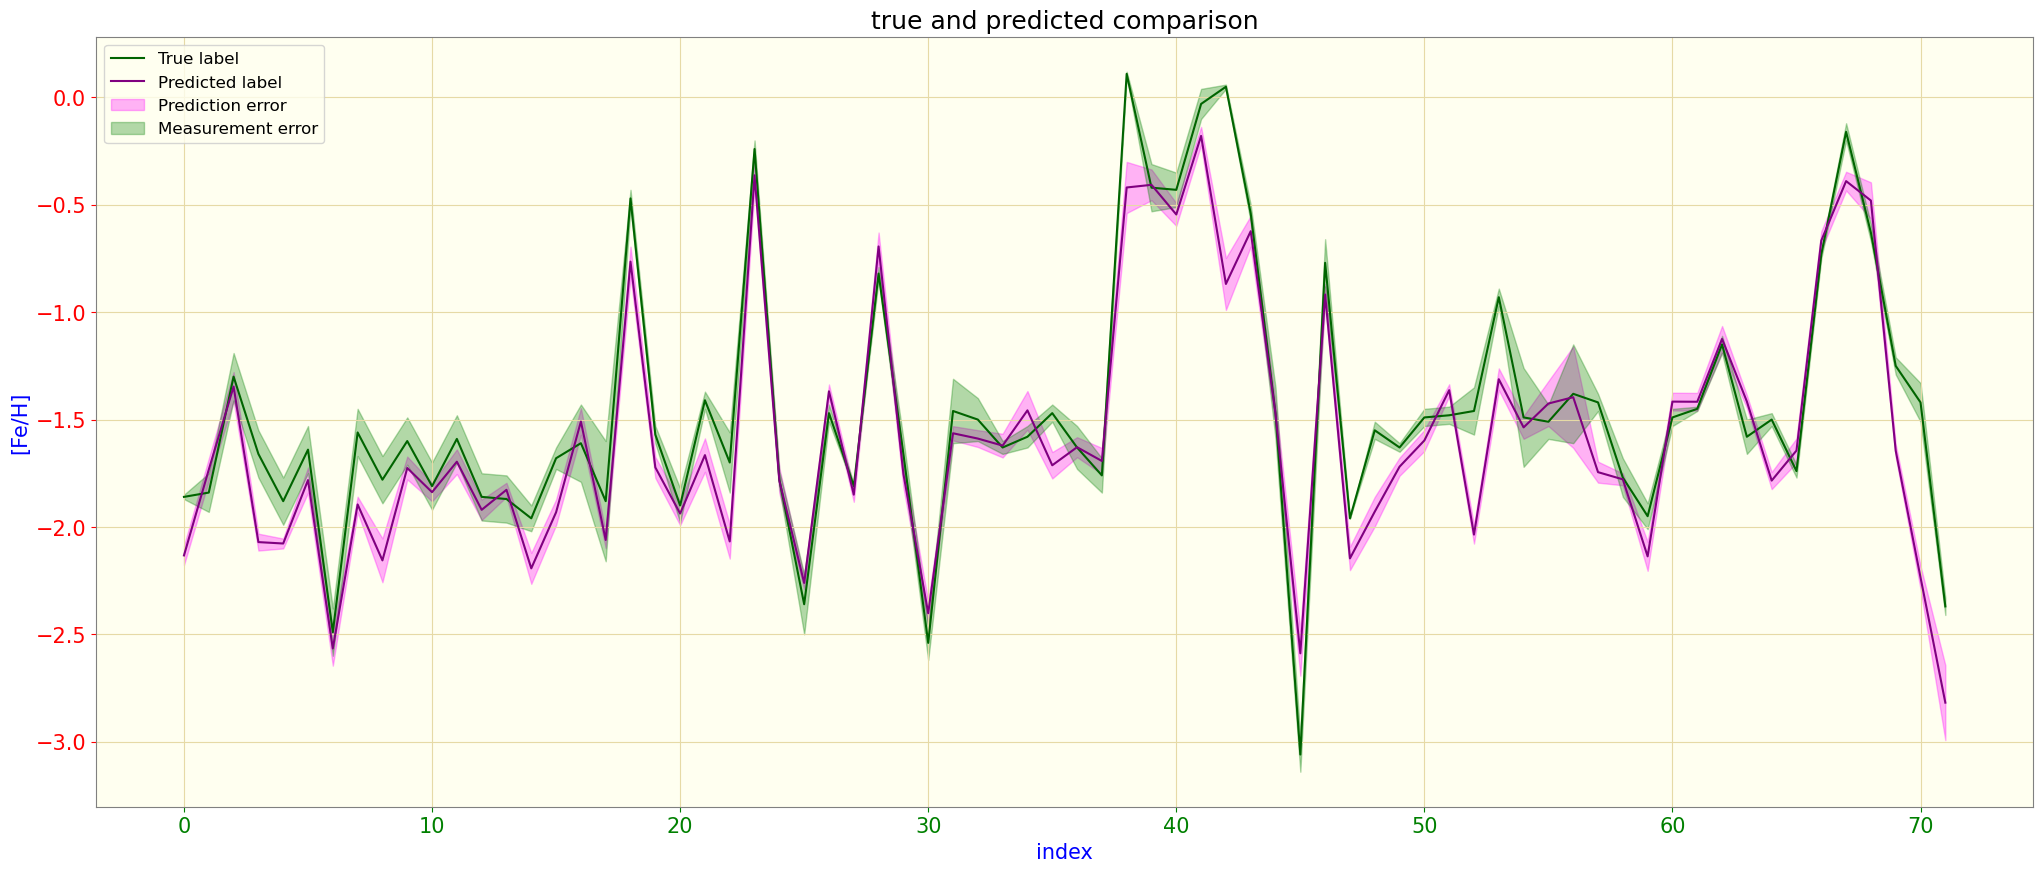

In [ ]:
fig, ax = plt.subplots()


plt.style.use(custom_style_gold)


ax.plot(result.index, result.FeH, color = 'darkgreen', label = 'True label')
ax.plot(result.index, result.FeH_pre, color='purple', label = 'Predicted label')

ax.fill_between(result.index, result.FeH_pre - result.FeHerr_pre, result.FeH_pre + result.FeHerr_pre,
                 color='magenta', alpha=0.3, label = 'Prediction error')

ax.fill_between(result.index, result.FeH - result.FeH_err, result.FeH + result.FeH_err,
                 color='green', alpha=0.3, label = 'Measurement error')

ax.set_xlabel('index')
ax.set_ylabel('[Fe/H]')
ax.set_title('true and predicted comparison')
ax.grid(True)

ax.legend()


print('RMSE:', np.sqrt(mean_squared_error(result.FeH, result.FeH_pre)))

# prediction on Liu dataset (the least accurate one):

In [ ]:
!python rrlfeh_nn.py @gfeh.par

Density weighing is ON with cutoff 0.5
Number of input channels: 2
Number of meta features: 0
Number of devices:  1
Default strategy set for CPU
Global batch size = 256
Batch size per replica = 256
                    id  Nep    period  totamp  meanmag  phcov     snr
0  2536241964258088320   32  0.588994   0.807   14.114  0.917   124.1
1  2638915012894951936   27  0.469400   1.148   16.513  0.853  1178.4
2  2536827282401261568   59  0.527019   1.093   16.468  0.936  1010.1
3  2643864395767909376   31  0.587523   0.679   15.592  0.888   313.5
4  2551464805823863680   32  0.563301   0.940   15.655  0.883  1172.7
----------
2181 lines read from ./Liu/meta.dat

1765 lines after threshold rejections

/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/rrlfeh_nn_utils.py:192: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.DataFrame.hist(df, bins=int(np.ceil(np.cbrt(ndata) * 2)), figsize=(20, 10), grid=False, color='red',
Numb

### Predicted:

In [ ]:
file = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Liu/target_g.out'

data = []
with open(file, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

df_pre_L = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
df_pre_L.columns = {'source_id': '0', 'FeH_pre': '1', 'FeHerr_pre': '2'}
print(df_pre_L.source_id)
print('non duplicate source ids: ', len(df_pre_L.source_id.unique()))

0       2536241964258088320
1       2638915012894951936
2       2536827282401261568
3       2643864395767909376
4       2551464805823863680
               ...         
1760    4550091931093504896
1761     936507899382640768
1762     312130292901682688
1763     852322825233930112
1764    1316840138346618880
Name: source_id, Length: 1765, dtype: int64
non duplicate source ids:  1765


In [ ]:
df_pre_L.head(10)

source_id   FeH_pre  FeHerr_pre
0  2536241964258088320 -2.011536    0.053374
1  2638915012894951936 -1.518255    0.044363
2  2536827282401261568 -1.691826    0.037112
3  2643864395767909376 -2.052467    0.035058
4  2551464805823863680 -1.803651    0.045942
5  2536319582906997248 -1.655943    0.053380
6  2506900736261663360 -1.764356    0.110285
7  2530993372488386176 -1.775829    0.034865
8  2689680353806897152 -1.581154    0.039738
9  2675001912231333632 -1.933200    0.032199

### True :

In [ ]:
df_Metal_Liu = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_liu_new.csv')
df_true_L = df_Metal_Liu[['source_id', 'FeH', 'FeH_err']]
df_true_L

source_id    FeH  FeH_err
0     2536241964258088320 -1.907    0.053
1     2638915012894951936 -1.310    0.094
2     2536827282401261568 -1.565    0.053
3     2643864395767909376 -1.714    0.079
4     2551464805823863680 -1.096    0.127
...                   ...    ...      ...
2184   312130292901682688 -0.501    0.077
2185   852322825233930112 -2.000    0.076
2186  1198863915076552960 -1.649    0.053
2187  1316840138346618880 -0.783    0.076
2188  3834029481648387968 -2.550    0.076

[2189 rows x 3 columns]

In [ ]:
result_L = pd.merge(df_true_L, df_pre_L, how = 'inner', on = 'source_id')
result_L.to_csv('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Liu/only_metal_T_pre_Liu.csv')
#result_L_1 = result_L[:101]
#result_L_1

RMSE: 0.3621766346222779


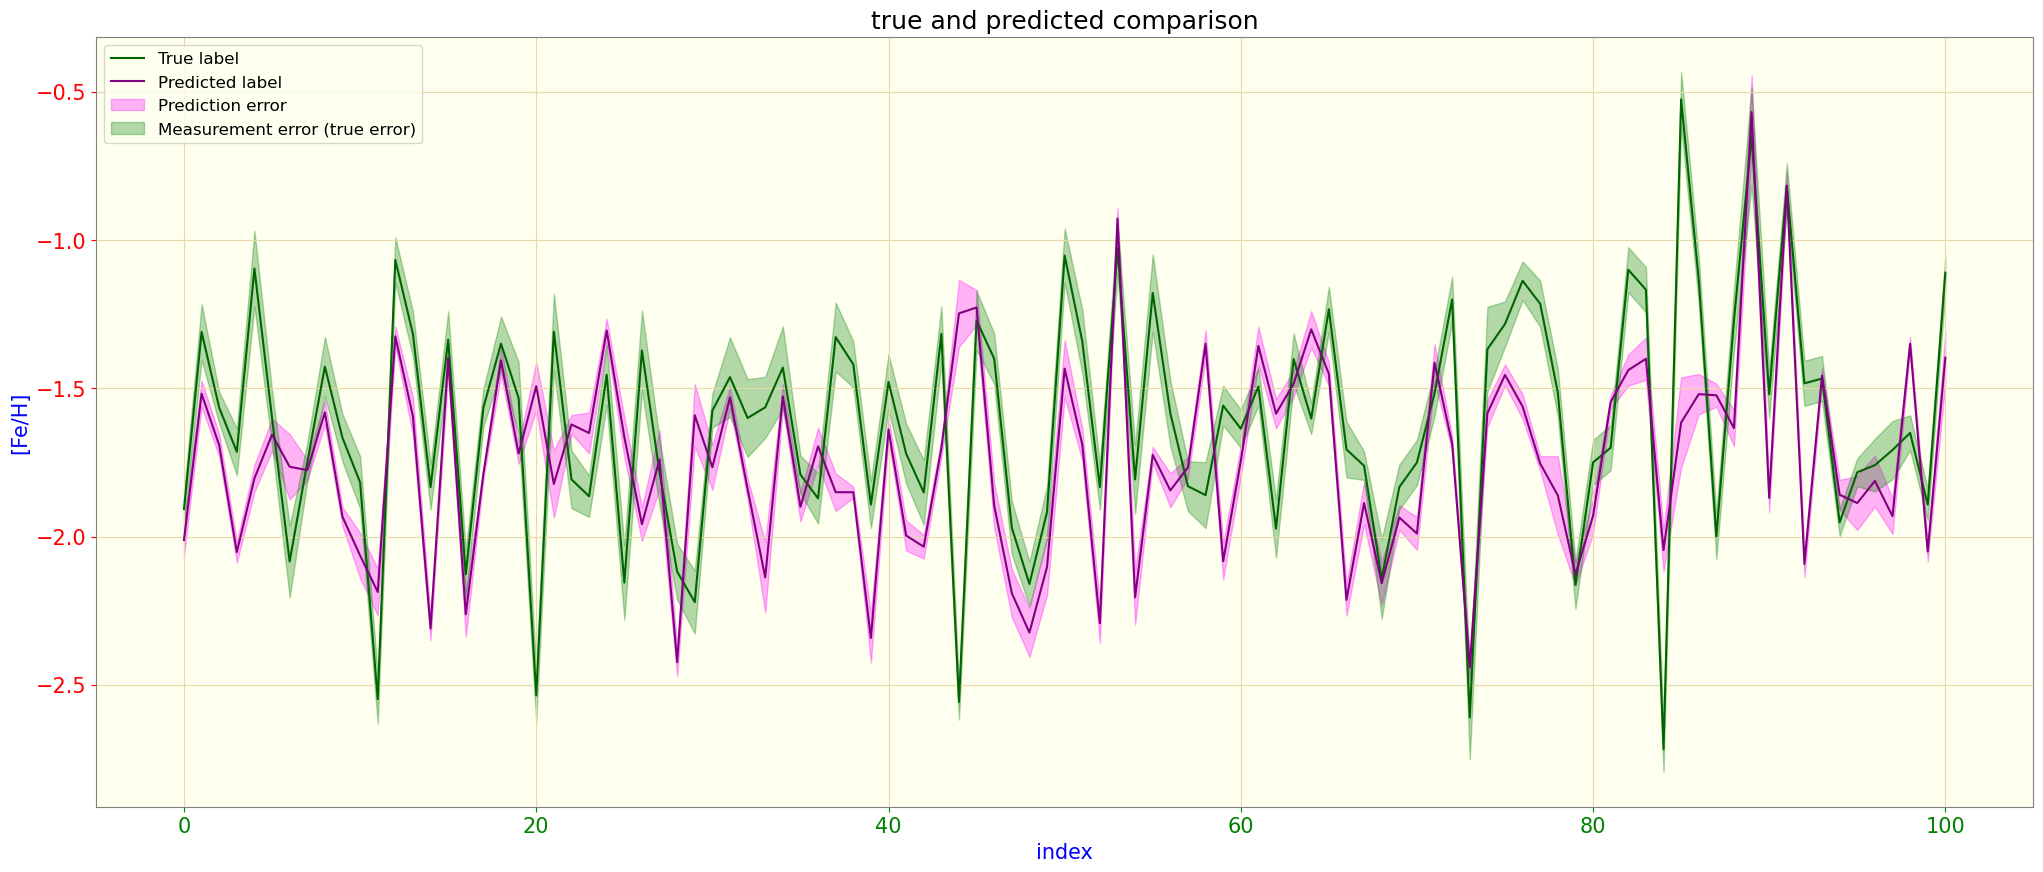

In [ ]:
fig, ax = plt.subplots()




ax.plot(result_L_1.index, result_L_1.FeH, color = 'darkgreen', label = 'True label')
ax.plot(result_L_1.index, result_L_1.FeH_pre, color='purple', label = 'Predicted label')

ax.fill_between(result_L_1.index, result_L_1.FeH_pre - result_L_1.FeHerr_pre, result_L_1.FeH_pre + result_L_1.FeHerr_pre,
                 color='magenta', alpha=0.3, label = 'Prediction error')
ax.fill_between(result_L_1.index, result_L_1.FeH - result_L_1.FeH_err , result_L_1.FeH + result_L_1.FeH_err, color = 'green',
              alpha = 0.3, label = 'Measurement error (true error)')

ax.set_xlabel('index')
ax.set_ylabel('[Fe/H]')
ax.set_title('true and predicted comparison')
ax.grid(True)

ax.legend()


print('RMSE:', np.sqrt(mean_squared_error(result_L.FeH, result_L.FeH_pre)))

# Training:

## Training on the Crestani's dataset:

Crestani has 95 stars that 72 stars are accepted by the model due to the constraints that the model considers. Therefore, we split the data to 70% training and 30% test to see the if the prediction on the Crestani data improves.

### Data processing part:

#### 1. The lcfit creates duplicates, also the meta data needs to have FeH, and FeH_e:

In [ ]:
# data duplication fixed:


file_path_14 = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani/meta.dat'

data = []
header = []
with open(file_path_14, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
            header.append(out_line)
        else:
            line = line.split()
            data.append(line)


df = pd.DataFrame()

df = pd.DataFrame([[x for x in row] for row in data])
df[0] = df[0].astype(int)
header[0].split()
head_dict = {key: value for key, value in zip(header[0].split(), df.columns) }
df.columns = head_dict
df.drop_duplicates(inplace= True)
df.reset_index(drop = True)

df

id Nep    period totamp     A1     A2     A3   A1_e  \
0    6380659528686603008  49  0.550067  0.994  0.319  0.152  0.124  0.002   
1    5412243359495900928  59  0.573507  0.745  0.278  0.130  0.080  0.004   
2    4055098870077726976  40  0.427283  1.374  0.401  0.188  0.052  0.004   
3    6735230515154698880  21  0.367551  1.033  0.344  0.208  0.110  0.018   
4    2973954279102006656  67  0.656177  0.744  0.259  0.131  0.077  0.006   
..                   ...  ..       ...    ...    ...    ...    ...    ...   
167  4473628559603349888  38  0.380686  1.179  0.388  0.214  0.140  0.002   
168  3839232130153219456  42  0.547791  0.915  0.310  0.158  0.107  0.002   
169  6897755139944897024  30  0.797453  0.679  0.257  0.117  0.068  0.003   
170  6836508627130440064  45  0.800075  0.533  0.200  0.092  0.054  0.001   
171  6589892159047076096  48  0.959801  1.182  0.425  0.188  0.130  0.002   

      A2_e   A3_e  ... meanmag_e    cost aper  phcov phcov2     snr   ZPErr  \
0    0.002  0.002  ...     0.001  0.0026    1  0.895  0.924  1131.3  0.0000   
1    0.004  0.005  ...     0.003  0.0100    1  0.928  0.946   312.0  0.0000   
2    0.004  0.004  ...     0.003  0.0079    1  0.886  0.907   694.7  0.0000   
3    0.012  0.020  ...     0.022  0.1228    1  0.822  0.866   162.6  0.0000   
4    0.007  0.007  ...     0.005  0.0360    1  0.944  0.944   180.9  0.0000   
..     ...    ...  ...       ...     ...  ...    ...    ...     ...     ...   
167  0.002  0.002  ...     0.002  0.0047    1  0.905  0.921  1215.2  0.0000   
168  0.002  0.002  ...     0.002  0.0028    1  0.920  0.901   760.9  0.0000   
169  0.003  0.003  ...     0.002  0.0009    1  0.901  0.767   509.7  0.0000   
170  0.001  0.001  ...     0.001  0.0002    1  0.843  0.910  1122.6  0.0000   
171  0.002  0.002  ...     0.002  0.0032    1  0.854  0.904  1238.3  0.0000   

    Npt order minmax  
0    49     6  0.845  
1    59     6  0.762  
2    40     5  0.892  
3    21     5  1.044  
4    67     5  0.812  
..   ..   ...    ...  
167  38     6  1.165  
168  42     6  0.894  
169  30     6  0.688  
170  45     6  0.529  
171  48     6  1.030  

[95 rows x 31 columns]

In [ ]:
# this is thge metallicity error dataset that we want to add to the final dat file for the input to the dataset.
df_new = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani_new.csv')
df_new[['source_id','FeH', 'FeH_err']]
df_new = df_new.rename(columns = {'source_id': 'id', 'FeH_err': 'FeH_e'})
df_new = df_new[['id', 'FeH', 'FeH_e']]
meta_train = pd.merge(df_new, df, on= 'id', how = 'inner')
meta_train.to_csv('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani_T/meta_train.csv')

In [ ]:
meta_train.id = meta_train.id.astype(str)
meta_train.FeH = meta_train.FeH.astype(str)
meta_train.FeH_e = meta_train.FeH_e.astype(str)
meta_train.head(5)

id    FeH FeH_e Nep    period totamp     A1     A2     A3  \
0  6380659528686603008  -1.86  0.01  49  0.550067  0.994  0.319  0.152  0.124   
1  5412243359495900928  -1.84  0.09  59  0.573507  0.745  0.278  0.130  0.080   
2  4055098870077726976   -1.3  0.11  40  0.427283  1.374  0.401  0.188  0.052   
3  6735230515154698880  -0.17  0.04  21  0.367551  1.033  0.344  0.208  0.110   
4  2973954279102006656  -1.66  0.11  67  0.656177  0.744  0.259  0.131  0.077   

    A1_e  ... meanmag_e    cost aper  phcov phcov2     snr   ZPErr Npt order  \
0  0.002  ...     0.001  0.0026    1  0.895  0.924  1131.3  0.0000  49     6   
1  0.004  ...     0.003  0.0100    1  0.928  0.946   312.0  0.0000  59     6   
2  0.004  ...     0.003  0.0079    1  0.886  0.907   694.7  0.0000  40     5   
3  0.018  ...     0.022  0.1228    1  0.822  0.866   162.6  0.0000  21     5   
4  0.006  ...     0.005  0.0360    1  0.944  0.944   180.9  0.0000  67     5   

  minmax  
0  0.845  
1  0.762  
2  0.892  
3  1.044  
4  0.812  

[5 rows x 33 columns]

In [ ]:
file_path_dat = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani_T/meta_train.dat'

with open(file_path_dat, 'w') as f:
    head = '  '.join(meta_train.columns)
    f.write('# '+ head + '\n')
    data = []
    for i in range(len(meta_train)):
        l = ''
        for j in range(len(meta_train.columns)):

            if j == 0:
                l = l + meta_train.iloc[i, j] + '   ' # between id and the next column there is a three space gap
            elif j == 30:
                l =  l + '   ' + meta_train.iloc[i, j]
            elif j == 31:
                l =  l + '  ' + meta_train.iloc[i, j]
            else:
                l =  l + ' ' + meta_train.iloc[i, j]

        data.append(l)

    for line in data:
        f.write(line + '\n')




#### now the data is ready for the transfer learning:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, Masking
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras import Input, Model
from keras.models import model_from_json
import glob
import os
import io

In [ ]:
import configparser
import sys
import importlib
import os
import glob
import numpy as np
import joblib
import tensorflow as tf
import rrlfeh_nn_utils as ut
import rrlfeh_nn_models as mm
import rrlfeh_nn_io as io
from time import time
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import RepeatedStratifiedKFold, GroupKFold
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler

importlib.reload(io)
importlib.reload(ut)
importlib.reload(mm)
tic = time()

# A Class Dictionary For Parameter file: (needs a couple of modifications)

In [ ]:
def find_hashtag_index(line):
    index = line.find("#")
    return index



class Parameters:
    def __init__(self, dictionary):
        self.__dict__ = dictionary


par_file_path = 'gfeh.par'


parameters = {}


with open(par_file_path, 'r') as file:
    for line in file:


        if line.startswith('--'):

            line = line.replace('--', '')

            if len(line.split()) == 1:
                key = line.split()
                parameters[key[0]] = True

            elif len(line.split()) == 2:
                key, value = line.split()
                if value.isdigit():
                    parameters[key] = int(value)
                elif '.' in value and all(char.isdigit() or char == '.' for char in value):
                    parameters[key] = float(value)
                else:
                    parameters[key] = value




            elif len(line.split()) > 1:

                if find_hashtag_index(line) == -1:

                    if len(line.split()) > 2 : # for columns we want ['column_1', 'column_2', ....]
                        key, value = (line.split()[0], ' '.join([x for x in line.split()[1:]]))

                        if key != 'subset':
                            key, value = (line.split()[0], [x for x in line.split()[1:]])
                            parameters[key] = value

                        else:
                            parameters[key] = value


                    else:
                        key, value = (line.split()[0], line.split()[1])
                        parameters[key] = value




                else:
                    line = line[:line.index('#')]
                    if len(line.split()) == 1:
                        key = line.split()
                        parameters[key[0]] = True
                    elif len(line.split()) == 2:
                        key, value = (line.split())
                        parameters[key] = value
                    else:
                        key, value = (line.split()[0], ' '.join([x for x in line.split()[1:]]))
                        parameters[key] = value



        elif line.startswith('#--'):
            line = line.replace('#--', '')
            key = line.split()
            parameters[key[0]] = None


        else:
            pass



In [ ]:
parameters

{'seed': 42,
 'train': True,
 'predict': None,
 'refit': None,
 'cross_validate': True,
 'nn_type': 'rnn',
 'verbose': True,
 'rootdir': './',
 'outdir': 'Crestani_T/results',
 'input_model_dir': 'results_g/best_model_g',
 'lcdir': 'Crestani_T/DR3_LC_g',
 'input_file': 'Crestani_T/meta_train.dat',
 'target_output_file': 'Crestani_T/target_g.out',
 'wavebands': 'g',
 'lcfile_suffices': '.dat',
 'predict_train_output': 'Crestani_T/predict_train_gfeh',
 'predict_val_output': 'Crestani_T/predict_val_gfeh',
 'predict_test_output': 'Crestani_T/predict_test_gfeh',
 'plot_input_data': True,
 'n_aug': None,
 'save_model': True,
 'save_checkpoints': None,
 'model_file_prefix': 'model',
 'weights_file_prefix': 'weights',
 'metascaler_file': 'gfeh_scaler',
 'log_training': True,
 'plot_prediction': True,
 'nbins': None,
 'max_phase': 1.0,
 'columns': None,
 'features': None,
 'subset': None,
 'meta_input': None,
 'explicit_test_frac': None,
 'weighing_by_density': 0.5,
 'eval_metric': 'r2',
 'k_fo

In [ ]:
pars = Parameters(parameters)
pars.lcdir = ['Crestani_T/DR3_LC_g']
pars.lcfile_suffices = ['.dat']
pars.liveplotname = None

Number of devices:  1
Default strategy set for CPU
Global batch size = 256
Batch size per replica = 256
                    id   FeH  FeH_e  Nep    period  totamp     A1     A2  \
0  6380659528686603008 -1.86   0.01   49  0.550067   0.994  0.319  0.152   
1  5412243359495900928 -1.84   0.09   59  0.573507   0.745  0.278  0.130   
2  4055098870077726976 -1.30   0.11   40  0.427283   1.374  0.401  0.188   
3  6735230515154698880 -0.17   0.04   21  0.367551   1.033  0.344  0.208   
4  2973954279102006656 -1.66   0.11   67  0.656177   0.744  0.259  0.131   

      A3   A1_e  ...  meanmag_e    cost  aper  phcov  phcov2     snr  ZPErr  \
0  0.124  0.002  ...      0.001  0.0026     1  0.895   0.924  1131.3    0.0   
1  0.080  0.004  ...      0.003  0.0100     1  0.928   0.946   312.0    0.0   
2  0.052  0.004  ...      0.003  0.0079     1  0.886   0.907   694.7    0.0   
3  0.110  0.018  ...      0.022  0.1228     1  0.822   0.866   162.6    0.0   
4  0.077  0.006  ...      0.005  0.0360     

/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/rrlfeh_nn_utils.py:192: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.DataFrame.hist(df, bins=int(np.ceil(np.cbrt(ndata) * 2)), figsize=(20, 10), grid=False, color='red',


Number of input phase points: 80

Plotting input data...


Reading time series...


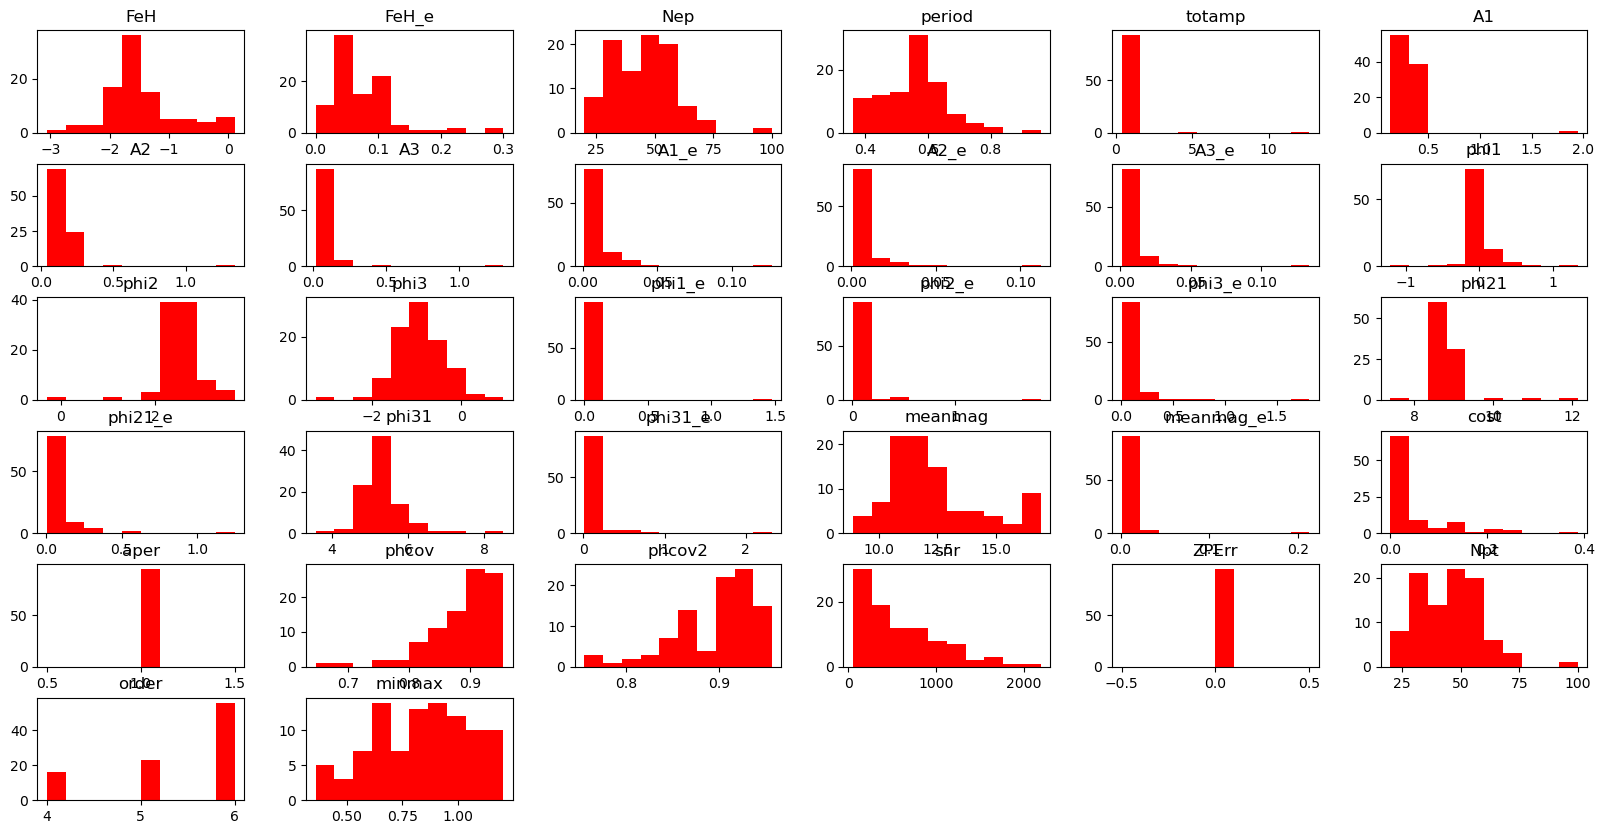

In [ ]:
fehcolname = 'FeH'  # column name for the metallicity in the input file
feherrcolname = 'FeH_e'  # column name for the metallicity error in the input file
# idcolumn = 'gaia_DR2_source_id'    # column name for the identifier in the input file
idcolumn = "id"    # column name for the identifier in the input file
figformat = "pdf"
figsuffix = ""
indx_highlight = 40  # index of the input time series to be highlighted on the plots
checkpoint_period = 200  # After how many epochs should model weights be saved?
# nmags = 100  # number of phase points in synthetic light-curves for CNN
nmags = 80
nuse = 3  # use every nuse-th phase as an input feature ( => floor(nmags/nuse) features) for CNN
# Print results for every hyper-parameter combo in CV?
info_gridcv = True
# Minimum number of folds for k_fold CV. If pars.k_fold < min_folds_cv, then stratified shuffle-split is used.
min_folds_cv = 5
min_learning_rate = 1e-3
lr_increment_coeff = 0.48  # at each epoch, min_learning_rate will be multiplied by 10 ** (epoch * lr_increment_coeff)
validation_freq = 1

# ------------------------------
#  COMMAND-LINE PARAMETERS:

# Read parameters from a file or from the command line:
#parser = io.argparser()
# print(len(sys.argv))
#if len(sys.argv) == 1:
    # use default name for the parameter file
#    pars = parser.parse_args([io.default_parameter_file])
#else:
#    pars = parser.parse_args()

#pars = ut.process_input_parameters(pars, min_folds_cv=min_folds_cv)
#np.random.seed(seed=pars.seed)      # random seed for data shuffling

# ------------------------------------------
# SET UP DEVICE(S):

# Check the number of GPUs and set identical memory growth:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # check if there are any GPUs
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print("Number of GPUs:", len(gpus), "physical,", len(logical_gpus), "logical")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

    n_gpus = len(gpus)
else:
    n_gpus = 0

# Set up strategy for multi / single GPU or CPU:

if n_gpus > 1:
    # Calculate batch size in case of multi-device parallel training using mirrored strategy:
    strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
    n_devices = strategy.num_replicas_in_sync
    print("Number of devices: ", n_devices)
    print('Mirrored strategy set for GPUs: ')
    for gpu in gpus:
        print(gpu.name)
    batch_size = pars.batch_size_per_replica * strategy.num_replicas_in_sync

elif n_gpus == 1:
    strategy = tf.distribute.get_strategy()     # default strategy that works on CPU and single GPU
    n_devices = strategy.num_replicas_in_sync
    print("Number of devices: ", n_devices)
    print('Default strategy set for GPU: ', gpus[0].name)
    batch_size = pars.batch_size_per_replica

else:
    strategy = tf.distribute.get_strategy()     # default strategy that works on CPU and single GPU
    n_devices = strategy.num_replicas_in_sync
    print("Number of devices: ", n_devices)
    print('Default strategy set for CPU')
    batch_size = pars.batch_size_per_replica

print("Global batch size = {}".format(batch_size))
print("Batch size per replica = {}".format(pars.batch_size_per_replica))

# ------------------------------------------
# LOSS, METRICS, OPTIMIZATION, MODEL:

# Set the loss, val. metrics, and the optmization algorithm:
with strategy.scope():
    loss = tf.keras.losses.MeanSquaredError()
    # loss = ut.HuberLoss(threshold=0.2)
    # performance evaluation metric to report during training:
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=pars.lr, beta_1=0.9, beta_2=0.999,
                                         epsilon=1e-07, amsgrad=False)
    # metrics = [tf.keras.metrics.RootMeanSquaredError(), ut.get_lr_metric(optimizer)]
    metrics = [tf.keras.metrics.RootMeanSquaredError()]

model = mm.available_models[pars.model]

# model = mm.conv3_2c_f233s1p3s2_gmp_fc64
# model = mm.cnn3_fc_model
# model = mm.lstm2_fc1_model
# model = mm.lstm2_model
# model = mm.bilstm2rd_fc1_model
# model = mm.bilstm2p_model

# ======================================================================================================================
#                                         D A T A    I N P U T

# ------------------------------------------
# READ AND SUBSET THE INPUT METADATA:

input_table, _ = ut.read_dataset(os.path.join(pars.rootdir, pars.input_file), columns=pars.columns,
                                 subset_expr=pars.subset, input_feature_names=pars.features, plothist=True,
                                 histfig=os.path.join(pars.rootdir, pars.outdir, "gfeh_nn_input_table_hist.png"),
                                 dropna_cols=None, comment='#', dtype={idcolumn: str})
n_data = len(input_table)
if pars.nn_type == "cnn":
    nmags = int(nmags / nuse)
else:
    if pars.nbins is not None:
        nmags = pars.nbins

print("Number of input phase points: {}".format(nmags))

ids = input_table[idcolumn].to_numpy().astype(str)
np.savetxt(os.path.join(pars.rootdir, pars.outdir, 'used_ids.lst'), ids.T, fmt="%s")

# Create data matrix for input layer 2 from time-series metadata:
if pars.meta_input is not None:
    X_meta_list = [input_table[feature].to_numpy() for feature in pars.meta_input]
    X_input2 = np.vstack(X_meta_list).T
    print("Shape of the input metadata matrix: {}".format(X_input2.shape))
else:
    X_input2 = None

# ------------------------------------------
# READ (AND PLOT) THE INPUT TIME SERIES:

if pars.nn_type == "cnn":
    # Read time series for a convolutional neural network
    X_input1, X_ts, X_ts_scaled, phases, groups = \
        ut.read_time_series_for_cnn(ids, pars.lcdir, nmags, pars.wavebands, pars.lcfile_suffices,
                                    rootdir=pars.rootdir, nuse=nuse, n_aug=pars.n_aug)
    # Plot input data:
    if pars.plot_input_data:
        for ii, waveband in enumerate(pars.wavebands):
            print("Plotting input data...")

            ut.plot_all_lc(phases, X_ts[waveband], nmags=nmags, shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, pars.outdir, waveband + "_lc_all"),
                           figformat=figformat)
            ut.plot_all_lc(phases, X_ts_scaled[waveband], nmags=nmags, shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, pars.outdir, waveband + "_lc_all_scaled"),
                           figformat=figformat)
            if X_input2 is not None:
                ut.plot_period_amplitude(X_input2, col=1 + ii, waveband=waveband, figformat=figformat,
                                         fname=os.path.join(pars.rootdir, pars.outdir, "logpP-A_" + waveband))

else:
    # Read time series for a recurrent neural network
    pars.n_aug = None  # augmented version not yet implemented
    groups = None
    if pars.meta_input:
        periods_input = None
    else:
        periods_input = input_table['period'].to_numpy()
    X_input1, times, mags, phases = \
        ut.read_time_series_for_rnn(ids, pars.lcdir, nmags, pars.wavebands,
                                    pars.lcfile_suffices, rootdir=pars.rootdir,
                                    periods=periods_input, max_phase=pars.max_phase, phase_shift=None, nbins=pars.nbins)

    # Plot input data:
    if pars.plot_input_data:
        print("Plotting input data...")
        for ii, waveband in enumerate(pars.wavebands):
            ut.plot_all_lc(phases[waveband], mags[waveband], shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, waveband + "_lc_all_rnn"),
                           figformat=figformat, nn_type="rnn")

In [ ]:
input_table

id   FeH  FeH_e  Nep    period  totamp     A1     A2  \
0   6380659528686603008 -1.86   0.01   49  0.550067   0.994  0.319  0.152   
1   5412243359495900928 -1.84   0.09   59  0.573507   0.745  0.278  0.130   
2   4055098870077726976 -1.30   0.11   40  0.427283   1.374  0.401  0.188   
3   6735230515154698880 -0.17   0.04   21  0.367551   1.033  0.344  0.208   
4   2973954279102006656 -1.66   0.11   67  0.656177   0.744  0.259  0.131   
..                  ...   ...    ...  ...       ...     ...    ...    ...   
90  4473628559603349888 -0.63   0.04   38  0.380686   1.179  0.388  0.214   
91  3839232130153219456 -1.25   0.04   42  0.547791   0.915  0.310  0.158   
92  6897755139944897024 -1.42   0.09   30  0.797453   0.679  0.257  0.117   
93  6836508627130440064 -2.44   0.03   45  0.800075   0.533  0.200  0.092   
94  6589892159047076096 -2.37   0.04   48  0.959801   1.182  0.425  0.188   

       A3   A1_e  ...  meanmag_e    cost  aper  phcov  phcov2     snr  ZPErr  \
0   0.124  0.002  ...      0.001  0.0026     1  0.895   0.924  1131.3    0.0   
1   0.080  0.004  ...      0.003  0.0100     1  0.928   0.946   312.0    0.0   
2   0.052  0.004  ...      0.003  0.0079     1  0.886   0.907   694.7    0.0   
3   0.110  0.018  ...      0.022  0.1228     1  0.822   0.866   162.6    0.0   
4   0.077  0.006  ...      0.005  0.0360     1  0.944   0.944   180.9    0.0   
..    ...    ...  ...        ...     ...   ...    ...     ...     ...    ...   
90  0.140  0.002  ...      0.002  0.0047     1  0.905   0.921  1215.2    0.0   
91  0.107  0.002  ...      0.002  0.0028     1  0.920   0.901   760.9    0.0   
92  0.068  0.003  ...      0.002  0.0009     1  0.901   0.767   509.7    0.0   
93  0.054  0.001  ...      0.001  0.0002     1  0.843   0.910  1122.6    0.0   
94  0.130  0.002  ...      0.002  0.0032     1  0.854   0.904  1238.3    0.0   

    Npt  order  minmax  
0    49      6   0.845  
1    59      6   0.762  
2    40      5   0.892  
3    21      5   1.044  
4    67      5   0.812  
..  ...    ...     ...  
90   38      6   1.165  
91   42      6   0.894  
92   30      6   0.688  
93   45      6   0.529  
94   48      6   1.030  

[95 rows x 33 columns]

In [ ]:
# handling the 0.0 error ! cheating

for i in range(95):
    if input_table.iloc[i, 2] == 0.0:
        input_table.iloc[i, 2] = 0.01

In [ ]:
if pars.train == True:

    print("Training epochs = " + str(pars.n_epochs))
    print("Learning rate = " + str(pars.lr))
    print("Learning rate decay = " + str(pars.decay))

    hparams_best = None

    # COMPUTE SAMPLE WEIGHTS:

    Y_input = input_table['FeH'].to_numpy()
    Y_e_input = input_table['FeH_e'].to_numpy()

    weights, weights_var, weights_dens = \
        ut.compute_sample_weights(Y_input, y_err=Y_e_input, by_variance=True, by_density=pars.weighing_by_density,
                                  scaled=True, plot=True,
                                  filename=os.path.join(pars.rootdir, pars.outdir,
                                                        "Y_density_weighting"),
                                  xlabel="$[Fe/H]_I$",
                                  figformat=figformat)
    np.any(np.isinf(weights))

    # ------------------------------------------
    # DEFINE DEVELOPMENT (TRAINING + CV) AND TEST SETS: (defining the dev arrays)

    dev_list, test_list = ut.dev_test_split(X_input1, X_input2, Y_input, ids, weights, weights_var,
                                            test_frac=pars.split_frac, groups=groups, seed=pars.seed)
    X_dev1, X_dev2, Y_dev, ids_dev, weights_dev, weights_var_dev = dev_list
    n_dev = Y_dev.shape[0]

    print("n_dev = " + str(n_dev))
    if test_list is not None:
        n_test = test_list[0].shape[0]
        print("n_test  = " + str(n_test))
    else:
        print("No explicit test sample.")


Training epochs = 500
Learning rate = 0.01
Learning rate decay = 5e-05
n_dev = 57
n_test  = 38


In [ ]:
# ------------------------------------------
# CHOOSE CROSS-VALIDATION METHOD:

if pars.k_fold >= min_folds_cv:
    splitter = RepeatedStratifiedKFold(n_splits=pars.k_fold, n_repeats=pars.n_repeats, random_state=pars.seed)
else:
    print('Cross-validation will be performed by stratified shuffle-split because k_fold < {}'.format(min_folds_cv))
    if pars.n_aug is not None:
        sys.exit('Cannot handle augmented data because scikit-learn.model_selection.StratifiedShuffleSplit'
                 'does not implement group labels. Please specify a k_fold >= {} in order to perform'
                 'repeated stratified k-fold CV instead.'.format(min_folds_cv))
    else:
        splitter = StratifiedShuffleSplit(n_splits=pars.k_fold, test_size=pars.split_frac, random_state=pars.seed)
        pars.n_repeats = 1

# ------------------------------------------

In [ ]:
# PREPARE ARRAY FOR STRATIFICATION IN Y:

isort = np.argsort(Y_dev)  # Indices of sorted Y values
yi = np.zeros(n_dev)
yi[isort] = np.arange(n_dev)  # Compute Y value order
yi = np.floor(yi / 20).astype(int)  # compute phase labels for RepeatedStratifiedKFold
if np.min(np.bincount(yi.astype(int))) < pars.k_fold:  # If too few elements are with last label, ...
    yi[yi == np.max(yi)] = np.max(yi) - 1  # ... the then change that label to the one preceding it

In [ ]:
metascaler = StandardScaler(copy=True, with_mean=True, with_std=True)
splitter.random_state = pars.seed
folds = list(splitter.split(X_dev1, yi, groups=groups))

In [ ]:

model_kwargs = {'n_timesteps': nmags, 'n_channels': 2,'n_meta': 57, 'hparams': [16, 16, "l1", 5e-6, 5e-6, 0, 0, 0.1, 0.1] }

compile_kwargs = {'optimizer': optimizer, 'loss': loss, 'metrics': metrics}

In [ ]:
hparams_trial = [16, 16, "l1", 5e-6, 5e-6, 0, 0, 0.1, 0.1]

In [ ]:
# min_delta is a string, rectify it in the parameter file.
# n_epochs is a string again !!!!!
callbacks = ut.setup_callbacks(auto_stop=pars.auto_stop, min_delta=float(pars.min_delta), patience=pars.patience,optimize_lr=pars.optimize_lr, min_learning_rate=min_learning_rate,
                               n_training_epochs=int(pars.n_epochs),
                                lr_increment_coeff=lr_increment_coeff,
                                is_checkpoint=pars.save_checkpoints, checkpoint_period=checkpoint_period,
                                save_model=pars.save_model, n_zoom=pars.n_zoom, n_update=pars.n_update,
                                eval_metrics=['root_mean_squared_error'], figname='performance')

In [ ]:
y = Y_dev

sample_weight_fit= weights_dev

sample_weight_eval = weights_var_dev

In [ ]:
# Prepare input data:
# -------------------
if pars.meta_input:
    X_dev = (X_dev1, X_dev2)
    indices_to_scale = (1,)

else:
    X_dev = (X_dev1,)
    indices_to_scale = None



histories = list()
model_weights = list()
scalers_folds = list()
Y_train_collected = np.array([])
Y_val_collected = np.array([])
Y_train_pred_collected = np.array([])
Y_val_pred_collected = np.array([])
fitting_weights_train_collected = np.array([])
fitting_weights_val_collected = np.array([])
eval_weights_train_collected = np.array([])
eval_weights_val_collected = np.array([])
ids_train_collected = np.array([])
ids_val_collected = np.array([])
numcv_t = np.array([])
numcv_v = np.array([])
first_fold = True



if ids is None:

    # create IDs by simply numbering the data
    ids = np.linspace(1, y.shape[0], y.shape[0]).astype(int)

for i_cv, (train_index, val_index) in enumerate(folds):

        # if pick_fold is not None and pick_fold != i_cv + 1:
        if pars.pick_fold is not None and i_cv + 1 not in pick_fold:
            continue
        tf.keras.backend.clear_session() # clears the keras computation, not the weights
        tf.random.set_seed(pars.seed)
        #model_kwargs['hparams'] = model_kwargs['hparams'].split() # if have some error activate this
        if strategy is not None:
            with strategy.scope():
                model_ = model(**model_kwargs) # Apply distributed strategy on model if multiple devices are present:

        else:
            model_ = model(**model_kwargs)


        #------ Transfer learning---------



        model_.load_weights('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/results_g/best_model_g/weights_4.h5')
        # freezing the the in-between layers:
        input_layer = model_.layers[0]
        output_layer = model_.layers[-1]
        model_.layers[0].trainable = True
        model_.layers[-1].trainable = True
        for layer in model_.layers[1: -1]:
            layer.trainable = False

        if strategy is not None:
            with strategy.scope():
                model_.compile(**compile_kwargs)
        else:
            model_.compile(**compile_kwargs)

        print("fold " + str(i_cv + 1) + "/" + str(len(folds)))
        print("n_train = {}  ;  n_val = {}".format(train_index.shape[0], val_index.shape[0]))

        # This is the log_prefix defined for the op.path.join function below:
        run_tag = model.__name__ + "_w" + str(pars.weighing_by_density) + \
        "__" + '_'.join(map(str, hparams_trial)) + "_" \
        "_lr" + str(pars.lr) + "_Nb" + str(batch_size)



        if pars.log_training:
            callbacks_fold = callbacks + [tf.keras.callbacks.CSVLogger(
                os.path.join(pars.rootdir, run_tag + f"_fold{i_cv + 1}.log"))]
        else:
            callbacks_fold = callbacks

        # --------------------------------------------------
        # Split the arrays to training and validations sets:

        x_train_list = list()
        x_val_list = list()
        scalers = list()
        for i, x in enumerate(X_dev):
            x_t, x_v = x[train_index ], x[val_index ]
            if indices_to_scale is not None and i in indices_to_scale:
                scaler.fit(x_t)
                x_t = scaler.transform(x_t)
                x_v = scaler.transform(x_v)
                scalers.append(scaler.copy())
            x_train_list.append(x_t)
            x_val_list.append(x_v)
        y_train, y_val = y[train_index], y[val_index]
        if sample_weight_fit is not None:
            fitting_weights_train, fitting_weights_val = sample_weight_fit[train_index], sample_weight_fit[val_index]
        else:
            fitting_weights_train, fitting_weights_val = None, None

        if sample_weight_eval is not None:
            eval_weights_train, eval_weights_val = sample_weight_eval[train_index], sample_weight_eval[val_index]
        else:
            eval_weights_train, eval_weights_val = None, None

        ids_t, ids_v = ids[train_index], ids[val_index]

        # --------------------------------------------------
        # Fit and evaluate the model for this fold:


        history = model_.fit(x=x_train_list, y=y_train, sample_weight=fitting_weights_train,
                             epochs=int(pars.n_epochs), initial_epoch=0, batch_size=int(batch_size), shuffle=True,
                             validation_data=(x_val_list, y_val, fitting_weights_val),
                             verbose=pars.verbose, callbacks=callbacks_fold, validation_freq=validation_freq)
        Y_train_pred = (model_.predict(x_train_list)).flatten()
        Y_val_pred = (model_.predict(x_val_list)).flatten()
        histories.append(history)
        model_weights.append(model_.get_weights())
        scalers_folds.append(scalers.copy())








fold 1/10
n_train = 51  ;  n_val = 6
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.3203WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 7s 7s/step - loss: 0.0138 - root_mean_squared_error: 0.3203 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1616 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.3061WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0134 - root_mean_squared_error: 0.3061 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1621 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0210 - root_mean_squared_error: 0.3043WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0210 - root_mean_squared_error: 0.3043 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1626 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.2719WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0122 - root_mean_squared_error: 0.2719 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1631 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0233 - root_mean_squared_error: 0.3150WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0233 - root_mean_squared_error: 0.3150 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1637 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0216 - root_mean_squared_error: 0.3201WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0216 - root_mean_squared_error: 0.3201 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1643 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0192 - root_mean_squared_error: 0.2948WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0192 - root_mean_squared_error: 0.2948 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1650 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0185 - root_mean_squared_error: 0.2969WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0185 - root_mean_squared_error: 0.2969 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1656 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.3219WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0126 - root_mean_squared_error: 0.3219 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1662 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0260 - root_mean_squared_error: 0.3175WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0260 - root_mean_squared_error: 0.3175 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1668 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.3001WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0147 - root_mean_squared_error: 0.3001 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1675 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.3099WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0147 - root_mean_squared_error: 0.3099 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1681 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.3267WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0177 - root_mean_squared_error: 0.3267 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1688 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0219 - root_mean_squared_error: 0.3260WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0219 - root_mean_squared_error: 0.3260 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1695 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.2922WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0122 - root_mean_squared_error: 0.2922 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1702 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0188 - root_mean_squared_error: 0.3086WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0188 - root_mean_squared_error: 0.3086 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1709 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0204 - root_mean_squared_error: 0.3262WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0204 - root_mean_squared_error: 0.3262 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1716 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.3008WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0147 - root_mean_squared_error: 0.3008 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1724 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0156 - root_mean_squared_error: 0.3110WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0156 - root_mean_squared_error: 0.3110 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1731 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.2906WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0164 - root_mean_squared_error: 0.2906 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1739 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.3082WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0143 - root_mean_squared_error: 0.3082 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1746 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.3001WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0129 - root_mean_squared_error: 0.3001 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1754 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.2912WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0142 - root_mean_squared_error: 0.2912 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1761 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.2984WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0105 - root_mean_squared_error: 0.2984 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1768 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.2873WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0111 - root_mean_squared_error: 0.2873 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1775 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0135 - root_mean_squared_error: 0.2926WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0135 - root_mean_squared_error: 0.2926 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1783 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.2865WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0148 - root_mean_squared_error: 0.2865 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1790 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.3156WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0122 - root_mean_squared_error: 0.3156 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1798 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0208 - root_mean_squared_error: 0.3193WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0208 - root_mean_squared_error: 0.3193 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1806 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0150 - root_mean_squared_error: 0.3084WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0150 - root_mean_squared_error: 0.3084 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1814 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.2842WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0159 - root_mean_squared_error: 0.2842 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1823 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.2902WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0128 - root_mean_squared_error: 0.2902 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1832 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.3029WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0144 - root_mean_squared_error: 0.3029 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1841 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.2858WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0133 - root_mean_squared_error: 0.2858 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1851 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.2794WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0187 - root_mean_squared_error: 0.2794 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1860 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.2962WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0151 - root_mean_squared_error: 0.2962 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1871 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.2917WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0139 - root_mean_squared_error: 0.2917 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1881 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.2823WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0164 - root_mean_squared_error: 0.2823 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1892 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0192 - root_mean_squared_error: 0.2846WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0192 - root_mean_squared_error: 0.2846 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1903 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.2877WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0175 - root_mean_squared_error: 0.2877 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1914 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0115 - root_mean_squared_error: 0.2603 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1925 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0103 - root_mean_squared_error: 0.2562 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1936 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0094 - root_mean_squared_error: 0.2680 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1947 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2793WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0079 - root_mean_squared_error: 0.2793 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1958 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.2916WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0134 - root_mean_squared_error: 0.2916 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1969 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.3016WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0166 - root_mean_squared_error: 0.3016 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1980 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0143 - root_mean_squared_error: 0.2788 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1991 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.2793WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0113 - root_mean_squared_error: 0.2793 - val_loss: 0.0025 - val_root_mean_squared_error: 0.2002 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0155 - root_mean_squared_error: 0.2829WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0155 - root_mean_squared_error: 0.2829 - val_loss: 0.0025 - val_root_mean_squared_error: 0.2014 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2750WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0089 - root_mean_squared_error: 0.2750 - val_loss: 0.0026 - val_root_mean_squared_error: 0.2025 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2720WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0093 - root_mean_squared_error: 0.2720 - val_loss: 0.0026 - val_root_mean_squared_error: 0.2036 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.2844WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0112 - root_mean_squared_error: 0.2844 - val_loss: 0.0026 - val_root_mean_squared_error: 0.2048 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.2815WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0141 - root_mean_squared_error: 0.2815 - val_loss: 0.0026 - val_root_mean_squared_error: 0.2059 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.2811WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0154 - root_mean_squared_error: 0.2811 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2071 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.2756WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0118 - root_mean_squared_error: 0.2756 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2083 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0108 - root_mean_squared_error: 0.2559 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2095 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0072 - root_mean_squared_error: 0.2607 - val_loss: 0.0028 - val_root_mean_squared_error: 0.2108 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.2629WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0118 - root_mean_squared_error: 0.2629 - val_loss: 0.0028 - val_root_mean_squared_error: 0.2120 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.2815WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0119 - root_mean_squared_error: 0.2815 - val_loss: 0.0028 - val_root_mean_squared_error: 0.2133 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.2676WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0123 - root_mean_squared_error: 0.2676 - val_loss: 0.0029 - val_root_mean_squared_error: 0.2147 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0124 - root_mean_squared_error: 0.2596 - val_loss: 0.0029 - val_root_mean_squared_error: 0.2160 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0137 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0137 - root_mean_squared_error: 0.2697 - val_loss: 0.0030 - val_root_mean_squared_error: 0.2174 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0130 - root_mean_squared_error: 0.2728 - val_loss: 0.0030 - val_root_mean_squared_error: 0.2188 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2804WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0097 - root_mean_squared_error: 0.2804 - val_loss: 0.0030 - val_root_mean_squared_error: 0.2202 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.2737WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0108 - root_mean_squared_error: 0.2737 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2215 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0121 - root_mean_squared_error: 0.2549 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2229 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0109 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0109 - root_mean_squared_error: 0.2638 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2243 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.3002WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0180 - root_mean_squared_error: 0.3002 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2257 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0056 - root_mean_squared_error: 0.2590 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2271 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.2739WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0174 - root_mean_squared_error: 0.2739 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2286 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.2605WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0117 - root_mean_squared_error: 0.2605 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2301 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.2800WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0171 - root_mean_squared_error: 0.2800 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2316 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0125 - root_mean_squared_error: 0.2595 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2332 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0081 - root_mean_squared_error: 0.2593 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2348 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0104 - root_mean_squared_error: 0.2628 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2363 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0105 - root_mean_squared_error: 0.2553 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2380 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2316WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0074 - root_mean_squared_error: 0.2316 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2396 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.2665WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0133 - root_mean_squared_error: 0.2665 - val_loss: 0.0038 - val_root_mean_squared_error: 0.2412 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2426WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0093 - root_mean_squared_error: 0.2426 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2428 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0069 - root_mean_squared_error: 0.2762 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2444 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0077 - root_mean_squared_error: 0.2496 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2459 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2779WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0097 - root_mean_squared_error: 0.2779 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2475 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0134 - root_mean_squared_error: 0.2744 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2490 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2706WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0087 - root_mean_squared_error: 0.2706 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2505 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2718WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0065 - root_mean_squared_error: 0.2718 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2519 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2576WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0097 - root_mean_squared_error: 0.2576 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2534 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2671WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0069 - root_mean_squared_error: 0.2671 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2549 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2645WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0076 - root_mean_squared_error: 0.2645 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2563 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.2499WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0092 - root_mean_squared_error: 0.2499 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2578 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.2470WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0099 - root_mean_squared_error: 0.2470 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2592 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0118 - root_mean_squared_error: 0.2648 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2607 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.2764WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0119 - root_mean_squared_error: 0.2764 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2623 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.2783WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0122 - root_mean_squared_error: 0.2783 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2639 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0082 - root_mean_squared_error: 0.2519 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2655 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2506WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0080 - root_mean_squared_error: 0.2506 - val_loss: 0.0048 - val_root_mean_squared_error: 0.2671 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2563WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0065 - root_mean_squared_error: 0.2563 - val_loss: 0.0049 - val_root_mean_squared_error: 0.2686 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2334WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2334 - val_loss: 0.0049 - val_root_mean_squared_error: 0.2700 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - root_mean_squared_error: 0.2619 - val_loss: 0.0050 - val_root_mean_squared_error: 0.2714 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 131ms/step - loss: 0.0104 - root_mean_squared_error: 0.2480 - val_loss: 0.0050 - val_root_mean_squared_error: 0.2728 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2694 - val_loss: 0.0051 - val_root_mean_squared_error: 0.2743 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.2780WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0113 - root_mean_squared_error: 0.2780 - val_loss: 0.0052 - val_root_mean_squared_error: 0.2757 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2617WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0064 - root_mean_squared_error: 0.2617 - val_loss: 0.0052 - val_root_mean_squared_error: 0.2771 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0097 - root_mean_squared_error: 0.2614 - val_loss: 0.0053 - val_root_mean_squared_error: 0.2786 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2781WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0070 - root_mean_squared_error: 0.2781 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2799 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2558WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0084 - root_mean_squared_error: 0.2558 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2813 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0091 - root_mean_squared_error: 0.2728 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2826 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.2594WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0115 - root_mean_squared_error: 0.2594 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2840 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2774WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0084 - root_mean_squared_error: 0.2774 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2854 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0101 - root_mean_squared_error: 0.2681 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2869 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2826WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0067 - root_mean_squared_error: 0.2826 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2883 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0071 - root_mean_squared_error: 0.2717 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2897 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0089 - root_mean_squared_error: 0.2560 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2912 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2686WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0078 - root_mean_squared_error: 0.2686 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2927 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0077 - root_mean_squared_error: 0.2566 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2943 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2668WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0077 - root_mean_squared_error: 0.2668 - val_loss: 0.0062 - val_root_mean_squared_error: 0.2958 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0076 - root_mean_squared_error: 0.2681 - val_loss: 0.0063 - val_root_mean_squared_error: 0.2973 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2480 - val_loss: 0.0064 - val_root_mean_squared_error: 0.2986 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2764WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0077 - root_mean_squared_error: 0.2764 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3000 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0054 - root_mean_squared_error: 0.2569 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3014 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2727WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0057 - root_mean_squared_error: 0.2727 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3027 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0049 - root_mean_squared_error: 0.2581 - val_loss: 0.0068 - val_root_mean_squared_error: 0.3039 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.2774WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0101 - root_mean_squared_error: 0.2774 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3052 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2798WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0082 - root_mean_squared_error: 0.2798 - val_loss: 0.0070 - val_root_mean_squared_error: 0.3065 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.2997WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0132 - root_mean_squared_error: 0.2997 - val_loss: 0.0071 - val_root_mean_squared_error: 0.3080 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2642WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0074 - root_mean_squared_error: 0.2642 - val_loss: 0.0072 - val_root_mean_squared_error: 0.3094 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2421WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2421 - val_loss: 0.0073 - val_root_mean_squared_error: 0.3108 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0069 - root_mean_squared_error: 0.2697 - val_loss: 0.0074 - val_root_mean_squared_error: 0.3121 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2235WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2235 - val_loss: 0.0075 - val_root_mean_squared_error: 0.3133 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2770WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0087 - root_mean_squared_error: 0.2770 - val_loss: 0.0076 - val_root_mean_squared_error: 0.3146 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2510WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0070 - root_mean_squared_error: 0.2510 - val_loss: 0.0077 - val_root_mean_squared_error: 0.3159 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2678WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2678 - val_loss: 0.0077 - val_root_mean_squared_error: 0.3172 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2701WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0058 - root_mean_squared_error: 0.2701 - val_loss: 0.0078 - val_root_mean_squared_error: 0.3184 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0079 - root_mean_squared_error: 0.2648 - val_loss: 0.0079 - val_root_mean_squared_error: 0.3198 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2623WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0066 - root_mean_squared_error: 0.2623 - val_loss: 0.0080 - val_root_mean_squared_error: 0.3211 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2706WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0063 - root_mean_squared_error: 0.2706 - val_loss: 0.0080 - val_root_mean_squared_error: 0.3225 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2592WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2592 - val_loss: 0.0081 - val_root_mean_squared_error: 0.3238 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.2782WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0107 - root_mean_squared_error: 0.2782 - val_loss: 0.0082 - val_root_mean_squared_error: 0.3251 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2783WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0068 - root_mean_squared_error: 0.2783 - val_loss: 0.0083 - val_root_mean_squared_error: 0.3265 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2553 - val_loss: 0.0083 - val_root_mean_squared_error: 0.3279 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2519 - val_loss: 0.0084 - val_root_mean_squared_error: 0.3292 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2697 - val_loss: 0.0085 - val_root_mean_squared_error: 0.3304 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.2714WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0101 - root_mean_squared_error: 0.2714 - val_loss: 0.0086 - val_root_mean_squared_error: 0.3317 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0068 - root_mean_squared_error: 0.2726 - val_loss: 0.0087 - val_root_mean_squared_error: 0.3329 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0052 - root_mean_squared_error: 0.2641 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3341 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2520WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2520 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3352 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2727WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0075 - root_mean_squared_error: 0.2727 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3362 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2825WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0053 - root_mean_squared_error: 0.2825 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3372 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2861WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2861 - val_loss: 0.0094 - val_root_mean_squared_error: 0.3381 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0067 - root_mean_squared_error: 0.2630 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3391 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2900WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2900 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3400 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2782WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0058 - root_mean_squared_error: 0.2782 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3407 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2740 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3413 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2585WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2585 - val_loss: 0.0099 - val_root_mean_squared_error: 0.3418 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0056 - root_mean_squared_error: 0.2711 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3423 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0068 - root_mean_squared_error: 0.2637 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3429 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2543WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2543 - val_loss: 0.0102 - val_root_mean_squared_error: 0.3434 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2644WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2644 - val_loss: 0.0103 - val_root_mean_squared_error: 0.3439 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2460 - val_loss: 0.0103 - val_root_mean_squared_error: 0.3443 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0051 - root_mean_squared_error: 0.2569 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3447 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2692WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2692 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3450 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2650WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0071 - root_mean_squared_error: 0.2650 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3453 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2965WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2965 - val_loss: 0.0105 - val_root_mean_squared_error: 0.3456 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2710WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2710 - val_loss: 0.0105 - val_root_mean_squared_error: 0.3457 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2779WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0067 - root_mean_squared_error: 0.2779 - val_loss: 0.0105 - val_root_mean_squared_error: 0.3460 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - root_mean_squared_error: 0.2460 - val_loss: 0.0105 - val_root_mean_squared_error: 0.3462 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2721WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0052 - root_mean_squared_error: 0.2721 - val_loss: 0.0106 - val_root_mean_squared_error: 0.3465 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2878WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2878 - val_loss: 0.0106 - val_root_mean_squared_error: 0.3467 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2703 - val_loss: 0.0106 - val_root_mean_squared_error: 0.3467 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2833WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0060 - root_mean_squared_error: 0.2833 - val_loss: 0.0107 - val_root_mean_squared_error: 0.3468 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2836WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0063 - root_mean_squared_error: 0.2836 - val_loss: 0.0107 - val_root_mean_squared_error: 0.3469 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2463WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2463 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3468 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2633 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3468 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2722WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2722 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3466 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0050 - root_mean_squared_error: 0.2624 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3464 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2667WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0076 - root_mean_squared_error: 0.2667 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3464 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2672WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0043 - root_mean_squared_error: 0.2672 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3462 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2680 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3461 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2777WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2777 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3459 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2647 - val_loss: 0.0107 - val_root_mean_squared_error: 0.3452 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2834WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0047 - root_mean_squared_error: 0.2834 - val_loss: 0.0107 - val_root_mean_squared_error: 0.3446 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0080 - root_mean_squared_error: 0.2669 - val_loss: 0.0106 - val_root_mean_squared_error: 0.3440 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2711 - val_loss: 0.0105 - val_root_mean_squared_error: 0.3433 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2498WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0058 - root_mean_squared_error: 0.2498 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3427 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0064 - root_mean_squared_error: 0.2728 - val_loss: 0.0102 - val_root_mean_squared_error: 0.3419 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2948WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - root_mean_squared_error: 0.2948 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3411 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2483 - val_loss: 0.0099 - val_root_mean_squared_error: 0.3403 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2587 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3397 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 36ms/step - loss: 0.0050 - root_mean_squared_error: 0.2489 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3392 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2628 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3390 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0038 - root_mean_squared_error: 0.2619 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3387 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2495WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0039 - root_mean_squared_error: 0.2495 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3383 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2644WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2644 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3377 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2657 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3373 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2625WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2625 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3369 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2658 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3366 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2645WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0045 - root_mean_squared_error: 0.2645 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3365 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2672WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0053 - root_mean_squared_error: 0.2672 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3363 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2660WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2660 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3360 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2579WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 129ms/step - loss: 0.0065 - root_mean_squared_error: 0.2579 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3358 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2418WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2418 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3356 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2801WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2801 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3352 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - root_mean_squared_error: 0.2740 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3344 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2640 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3337 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2698WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2698 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3330 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2940WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2940 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3323 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2735WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2735 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3316 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2863WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2863 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3310 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - root_mean_squared_error: 0.2529 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3301 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2729WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2729 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3293 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2403WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2403 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3286 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2660WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2660 - val_loss: 0.0099 - val_root_mean_squared_error: 0.3279 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0049 - root_mean_squared_error: 0.2651 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3271 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.2837WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0092 - root_mean_squared_error: 0.2837 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3267 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2513WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2513 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3264 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2854WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - root_mean_squared_error: 0.2854 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3259 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2626WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2626 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3249 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2615 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3240 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2722WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2722 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3232 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2707WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0047 - root_mean_squared_error: 0.2707 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3222 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2686WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0065 - root_mean_squared_error: 0.2686 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3212 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2603 - val_loss: 0.0099 - val_root_mean_squared_error: 0.3199 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2648 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3186 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2776WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2776 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3173 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0040 - root_mean_squared_error: 0.2641 - val_loss: 0.0094 - val_root_mean_squared_error: 0.3161 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2366WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - root_mean_squared_error: 0.2366 - val_loss: 0.0093 - val_root_mean_squared_error: 0.3151 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2562 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3138 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2500 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3126 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2658 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3113 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2641 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3103 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2535 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3092 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2569 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3078 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2539WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2539 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3067 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2650WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2650 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3058 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2728 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3055 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2573WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2573 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3051 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2773WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0093 - root_mean_squared_error: 0.2773 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3051 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2653 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3048 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2714WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2714 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3040 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2772WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2772 - val_loss: 0.0093 - val_root_mean_squared_error: 0.3031 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2787WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2787 - val_loss: 0.0093 - val_root_mean_squared_error: 0.3022 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2658 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3021 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0046 - root_mean_squared_error: 0.2597 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3021 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2641 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3022 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2397WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0025 - root_mean_squared_error: 0.2397 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3022 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2544 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3019 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0065 - root_mean_squared_error: 0.2704 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3017 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2469 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3010 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2618WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0035 - root_mean_squared_error: 0.2618 - val_loss: 0.0094 - val_root_mean_squared_error: 0.3003 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2750WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2750 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2999 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2519 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2994 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2505 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2996 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2453 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3000 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2438WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2438 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3004 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2715WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2715 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3005 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2816WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0056 - root_mean_squared_error: 0.2816 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3007 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2723WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2723 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3005 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2615 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3004 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2464 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2997 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2635WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2635 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2987 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2604 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2984 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2431WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2431 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2977 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2782WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2782 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2978 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2694 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2979 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2635WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0051 - root_mean_squared_error: 0.2635 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2985 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2758WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0057 - root_mean_squared_error: 0.2758 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2989 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2641 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2997 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0046 - root_mean_squared_error: 0.2553 - val_loss: 0.0094 - val_root_mean_squared_error: 0.3001 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2669 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2998 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2459 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2994 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0024 - root_mean_squared_error: 0.2569 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2989 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2556WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2556 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2979 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2817WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2817 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2971 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2527 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2958 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2528WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0025 - root_mean_squared_error: 0.2528 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2947 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2687 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2934 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2423WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2423 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2914 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2653 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2900 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2890WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0066 - root_mean_squared_error: 0.2890 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2887 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2578 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2875 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0089 - root_mean_squared_error: 0.2632 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2871 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0067 - root_mean_squared_error: 0.2524 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2870 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2527 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2877 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2726 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2882 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2633 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2890 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2556WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2556 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2900 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2597 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2907 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2631 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2924 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 35ms/step - loss: 0.0036 - root_mean_squared_error: 0.2628 - val_loss: 0.0090 - val_root_mean_squared_error: 0.2937 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2717 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2947 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0049 - root_mean_squared_error: 0.2640 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2946 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2684WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2684 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2951 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2811WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2811 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2952 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2541 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2954 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2620 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2955 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2930WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2930 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2957 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2922WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0067 - root_mean_squared_error: 0.2922 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2961 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2740 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2960 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2620 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2945 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2662WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 129ms/step - loss: 0.0064 - root_mean_squared_error: 0.2662 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2932 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2549 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2924 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2529 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2910 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2349WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0028 - root_mean_squared_error: 0.2349 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2893 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0044 - root_mean_squared_error: 0.2547 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2895 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2739WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0082 - root_mean_squared_error: 0.2739 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2911 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2545WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 84ms/step - loss: 0.0046 - root_mean_squared_error: 0.2545 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2923 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0041 - root_mean_squared_error: 0.2656 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2938 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2298WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2298 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2947 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2560 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2954 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2702 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2955 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2549 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2954 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2507 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2945 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2374WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2374 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2924 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2302WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0021 - root_mean_squared_error: 0.2302 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2902 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2598WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2598 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2873 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2370WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 47ms/step - loss: 0.0030 - root_mean_squared_error: 0.2370 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2842 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 59ms/step - loss: 0.0064 - root_mean_squared_error: 0.2486 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2797 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2593 - val_loss: 0.0082 - val_root_mean_squared_error: 0.2744 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2650WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0082 - root_mean_squared_error: 0.2650 - val_loss: 0.0076 - val_root_mean_squared_error: 0.2696 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2663WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2663 - val_loss: 0.0070 - val_root_mean_squared_error: 0.2650 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2312 - val_loss: 0.0064 - val_root_mean_squared_error: 0.2595 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2565WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0063 - root_mean_squared_error: 0.2565 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2569 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2382WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2382 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2557 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2825WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0062 - root_mean_squared_error: 0.2825 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2556 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2796WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2796 - val_loss: 0.0053 - val_root_mean_squared_error: 0.2575 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2496 - val_loss: 0.0053 - val_root_mean_squared_error: 0.2603 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2739WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2739 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2638 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2888WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0052 - root_mean_squared_error: 0.2888 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2658 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0075 - root_mean_squared_error: 0.2730 - val_loss: 0.0063 - val_root_mean_squared_error: 0.2677 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2658 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2720 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2465 - val_loss: 0.0079 - val_root_mean_squared_error: 0.2764 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2320WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2320 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2802 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2342WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2342 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2825 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2564WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2564 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2840 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2698WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2698 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2858 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0026 - root_mean_squared_error: 0.2491 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2868 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2624 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2870 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2746WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2746 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2865 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0072 - root_mean_squared_error: 0.2578 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2842 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2500 - val_loss: 0.0082 - val_root_mean_squared_error: 0.2818 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2615 - val_loss: 0.0079 - val_root_mean_squared_error: 0.2792 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2244WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - root_mean_squared_error: 0.2244 - val_loss: 0.0076 - val_root_mean_squared_error: 0.2762 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2581 - val_loss: 0.0073 - val_root_mean_squared_error: 0.2736 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2851WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2851 - val_loss: 0.0070 - val_root_mean_squared_error: 0.2711 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2605WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2605 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2683 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2599 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2659 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0056 - root_mean_squared_error: 0.2740 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2654 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2623WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2623 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2656 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0080 - root_mean_squared_error: 0.2614 - val_loss: 0.0062 - val_root_mean_squared_error: 0.2655 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2585WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2585 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2658 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2369WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2369 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2664 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2421WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2421 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2674 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2719WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2719 - val_loss: 0.0064 - val_root_mean_squared_error: 0.2694 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2683WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2683 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2699 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0028 - root_mean_squared_error: 0.2410 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2700 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2479 - val_loss: 0.0069 - val_root_mean_squared_error: 0.2714 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2631 - val_loss: 0.0072 - val_root_mean_squared_error: 0.2738 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2409WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0027 - root_mean_squared_error: 0.2409 - val_loss: 0.0077 - val_root_mean_squared_error: 0.2771 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2524 - val_loss: 0.0081 - val_root_mean_squared_error: 0.2802 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2540WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2540 - val_loss: 0.0083 - val_root_mean_squared_error: 0.2810 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2500 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2822 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2607 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2829 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2571WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2571 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2828 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2981WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2981 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2811 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2538 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2794 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2557 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2790 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2832WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0082 - root_mean_squared_error: 0.2832 - val_loss: 0.0083 - val_root_mean_squared_error: 0.2760 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0028 - root_mean_squared_error: 0.2482 - val_loss: 0.0079 - val_root_mean_squared_error: 0.2733 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0035 - root_mean_squared_error: 0.2694 - val_loss: 0.0074 - val_root_mean_squared_error: 0.2700 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2269WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2269 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2695 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2311WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2311 - val_loss: 0.0069 - val_root_mean_squared_error: 0.2708 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2426WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - root_mean_squared_error: 0.2426 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2720 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2670WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2670 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2742 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2685WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2685 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2763 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2576WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2576 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2784 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2838WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2838 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2809 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2961WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2961 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2831 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2745WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2745 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2848 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2466WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2466 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2856 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2633 - val_loss: 0.0076 - val_root_mean_squared_error: 0.2864 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2648 - val_loss: 0.0081 - val_root_mean_squared_error: 0.2869 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2511WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2511 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2889 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2455 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2948 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2469 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2985 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2581 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3002 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2742 - val_loss: 0.0103 - val_root_mean_squared_error: 0.3019 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2847WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0053 - root_mean_squared_error: 0.2847 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3014 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2541 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2985 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2544 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2926 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2736WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0058 - root_mean_squared_error: 0.2736 - val_loss: 0.0084 - val_root_mean_squared_error: 0.2834 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - root_mean_squared_error: 0.2514 - val_loss: 0.0075 - val_root_mean_squared_error: 0.2758 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2675WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2675 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2703 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2647 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2639 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2590 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2587 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0027 - root_mean_squared_error: 0.2352 - val_loss: 0.0053 - val_root_mean_squared_error: 0.2579 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2546 - val_loss: 0.0053 - val_root_mean_squared_error: 0.2598 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0066 - root_mean_squared_error: 0.2724 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2652 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2449 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2735 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2663WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2663 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2818 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2425WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 139ms/step - loss: 0.0042 - root_mean_squared_error: 0.2425 - val_loss: 0.0070 - val_root_mean_squared_error: 0.2923 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2577 - val_loss: 0.0082 - val_root_mean_squared_error: 0.3068 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2696WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2696 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3222 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0051 - root_mean_squared_error: 0.2790 - val_loss: 0.0112 - val_root_mean_squared_error: 0.3360 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2674 - val_loss: 0.0120 - val_root_mean_squared_error: 0.3462 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0090 - root_mean_squared_error: 0.2657 - val_loss: 0.0120 - val_root_mean_squared_error: 0.3515 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2507 - val_loss: 0.0118 - val_root_mean_squared_error: 0.3540 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2390 - val_loss: 0.0109 - val_root_mean_squared_error: 0.3499 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2639WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0070 - root_mean_squared_error: 0.2639 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3456 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2437 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3412 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2783WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 34ms/step - loss: 0.0047 - root_mean_squared_error: 0.2783 - val_loss: 0.0088 - val_root_mean_squared_error: 0.3404 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2664WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2664 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3409 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2669 - val_loss: 0.0088 - val_root_mean_squared_error: 0.3362 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2703 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3323 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2709WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2709 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3320 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2801WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2801 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3303 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2571WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0040 - root_mean_squared_error: 0.2571 - val_loss: 0.0090 - val_root_mean_squared_error: 0.3254 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2436WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2436 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3252 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2341WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2341 - val_loss: 0.0093 - val_root_mean_squared_error: 0.3256 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2637 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3240 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2430WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2430 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3249 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2564WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2564 - val_loss: 0.0099 - val_root_mean_squared_error: 0.3275 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2511WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - root_mean_squared_error: 0.2511 - val_loss: 0.0102 - val_root_mean_squared_error: 0.3287 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2712 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3313 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2601WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2601 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3296 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2788 - val_loss: 0.0103 - val_root_mean_squared_error: 0.3343 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0071 - root_mean_squared_error: 0.2680 - val_loss: 0.0102 - val_root_mean_squared_error: 0.3394 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2514 - val_loss: 0.0099 - val_root_mean_squared_error: 0.3441 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2718WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2718 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3492 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2825WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2825 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3547 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2792WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0089 - root_mean_squared_error: 0.2792 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3493 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2493WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2493 - val_loss: 0.0109 - val_root_mean_squared_error: 0.3482 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2715WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2715 - val_loss: 0.0118 - val_root_mean_squared_error: 0.3480 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2770WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2770 - val_loss: 0.0128 - val_root_mean_squared_error: 0.3493 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2777WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2777 - val_loss: 0.0124 - val_root_mean_squared_error: 0.3430 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2623WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2623 - val_loss: 0.0114 - val_root_mean_squared_error: 0.3299 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2680 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3123 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - root_mean_squared_error: 0.2519 - val_loss: 0.0077 - val_root_mean_squared_error: 0.2936 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2698WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2698 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2805 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2484 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2723 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2440WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0068 - root_mean_squared_error: 0.2440 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2723 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2639WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2639 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2768 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2590 - val_loss: 0.0069 - val_root_mean_squared_error: 0.2909 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2458WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0027 - root_mean_squared_error: 0.2458 - val_loss: 0.0081 - val_root_mean_squared_error: 0.3078 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2324WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2324 - val_loss: 0.0093 - val_root_mean_squared_error: 0.3230 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0023 - root_mean_squared_error: 0.2547 - val_loss: 0.0103 - val_root_mean_squared_error: 0.3372 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2448WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2448 - val_loss: 0.0114 - val_root_mean_squared_error: 0.3523 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2312 - val_loss: 0.0114 - val_root_mean_squared_error: 0.3592 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2743WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0046 - root_mean_squared_error: 0.2743 - val_loss: 0.0115 - val_root_mean_squared_error: 0.3691 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2485WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2485 - val_loss: 0.0112 - val_root_mean_squared_error: 0.3768 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2582WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2582 - val_loss: 0.0112 - val_root_mean_squared_error: 0.3843 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2645WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2645 - val_loss: 0.0113 - val_root_mean_squared_error: 0.3897 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2558WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0074 - root_mean_squared_error: 0.2558 - val_loss: 0.0128 - val_root_mean_squared_error: 0.3991 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2517WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2517 - val_loss: 0.0145 - val_root_mean_squared_error: 0.4071 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2110WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2110 - val_loss: 0.0154 - val_root_mean_squared_error: 0.4124 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2344WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2344 - val_loss: 0.0152 - val_root_mean_squared_error: 0.4095 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2369WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0024 - root_mean_squared_error: 0.2369 - val_loss: 0.0143 - val_root_mean_squared_error: 0.4012 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2725WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2725 - val_loss: 0.0133 - val_root_mean_squared_error: 0.3932 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2780WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0079 - root_mean_squared_error: 0.2780 - val_loss: 0.0124 - val_root_mean_squared_error: 0.3880 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2660WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2660 - val_loss: 0.0113 - val_root_mean_squared_error: 0.3826 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2018WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2018 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3817 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2388WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2388 - val_loss: 0.0106 - val_root_mean_squared_error: 0.3820 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.2580 - val_loss: 0.0110 - val_root_mean_squared_error: 0.3864 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2587 - val_loss: 0.0118 - val_root_mean_squared_error: 0.3943 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2296WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2296 - val_loss: 0.0134 - val_root_mean_squared_error: 0.4059 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2351WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2351 - val_loss: 0.0161 - val_root_mean_squared_error: 0.4238 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2546 - val_loss: 0.0193 - val_root_mean_squared_error: 0.4462 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2831WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2831 - val_loss: 0.0213 - val_root_mean_squared_error: 0.4604 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2706WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2706 - val_loss: 0.0200 - val_root_mean_squared_error: 0.4537 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2461 - val_loss: 0.0172 - val_root_mean_squared_error: 0.4358 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2480 - val_loss: 0.0136 - val_root_mean_squared_error: 0.4083 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2628 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3810 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2789WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2789 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3617 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2668WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0070 - root_mean_squared_error: 0.2668 - val_loss: 0.0094 - val_root_mean_squared_error: 0.3515 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2499WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2499 - val_loss: 0.0093 - val_root_mean_squared_error: 0.3470 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2619 - val_loss: 0.0103 - val_root_mean_squared_error: 0.3524 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2473WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2473 - val_loss: 0.0118 - val_root_mean_squared_error: 0.3612 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2663WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2663 - val_loss: 0.0138 - val_root_mean_squared_error: 0.3755 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2922WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0056 - root_mean_squared_error: 0.2922 - val_loss: 0.0142 - val_root_mean_squared_error: 0.3785 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.3057WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0125 - root_mean_squared_error: 0.3057 - val_loss: 0.0121 - val_root_mean_squared_error: 0.3556 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2459 - val_loss: 0.0092 - val_root_mean_squared_error: 0.3251 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2574WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2574 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3018 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2613 - val_loss: 0.0063 - val_root_mean_squared_error: 0.3009 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2612WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2612 - val_loss: 0.0064 - val_root_mean_squared_error: 0.3084 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2362WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2362 - val_loss: 0.0068 - val_root_mean_squared_error: 0.3191 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2743WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0046 - root_mean_squared_error: 0.2743 - val_loss: 0.0074 - val_root_mean_squared_error: 0.3237 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2534WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2534 - val_loss: 0.0084 - val_root_mean_squared_error: 0.3286 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2534WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2534 - val_loss: 0.0102 - val_root_mean_squared_error: 0.3404 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2655WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2655 - val_loss: 0.0107 - val_root_mean_squared_error: 0.3452 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2484 - val_loss: 0.0107 - val_root_mean_squared_error: 0.3464 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2691 - val_loss: 0.0110 - val_root_mean_squared_error: 0.3491 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2665WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2665 - val_loss: 0.0111 - val_root_mean_squared_error: 0.3524 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2858WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2858 - val_loss: 0.0111 - val_root_mean_squared_error: 0.3529 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2381WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2381 - val_loss: 0.0114 - val_root_mean_squared_error: 0.3543 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2545WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2545 - val_loss: 0.0118 - val_root_mean_squared_error: 0.3615 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2376 - val_loss: 0.0132 - val_root_mean_squared_error: 0.3750 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2590 - val_loss: 0.0138 - val_root_mean_squared_error: 0.3804 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2447WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2447 - val_loss: 0.0137 - val_root_mean_squared_error: 0.3792 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2743WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2743 - val_loss: 0.0114 - val_root_mean_squared_error: 0.3563 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2602 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3293 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2380WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 132ms/step - loss: 0.0023 - root_mean_squared_error: 0.2380 - val_loss: 0.0072 - val_root_mean_squared_error: 0.3073 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2448WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 15ms/step
fold 2/10
n_train = 51  ;  n_val = 6
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.2943WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 6s 6s/step - loss: 0.0132 - root_mean_squared_error: 0.2943 - val_loss: 0.0144 - val_root_mean_squared_error: 0.3147 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.2792WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0124 - root_mean_squared_error: 0.2792 - val_loss: 0.0143 - val_root_mean_squared_error: 0.3124 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0192 - root_mean_squared_error: 0.2975WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0192 - root_mean_squared_error: 0.2975 - val_loss: 0.0141 - val_root_mean_squared_error: 0.3098 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0110 - root_mean_squared_error: 0.2839WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 33ms/step - loss: 0.0110 - root_mean_squared_error: 0.2839 - val_loss: 0.0139 - val_root_mean_squared_error: 0.3074 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0206 - root_mean_squared_error: 0.3071WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0206 - root_mean_squared_error: 0.3071 - val_loss: 0.0138 - val_root_mean_squared_error: 0.3050 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0205 - root_mean_squared_error: 0.3146WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0205 - root_mean_squared_error: 0.3146 - val_loss: 0.0136 - val_root_mean_squared_error: 0.3025 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.2813WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0171 - root_mean_squared_error: 0.2813 - val_loss: 0.0134 - val_root_mean_squared_error: 0.2999 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.2965WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0174 - root_mean_squared_error: 0.2965 - val_loss: 0.0131 - val_root_mean_squared_error: 0.2973 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2835WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0091 - root_mean_squared_error: 0.2835 - val_loss: 0.0129 - val_root_mean_squared_error: 0.2948 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0228 - root_mean_squared_error: 0.2905WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0228 - root_mean_squared_error: 0.2905 - val_loss: 0.0126 - val_root_mean_squared_error: 0.2923 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.2732WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0125 - root_mean_squared_error: 0.2732 - val_loss: 0.0123 - val_root_mean_squared_error: 0.2896 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0111 - root_mean_squared_error: 0.2740 - val_loss: 0.0121 - val_root_mean_squared_error: 0.2872 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.2914WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0145 - root_mean_squared_error: 0.2914 - val_loss: 0.0119 - val_root_mean_squared_error: 0.2853 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.3019WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0175 - root_mean_squared_error: 0.3019 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2831 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2785WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0087 - root_mean_squared_error: 0.2785 - val_loss: 0.0114 - val_root_mean_squared_error: 0.2810 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.2739WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0130 - root_mean_squared_error: 0.2739 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2792 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0153 - root_mean_squared_error: 0.2739WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0153 - root_mean_squared_error: 0.2739 - val_loss: 0.0109 - val_root_mean_squared_error: 0.2775 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.2883WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0102 - root_mean_squared_error: 0.2883 - val_loss: 0.0107 - val_root_mean_squared_error: 0.2758 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0100 - root_mean_squared_error: 0.2691 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2742 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.2969WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0120 - root_mean_squared_error: 0.2969 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2727 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2689WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0089 - root_mean_squared_error: 0.2689 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2711 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2775WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0069 - root_mean_squared_error: 0.2775 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2695 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0099 - root_mean_squared_error: 0.2661 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2679 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2592WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2592 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2663 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2653 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2647 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0079 - root_mean_squared_error: 0.2599 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2632 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.2734WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0096 - root_mean_squared_error: 0.2734 - val_loss: 0.0083 - val_root_mean_squared_error: 0.2617 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2830WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2830 - val_loss: 0.0080 - val_root_mean_squared_error: 0.2605 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.2738WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0125 - root_mean_squared_error: 0.2738 - val_loss: 0.0078 - val_root_mean_squared_error: 0.2593 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2945WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0097 - root_mean_squared_error: 0.2945 - val_loss: 0.0075 - val_root_mean_squared_error: 0.2578 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2721WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0083 - root_mean_squared_error: 0.2721 - val_loss: 0.0072 - val_root_mean_squared_error: 0.2565 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2728 - val_loss: 0.0070 - val_root_mean_squared_error: 0.2553 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0078 - root_mean_squared_error: 0.2484 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2542 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.2840WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0092 - root_mean_squared_error: 0.2840 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2530 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0124 - root_mean_squared_error: 0.2628 - val_loss: 0.0063 - val_root_mean_squared_error: 0.2519 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0079 - root_mean_squared_error: 0.2562 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2508 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2721WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0080 - root_mean_squared_error: 0.2721 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2498 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.2809WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0101 - root_mean_squared_error: 0.2809 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2492 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.2794WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0119 - root_mean_squared_error: 0.2794 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2492 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0089 - root_mean_squared_error: 0.2575 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2493 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2721WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2721 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2493 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2467WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2467 - val_loss: 0.0053 - val_root_mean_squared_error: 0.2496 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.2437 - val_loss: 0.0052 - val_root_mean_squared_error: 0.2498 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2705 - val_loss: 0.0050 - val_root_mean_squared_error: 0.2492 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2761WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0067 - root_mean_squared_error: 0.2761 - val_loss: 0.0049 - val_root_mean_squared_error: 0.2486 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2770WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0088 - root_mean_squared_error: 0.2770 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2479 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2581 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2474 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2822WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0067 - root_mean_squared_error: 0.2822 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2466 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0091 - root_mean_squared_error: 0.2566 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2458 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2489 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2448 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2410 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2440 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2845WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0057 - root_mean_squared_error: 0.2845 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2435 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2467WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2467 - val_loss: 0.0038 - val_root_mean_squared_error: 0.2430 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0080 - root_mean_squared_error: 0.2661 - val_loss: 0.0038 - val_root_mean_squared_error: 0.2429 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2784WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2784 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2429 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2878WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2878 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2429 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2647 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2426 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2611WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2611 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2424 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2586 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2424 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2618WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2618 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2427 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2630 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2429 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2635WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2635 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2430 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2775WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2775 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2431 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2701WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0058 - root_mean_squared_error: 0.2701 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2428 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2786WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2786 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2425 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0056 - root_mean_squared_error: 0.2651 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2424 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2631 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2425 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2810WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0097 - root_mean_squared_error: 0.2810 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2428 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2669 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2425 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.2785WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 34ms/step - loss: 0.0100 - root_mean_squared_error: 0.2785 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2426 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2431WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0052 - root_mean_squared_error: 0.2431 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2430 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0100 - root_mean_squared_error: 0.2535 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2435 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0063 - root_mean_squared_error: 0.2647 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2444 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2423WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2423 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2452 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2653 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2459 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2695 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2468 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2752WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2752 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2475 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2696WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0068 - root_mean_squared_error: 0.2696 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2487 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2717 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2496 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2761WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2761 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2508 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2628 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2522 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2645WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2645 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2534 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2940WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0079 - root_mean_squared_error: 0.2940 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2550 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2522WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2522 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2561 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2720WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2720 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2571 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2673 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2581 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2760WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2760 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2587 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2668WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 37ms/step - loss: 0.0044 - root_mean_squared_error: 0.2668 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2592 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2656 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2595 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2646 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2600 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0067 - root_mean_squared_error: 0.2730 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2612 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2735WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2735 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2626 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2693WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0060 - root_mean_squared_error: 0.2693 - val_loss: 0.0038 - val_root_mean_squared_error: 0.2642 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2708 - val_loss: 0.0038 - val_root_mean_squared_error: 0.2657 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2655WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2655 - val_loss: 0.0038 - val_root_mean_squared_error: 0.2670 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2652WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2652 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2678 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2527 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2681 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2899WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2899 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2683 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2782WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 123ms/step - loss: 0.0063 - root_mean_squared_error: 0.2782 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2685 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2709WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2709 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2686 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2803WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.2803 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2691 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2724 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2696 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2586 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2698 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2674 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2697 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2765WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2765 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2698 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2568WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2568 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2700 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - root_mean_squared_error: 0.2703 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2705 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2780WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0061 - root_mean_squared_error: 0.2780 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2714 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2672WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2672 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2727 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2630 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2738 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2544 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2747 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2780WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2780 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2756 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2734WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2734 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2760 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2612WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2612 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2765 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2659WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0046 - root_mean_squared_error: 0.2659 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2769 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2609 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2772 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2693WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2693 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2768 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2770WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2770 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2761 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2524 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2749 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2920WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2920 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2734 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2596 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2718 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2628 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2708 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2830WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2830 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2698 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2714WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0074 - root_mean_squared_error: 0.2714 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2690 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2682 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2688 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2434WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 34ms/step - loss: 0.0037 - root_mean_squared_error: 0.2434 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2685 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2643 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2682 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2612WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2612 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2677 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2769WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0054 - root_mean_squared_error: 0.2769 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2675 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2752WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2752 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2677 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2594WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2594 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2675 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2573WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2573 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2676 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2566 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2683 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2709WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2709 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2691 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2562 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2699 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2760WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2760 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2704 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2779WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0087 - root_mean_squared_error: 0.2779 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2713 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2433 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2725 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2704 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2730 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2525 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2730 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2740 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2728 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2573WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2573 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2730 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2643 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2732 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2712 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2734 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2464 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2736 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2436WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2436 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2740 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2691 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2744 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2871WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2871 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2746 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2503 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2753 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2454WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2454 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2757 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2555WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2555 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2757 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2829WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2829 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2748 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2355WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2355 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2741 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2599 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2732 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2376 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2725 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2557 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2715 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2615 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2706 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2465 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2699 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2496 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2697 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2512WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2512 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2690 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2851WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2851 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2690 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2561 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2690 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2627WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2627 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2693 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2512WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2512 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2698 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2362WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2362 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2702 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2437 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2708 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2698WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2698 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2705 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2591WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2591 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2702 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2687 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2701 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2553 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2699 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2216WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2216 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2696 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2479 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2696 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2502 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2695 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2459 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2697 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0065 - root_mean_squared_error: 0.2546 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2706 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2409WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2409 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2717 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2469 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2720 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2307WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2307 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2725 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2269WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2269 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2722 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2669 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2720 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2890WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0069 - root_mean_squared_error: 0.2890 - val_loss: 0.0045 - val_root_mean_squared_error: 0.2728 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2466WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2466 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2738 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2324WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2324 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2754 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2461 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2772 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0046 - root_mean_squared_error: 0.2578 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2791 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2552 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2807 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2409WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2409 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2820 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2535 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2834 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2504WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2504 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2840 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2557 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2843 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2575 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2843 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2504WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2504 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2833 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2550WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2550 - val_loss: 0.0047 - val_root_mean_squared_error: 0.2826 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2527 - val_loss: 0.0048 - val_root_mean_squared_error: 0.2817 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2302WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2302 - val_loss: 0.0048 - val_root_mean_squared_error: 0.2804 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2411WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2411 - val_loss: 0.0049 - val_root_mean_squared_error: 0.2794 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2797WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2797 - val_loss: 0.0050 - val_root_mean_squared_error: 0.2786 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2694 - val_loss: 0.0050 - val_root_mean_squared_error: 0.2780 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2679WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 138ms/step - loss: 0.0054 - root_mean_squared_error: 0.2679 - val_loss: 0.0051 - val_root_mean_squared_error: 0.2782 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2580 - val_loss: 0.0051 - val_root_mean_squared_error: 0.2788 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.3083WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.3083 - val_loss: 0.0052 - val_root_mean_squared_error: 0.2791 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2559 - val_loss: 0.0052 - val_root_mean_squared_error: 0.2794 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2730 - val_loss: 0.0053 - val_root_mean_squared_error: 0.2794 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2437 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2797 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2965WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2965 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2799 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2560 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2798 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2974WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2974 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2792 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2313WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2313 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2786 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2353WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2353 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2782 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2553 - val_loss: 0.0063 - val_root_mean_squared_error: 0.2777 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2255WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 35ms/step - loss: 0.0024 - root_mean_squared_error: 0.2255 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2777 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2288WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0033 - root_mean_squared_error: 0.2288 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2780 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0088 - root_mean_squared_error: 0.2615 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2783 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2352 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2786 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2501WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2501 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2791 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0030 - root_mean_squared_error: 0.2404 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2795 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2452WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2452 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2800 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2641 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2806 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2294WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2294 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2814 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2697 - val_loss: 0.0063 - val_root_mean_squared_error: 0.2826 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2247WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2247 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2840 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2488 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2858 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2300WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2300 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2875 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2667WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2667 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2893 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2391WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2391 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2907 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2525 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2911 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2204WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2204 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2917 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2554WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2554 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2912 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2402 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2900 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2483 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2889 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2066WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0022 - root_mean_squared_error: 0.2066 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2884 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2751WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2751 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2876 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2647 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2870 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2583WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2583 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2869 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2520WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2520 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2869 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2411WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0088 - root_mean_squared_error: 0.2411 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2872 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2422WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2422 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2877 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2266WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2266 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2870 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2453 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2864 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2515 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2862 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2374WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2374 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2867 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2603 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2877 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2683WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2683 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2887 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2368WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2368 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2898 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2368WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2368 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2914 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2123WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2123 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2939 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2427WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2427 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2953 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2173WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2173 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2965 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2581 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2987 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2289WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2289 - val_loss: 0.0054 - val_root_mean_squared_error: 0.3001 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2254WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2254 - val_loss: 0.0054 - val_root_mean_squared_error: 0.3021 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2740 - val_loss: 0.0054 - val_root_mean_squared_error: 0.3036 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2318WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2318 - val_loss: 0.0054 - val_root_mean_squared_error: 0.3031 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2367WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2367 - val_loss: 0.0054 - val_root_mean_squared_error: 0.3016 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2737WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2737 - val_loss: 0.0054 - val_root_mean_squared_error: 0.3008 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2509WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2509 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2997 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2635WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2635 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2987 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2608 - val_loss: 0.0055 - val_root_mean_squared_error: 0.2977 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2407WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2407 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2969 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2571WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2571 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2962 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2413WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - root_mean_squared_error: 0.2413 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2951 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2332WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2332 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2944 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2931WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2931 - val_loss: 0.0060 - val_root_mean_squared_error: 0.2933 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2491 - val_loss: 0.0062 - val_root_mean_squared_error: 0.2930 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2326WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2326 - val_loss: 0.0062 - val_root_mean_squared_error: 0.2934 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2379WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2379 - val_loss: 0.0064 - val_root_mean_squared_error: 0.2934 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2314WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2314 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2931 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2406WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - root_mean_squared_error: 0.2406 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2937 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2502 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2944 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0025 - root_mean_squared_error: 0.2523 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2953 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2431WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2431 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2962 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2627WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2627 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2972 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2400 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2983 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2474WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2474 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2990 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2621WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2621 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2995 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2288WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0023 - root_mean_squared_error: 0.2288 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3004 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2643 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3013 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2576WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2576 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3032 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.1897WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.1897 - val_loss: 0.0064 - val_root_mean_squared_error: 0.3048 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0093 - root_mean_squared_error: 0.2500 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3072 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0075 - root_mean_squared_error: 0.2525 - val_loss: 0.0061 - val_root_mean_squared_error: 0.3103 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2218WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2218 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3143 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2513WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - root_mean_squared_error: 0.2513 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3178 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2083WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2083 - val_loss: 0.0061 - val_root_mean_squared_error: 0.3220 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2530WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2530 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3249 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2369WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2369 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3253 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2756WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2756 - val_loss: 0.0063 - val_root_mean_squared_error: 0.3243 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2960WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2960 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3215 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2365WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2365 - val_loss: 0.0068 - val_root_mean_squared_error: 0.3188 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2385WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2385 - val_loss: 0.0071 - val_root_mean_squared_error: 0.3153 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2707WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2707 - val_loss: 0.0076 - val_root_mean_squared_error: 0.3117 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2305WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2305 - val_loss: 0.0084 - val_root_mean_squared_error: 0.3092 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2437 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3078 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2546 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3069 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2597 - val_loss: 0.0106 - val_root_mean_squared_error: 0.3071 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2662WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0065 - root_mean_squared_error: 0.2662 - val_loss: 0.0109 - val_root_mean_squared_error: 0.3071 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2466WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2466 - val_loss: 0.0108 - val_root_mean_squared_error: 0.3066 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2839WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2839 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3051 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 130ms/step - loss: 0.0062 - root_mean_squared_error: 0.2609 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3041 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0050 - root_mean_squared_error: 0.2666 - val_loss: 0.0084 - val_root_mean_squared_error: 0.3038 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2371 - val_loss: 0.0077 - val_root_mean_squared_error: 0.3040 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2206WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0024 - root_mean_squared_error: 0.2206 - val_loss: 0.0071 - val_root_mean_squared_error: 0.3051 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2368WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2368 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3067 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0088 - root_mean_squared_error: 0.2455 - val_loss: 0.0064 - val_root_mean_squared_error: 0.3087 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2480 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3105 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2619 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3124 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2633 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3137 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0025 - root_mean_squared_error: 0.2401 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3149 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2201WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0022 - root_mean_squared_error: 0.2201 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3147 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2404 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3139 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2459 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3108 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2435 - val_loss: 0.0061 - val_root_mean_squared_error: 0.3082 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2336WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2336 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3057 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2282WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2282 - val_loss: 0.0064 - val_root_mean_squared_error: 0.3043 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2516 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3028 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2312 - val_loss: 0.0070 - val_root_mean_squared_error: 0.3020 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2314WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2314 - val_loss: 0.0074 - val_root_mean_squared_error: 0.3014 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.2475WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0090 - root_mean_squared_error: 0.2475 - val_loss: 0.0073 - val_root_mean_squared_error: 0.2988 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2343WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2343 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2969 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2478WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2478 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2954 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0081 - root_mean_squared_error: 0.2688 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2959 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2144WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2144 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2990 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2554WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2554 - val_loss: 0.0058 - val_root_mean_squared_error: 0.3043 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2457WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2457 - val_loss: 0.0058 - val_root_mean_squared_error: 0.3135 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2782WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2782 - val_loss: 0.0059 - val_root_mean_squared_error: 0.3196 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - root_mean_squared_error: 0.2455 - val_loss: 0.0061 - val_root_mean_squared_error: 0.3244 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2705 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3230 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.2634WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0096 - root_mean_squared_error: 0.2634 - val_loss: 0.0064 - val_root_mean_squared_error: 0.3102 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2585WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2585 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2997 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2544 - val_loss: 0.0081 - val_root_mean_squared_error: 0.2933 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2328WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2328 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2908 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2538 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2901 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2533 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2909 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2421WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2421 - val_loss: 0.0104 - val_root_mean_squared_error: 0.2919 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2720WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2720 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2923 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2491 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2935 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2671WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2671 - val_loss: 0.0084 - val_root_mean_squared_error: 0.2956 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2497WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2497 - val_loss: 0.0074 - val_root_mean_squared_error: 0.2969 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2256WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2256 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2997 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2355WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2355 - val_loss: 0.0061 - val_root_mean_squared_error: 0.3027 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2456 - val_loss: 0.0059 - val_root_mean_squared_error: 0.3061 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2319WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2319 - val_loss: 0.0059 - val_root_mean_squared_error: 0.3086 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2756WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2756 - val_loss: 0.0059 - val_root_mean_squared_error: 0.3094 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2703 - val_loss: 0.0059 - val_root_mean_squared_error: 0.3086 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2706WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2706 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3060 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2726 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3028 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2555WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2555 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2990 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2890WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2890 - val_loss: 0.0062 - val_root_mean_squared_error: 0.2955 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2568WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2568 - val_loss: 0.0065 - val_root_mean_squared_error: 0.2934 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2542 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2910 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2781WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2781 - val_loss: 0.0081 - val_root_mean_squared_error: 0.2900 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2571WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2571 - val_loss: 0.0090 - val_root_mean_squared_error: 0.2907 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2824WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2824 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2919 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2429WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2429 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2934 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2541 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2942 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2453 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2949 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2875WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2875 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2952 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2688 - val_loss: 0.0080 - val_root_mean_squared_error: 0.2970 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2316WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2316 - val_loss: 0.0071 - val_root_mean_squared_error: 0.3003 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2486 - val_loss: 0.0064 - val_root_mean_squared_error: 0.3045 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2554WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2554 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3084 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2681 - val_loss: 0.0061 - val_root_mean_squared_error: 0.3109 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2814WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2814 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3130 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2556WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2556 - val_loss: 0.0063 - val_root_mean_squared_error: 0.3127 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2847WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2847 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3116 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0086 - root_mean_squared_error: 0.2730 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3102 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2361WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2361 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3078 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2516 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3059 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2419WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2419 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3036 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2425WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2425 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3009 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2324WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2324 - val_loss: 0.0064 - val_root_mean_squared_error: 0.2992 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2292WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2292 - val_loss: 0.0063 - val_root_mean_squared_error: 0.2984 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2312 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2998 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2838WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2838 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3006 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0022 - root_mean_squared_error: 0.2390 - val_loss: 0.0064 - val_root_mean_squared_error: 0.2999 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2664WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2664 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2983 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2500 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2955 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2516 - val_loss: 0.0075 - val_root_mean_squared_error: 0.2936 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2602 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2909 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2630 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2920 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2403WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2403 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2954 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2731WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2731 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2992 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2660WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2660 - val_loss: 0.0095 - val_root_mean_squared_error: 0.3020 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2555WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2555 - val_loss: 0.0078 - val_root_mean_squared_error: 0.3038 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2480 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3073 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2510WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2510 - val_loss: 0.0063 - val_root_mean_squared_error: 0.3126 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2752WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2752 - val_loss: 0.0064 - val_root_mean_squared_error: 0.3189 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2500 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3228 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2473WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2473 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3253 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2414WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2414 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3275 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2441WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2441 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3279 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2503 - val_loss: 0.0068 - val_root_mean_squared_error: 0.3271 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2530WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2530 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3245 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2404 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3200 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2464 - val_loss: 0.0068 - val_root_mean_squared_error: 0.3150 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2503 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3105 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2372WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2372 - val_loss: 0.0071 - val_root_mean_squared_error: 0.3100 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2568WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2568 - val_loss: 0.0076 - val_root_mean_squared_error: 0.3106 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2663WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 132ms/step - loss: 0.0035 - root_mean_squared_error: 0.2663 - val_loss: 0.0086 - val_root_mean_squared_error: 0.3106 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2668WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2668 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3128 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2835WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2835 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3110 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.3011WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 33ms/step - loss: 0.0049 - root_mean_squared_error: 0.3011 - val_loss: 0.0093 - val_root_mean_squared_error: 0.3113 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2561 - val_loss: 0.0082 - val_root_mean_squared_error: 0.3146 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0049 - root_mean_squared_error: 0.2516 - val_loss: 0.0073 - val_root_mean_squared_error: 0.3215 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2282WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2282 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3301 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2628 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3300 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2207WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2207 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3288 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2593 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3230 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2446 - val_loss: 0.0072 - val_root_mean_squared_error: 0.3178 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2623WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2623 - val_loss: 0.0083 - val_root_mean_squared_error: 0.3185 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2301WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2301 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3227 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2547 - val_loss: 0.0093 - val_root_mean_squared_error: 0.3292 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2712 - val_loss: 0.0089 - val_root_mean_squared_error: 0.3315 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2662WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2662 - val_loss: 0.0082 - val_root_mean_squared_error: 0.3311 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2345WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2345 - val_loss: 0.0078 - val_root_mean_squared_error: 0.3301 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2319WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2319 - val_loss: 0.0076 - val_root_mean_squared_error: 0.3280 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2242WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2242 - val_loss: 0.0073 - val_root_mean_squared_error: 0.3262 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2331WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2331 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3264 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2443 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3209 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2581 - val_loss: 0.0072 - val_root_mean_squared_error: 0.3142 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2406WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2406 - val_loss: 0.0081 - val_root_mean_squared_error: 0.3084 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2402 - val_loss: 0.0088 - val_root_mean_squared_error: 0.3036 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2595 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2990 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2402 - val_loss: 0.0078 - val_root_mean_squared_error: 0.2968 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2622WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2622 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3069 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2516 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3198 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2105WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2105 - val_loss: 0.0061 - val_root_mean_squared_error: 0.3267 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2956WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2956 - val_loss: 0.0063 - val_root_mean_squared_error: 0.3160 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0089 - root_mean_squared_error: 0.2620 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2933 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2442WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2442 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2817 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2295WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2295 - val_loss: 0.0108 - val_root_mean_squared_error: 0.2817 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2231WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2231 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2893 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2548WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0070 - root_mean_squared_error: 0.2548 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2885 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2553 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2898 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2212WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2212 - val_loss: 0.0057 - val_root_mean_squared_error: 0.2912 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2132WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0019 - root_mean_squared_error: 0.2132 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2972 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2538 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2972 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2331WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2331 - val_loss: 0.0052 - val_root_mean_squared_error: 0.2930 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2190WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.2190 - val_loss: 0.0051 - val_root_mean_squared_error: 0.2874 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2412WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2412 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2764 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2603 - val_loss: 0.0075 - val_root_mean_squared_error: 0.2735 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2603 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2757 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2837WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2837 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2765 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2956WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2956 - val_loss: 0.0081 - val_root_mean_squared_error: 0.2769 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2776WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2776 - val_loss: 0.0064 - val_root_mean_squared_error: 0.2806 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2489 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2887 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2396 - val_loss: 0.0055 - val_root_mean_squared_error: 0.3001 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2391WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2391 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3111 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2557 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3110 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2295WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2295 - val_loss: 0.0056 - val_root_mean_squared_error: 0.2951 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2615 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2968 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2460 - val_loss: 0.0123 - val_root_mean_squared_error: 0.3150 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2791WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0072 - root_mean_squared_error: 0.2791 - val_loss: 0.0119 - val_root_mean_squared_error: 0.3126 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - root_mean_squared_error: 0.2742 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2992 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2488 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2862 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2548WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2548 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2876 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2626WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2626 - val_loss: 0.0059 - val_root_mean_squared_error: 0.3126 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2777WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2777 - val_loss: 0.0077 - val_root_mean_squared_error: 0.3449 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2648 - val_loss: 0.0081 - val_root_mean_squared_error: 0.3548 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.3147WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.3147 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3333 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2865WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2865 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3119 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2590 - val_loss: 0.0080 - val_root_mean_squared_error: 0.3023 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2251WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2251 - val_loss: 0.0101 - val_root_mean_squared_error: 0.3034 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2216WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2216 - val_loss: 0.0104 - val_root_mean_squared_error: 0.3048 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2469 - val_loss: 0.0091 - val_root_mean_squared_error: 0.3036 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2527 - val_loss: 0.0071 - val_root_mean_squared_error: 0.3041 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2348WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2348 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3085 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2216WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2216 - val_loss: 0.0063 - val_root_mean_squared_error: 0.3147 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2198WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2198 - val_loss: 0.0069 - val_root_mean_squared_error: 0.3206 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2416 - val_loss: 0.0074 - val_root_mean_squared_error: 0.3245 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2587 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3159 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2499WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0080 - root_mean_squared_error: 0.2499 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3088 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2489 - val_loss: 0.0084 - val_root_mean_squared_error: 0.3067 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2408WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2408 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3060 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2535 - val_loss: 0.0098 - val_root_mean_squared_error: 0.3073 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2673 - val_loss: 0.0099 - val_root_mean_squared_error: 0.3178 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2649WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2649 - val_loss: 0.0082 - val_root_mean_squared_error: 0.3219 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0060 - root_mean_squared_error: 0.2533 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3225 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2336WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2336 - val_loss: 0.0068 - val_root_mean_squared_error: 0.3295 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2494WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2494 - val_loss: 0.0076 - val_root_mean_squared_error: 0.3405 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2602 - val_loss: 0.0079 - val_root_mean_squared_error: 0.3439 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2518WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2518 - val_loss: 0.0076 - val_root_mean_squared_error: 0.3427 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2557 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3287 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2774WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2774 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3100 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 36ms/step - loss: 0.0029 - root_mean_squared_error: 0.2561 - val_loss: 0.0085 - val_root_mean_squared_error: 0.3053 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2511WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0054 - root_mean_squared_error: 0.2511 - val_loss: 0.0094 - val_root_mean_squared_error: 0.3010 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2669 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2944 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2481WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2481 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2934 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2856WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2856 - val_loss: 0.0072 - val_root_mean_squared_error: 0.2957 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2530WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2530 - val_loss: 0.0059 - val_root_mean_squared_error: 0.3030 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2901WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2901 - val_loss: 0.0056 - val_root_mean_squared_error: 0.3001 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2535 - val_loss: 0.0054 - val_root_mean_squared_error: 0.2985 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.3091WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.3091 - val_loss: 0.0058 - val_root_mean_squared_error: 0.2909 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2579WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2579 - val_loss: 0.0082 - val_root_mean_squared_error: 0.2915 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2277 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2957 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2492WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2492 - val_loss: 0.0120 - val_root_mean_squared_error: 0.3093 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2781WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2781 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2941 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2578 - val_loss: 0.0069 - val_root_mean_squared_error: 0.2810 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2061WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 131ms/step - loss: 0.0024 - root_mean_squared_error: 0.2061 - val_loss: 0.0050 - val_root_mean_squared_error: 0.2837 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2307WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 13ms/step
fold 3/10
n_train = 51  ;  n_val = 6
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.2906WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 6s 6s/step - loss: 0.0126 - root_mean_squared_error: 0.2906 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2961 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.2888WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0167 - root_mean_squared_error: 0.2888 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2965 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0200 - root_mean_squared_error: 0.2987WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0200 - root_mean_squared_error: 0.2987 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2973 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.2818WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0115 - root_mean_squared_error: 0.2818 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2983 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.3142WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0199 - root_mean_squared_error: 0.3142 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2994 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.3097WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0184 - root_mean_squared_error: 0.3097 - val_loss: 0.0027 - val_root_mean_squared_error: 0.3006 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0172 - root_mean_squared_error: 0.2659WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0172 - root_mean_squared_error: 0.2659 - val_loss: 0.0027 - val_root_mean_squared_error: 0.3017 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.2763WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0199 - root_mean_squared_error: 0.2763 - val_loss: 0.0028 - val_root_mean_squared_error: 0.3030 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.2825WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0134 - root_mean_squared_error: 0.2825 - val_loss: 0.0028 - val_root_mean_squared_error: 0.3043 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.2693WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0152 - root_mean_squared_error: 0.2693 - val_loss: 0.0028 - val_root_mean_squared_error: 0.3058 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.2636WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0121 - root_mean_squared_error: 0.2636 - val_loss: 0.0028 - val_root_mean_squared_error: 0.3074 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0110 - root_mean_squared_error: 0.2430WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0110 - root_mean_squared_error: 0.2430 - val_loss: 0.0028 - val_root_mean_squared_error: 0.3090 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.2815WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0166 - root_mean_squared_error: 0.2815 - val_loss: 0.0029 - val_root_mean_squared_error: 0.3107 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.2650WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0154 - root_mean_squared_error: 0.2650 - val_loss: 0.0029 - val_root_mean_squared_error: 0.3125 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0084 - root_mean_squared_error: 0.2640 - val_loss: 0.0029 - val_root_mean_squared_error: 0.3145 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0095 - root_mean_squared_error: 0.2446 - val_loss: 0.0030 - val_root_mean_squared_error: 0.3164 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.2555WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0152 - root_mean_squared_error: 0.2555 - val_loss: 0.0030 - val_root_mean_squared_error: 0.3185 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.2772WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0106 - root_mean_squared_error: 0.2772 - val_loss: 0.0030 - val_root_mean_squared_error: 0.3207 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0148 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0148 - root_mean_squared_error: 0.2687 - val_loss: 0.0031 - val_root_mean_squared_error: 0.3228 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0089 - root_mean_squared_error: 0.2519 - val_loss: 0.0031 - val_root_mean_squared_error: 0.3249 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.2558WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0166 - root_mean_squared_error: 0.2558 - val_loss: 0.0031 - val_root_mean_squared_error: 0.3271 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2572WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2572 - val_loss: 0.0032 - val_root_mean_squared_error: 0.3294 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2396 - val_loss: 0.0032 - val_root_mean_squared_error: 0.3315 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - root_mean_squared_error: 0.2376 - val_loss: 0.0032 - val_root_mean_squared_error: 0.3335 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.2344WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0100 - root_mean_squared_error: 0.2344 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3353 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0124 - root_mean_squared_error: 0.2444 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3373 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0116 - root_mean_squared_error: 0.2615 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3393 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2331WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2331 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3412 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2269WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0074 - root_mean_squared_error: 0.2269 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3429 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2733WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2733 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3447 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2308WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2308 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3464 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2370WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0056 - root_mean_squared_error: 0.2370 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3481 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2338WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0079 - root_mean_squared_error: 0.2338 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3499 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2741WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0076 - root_mean_squared_error: 0.2741 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3516 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2388WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2388 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3532 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.2394WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0112 - root_mean_squared_error: 0.2394 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3549 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2403WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2403 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3566 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2560 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3583 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2549 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3599 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2309WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2309 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3614 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2446 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3629 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0080 - root_mean_squared_error: 0.2371 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3640 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2267WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2267 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3651 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2543WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0097 - root_mean_squared_error: 0.2543 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3661 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2525 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3672 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2335WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - root_mean_squared_error: 0.2335 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3683 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2469 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3693 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2608 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3703 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2489 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3715 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2396 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3726 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2493WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2493 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3737 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0079 - root_mean_squared_error: 0.2624 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3745 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2340 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3753 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0067 - root_mean_squared_error: 0.2595 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3759 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2332WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2332 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3764 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2760WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2760 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3769 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2674 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3774 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2742 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3779 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0100 - root_mean_squared_error: 0.2646 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3783 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2379WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0058 - root_mean_squared_error: 0.2379 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3786 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2576WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0055 - root_mean_squared_error: 0.2576 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3790 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2503 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3794 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2534WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2534 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3799 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2609 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3804 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2933WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0087 - root_mean_squared_error: 0.2933 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3807 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2569 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3812 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2460 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3817 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2598WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 47ms/step - loss: 0.0043 - root_mean_squared_error: 0.2598 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3822 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.2823WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0103 - root_mean_squared_error: 0.2823 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3830 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2468WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2468 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3839 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2257WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0035 - root_mean_squared_error: 0.2257 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3847 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2402 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3854 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0087 - root_mean_squared_error: 0.2575 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3859 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2451WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2451 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3861 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - root_mean_squared_error: 0.2569 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3862 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2408WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2408 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3863 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2255WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2255 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3865 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2367WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2367 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3866 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2523 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3865 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2410 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3862 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2489 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3859 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2479 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3853 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2582WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2582 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3847 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2349WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2349 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3841 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2442WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2442 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3835 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2318WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2318 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3829 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2481WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2481 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3824 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2439WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2439 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3817 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2626WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2626 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3812 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2199WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2199 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3807 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2495WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0034 - root_mean_squared_error: 0.2495 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3801 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0052 - root_mean_squared_error: 0.2615 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3795 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2403WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2403 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3787 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2319WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2319 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3780 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2302WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0081 - root_mean_squared_error: 0.2302 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3774 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2356WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2356 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3770 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2443 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3764 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0071 - root_mean_squared_error: 0.2532 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3761 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2368WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 133ms/step - loss: 0.0034 - root_mean_squared_error: 0.2368 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3759 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2414WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2414 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3757 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2340 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3754 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2471WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2471 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3752 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2450WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2450 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3752 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2410 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3752 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2200WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2200 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3753 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2357WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0038 - root_mean_squared_error: 0.2357 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3752 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2332WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2332 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3750 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0049 - root_mean_squared_error: 0.2456 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3745 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2446 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3739 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2359WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2359 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3732 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2552 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3725 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2351WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2351 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3717 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2507 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3711 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2369WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2369 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3708 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2458WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 35ms/step - loss: 0.0035 - root_mean_squared_error: 0.2458 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3706 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2462WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0060 - root_mean_squared_error: 0.2462 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3705 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2567WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2567 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3705 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2711 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3706 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2324WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2324 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3712 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2759WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2759 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3718 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2285WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2285 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3726 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2340 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3734 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2398WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2398 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3742 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2322WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2322 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3747 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2208WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2208 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3753 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2255WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2255 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3760 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2542 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3764 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0076 - root_mean_squared_error: 0.2446 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3766 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2549 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3768 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2437 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3772 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2644WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2644 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3777 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2453 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3780 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2410 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3783 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2502 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3785 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2256WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2256 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3790 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2667WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2667 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3792 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2405WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2405 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3796 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2234WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2234 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3796 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2531WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2531 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3794 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2135WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2135 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3792 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2295WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2295 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3788 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2307WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2307 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3782 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2373WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2373 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3779 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2321WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2321 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3772 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2345WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2345 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3758 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2259WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2259 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3744 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2277 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3730 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2423WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2423 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3717 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2116WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2116 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3704 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2307WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2307 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3694 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2496 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3687 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2388WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2388 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3680 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2412WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2412 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3671 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2281WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2281 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3665 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2565WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2565 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3662 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2569 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3659 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2414WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2414 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3656 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2273WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2273 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3651 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2428WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2428 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3646 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2363WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2363 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3645 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2590 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3643 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2364 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3640 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2562 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3636 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2402 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3635 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2273WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2273 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3638 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2092WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2092 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3644 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2385WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0079 - root_mean_squared_error: 0.2385 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3654 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2277 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3664 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2595 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3672 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2206WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2206 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3683 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2261WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2261 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3691 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2320WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2320 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3694 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2300WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2300 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3701 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2460 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3707 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2375WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2375 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3712 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2358WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2358 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3715 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2421WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2421 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3718 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2421WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2421 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3717 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2164WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2164 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3716 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2298WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2298 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3709 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2471WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2471 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3693 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2131WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2131 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3684 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2191WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2191 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3664 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2468WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2468 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3646 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2273WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2273 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3630 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2490 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3614 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2479 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3600 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2380WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0028 - root_mean_squared_error: 0.2380 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3589 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2523 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3581 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2462WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2462 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3578 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0056 - root_mean_squared_error: 0.2444 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3576 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2389WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2389 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3577 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2535 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3580 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2346WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2346 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3583 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2253WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2253 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3587 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2435 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3595 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2706WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2706 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3605 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2664WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2664 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3611 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 132ms/step - loss: 0.0062 - root_mean_squared_error: 0.2569 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3619 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2367WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2367 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3628 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2754WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2754 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3636 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2263WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2263 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3649 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2410 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3668 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2488 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3692 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2615 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3708 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2457WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2457 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3717 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2642WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2642 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3735 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2197WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2197 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3749 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2245WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2245 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3750 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2305WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2305 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3753 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2228WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2228 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3744 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2155WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2155 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3723 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2572WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2572 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3707 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2299WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2299 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3691 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0069 - root_mean_squared_error: 0.2486 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3671 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2239WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2239 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3649 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2337WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0027 - root_mean_squared_error: 0.2337 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3630 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2509WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2509 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3608 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2503 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3594 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2549 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3582 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2298WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2298 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3569 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2572WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2572 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3565 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2527 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3562 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2498WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2498 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3563 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2421WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2421 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3563 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2390 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3564 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.1959WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0017 - root_mean_squared_error: 0.1959 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3566 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2578 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3574 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2329 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3585 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2363WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2363 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3597 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2022WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2022 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3611 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2414WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2414 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3631 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2541 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3633 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2460 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3627 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2493WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2493 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3616 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2210WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2210 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3602 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2351WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2351 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3583 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2233WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2233 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3560 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2303WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2303 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3541 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2190WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0029 - root_mean_squared_error: 0.2190 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3527 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - root_mean_squared_error: 0.2317 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3517 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2328WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0035 - root_mean_squared_error: 0.2328 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3510 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2380WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2380 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3509 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2178WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2178 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3507 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2388WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2388 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3501 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2096WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2096 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3495 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2309WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2309 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3494 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2127WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2127 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3497 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2465 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3502 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.1973WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.1973 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3529 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2219WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2219 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3540 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2459 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3548 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.1955WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.1955 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3553 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.1927WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.1927 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3541 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2352 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3524 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2532 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3512 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2149WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2149 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3498 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2404 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3480 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2378WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2378 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3456 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2195WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2195 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3430 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2243WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2243 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3403 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2111WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2111 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3385 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2611WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2611 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3386 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2357WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2357 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3393 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2305WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2305 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3403 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2382WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2382 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3419 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2471WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2471 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3443 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2275WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2275 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3463 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2531WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2531 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3479 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2042WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2042 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3491 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2315 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3508 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2507 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3527 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2332WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2332 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3541 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0088 - root_mean_squared_error: 0.2464 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3552 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2568WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2568 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3560 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2231WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2231 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3550 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2240WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2240 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3547 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2487WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2487 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3550 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2094WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2094 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3549 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2209WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2209 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3553 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2400 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3555 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2069WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2069 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3562 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2090WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2090 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3573 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2174WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2174 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3579 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2464 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3593 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2281WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2281 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3606 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2402 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3626 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2434WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2434 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3639 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2107WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2107 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3646 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2320WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2320 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3629 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2423WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2423 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3609 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.1973WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.1973 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3606 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.2606WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0121 - root_mean_squared_error: 0.2606 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3627 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2368WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2368 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3647 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2300WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2300 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3656 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2386WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2386 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3674 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2285WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2285 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3674 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0078 - root_mean_squared_error: 0.2614 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3651 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2497WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 134ms/step - loss: 0.0040 - root_mean_squared_error: 0.2497 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3638 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2443 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3638 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2310WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2310 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3636 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2021WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2021 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3646 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2438WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2438 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3661 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2502 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3680 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2279WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2279 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3699 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2488 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3719 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2506WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0064 - root_mean_squared_error: 0.2506 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3745 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2289WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2289 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3763 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2160WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2160 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3769 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2489 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3750 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2195WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2195 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3717 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2381WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2381 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3658 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2194WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2194 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3593 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2365WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2365 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3545 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2391WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2391 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3517 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2339WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2339 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3501 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2353WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2353 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3499 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2080WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2080 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3525 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2212WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2212 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3565 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2391WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2391 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3610 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2314WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2314 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3682 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.1925WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.1925 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3768 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2517WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2517 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3853 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0078 - root_mean_squared_error: 0.2559 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3881 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2357WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0031 - root_mean_squared_error: 0.2357 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3903 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2385WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2385 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3893 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2226WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2226 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3855 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2388WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2388 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3822 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2149WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2149 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3798 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2233WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2233 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3771 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2452WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2452 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3752 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2484 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3746 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2145WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2145 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3742 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2434WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2434 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3728 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2508WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2508 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3721 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2626WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2626 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3678 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2435 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3651 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2321WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2321 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3611 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2163WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2163 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3577 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2160WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2160 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3549 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2359WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2359 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3535 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2376 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3516 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2576WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2576 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3502 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2555WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2555 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3496 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2368WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2368 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3513 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2387WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2387 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3514 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2403WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2403 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3508 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2882WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2882 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3528 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2486 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3526 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0081 - root_mean_squared_error: 0.2552 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3557 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2382WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2382 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3606 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2474WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2474 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3646 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2347WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2347 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3670 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2075WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2075 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3683 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2252WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2252 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3695 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2232WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2232 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3732 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2515 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3756 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2613 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3772 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2366WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2366 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3764 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2515 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3732 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2483 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3684 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2478WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2478 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3630 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2578 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3573 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0047 - root_mean_squared_error: 0.2532 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3540 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2650WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0050 - root_mean_squared_error: 0.2650 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3538 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2283WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0031 - root_mean_squared_error: 0.2283 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3580 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2368WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2368 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3624 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2441WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2441 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3605 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0149 - root_mean_squared_error: 0.2608 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3519 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.2354WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0096 - root_mean_squared_error: 0.2354 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3428 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2160WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2160 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3403 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2234WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2234 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3440 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2485WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2485 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3493 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2586 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3549 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2539WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2539 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3632 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2689WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2689 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3718 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2368WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2368 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3833 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2404 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3909 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2714WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2714 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3962 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2555WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2555 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3912 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2334WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2334 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3778 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2382WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2382 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3626 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2370WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2370 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3448 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2032WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2032 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3280 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2312 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3179 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2351WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2351 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3145 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2413WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2413 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3146 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0083 - root_mean_squared_error: 0.2790 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3184 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2738WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2738 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3257 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2264WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2264 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3374 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2244WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0045 - root_mean_squared_error: 0.2244 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3532 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2331WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2331 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3672 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2681 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3758 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2444 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3783 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2317 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3784 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2563WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2563 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3705 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2453 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3618 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2804WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2804 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3587 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2758WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 135ms/step - loss: 0.0058 - root_mean_squared_error: 0.2758 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3548 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2585WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2585 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3548 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2418WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2418 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3555 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2436WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2436 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3559 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2073WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2073 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3565 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2198WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2198 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3547 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2121WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2121 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3505 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2324WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2324 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3448 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2005WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2005 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3416 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2196WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2196 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3417 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2453 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3453 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2288WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2288 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3492 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2165WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2165 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3486 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2443 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3459 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2094WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2094 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3453 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2201WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2201 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3491 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2410 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3541 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2308WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2308 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3598 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2319WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2319 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3676 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2297WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2297 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3718 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2429WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2429 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3783 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2390 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3819 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2165WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2165 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3810 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2600 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3763 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0031 - root_mean_squared_error: 0.2483 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3655 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2696WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0037 - root_mean_squared_error: 0.2696 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3573 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0052 - root_mean_squared_error: 0.2277 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3516 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2359WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2359 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3522 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.1984WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.1984 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3596 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2378WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2378 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3721 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2437 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3726 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2175WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2175 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3620 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2364 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3531 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2166WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2166 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3445 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2337WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2337 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3356 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2327WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2327 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3323 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0038 - root_mean_squared_error: 0.2444 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3325 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0084 - root_mean_squared_error: 0.2453 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3375 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2352 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3493 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2354WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2354 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3729 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2185WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2185 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3910 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2723WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2723 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3904 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2732WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2732 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3694 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2273WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2273 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3531 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2649WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2649 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3383 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2631 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3379 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2880WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2880 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3366 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2742 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3353 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2700WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0067 - root_mean_squared_error: 0.2700 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3434 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2255WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2255 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3610 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2362WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2362 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3806 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2408WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2408 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3893 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2638 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3771 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2166WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2166 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3545 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2488 - val_loss: 0.0037 - val_root_mean_squared_error: 0.3384 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2529 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3299 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2446 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3269 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2290WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2290 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3287 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2361WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0069 - root_mean_squared_error: 0.2361 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3258 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2476WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2476 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3224 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2319WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2319 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3284 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2606WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2606 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3348 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2305WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2305 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3485 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0122 - root_mean_squared_error: 0.2376 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3711 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2092WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2092 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3939 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2537 - val_loss: 0.0046 - val_root_mean_squared_error: 0.4100 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2709WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0067 - root_mean_squared_error: 0.2709 - val_loss: 0.0046 - val_root_mean_squared_error: 0.4122 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2608 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3939 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2537 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3822 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2145WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0023 - root_mean_squared_error: 0.2145 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3654 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2302WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.2302 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3511 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2486 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3380 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2419WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2419 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3354 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2463WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2463 - val_loss: 0.0033 - val_root_mean_squared_error: 0.3354 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2367WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2367 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3491 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2428WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2428 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3567 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2386WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2386 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3528 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2569 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3483 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2657 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3493 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2532 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3492 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2559 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3442 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2372WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2372 - val_loss: 0.0034 - val_root_mean_squared_error: 0.3340 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0081 - root_mean_squared_error: 0.2587 - val_loss: 0.0035 - val_root_mean_squared_error: 0.3315 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2288WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2288 - val_loss: 0.0036 - val_root_mean_squared_error: 0.3369 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2304WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2304 - val_loss: 0.0038 - val_root_mean_squared_error: 0.3492 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.2792WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0104 - root_mean_squared_error: 0.2792 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3722 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2429WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2429 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3852 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2589WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2589 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3924 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2431WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2431 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4253 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 40ms/step - loss: 0.0060 - root_mean_squared_error: 0.2666 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4395 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2987WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0066 - root_mean_squared_error: 0.2987 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4237 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2421WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0056 - root_mean_squared_error: 0.2421 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3846 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2778WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0048 - root_mean_squared_error: 0.2778 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3725 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2581 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3611 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.3339WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0101 - root_mean_squared_error: 0.3339 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3701 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2800WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2800 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3892 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2650WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2650 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3931 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2292WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2292 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3868 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2717 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3792 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2804WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2804 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3713 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2227WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 139ms/step - loss: 0.0079 - root_mean_squared_error: 0.2227 - val_loss: 0.0039 - val_root_mean_squared_error: 0.3663 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 14ms/step
fold 4/10
n_train = 51  ;  n_val = 6
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0196 - root_mean_squared_error: 0.3236WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 6s 6s/step - loss: 0.0196 - root_mean_squared_error: 0.3236 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1225 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.3065WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0199 - root_mean_squared_error: 0.3065 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1216 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0256 - root_mean_squared_error: 0.3314WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0256 - root_mean_squared_error: 0.3314 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1211 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0244 - root_mean_squared_error: 0.3246WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0244 - root_mean_squared_error: 0.3246 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1213 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.3112WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0132 - root_mean_squared_error: 0.3112 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1218 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.3123WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0131 - root_mean_squared_error: 0.3123 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1225 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.2846WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0152 - root_mean_squared_error: 0.2846 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1234 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.2750WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0105 - root_mean_squared_error: 0.2750 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1248 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.2913WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0116 - root_mean_squared_error: 0.2913 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1262 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.2814WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0119 - root_mean_squared_error: 0.2814 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1281 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.2884WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0149 - root_mean_squared_error: 0.2884 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1302 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.2780WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0132 - root_mean_squared_error: 0.2780 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1325 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.2811WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0128 - root_mean_squared_error: 0.2811 - val_loss: 0.0027 - val_root_mean_squared_error: 0.1351 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.2972WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0122 - root_mean_squared_error: 0.2972 - val_loss: 0.0030 - val_root_mean_squared_error: 0.1381 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.2805WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0085 - root_mean_squared_error: 0.2805 - val_loss: 0.0032 - val_root_mean_squared_error: 0.1412 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.2631 - val_loss: 0.0034 - val_root_mean_squared_error: 0.1446 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.2672WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0104 - root_mean_squared_error: 0.2672 - val_loss: 0.0036 - val_root_mean_squared_error: 0.1482 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2880WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0083 - root_mean_squared_error: 0.2880 - val_loss: 0.0039 - val_root_mean_squared_error: 0.1519 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0094 - root_mean_squared_error: 0.2631 - val_loss: 0.0042 - val_root_mean_squared_error: 0.1558 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.2636WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0101 - root_mean_squared_error: 0.2636 - val_loss: 0.0044 - val_root_mean_squared_error: 0.1598 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2463WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2463 - val_loss: 0.0047 - val_root_mean_squared_error: 0.1639 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2826WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0069 - root_mean_squared_error: 0.2826 - val_loss: 0.0049 - val_root_mean_squared_error: 0.1681 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2640 - val_loss: 0.0052 - val_root_mean_squared_error: 0.1724 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2551 - val_loss: 0.0055 - val_root_mean_squared_error: 0.1765 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.2765WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0086 - root_mean_squared_error: 0.2765 - val_loss: 0.0058 - val_root_mean_squared_error: 0.1806 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0082 - root_mean_squared_error: 0.2600 - val_loss: 0.0061 - val_root_mean_squared_error: 0.1847 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2502 - val_loss: 0.0064 - val_root_mean_squared_error: 0.1889 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.2591WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0114 - root_mean_squared_error: 0.2591 - val_loss: 0.0067 - val_root_mean_squared_error: 0.1934 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0105 - root_mean_squared_error: 0.2702 - val_loss: 0.0070 - val_root_mean_squared_error: 0.1978 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2640 - val_loss: 0.0073 - val_root_mean_squared_error: 0.2020 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2696WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2696 - val_loss: 0.0076 - val_root_mean_squared_error: 0.2060 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2825WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - root_mean_squared_error: 0.2825 - val_loss: 0.0079 - val_root_mean_squared_error: 0.2101 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2805WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2805 - val_loss: 0.0082 - val_root_mean_squared_error: 0.2141 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2768WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0064 - root_mean_squared_error: 0.2768 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2181 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2688 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2221 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2675WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0053 - root_mean_squared_error: 0.2675 - val_loss: 0.0090 - val_root_mean_squared_error: 0.2260 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2670WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2670 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2296 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2618WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2618 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2332 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2632 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2366 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2692WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2692 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2395 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0065 - root_mean_squared_error: 0.2704 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2424 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2737WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0077 - root_mean_squared_error: 0.2737 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2453 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2691 - val_loss: 0.0107 - val_root_mean_squared_error: 0.2481 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2874WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0093 - root_mean_squared_error: 0.2874 - val_loss: 0.0110 - val_root_mean_squared_error: 0.2512 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2854WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2854 - val_loss: 0.0113 - val_root_mean_squared_error: 0.2540 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2806WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0055 - root_mean_squared_error: 0.2806 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2569 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2550WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2550 - val_loss: 0.0118 - val_root_mean_squared_error: 0.2596 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2608 - val_loss: 0.0120 - val_root_mean_squared_error: 0.2621 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0066 - root_mean_squared_error: 0.2677 - val_loss: 0.0122 - val_root_mean_squared_error: 0.2646 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2936WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2936 - val_loss: 0.0124 - val_root_mean_squared_error: 0.2670 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2880WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2880 - val_loss: 0.0125 - val_root_mean_squared_error: 0.2693 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.3034WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.3034 - val_loss: 0.0127 - val_root_mean_squared_error: 0.2716 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2917WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0057 - root_mean_squared_error: 0.2917 - val_loss: 0.0129 - val_root_mean_squared_error: 0.2738 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2744 - val_loss: 0.0131 - val_root_mean_squared_error: 0.2759 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2694 - val_loss: 0.0133 - val_root_mean_squared_error: 0.2778 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2823WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2823 - val_loss: 0.0134 - val_root_mean_squared_error: 0.2797 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2892WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2892 - val_loss: 0.0136 - val_root_mean_squared_error: 0.2815 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2822WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2822 - val_loss: 0.0137 - val_root_mean_squared_error: 0.2833 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2990WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0053 - root_mean_squared_error: 0.2990 - val_loss: 0.0139 - val_root_mean_squared_error: 0.2850 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2906WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2906 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2868 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2939WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0042 - root_mean_squared_error: 0.2939 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2884 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2967WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2967 - val_loss: 0.0143 - val_root_mean_squared_error: 0.2896 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2776WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.2776 - val_loss: 0.0143 - val_root_mean_squared_error: 0.2903 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2674 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2909 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2896WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2896 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2916 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2958WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0091 - root_mean_squared_error: 0.2958 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2927 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2911WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2911 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2935 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2981WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0039 - root_mean_squared_error: 0.2981 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2941 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2923WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2923 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2947 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2763WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0035 - root_mean_squared_error: 0.2763 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2953 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2801WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0059 - root_mean_squared_error: 0.2801 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2960 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2869WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2869 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2964 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2793WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2793 - val_loss: 0.0140 - val_root_mean_squared_error: 0.2965 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2794WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2794 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2967 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2800WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2800 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2970 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.3002WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0049 - root_mean_squared_error: 0.3002 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2974 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2707WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2707 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2975 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2774WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2774 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2973 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2733WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2733 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2969 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2943WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2943 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2963 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2779WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0052 - root_mean_squared_error: 0.2779 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2959 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2829WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2829 - val_loss: 0.0142 - val_root_mean_squared_error: 0.2955 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2799WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2799 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2949 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2456 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2942 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2794WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2794 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2938 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2673 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2935 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2898WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2898 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2933 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2947WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2947 - val_loss: 0.0141 - val_root_mean_squared_error: 0.2930 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2580 - val_loss: 0.0140 - val_root_mean_squared_error: 0.2926 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2447WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0026 - root_mean_squared_error: 0.2447 - val_loss: 0.0140 - val_root_mean_squared_error: 0.2921 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2843WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2843 - val_loss: 0.0140 - val_root_mean_squared_error: 0.2917 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2754WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2754 - val_loss: 0.0140 - val_root_mean_squared_error: 0.2914 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2945WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2945 - val_loss: 0.0140 - val_root_mean_squared_error: 0.2912 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2787WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2787 - val_loss: 0.0140 - val_root_mean_squared_error: 0.2910 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2679WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2679 - val_loss: 0.0140 - val_root_mean_squared_error: 0.2908 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2870WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2870 - val_loss: 0.0139 - val_root_mean_squared_error: 0.2905 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2693WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2693 - val_loss: 0.0139 - val_root_mean_squared_error: 0.2901 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2803WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2803 - val_loss: 0.0138 - val_root_mean_squared_error: 0.2897 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.3035WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 129ms/step - loss: 0.0047 - root_mean_squared_error: 0.3035 - val_loss: 0.0138 - val_root_mean_squared_error: 0.2895 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2884WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2884 - val_loss: 0.0137 - val_root_mean_squared_error: 0.2890 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2796WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2796 - val_loss: 0.0134 - val_root_mean_squared_error: 0.2876 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.3036WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.3036 - val_loss: 0.0132 - val_root_mean_squared_error: 0.2860 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2713WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2713 - val_loss: 0.0129 - val_root_mean_squared_error: 0.2846 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2933WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0066 - root_mean_squared_error: 0.2933 - val_loss: 0.0127 - val_root_mean_squared_error: 0.2836 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.2812WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0122 - root_mean_squared_error: 0.2812 - val_loss: 0.0126 - val_root_mean_squared_error: 0.2836 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2556WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2556 - val_loss: 0.0125 - val_root_mean_squared_error: 0.2834 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2901WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2901 - val_loss: 0.0125 - val_root_mean_squared_error: 0.2831 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2970WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2970 - val_loss: 0.0124 - val_root_mean_squared_error: 0.2826 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2966WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2966 - val_loss: 0.0124 - val_root_mean_squared_error: 0.2819 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2774WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2774 - val_loss: 0.0124 - val_root_mean_squared_error: 0.2810 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.3055WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.3055 - val_loss: 0.0123 - val_root_mean_squared_error: 0.2799 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2789WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2789 - val_loss: 0.0122 - val_root_mean_squared_error: 0.2788 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2734WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2734 - val_loss: 0.0122 - val_root_mean_squared_error: 0.2778 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2679WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2679 - val_loss: 0.0121 - val_root_mean_squared_error: 0.2767 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2803WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2803 - val_loss: 0.0120 - val_root_mean_squared_error: 0.2755 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2833WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2833 - val_loss: 0.0119 - val_root_mean_squared_error: 0.2744 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2811WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2811 - val_loss: 0.0118 - val_root_mean_squared_error: 0.2737 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2790 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2734 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2697 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2735 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2708 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2738 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2924WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2924 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2736 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2617WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2617 - val_loss: 0.0114 - val_root_mean_squared_error: 0.2733 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2812WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2812 - val_loss: 0.0113 - val_root_mean_squared_error: 0.2728 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2920WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2920 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2720 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 42ms/step - loss: 0.0045 - root_mean_squared_error: 0.2593 - val_loss: 0.0111 - val_root_mean_squared_error: 0.2717 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2792WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2792 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2718 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2753WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2753 - val_loss: 0.0113 - val_root_mean_squared_error: 0.2721 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2870WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2870 - val_loss: 0.0114 - val_root_mean_squared_error: 0.2725 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2833WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2833 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2731 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0061 - root_mean_squared_error: 0.2631 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2746 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2471WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0038 - root_mean_squared_error: 0.2471 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2761 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2459 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2769 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2784WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2784 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2769 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2695 - val_loss: 0.0113 - val_root_mean_squared_error: 0.2771 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2768WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2768 - val_loss: 0.0110 - val_root_mean_squared_error: 0.2777 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2789WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2789 - val_loss: 0.0109 - val_root_mean_squared_error: 0.2783 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2893WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2893 - val_loss: 0.0106 - val_root_mean_squared_error: 0.2790 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2827WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0072 - root_mean_squared_error: 0.2827 - val_loss: 0.0106 - val_root_mean_squared_error: 0.2798 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2873WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2873 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2804 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2642WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2642 - val_loss: 0.0104 - val_root_mean_squared_error: 0.2806 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2465 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2804 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2699WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2699 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2800 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2646 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2802 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2661 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2803 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2533 - val_loss: 0.0104 - val_root_mean_squared_error: 0.2798 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2798WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2798 - val_loss: 0.0106 - val_root_mean_squared_error: 0.2800 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2761WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2761 - val_loss: 0.0109 - val_root_mean_squared_error: 0.2803 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2707WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2707 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2808 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2679WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2679 - val_loss: 0.0114 - val_root_mean_squared_error: 0.2809 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2731WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2731 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2810 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2848WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2848 - val_loss: 0.0118 - val_root_mean_squared_error: 0.2810 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2959WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0049 - root_mean_squared_error: 0.2959 - val_loss: 0.0121 - val_root_mean_squared_error: 0.2811 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2677 - val_loss: 0.0122 - val_root_mean_squared_error: 0.2808 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2733WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2733 - val_loss: 0.0123 - val_root_mean_squared_error: 0.2801 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2820WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2820 - val_loss: 0.0123 - val_root_mean_squared_error: 0.2787 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2728 - val_loss: 0.0122 - val_root_mean_squared_error: 0.2768 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2679WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2679 - val_loss: 0.0120 - val_root_mean_squared_error: 0.2745 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2816WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2816 - val_loss: 0.0118 - val_root_mean_squared_error: 0.2717 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2588WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2588 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2693 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2680 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2671 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2942WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2942 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2651 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2907WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2907 - val_loss: 0.0113 - val_root_mean_squared_error: 0.2624 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2703 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2607 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2810WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2810 - val_loss: 0.0111 - val_root_mean_squared_error: 0.2594 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2788 - val_loss: 0.0108 - val_root_mean_squared_error: 0.2575 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2502 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2558 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2583WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2583 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2541 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2690WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2690 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2524 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0112 - root_mean_squared_error: 0.2638 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2526 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2873WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2873 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2537 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2698WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2698 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2549 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2626WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2626 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2555 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2457WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0025 - root_mean_squared_error: 0.2457 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2560 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2730 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2563 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2431WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2431 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2566 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2587 - val_loss: 0.0090 - val_root_mean_squared_error: 0.2569 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2582WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2582 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2574 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2704 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2577 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2680 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2575 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2787WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2787 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2566 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2959WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2959 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2550 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2560 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2538 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2622WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2622 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2522 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2787WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2787 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2508 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2692WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2692 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2500 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2922WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0088 - root_mean_squared_error: 0.2922 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2503 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2730 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2512 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2638 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2524 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.3078WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0092 - root_mean_squared_error: 0.3078 - val_loss: 0.0107 - val_root_mean_squared_error: 0.2549 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2699WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2699 - val_loss: 0.0111 - val_root_mean_squared_error: 0.2574 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2673 - val_loss: 0.0113 - val_root_mean_squared_error: 0.2590 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2733WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2733 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2610 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2712 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2619 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2631 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2632 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2562 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2639 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2521WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2521 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2644 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2801WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2801 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2648 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2824WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2824 - val_loss: 0.0111 - val_root_mean_squared_error: 0.2634 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2543WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 138ms/step - loss: 0.0034 - root_mean_squared_error: 0.2543 - val_loss: 0.0109 - val_root_mean_squared_error: 0.2635 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2495WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2495 - val_loss: 0.0108 - val_root_mean_squared_error: 0.2644 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2703 - val_loss: 0.0107 - val_root_mean_squared_error: 0.2652 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2771WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2771 - val_loss: 0.0107 - val_root_mean_squared_error: 0.2664 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2790 - val_loss: 0.0106 - val_root_mean_squared_error: 0.2676 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2842WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2842 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2683 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2754WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2754 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2686 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2755WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2755 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2685 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2525 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2686 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2596 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2685 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2783WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0088 - root_mean_squared_error: 0.2783 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2683 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2557 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2683 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2707WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2707 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2678 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2543WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2543 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2670 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2789WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2789 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2663 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2523 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2665 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2906WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2906 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2661 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2810WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2810 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2650 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0042 - root_mean_squared_error: 0.2704 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2648 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2567WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2567 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2635 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2766WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2766 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2625 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2853WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2853 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2601 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2664WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2664 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2574 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2523 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2551 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2525 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2535 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2750WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2750 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2515 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2703 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2486 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2702 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2471 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2451WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2451 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2472 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2778WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2778 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2479 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2738WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2738 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2488 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2486 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2509 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2338WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2338 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2536 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2836WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2836 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2573 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2531WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2531 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2599 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2695 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2621 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2759WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2759 - val_loss: 0.0090 - val_root_mean_squared_error: 0.2637 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0076 - root_mean_squared_error: 0.2570 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2665 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2657 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2689 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2854WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2854 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2693 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2644WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2644 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2689 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2453 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2675 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2646 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2660 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2636WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2636 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2639 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0034 - root_mean_squared_error: 0.2590 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2616 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2468WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2468 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2593 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2496 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2568 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2275WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2275 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2552 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2491 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2535 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2527 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2509 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2813WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2813 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2487 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2363WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2363 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2477 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2264WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2264 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2465 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2826WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2826 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2464 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2173WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2173 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2462 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2376 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2466 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.3010WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - root_mean_squared_error: 0.3010 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2476 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2618WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2618 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2500 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2597 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2527 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2587 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2543 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2834WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 45ms/step - loss: 0.0050 - root_mean_squared_error: 0.2834 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2561 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2773WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 65ms/step - loss: 0.0050 - root_mean_squared_error: 0.2773 - val_loss: 0.0104 - val_root_mean_squared_error: 0.2588 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2886WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0055 - root_mean_squared_error: 0.2886 - val_loss: 0.0109 - val_root_mean_squared_error: 0.2615 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2457WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0054 - root_mean_squared_error: 0.2457 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2657 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2718WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0073 - root_mean_squared_error: 0.2718 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2649 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2948WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2948 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2649 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2880WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2880 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2662 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2809WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2809 - val_loss: 0.0111 - val_root_mean_squared_error: 0.2667 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2764WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0042 - root_mean_squared_error: 0.2764 - val_loss: 0.0106 - val_root_mean_squared_error: 0.2675 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2823WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2823 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2672 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2513WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2513 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2665 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2693WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2693 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2661 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2558WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2558 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2649 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2763WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2763 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2637 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2745WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2745 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2606 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2685WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0052 - root_mean_squared_error: 0.2685 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2548 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2956WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2956 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2512 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2631 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2476 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2704 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2446 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2901WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2901 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2441 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2649WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2649 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2443 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2572WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0046 - root_mean_squared_error: 0.2572 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2450 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2647 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2444 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2456 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2458 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2516 - val_loss: 0.0080 - val_root_mean_squared_error: 0.2473 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2408WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2408 - val_loss: 0.0078 - val_root_mean_squared_error: 0.2488 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2317 - val_loss: 0.0077 - val_root_mean_squared_error: 0.2488 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0083 - root_mean_squared_error: 0.2619 - val_loss: 0.0080 - val_root_mean_squared_error: 0.2496 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0035 - root_mean_squared_error: 0.2726 - val_loss: 0.0083 - val_root_mean_squared_error: 0.2509 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2477WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2477 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2505 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2472WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2472 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2517 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2529 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2531 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2917WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2917 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2549 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2649WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2649 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2544 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2791WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2791 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2573 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2512WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2512 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2598 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.3054WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0077 - root_mean_squared_error: 0.3054 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2645 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2629WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2629 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2683 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2636WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2636 - val_loss: 0.0104 - val_root_mean_squared_error: 0.2698 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.3050WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.3050 - val_loss: 0.0099 - val_root_mean_squared_error: 0.2664 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2649WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 136ms/step - loss: 0.0059 - root_mean_squared_error: 0.2649 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2653 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2860WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2860 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2653 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2711 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2652 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2507 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2638 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2643 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2647 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2651 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2628 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2536WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2536 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2615 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2467WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2467 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2623 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2487WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2487 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2665 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2751WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2751 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2684 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2644WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2644 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2733 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2959WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0040 - root_mean_squared_error: 0.2959 - val_loss: 0.0113 - val_root_mean_squared_error: 0.2750 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2682 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2747 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2455 - val_loss: 0.0108 - val_root_mean_squared_error: 0.2726 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2387WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2387 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2682 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2447WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2447 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2629 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2705 - val_loss: 0.0083 - val_root_mean_squared_error: 0.2592 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2444 - val_loss: 0.0076 - val_root_mean_squared_error: 0.2564 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2533 - val_loss: 0.0072 - val_root_mean_squared_error: 0.2519 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2487WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0035 - root_mean_squared_error: 0.2487 - val_loss: 0.0069 - val_root_mean_squared_error: 0.2509 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2505 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2479 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2638 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2429 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2407WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2407 - val_loss: 0.0064 - val_root_mean_squared_error: 0.2405 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2292WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2292 - val_loss: 0.0063 - val_root_mean_squared_error: 0.2380 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2461 - val_loss: 0.0066 - val_root_mean_squared_error: 0.2370 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2373WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2373 - val_loss: 0.0070 - val_root_mean_squared_error: 0.2337 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2660WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2660 - val_loss: 0.0078 - val_root_mean_squared_error: 0.2342 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2482 - val_loss: 0.0084 - val_root_mean_squared_error: 0.2352 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2707WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2707 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2405 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2475WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2475 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2467 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2404 - val_loss: 0.0110 - val_root_mean_squared_error: 0.2568 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2509WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2509 - val_loss: 0.0114 - val_root_mean_squared_error: 0.2649 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2427WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2427 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2746 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2525 - val_loss: 0.0120 - val_root_mean_squared_error: 0.2857 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2710WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2710 - val_loss: 0.0126 - val_root_mean_squared_error: 0.2973 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2394WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2394 - val_loss: 0.0135 - val_root_mean_squared_error: 0.3046 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2691 - val_loss: 0.0146 - val_root_mean_squared_error: 0.3107 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.2963WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0086 - root_mean_squared_error: 0.2963 - val_loss: 0.0146 - val_root_mean_squared_error: 0.3053 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2624 - val_loss: 0.0136 - val_root_mean_squared_error: 0.2949 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2776WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2776 - val_loss: 0.0129 - val_root_mean_squared_error: 0.2820 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2531WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2531 - val_loss: 0.0127 - val_root_mean_squared_error: 0.2748 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2811WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2811 - val_loss: 0.0122 - val_root_mean_squared_error: 0.2658 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2697 - val_loss: 0.0115 - val_root_mean_squared_error: 0.2584 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2752WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2752 - val_loss: 0.0110 - val_root_mean_squared_error: 0.2524 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2828WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2828 - val_loss: 0.0104 - val_root_mean_squared_error: 0.2463 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2620 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2426 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2792WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2792 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2437 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2754WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2754 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2462 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2638 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2493 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2870WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2870 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2557 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2522WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2522 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2589 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2533 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2651 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2364 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2712 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2840WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2840 - val_loss: 0.0094 - val_root_mean_squared_error: 0.2736 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2592WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2592 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2734 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2318WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2318 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2747 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2404 - val_loss: 0.0109 - val_root_mean_squared_error: 0.2765 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2461 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2782 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2572WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2572 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2818 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2717 - val_loss: 0.0117 - val_root_mean_squared_error: 0.2840 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2594WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2594 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2845 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2657 - val_loss: 0.0105 - val_root_mean_squared_error: 0.2747 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2769WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2769 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2627 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2587 - val_loss: 0.0084 - val_root_mean_squared_error: 0.2510 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2599 - val_loss: 0.0077 - val_root_mean_squared_error: 0.2395 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0059 - root_mean_squared_error: 0.2552 - val_loss: 0.0076 - val_root_mean_squared_error: 0.2340 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2244WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2244 - val_loss: 0.0074 - val_root_mean_squared_error: 0.2297 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2811WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2811 - val_loss: 0.0072 - val_root_mean_squared_error: 0.2319 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2607 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2331 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2428WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0036 - root_mean_squared_error: 0.2428 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2340 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2682 - val_loss: 0.0069 - val_root_mean_squared_error: 0.2293 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.2676WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0178 - root_mean_squared_error: 0.2676 - val_loss: 0.0079 - val_root_mean_squared_error: 0.2336 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2495WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2495 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2342 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2474WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2474 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2338 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2644WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2644 - val_loss: 0.0083 - val_root_mean_squared_error: 0.2323 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2491 - val_loss: 0.0085 - val_root_mean_squared_error: 0.2357 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.2762 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2457 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2727WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2727 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2515 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2714WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2714 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2583 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2449 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2619 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2839WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2839 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2654 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0072 - root_mean_squared_error: 0.2697 - val_loss: 0.0090 - val_root_mean_squared_error: 0.2645 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2730 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2597 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2575 - val_loss: 0.0097 - val_root_mean_squared_error: 0.2576 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2611WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2611 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2578 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2653 - val_loss: 0.0092 - val_root_mean_squared_error: 0.2515 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2656 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2480 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2617WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0053 - root_mean_squared_error: 0.2617 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2525 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2577 - val_loss: 0.0088 - val_root_mean_squared_error: 0.2608 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2746WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2746 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2739 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2789WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2789 - val_loss: 0.0080 - val_root_mean_squared_error: 0.2814 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2622WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2622 - val_loss: 0.0073 - val_root_mean_squared_error: 0.2837 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2705 - val_loss: 0.0072 - val_root_mean_squared_error: 0.2770 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2525 - val_loss: 0.0076 - val_root_mean_squared_error: 0.2664 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2771WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2771 - val_loss: 0.0082 - val_root_mean_squared_error: 0.2582 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2580 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2519 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2561 - val_loss: 0.0090 - val_root_mean_squared_error: 0.2467 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2566 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2424 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2553 - val_loss: 0.0096 - val_root_mean_squared_error: 0.2449 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2724 - val_loss: 0.0106 - val_root_mean_squared_error: 0.2565 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 146ms/step - loss: 0.0057 - root_mean_squared_error: 0.2435 - val_loss: 0.0123 - val_root_mean_squared_error: 0.2744 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2560 - val_loss: 0.0136 - val_root_mean_squared_error: 0.2978 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2599 - val_loss: 0.0149 - val_root_mean_squared_error: 0.3196 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2694 - val_loss: 0.0163 - val_root_mean_squared_error: 0.3364 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2632 - val_loss: 0.0174 - val_root_mean_squared_error: 0.3461 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2839WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2839 - val_loss: 0.0174 - val_root_mean_squared_error: 0.3414 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2658 - val_loss: 0.0160 - val_root_mean_squared_error: 0.3232 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2468WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2468 - val_loss: 0.0135 - val_root_mean_squared_error: 0.2951 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2248WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2248 - val_loss: 0.0121 - val_root_mean_squared_error: 0.2764 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2619 - val_loss: 0.0104 - val_root_mean_squared_error: 0.2625 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2486 - val_loss: 0.0076 - val_root_mean_squared_error: 0.2494 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2536WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0091 - root_mean_squared_error: 0.2536 - val_loss: 0.0069 - val_root_mean_squared_error: 0.2516 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2361WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2361 - val_loss: 0.0073 - val_root_mean_squared_error: 0.2435 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0098 - root_mean_squared_error: 0.2762 - val_loss: 0.0090 - val_root_mean_squared_error: 0.2476 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0093 - root_mean_squared_error: 0.2643 - val_loss: 0.0126 - val_root_mean_squared_error: 0.2702 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2742 - val_loss: 0.0155 - val_root_mean_squared_error: 0.2950 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2902WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2902 - val_loss: 0.0170 - val_root_mean_squared_error: 0.3115 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2904WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2904 - val_loss: 0.0172 - val_root_mean_squared_error: 0.3205 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2852WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2852 - val_loss: 0.0172 - val_root_mean_squared_error: 0.3326 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2760WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2760 - val_loss: 0.0162 - val_root_mean_squared_error: 0.3342 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2660WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2660 - val_loss: 0.0159 - val_root_mean_squared_error: 0.3372 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.3023WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.3023 - val_loss: 0.0159 - val_root_mean_squared_error: 0.3341 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2600 - val_loss: 0.0150 - val_root_mean_squared_error: 0.3190 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2924WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2924 - val_loss: 0.0136 - val_root_mean_squared_error: 0.2973 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2623WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2623 - val_loss: 0.0123 - val_root_mean_squared_error: 0.2735 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2735WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2735 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2442 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2484 - val_loss: 0.0077 - val_root_mean_squared_error: 0.2167 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2481WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2481 - val_loss: 0.0059 - val_root_mean_squared_error: 0.2041 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2450WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2450 - val_loss: 0.0048 - val_root_mean_squared_error: 0.2036 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2885WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2885 - val_loss: 0.0041 - val_root_mean_squared_error: 0.2092 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2608 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2018 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2260WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.2260 - val_loss: 0.0051 - val_root_mean_squared_error: 0.1939 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2237WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2237 - val_loss: 0.0067 - val_root_mean_squared_error: 0.2012 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2415WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2415 - val_loss: 0.0091 - val_root_mean_squared_error: 0.2245 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2510WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2510 - val_loss: 0.0119 - val_root_mean_squared_error: 0.2547 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2810WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2810 - val_loss: 0.0143 - val_root_mean_squared_error: 0.2810 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.3002WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.3002 - val_loss: 0.0139 - val_root_mean_squared_error: 0.2786 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2825WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2825 - val_loss: 0.0132 - val_root_mean_squared_error: 0.2789 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2935WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2935 - val_loss: 0.0120 - val_root_mean_squared_error: 0.2818 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2586 - val_loss: 0.0101 - val_root_mean_squared_error: 0.2824 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2925WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 37ms/step - loss: 0.0047 - root_mean_squared_error: 0.2925 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2758 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2797WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2797 - val_loss: 0.0081 - val_root_mean_squared_error: 0.2566 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2688 - val_loss: 0.0080 - val_root_mean_squared_error: 0.2298 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2357WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2357 - val_loss: 0.0089 - val_root_mean_squared_error: 0.2234 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2753WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2753 - val_loss: 0.0103 - val_root_mean_squared_error: 0.2332 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2928WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2928 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2283 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2923WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2923 - val_loss: 0.0086 - val_root_mean_squared_error: 0.2121 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2483 - val_loss: 0.0078 - val_root_mean_squared_error: 0.2128 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2439WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2439 - val_loss: 0.0074 - val_root_mean_squared_error: 0.2292 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2554WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2554 - val_loss: 0.0068 - val_root_mean_squared_error: 0.2525 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2651 - val_loss: 0.0069 - val_root_mean_squared_error: 0.2615 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2747WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2747 - val_loss: 0.0071 - val_root_mean_squared_error: 0.2530 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2725WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2725 - val_loss: 0.0079 - val_root_mean_squared_error: 0.2376 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2385WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2385 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2388 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2258WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.2258 - val_loss: 0.0110 - val_root_mean_squared_error: 0.2480 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2562 - val_loss: 0.0124 - val_root_mean_squared_error: 0.2666 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.3063WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.3063 - val_loss: 0.0134 - val_root_mean_squared_error: 0.2890 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2764WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2764 - val_loss: 0.0134 - val_root_mean_squared_error: 0.3058 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2612WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2612 - val_loss: 0.0134 - val_root_mean_squared_error: 0.3115 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2673 - val_loss: 0.0148 - val_root_mean_squared_error: 0.3124 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2734WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2734 - val_loss: 0.0165 - val_root_mean_squared_error: 0.3261 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2659WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2659 - val_loss: 0.0169 - val_root_mean_squared_error: 0.3258 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2708 - val_loss: 0.0161 - val_root_mean_squared_error: 0.3253 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.3200WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.3200 - val_loss: 0.0141 - val_root_mean_squared_error: 0.3264 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2527 - val_loss: 0.0132 - val_root_mean_squared_error: 0.3377 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2702 - val_loss: 0.0119 - val_root_mean_squared_error: 0.3364 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2742 - val_loss: 0.0100 - val_root_mean_squared_error: 0.3164 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2666 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2749 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2683WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2683 - val_loss: 0.0098 - val_root_mean_squared_error: 0.2520 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2675WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2675 - val_loss: 0.0127 - val_root_mean_squared_error: 0.2650 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2625WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2625 - val_loss: 0.0145 - val_root_mean_squared_error: 0.2842 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2733WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2733 - val_loss: 0.0145 - val_root_mean_squared_error: 0.2948 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2923WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2923 - val_loss: 0.0134 - val_root_mean_squared_error: 0.3064 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2620 - val_loss: 0.0120 - val_root_mean_squared_error: 0.3141 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2638 - val_loss: 0.0115 - val_root_mean_squared_error: 0.3279 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2867WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2867 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3058 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2799WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2799 - val_loss: 0.0093 - val_root_mean_squared_error: 0.2620 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2546 - val_loss: 0.0108 - val_root_mean_squared_error: 0.2491 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2826WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2826 - val_loss: 0.0112 - val_root_mean_squared_error: 0.2499 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2651 - val_loss: 0.0102 - val_root_mean_squared_error: 0.2522 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2704 - val_loss: 0.0100 - val_root_mean_squared_error: 0.2731 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2371 - val_loss: 0.0115 - val_root_mean_squared_error: 0.3036 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2551 - val_loss: 0.0130 - val_root_mean_squared_error: 0.3148 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2901WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2901 - val_loss: 0.0140 - val_root_mean_squared_error: 0.3134 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2785WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2785 - val_loss: 0.0166 - val_root_mean_squared_error: 0.3270 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2651 - val_loss: 0.0179 - val_root_mean_squared_error: 0.3331 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2589WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2589 - val_loss: 0.0177 - val_root_mean_squared_error: 0.3287 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2933WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2933 - val_loss: 0.0151 - val_root_mean_squared_error: 0.3099 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2780WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2780 - val_loss: 0.0123 - val_root_mean_squared_error: 0.3122 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2560 - val_loss: 0.0104 - val_root_mean_squared_error: 0.2931 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2592WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2592 - val_loss: 0.0095 - val_root_mean_squared_error: 0.2674 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.3057WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.3057 - val_loss: 0.0087 - val_root_mean_squared_error: 0.2388 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - root_mean_squared_error: 0.2614 - val_loss: 0.0106 - val_root_mean_squared_error: 0.2461 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2771WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2771 - val_loss: 0.0135 - val_root_mean_squared_error: 0.2690 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.3201WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.3201 - val_loss: 0.0125 - val_root_mean_squared_error: 0.2755 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2729WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2729 - val_loss: 0.0116 - val_root_mean_squared_error: 0.2973 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.3042WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.3042 - val_loss: 0.0119 - val_root_mean_squared_error: 0.3193 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2784WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2784 - val_loss: 0.0126 - val_root_mean_squared_error: 0.3130 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2997WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2997 - val_loss: 0.0130 - val_root_mean_squared_error: 0.2915 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2881WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2881 - val_loss: 0.0156 - val_root_mean_squared_error: 0.2930 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2709WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 138ms/step - loss: 0.0046 - root_mean_squared_error: 0.2709 - val_loss: 0.0147 - val_root_mean_squared_error: 0.2858 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2916WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 13ms/step
fold 5/10
n_train = 51  ;  n_val = 6
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.3111WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 7s 7s/step - loss: 0.0159 - root_mean_squared_error: 0.3111 - val_loss: 6.8248e-04 - val_root_mean_squared_error: 0.1713 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.2857WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0147 - root_mean_squared_error: 0.2857 - val_loss: 6.7282e-04 - val_root_mean_squared_error: 0.1685 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0217 - root_mean_squared_error: 0.3130WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0217 - root_mean_squared_error: 0.3130 - val_loss: 6.6346e-04 - val_root_mean_squared_error: 0.1656 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.2994WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0142 - root_mean_squared_error: 0.2994 - val_loss: 6.5931e-04 - val_root_mean_squared_error: 0.1622 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0217 - root_mean_squared_error: 0.3207WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0217 - root_mean_squared_error: 0.3207 - val_loss: 6.5627e-04 - val_root_mean_squared_error: 0.1591 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0217 - root_mean_squared_error: 0.3313WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0217 - root_mean_squared_error: 0.3313 - val_loss: 6.5645e-04 - val_root_mean_squared_error: 0.1560 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.2783WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0175 - root_mean_squared_error: 0.2783 - val_loss: 6.5854e-04 - val_root_mean_squared_error: 0.1530 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.2928WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0181 - root_mean_squared_error: 0.2928 - val_loss: 6.6436e-04 - val_root_mean_squared_error: 0.1503 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.2855WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0100 - root_mean_squared_error: 0.2855 - val_loss: 6.7024e-04 - val_root_mean_squared_error: 0.1477 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.2872WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0230 - root_mean_squared_error: 0.2872 - val_loss: 6.8051e-04 - val_root_mean_squared_error: 0.1453 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0118 - root_mean_squared_error: 0.2711 - val_loss: 6.9169e-04 - val_root_mean_squared_error: 0.1435 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0119 - root_mean_squared_error: 0.2712 - val_loss: 7.0674e-04 - val_root_mean_squared_error: 0.1418 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.2880WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0151 - root_mean_squared_error: 0.2880 - val_loss: 7.1800e-04 - val_root_mean_squared_error: 0.1408 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.2868WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0166 - root_mean_squared_error: 0.2868 - val_loss: 7.3705e-04 - val_root_mean_squared_error: 0.1400 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0091 - root_mean_squared_error: 0.2762 - val_loss: 7.5833e-04 - val_root_mean_squared_error: 0.1395 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0132 - root_mean_squared_error: 0.2656 - val_loss: 7.7970e-04 - val_root_mean_squared_error: 0.1391 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.2835WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0149 - root_mean_squared_error: 0.2835 - val_loss: 7.9853e-04 - val_root_mean_squared_error: 0.1390 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.2854WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0095 - root_mean_squared_error: 0.2854 - val_loss: 8.2191e-04 - val_root_mean_squared_error: 0.1391 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2737WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0093 - root_mean_squared_error: 0.2737 - val_loss: 8.4146e-04 - val_root_mean_squared_error: 0.1394 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.2772WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0105 - root_mean_squared_error: 0.2772 - val_loss: 8.6251e-04 - val_root_mean_squared_error: 0.1398 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2620 - val_loss: 8.8648e-04 - val_root_mean_squared_error: 0.1404 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2842WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0067 - root_mean_squared_error: 0.2842 - val_loss: 9.1484e-04 - val_root_mean_squared_error: 0.1412 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.2571WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0099 - root_mean_squared_error: 0.2571 - val_loss: 9.4859e-04 - val_root_mean_squared_error: 0.1421 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2495WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2495 - val_loss: 9.8554e-04 - val_root_mean_squared_error: 0.1432 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2530WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2530 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1443 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2536WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2536 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1455 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0084 - root_mean_squared_error: 0.2651 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1467 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2777WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2777 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1478 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.2715WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0114 - root_mean_squared_error: 0.2715 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1490 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2906WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0083 - root_mean_squared_error: 0.2906 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1504 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2595 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1518 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2729WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2729 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1533 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2534WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2534 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1548 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2887WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0076 - root_mean_squared_error: 0.2887 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1564 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.2627WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0115 - root_mean_squared_error: 0.2627 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1580 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0062 - root_mean_squared_error: 0.2549 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1596 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2730 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1612 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2845WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0093 - root_mean_squared_error: 0.2845 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1626 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.2890WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0114 - root_mean_squared_error: 0.2890 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1639 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0077 - root_mean_squared_error: 0.2597 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1651 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2676WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2676 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1663 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2458WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2458 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1672 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2452WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2452 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1681 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2841WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2841 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1691 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2818WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2818 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1702 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2836WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2836 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1713 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2538 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1723 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.3013WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0059 - root_mean_squared_error: 0.3013 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1734 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2777WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0079 - root_mean_squared_error: 0.2777 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1746 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2705 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1757 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2477WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2477 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1767 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2914WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2914 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1776 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2417WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.2417 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1785 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2830WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0079 - root_mean_squared_error: 0.2830 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1790 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2616 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1795 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2810WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - root_mean_squared_error: 0.2810 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1798 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2872WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2872 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1800 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2748WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2748 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1801 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2715WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2715 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1799 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2637 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1799 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2805WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2805 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1799 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2830WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2830 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1801 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2852WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - root_mean_squared_error: 0.2852 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1804 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2833WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2833 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1805 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.3094WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.3094 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1805 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2690WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0052 - root_mean_squared_error: 0.2690 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1805 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2755WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2755 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1805 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2895WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0088 - root_mean_squared_error: 0.2895 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1806 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2778WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2778 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1810 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.2922WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0096 - root_mean_squared_error: 0.2922 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1813 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2461 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1815 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0096 - root_mean_squared_error: 0.2695 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1816 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2648 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1816 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0044 - root_mean_squared_error: 0.2703 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1815 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2657 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1813 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2610WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2610 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1809 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2625WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2625 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1805 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2736WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2736 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1800 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2752WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.2752 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1796 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2855WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2855 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1789 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2719WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2719 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1781 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2716WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2716 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1773 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2920WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0084 - root_mean_squared_error: 0.2920 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1765 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0044 - root_mean_squared_error: 0.2532 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1760 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2742 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1754 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0048 - root_mean_squared_error: 0.2603 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1747 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2771WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.2771 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1739 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2763WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2763 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1731 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2807WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2807 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1725 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2631 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1719 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2726 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1712 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2906WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0072 - root_mean_squared_error: 0.2906 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1707 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2558WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2558 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1701 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2567WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2567 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1697 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2653 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1694 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2695 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1692 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2624 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1689 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2803WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.2803 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1686 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 126ms/step - loss: 0.0063 - root_mean_squared_error: 0.2762 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1684 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2579WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2579 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1681 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2761WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2761 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1681 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2762 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1680 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2681 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1683 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2673 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1686 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0052 - root_mean_squared_error: 0.2712 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1689 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2620 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1692 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0060 - root_mean_squared_error: 0.2628 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1693 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2811WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2811 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1695 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2720WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2720 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1699 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2626WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 40ms/step - loss: 0.0037 - root_mean_squared_error: 0.2626 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1701 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 43ms/step - loss: 0.0040 - root_mean_squared_error: 0.2602 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1704 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2700WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0055 - root_mean_squared_error: 0.2700 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1709 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2797WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2797 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1713 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2541 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1718 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2691 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1721 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0044 - root_mean_squared_error: 0.2599 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1724 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2818WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2818 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1725 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2934WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2934 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1728 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2626WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2626 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1733 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.3103WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.3103 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1739 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2645WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2645 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1745 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0066 - root_mean_squared_error: 0.2674 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1750 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2919WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2919 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1755 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2767WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2767 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1762 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2596 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1766 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2647 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1770 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2886WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2886 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1772 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2545WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2545 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1776 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.3000WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.3000 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1777 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2831WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2831 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1775 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2904WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2904 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1775 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2666 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1772 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2764WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0067 - root_mean_squared_error: 0.2764 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1768 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2667WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.2667 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1763 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2729WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2729 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1760 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2797WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2797 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1756 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2760WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0087 - root_mean_squared_error: 0.2760 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1753 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2490 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1749 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2950WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2950 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1745 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2379WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2379 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1743 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2670WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2670 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1740 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2666 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1737 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2728 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1737 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2630 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1733 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2617WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2617 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1730 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2541 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1727 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2661 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1721 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2756WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2756 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1712 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2599 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1707 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2524 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1703 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2727WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2727 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1700 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2865WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2865 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1697 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2456 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1692 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2560 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1687 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2741WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2741 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1684 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2832WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2832 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1679 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2816WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2816 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1672 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2401 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1664 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2581 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1655 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2724 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1645 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2905WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2905 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1635 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2719WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2719 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1628 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2799WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2799 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1621 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2557 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1615 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2333WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2333 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1613 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2383WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2383 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1611 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0049 - root_mean_squared_error: 0.2603 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1610 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2704 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1607 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2964WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2964 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1602 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2717 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1600 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2330WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2330 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1598 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2529 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1594 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2388WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2388 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1592 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2779WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2779 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1591 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2527 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1595 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2709WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2709 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1597 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2551 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1603 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2597 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1608 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2351WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2351 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1612 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2740 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1613 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.3023WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0078 - root_mean_squared_error: 0.3023 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1612 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2717 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1614 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2434WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2434 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1621 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2665WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2665 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1630 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2649WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2649 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1639 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2636WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2636 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1646 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2606WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2606 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1653 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2561 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1662 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2893WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2893 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1674 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2517WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2517 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1684 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2610WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2610 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1692 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2634WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2634 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1695 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2588WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2588 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1701 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2637 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1707 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2438WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2438 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1709 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2640 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1709 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2765WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2765 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1709 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2877WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2877 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1704 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2938WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 129ms/step - loss: 0.0062 - root_mean_squared_error: 0.2938 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1702 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2502 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1697 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.3089WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.3089 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1695 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2546 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1692 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2667WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2667 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1693 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2621WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2621 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1702 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2987WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2987 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1710 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2617WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2617 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1715 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.3078WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.3078 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1724 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2605WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2605 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1727 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2571WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2571 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1731 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2640 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1730 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2335WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2335 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1725 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2500 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1702 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.2803WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0103 - root_mean_squared_error: 0.2803 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1681 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2523 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1667 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2678WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2678 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1653 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2586 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1639 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2545WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2545 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1631 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2741WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2741 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1628 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2500 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1625 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0064 - root_mean_squared_error: 0.2744 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1630 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2465 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1630 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2718WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2718 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1630 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2777WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2777 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1627 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2736WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2736 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1629 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2596 - val_loss: 1.0000e-03 - val_root_mean_squared_error: 0.1631 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2753WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2753 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1629 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2195WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2195 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1630 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2746WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2746 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1634 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2483 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1643 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0064 - root_mean_squared_error: 0.2602 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1639 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2341WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2341 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1634 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2661 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1630 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2681 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1627 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2732WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2732 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1624 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2604 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1618 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0093 - root_mean_squared_error: 0.2575 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1616 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2654WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2654 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1615 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2406WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0052 - root_mean_squared_error: 0.2406 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1611 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2703 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1607 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2724 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1609 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2640 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1611 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2829WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - root_mean_squared_error: 0.2829 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1611 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2538 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1608 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2363WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2363 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1600 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0052 - root_mean_squared_error: 0.2600 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1598 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2331WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2331 - val_loss: 9.9254e-04 - val_root_mean_squared_error: 0.1607 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2332WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2332 - val_loss: 9.5232e-04 - val_root_mean_squared_error: 0.1618 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2407WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2407 - val_loss: 9.4607e-04 - val_root_mean_squared_error: 0.1626 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2771WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0081 - root_mean_squared_error: 0.2771 - val_loss: 9.2387e-04 - val_root_mean_squared_error: 0.1640 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2367WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2367 - val_loss: 9.3559e-04 - val_root_mean_squared_error: 0.1657 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2453 - val_loss: 9.3902e-04 - val_root_mean_squared_error: 0.1679 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2791WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2791 - val_loss: 9.7432e-04 - val_root_mean_squared_error: 0.1698 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2444 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1707 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2455 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1718 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.3064WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.3064 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1740 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2646 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1761 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2638 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1789 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2784WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2784 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1813 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2762 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1807 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2491 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1796 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2641 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1779 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2564WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2564 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1753 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2881WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2881 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1738 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2773WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2773 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1725 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2597 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1716 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2608 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1710 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2546 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1697 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2556WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2556 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1682 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2589WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 36ms/step - loss: 0.0042 - root_mean_squared_error: 0.2589 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1671 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - root_mean_squared_error: 0.2637 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1663 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2608 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1658 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2645WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2645 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1653 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2677 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1650 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0034 - root_mean_squared_error: 0.2570 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1648 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2785WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2785 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1635 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2416 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1615 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2563WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0049 - root_mean_squared_error: 0.2563 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1596 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2767WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0057 - root_mean_squared_error: 0.2767 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1575 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2249WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2249 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1569 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0102 - root_mean_squared_error: 0.2600 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1576 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2727WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0081 - root_mean_squared_error: 0.2727 - val_loss: 9.1799e-04 - val_root_mean_squared_error: 0.1604 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2424WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0045 - root_mean_squared_error: 0.2424 - val_loss: 8.8965e-04 - val_root_mean_squared_error: 0.1640 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2544 - val_loss: 9.1167e-04 - val_root_mean_squared_error: 0.1670 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2492WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2492 - val_loss: 9.4794e-04 - val_root_mean_squared_error: 0.1701 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2943WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2943 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1732 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2581 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1773 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.3011WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.3011 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1827 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.3006WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0074 - root_mean_squared_error: 0.3006 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1854 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2633 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1856 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2819WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2819 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1837 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2995WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2995 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1825 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2658 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1830 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2708 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1827 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2701WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.2701 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1848 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2702 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1840 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2817WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0074 - root_mean_squared_error: 0.2817 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1809 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2485WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2485 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1745 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2739WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - root_mean_squared_error: 0.2739 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1667 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2876WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 137ms/step - loss: 0.0081 - root_mean_squared_error: 0.2876 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1620 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2593 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1601 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2418WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2418 - val_loss: 9.7654e-04 - val_root_mean_squared_error: 0.1584 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2158WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2158 - val_loss: 8.8814e-04 - val_root_mean_squared_error: 0.1576 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2535 - val_loss: 8.5053e-04 - val_root_mean_squared_error: 0.1577 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0100 - root_mean_squared_error: 0.2643 - val_loss: 8.2126e-04 - val_root_mean_squared_error: 0.1598 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2546 - val_loss: 8.3393e-04 - val_root_mean_squared_error: 0.1599 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2813WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2813 - val_loss: 8.3960e-04 - val_root_mean_squared_error: 0.1612 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2750WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2750 - val_loss: 8.4947e-04 - val_root_mean_squared_error: 0.1620 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2560 - val_loss: 8.5927e-04 - val_root_mean_squared_error: 0.1627 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2507 - val_loss: 9.2392e-04 - val_root_mean_squared_error: 0.1631 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2613 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1649 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2577 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1670 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2544 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1699 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2361WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2361 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1719 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0046 - root_mean_squared_error: 0.2688 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1730 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2669 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1729 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2501WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2501 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1711 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2550WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2550 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1698 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0092 - root_mean_squared_error: 0.2507 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1690 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2390 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1687 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2625WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2625 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1693 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2695 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1723 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2400 - val_loss: 9.5867e-04 - val_root_mean_squared_error: 0.1750 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2726 - val_loss: 9.3190e-04 - val_root_mean_squared_error: 0.1795 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2565WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2565 - val_loss: 9.0547e-04 - val_root_mean_squared_error: 0.1847 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.3002WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0060 - root_mean_squared_error: 0.3002 - val_loss: 9.2511e-04 - val_root_mean_squared_error: 0.1889 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2938WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2938 - val_loss: 9.9631e-04 - val_root_mean_squared_error: 0.1915 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2822WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0072 - root_mean_squared_error: 0.2822 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1921 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2761WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0094 - root_mean_squared_error: 0.2761 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1969 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2537 - val_loss: 0.0024 - val_root_mean_squared_error: 0.2080 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2539WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2539 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2209 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2734WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - root_mean_squared_error: 0.2734 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2238 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2874WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2874 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2231 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2785WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2785 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2134 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2714WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2714 - val_loss: 0.0026 - val_root_mean_squared_error: 0.1978 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2723WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2723 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1804 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2713WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2713 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1682 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2766WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2766 - val_loss: 9.2829e-04 - val_root_mean_squared_error: 0.1665 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2521WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0067 - root_mean_squared_error: 0.2521 - val_loss: 7.4283e-04 - val_root_mean_squared_error: 0.1730 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2398WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2398 - val_loss: 7.0722e-04 - val_root_mean_squared_error: 0.1805 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2796WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0046 - root_mean_squared_error: 0.2796 - val_loss: 7.1027e-04 - val_root_mean_squared_error: 0.1817 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2687 - val_loss: 7.1951e-04 - val_root_mean_squared_error: 0.1793 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2586 - val_loss: 7.7987e-04 - val_root_mean_squared_error: 0.1745 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2959WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2959 - val_loss: 9.5762e-04 - val_root_mean_squared_error: 0.1721 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2695 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1755 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2809WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0057 - root_mean_squared_error: 0.2809 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1858 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2979WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2979 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1977 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2810WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2810 - val_loss: 0.0024 - val_root_mean_squared_error: 0.2066 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.3046WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0078 - root_mean_squared_error: 0.3046 - val_loss: 0.0024 - val_root_mean_squared_error: 0.2118 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.3014WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.3014 - val_loss: 0.0021 - val_root_mean_squared_error: 0.2104 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2805WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2805 - val_loss: 0.0021 - val_root_mean_squared_error: 0.2121 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2980WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2980 - val_loss: 0.0021 - val_root_mean_squared_error: 0.2172 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2818WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2818 - val_loss: 0.0020 - val_root_mean_squared_error: 0.2166 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2972WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2972 - val_loss: 0.0017 - val_root_mean_squared_error: 0.2091 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2572WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2572 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1994 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2715WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2715 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1938 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2747WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2747 - val_loss: 9.5935e-04 - val_root_mean_squared_error: 0.1922 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2776WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2776 - val_loss: 9.1435e-04 - val_root_mean_squared_error: 0.1899 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.3024WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.3024 - val_loss: 9.4934e-04 - val_root_mean_squared_error: 0.1870 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2609 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1848 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2688 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1832 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2656 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1819 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2607 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1829 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.3078WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.3078 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1839 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2407WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2407 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1877 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2728 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1897 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2774WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0089 - root_mean_squared_error: 0.2774 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1912 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2550WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2550 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1938 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2741WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2741 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1945 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2524 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1966 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2506WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2506 - val_loss: 0.0011 - val_root_mean_squared_error: 0.2013 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2711 - val_loss: 0.0011 - val_root_mean_squared_error: 0.2042 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2548WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2548 - val_loss: 0.0010 - val_root_mean_squared_error: 0.2051 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2712 - val_loss: 0.0011 - val_root_mean_squared_error: 0.2074 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.3144WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.3144 - val_loss: 0.0012 - val_root_mean_squared_error: 0.2087 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2663WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2663 - val_loss: 0.0014 - val_root_mean_squared_error: 0.2112 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2885WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2885 - val_loss: 0.0016 - val_root_mean_squared_error: 0.2122 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2684WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2684 - val_loss: 0.0016 - val_root_mean_squared_error: 0.2094 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2564WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2564 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1993 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2834WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2834 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1918 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2699WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2699 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1855 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2433 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1828 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2630 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1803 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2456 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1779 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2391WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2391 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1771 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2657 - val_loss: 8.6349e-04 - val_root_mean_squared_error: 0.1765 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2683WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2683 - val_loss: 7.6781e-04 - val_root_mean_squared_error: 0.1746 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2639WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2639 - val_loss: 7.3111e-04 - val_root_mean_squared_error: 0.1708 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2631 - val_loss: 7.5986e-04 - val_root_mean_squared_error: 0.1695 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2756WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2756 - val_loss: 7.8947e-04 - val_root_mean_squared_error: 0.1692 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2441WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2441 - val_loss: 8.4697e-04 - val_root_mean_squared_error: 0.1688 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2501WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2501 - val_loss: 9.8058e-04 - val_root_mean_squared_error: 0.1698 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2601WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2601 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1727 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2795WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2795 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1779 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2490 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1806 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2453 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1828 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2612WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2612 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1862 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2453 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1878 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2884WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2884 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1918 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2859WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 144ms/step - loss: 0.0044 - root_mean_squared_error: 0.2859 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1938 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2768WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2768 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1982 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2799WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2799 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1909 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2965WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2965 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1807 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2423WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2423 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1746 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2461 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1754 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2375WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2375 - val_loss: 9.5061e-04 - val_root_mean_squared_error: 0.1747 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2590 - val_loss: 9.1364e-04 - val_root_mean_squared_error: 0.1730 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0082 - root_mean_squared_error: 0.2537 - val_loss: 8.9492e-04 - val_root_mean_squared_error: 0.1739 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2606WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2606 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1738 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2602 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1791 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2729WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2729 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1877 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2450WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2450 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1922 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2724 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1919 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2627WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2627 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1907 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2798WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2798 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1817 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2593 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1794 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2482 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1762 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2490 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1720 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2533 - val_loss: 9.1201e-04 - val_root_mean_squared_error: 0.1645 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2705 - val_loss: 8.0916e-04 - val_root_mean_squared_error: 0.1585 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2660WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2660 - val_loss: 7.9990e-04 - val_root_mean_squared_error: 0.1546 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2581 - val_loss: 8.8914e-04 - val_root_mean_squared_error: 0.1512 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2557 - val_loss: 9.2840e-04 - val_root_mean_squared_error: 0.1511 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2555WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2555 - val_loss: 7.6758e-04 - val_root_mean_squared_error: 0.1494 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2644WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2644 - val_loss: 6.6530e-04 - val_root_mean_squared_error: 0.1525 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0080 - root_mean_squared_error: 0.2658 - val_loss: 6.0351e-04 - val_root_mean_squared_error: 0.1649 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2724 - val_loss: 6.4238e-04 - val_root_mean_squared_error: 0.1700 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2402 - val_loss: 7.1994e-04 - val_root_mean_squared_error: 0.1739 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2992WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0083 - root_mean_squared_error: 0.2992 - val_loss: 8.5382e-04 - val_root_mean_squared_error: 0.1757 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.2751WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0086 - root_mean_squared_error: 0.2751 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1737 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2365WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2365 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1709 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2422WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2422 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1668 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2416 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1523 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2466WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2466 - val_loss: 6.4048e-04 - val_root_mean_squared_error: 0.1469 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2486 - val_loss: 5.9458e-04 - val_root_mean_squared_error: 0.1637 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2801WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2801 - val_loss: 6.6033e-04 - val_root_mean_squared_error: 0.1719 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2434WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0044 - root_mean_squared_error: 0.2434 - val_loss: 5.8259e-04 - val_root_mean_squared_error: 0.1608 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2577 - val_loss: 7.0847e-04 - val_root_mean_squared_error: 0.1586 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2329 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1762 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2142WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2142 - val_loss: 0.0017 - val_root_mean_squared_error: 0.2074 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0028 - root_mean_squared_error: 0.2666 - val_loss: 0.0025 - val_root_mean_squared_error: 0.2403 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2913WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2913 - val_loss: 0.0025 - val_root_mean_squared_error: 0.2468 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2816WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2816 - val_loss: 0.0019 - val_root_mean_squared_error: 0.2307 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2832WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2832 - val_loss: 0.0013 - val_root_mean_squared_error: 0.2115 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2955WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0049 - root_mean_squared_error: 0.2955 - val_loss: 9.9077e-04 - val_root_mean_squared_error: 0.1995 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2680 - val_loss: 8.8655e-04 - val_root_mean_squared_error: 0.1970 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2595 - val_loss: 8.1724e-04 - val_root_mean_squared_error: 0.1930 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2647 - val_loss: 8.1940e-04 - val_root_mean_squared_error: 0.1874 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2279WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2279 - val_loss: 8.4843e-04 - val_root_mean_squared_error: 0.1868 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2704 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1890 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2435 - val_loss: 0.0021 - val_root_mean_squared_error: 0.2094 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2792WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2792 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2386 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2704 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2403 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2981WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0077 - root_mean_squared_error: 0.2981 - val_loss: 0.0021 - val_root_mean_squared_error: 0.2053 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2641 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1809 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2518WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2518 - val_loss: 7.0846e-04 - val_root_mean_squared_error: 0.1803 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2782WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2782 - val_loss: 6.7534e-04 - val_root_mean_squared_error: 0.1756 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2890WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2890 - val_loss: 6.9335e-04 - val_root_mean_squared_error: 0.1721 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2938WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2938 - val_loss: 8.2140e-04 - val_root_mean_squared_error: 0.1719 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2744 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1818 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2997WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2997 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1819 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2796WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2796 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1778 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2510WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2510 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1538 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2189WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.2189 - val_loss: 7.3679e-04 - val_root_mean_squared_error: 0.1431 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2412WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2412 - val_loss: 5.6735e-04 - val_root_mean_squared_error: 0.1435 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2521WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2521 - val_loss: 5.6034e-04 - val_root_mean_squared_error: 0.1445 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2560 - val_loss: 5.8756e-04 - val_root_mean_squared_error: 0.1436 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2595 - val_loss: 9.6980e-04 - val_root_mean_squared_error: 0.1428 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2480 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1643 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2580 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1666 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2990WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2990 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1422 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2671WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2671 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1336 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2754WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0082 - root_mean_squared_error: 0.2754 - val_loss: 9.9935e-04 - val_root_mean_squared_error: 0.1329 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2618WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2618 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1369 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2479 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1405 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2684WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2684 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1419 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0081 - root_mean_squared_error: 0.2730 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1374 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2834WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2834 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1298 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.2816WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0101 - root_mean_squared_error: 0.2816 - val_loss: 6.5619e-04 - val_root_mean_squared_error: 0.1182 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2638 - val_loss: 4.4380e-04 - val_root_mean_squared_error: 0.1243 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2751WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2751 - val_loss: 4.8224e-04 - val_root_mean_squared_error: 0.1382 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2986WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2986 - val_loss: 4.6930e-04 - val_root_mean_squared_error: 0.1358 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2590 - val_loss: 5.7304e-04 - val_root_mean_squared_error: 0.1412 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2539WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2539 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1671 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.3054WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.3054 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1750 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2863WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2863 - val_loss: 7.2557e-04 - val_root_mean_squared_error: 0.1487 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2618WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2618 - val_loss: 4.9690e-04 - val_root_mean_squared_error: 0.1400 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2564WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2564 - val_loss: 5.3098e-04 - val_root_mean_squared_error: 0.1449 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2560 - val_loss: 5.3268e-04 - val_root_mean_squared_error: 0.1462 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.3071WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.3071 - val_loss: 4.8840e-04 - val_root_mean_squared_error: 0.1387 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2490 - val_loss: 5.6612e-04 - val_root_mean_squared_error: 0.1368 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2822WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2822 - val_loss: 8.7840e-04 - val_root_mean_squared_error: 0.1433 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2534WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2534 - val_loss: 7.2278e-04 - val_root_mean_squared_error: 0.1316 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.3180WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0098 - root_mean_squared_error: 0.3180 - val_loss: 5.2260e-04 - val_root_mean_squared_error: 0.1263 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2473WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2473 - val_loss: 5.5167e-04 - val_root_mean_squared_error: 0.1262 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2354WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2354 - val_loss: 5.2395e-04 - val_root_mean_squared_error: 0.1311 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2529 - val_loss: 9.9377e-04 - val_root_mean_squared_error: 0.1305 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0077 - root_mean_squared_error: 0.2688 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1390 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2737WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2737 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1500 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2275WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 137ms/step - loss: 0.0031 - root_mean_squared_error: 0.2275 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1490 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2385WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 16ms/step
fold 6/10
n_train = 51  ;  n_val = 6
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.2977WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 7s 7s/step - loss: 0.0142 - root_mean_squared_error: 0.2977 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2088 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.3093WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 33ms/step - loss: 0.0182 - root_mean_squared_error: 0.3093 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2118 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0190 - root_mean_squared_error: 0.2902WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0190 - root_mean_squared_error: 0.2902 - val_loss: 0.0028 - val_root_mean_squared_error: 0.2153 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.2933WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0127 - root_mean_squared_error: 0.2933 - val_loss: 0.0029 - val_root_mean_squared_error: 0.2194 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0190 - root_mean_squared_error: 0.3072WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0190 - root_mean_squared_error: 0.3072 - val_loss: 0.0030 - val_root_mean_squared_error: 0.2239 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0173 - root_mean_squared_error: 0.2948WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0173 - root_mean_squared_error: 0.2948 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2288 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0162 - root_mean_squared_error: 0.2818WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0162 - root_mean_squared_error: 0.2818 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2336 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.2707WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0184 - root_mean_squared_error: 0.2707 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2384 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.3027WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0142 - root_mean_squared_error: 0.3027 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2432 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.2756WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0142 - root_mean_squared_error: 0.2756 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2481 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.2774WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0114 - root_mean_squared_error: 0.2774 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2533 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.2735WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0117 - root_mean_squared_error: 0.2735 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2586 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.2930WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0159 - root_mean_squared_error: 0.2930 - val_loss: 0.0040 - val_root_mean_squared_error: 0.2640 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0150 - root_mean_squared_error: 0.2892WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0150 - root_mean_squared_error: 0.2892 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2692 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2433 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2744 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2556WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0094 - root_mean_squared_error: 0.2556 - val_loss: 0.0044 - val_root_mean_squared_error: 0.2797 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0134 - root_mean_squared_error: 0.2691 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2850 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0097 - root_mean_squared_error: 0.2742 - val_loss: 0.0048 - val_root_mean_squared_error: 0.2904 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.2757WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0141 - root_mean_squared_error: 0.2757 - val_loss: 0.0049 - val_root_mean_squared_error: 0.2958 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2423WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2423 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3013 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0147 - root_mean_squared_error: 0.2603 - val_loss: 0.0052 - val_root_mean_squared_error: 0.3066 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2509WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2509 - val_loss: 0.0054 - val_root_mean_squared_error: 0.3118 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0074 - root_mean_squared_error: 0.2570 - val_loss: 0.0056 - val_root_mean_squared_error: 0.3169 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2407WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2407 - val_loss: 0.0057 - val_root_mean_squared_error: 0.3220 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2320WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0078 - root_mean_squared_error: 0.2320 - val_loss: 0.0059 - val_root_mean_squared_error: 0.3270 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0099 - root_mean_squared_error: 0.2496 - val_loss: 0.0061 - val_root_mean_squared_error: 0.3320 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0098 - root_mean_squared_error: 0.2529 - val_loss: 0.0063 - val_root_mean_squared_error: 0.3371 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2493WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2493 - val_loss: 0.0065 - val_root_mean_squared_error: 0.3421 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2419WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0069 - root_mean_squared_error: 0.2419 - val_loss: 0.0067 - val_root_mean_squared_error: 0.3472 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2603 - val_loss: 0.0068 - val_root_mean_squared_error: 0.3519 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2576WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0044 - root_mean_squared_error: 0.2576 - val_loss: 0.0070 - val_root_mean_squared_error: 0.3564 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2537 - val_loss: 0.0072 - val_root_mean_squared_error: 0.3607 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2527 - val_loss: 0.0074 - val_root_mean_squared_error: 0.3650 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2724 - val_loss: 0.0075 - val_root_mean_squared_error: 0.3691 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2408WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2408 - val_loss: 0.0077 - val_root_mean_squared_error: 0.3731 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.2564WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0096 - root_mean_squared_error: 0.2564 - val_loss: 0.0078 - val_root_mean_squared_error: 0.3768 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2454WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2454 - val_loss: 0.0080 - val_root_mean_squared_error: 0.3803 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2596 - val_loss: 0.0081 - val_root_mean_squared_error: 0.3835 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2630 - val_loss: 0.0082 - val_root_mean_squared_error: 0.3866 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.2577 - val_loss: 0.0083 - val_root_mean_squared_error: 0.3893 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2744 - val_loss: 0.0084 - val_root_mean_squared_error: 0.3916 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0073 - root_mean_squared_error: 0.2657 - val_loss: 0.0085 - val_root_mean_squared_error: 0.3939 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.2490 - val_loss: 0.0086 - val_root_mean_squared_error: 0.3961 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0084 - root_mean_squared_error: 0.2703 - val_loss: 0.0087 - val_root_mean_squared_error: 0.3985 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2658 - val_loss: 0.0088 - val_root_mean_squared_error: 0.4005 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2896WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2896 - val_loss: 0.0089 - val_root_mean_squared_error: 0.4024 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2648 - val_loss: 0.0090 - val_root_mean_squared_error: 0.4041 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2570 - val_loss: 0.0090 - val_root_mean_squared_error: 0.4058 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2675WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2675 - val_loss: 0.0091 - val_root_mean_squared_error: 0.4074 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2383WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2383 - val_loss: 0.0091 - val_root_mean_squared_error: 0.4088 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2557 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4100 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2634WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0063 - root_mean_squared_error: 0.2634 - val_loss: 0.0093 - val_root_mean_squared_error: 0.4113 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2564WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2564 - val_loss: 0.0093 - val_root_mean_squared_error: 0.4122 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2974WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2974 - val_loss: 0.0093 - val_root_mean_squared_error: 0.4130 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2746WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2746 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4139 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2575 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4149 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2737WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2737 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4156 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2797WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2797 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4165 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2678WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0087 - root_mean_squared_error: 0.2678 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4177 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2695 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4190 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.2515 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4202 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2692WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2692 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4214 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2645WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2645 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4223 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2544 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4227 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2909WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0068 - root_mean_squared_error: 0.2909 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4233 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2712 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4238 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2501WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0030 - root_mean_squared_error: 0.2501 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4238 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.3001WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.3001 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4237 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0089 - root_mean_squared_error: 0.2744 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4239 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2796WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2796 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4239 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2378WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2378 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4233 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2694 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4223 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0076 - root_mean_squared_error: 0.2603 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4216 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2443 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4210 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2604 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4206 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2491 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4200 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2224WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2224 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4193 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2532 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4183 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2638 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4171 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2662WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2662 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4158 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2474WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2474 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4146 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2575 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4138 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2556WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2556 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4132 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2383WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2383 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4126 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2445WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2445 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4122 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2475WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2475 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4115 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2622WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2622 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4108 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2487WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2487 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4098 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2545WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2545 - val_loss: 0.0093 - val_root_mean_squared_error: 0.4088 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2515 - val_loss: 0.0093 - val_root_mean_squared_error: 0.4076 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2570 - val_loss: 0.0093 - val_root_mean_squared_error: 0.4064 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2787WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2787 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4053 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2617WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2617 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4044 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2593 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4033 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2650WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0081 - root_mean_squared_error: 0.2650 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4029 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2487WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2487 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4024 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2380WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2380 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4019 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0064 - root_mean_squared_error: 0.2488 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4018 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2662WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 128ms/step - loss: 0.0033 - root_mean_squared_error: 0.2662 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4020 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2600 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4019 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2569 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4015 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2580 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4013 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2442WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2442 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4013 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2632 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4013 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2498WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2498 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4011 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2406WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2406 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4008 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2472WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2472 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4007 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2519 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4007 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2636WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2636 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4010 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2594WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2594 - val_loss: 0.0092 - val_root_mean_squared_error: 0.4013 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2530WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2530 - val_loss: 0.0093 - val_root_mean_squared_error: 0.4019 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2416 - val_loss: 0.0093 - val_root_mean_squared_error: 0.4025 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2594WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2594 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4032 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2532 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4037 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2470WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2470 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4042 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2524 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4050 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2488 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4054 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2399WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2399 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4058 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2483 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4069 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2416 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4080 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2238 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4089 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2431WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2431 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4095 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2445WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2445 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4099 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2565WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2565 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4102 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2599 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4104 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0029 - root_mean_squared_error: 0.2500 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4104 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2463WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2463 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4107 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0076 - root_mean_squared_error: 0.2524 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4117 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2459 - val_loss: 0.0100 - val_root_mean_squared_error: 0.4128 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2397WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2397 - val_loss: 0.0100 - val_root_mean_squared_error: 0.4139 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2488 - val_loss: 0.0101 - val_root_mean_squared_error: 0.4151 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2218WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2218 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4167 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2743WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2743 - val_loss: 0.0103 - val_root_mean_squared_error: 0.4182 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2675WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2675 - val_loss: 0.0103 - val_root_mean_squared_error: 0.4194 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2342WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2342 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4202 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2475WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2475 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4211 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2715WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2715 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4221 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2321WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2321 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4232 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2300WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2300 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4240 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2370WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2370 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4247 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2378WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2378 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4247 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 40ms/step - loss: 0.0028 - root_mean_squared_error: 0.2561 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4244 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2313WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 42ms/step - loss: 0.0022 - root_mean_squared_error: 0.2313 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4241 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2283WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2283 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4234 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2305WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2305 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4225 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2365WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2365 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4221 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2371 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4214 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2521WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2521 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4210 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2400 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4210 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2348WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2348 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4211 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2346WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2346 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4214 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2366WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2366 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4218 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2374WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2374 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4219 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2293WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2293 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4226 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2502 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4236 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2433 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4238 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2484 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4230 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2307WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2307 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4228 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2464 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4228 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2262WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2262 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4233 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2629WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2629 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4238 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2395WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2395 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4245 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2396 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4253 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2426WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 36ms/step - loss: 0.0034 - root_mean_squared_error: 0.2426 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4262 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2317 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4274 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2449 - val_loss: 0.0112 - val_root_mean_squared_error: 0.4289 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2432WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0089 - root_mean_squared_error: 0.2432 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4280 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2470WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2470 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4276 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 42ms/step - loss: 0.0036 - root_mean_squared_error: 0.2607 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4268 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0034 - root_mean_squared_error: 0.2552 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4267 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2121WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2121 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4270 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2192WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2192 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4269 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2203WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2203 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4270 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2484 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4266 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2561 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4259 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2303WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2303 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4255 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2498WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2498 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4254 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2344WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2344 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4254 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2272WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2272 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4250 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2353WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2353 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4237 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2546 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4220 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2247WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2247 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4207 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2442WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0031 - root_mean_squared_error: 0.2442 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4197 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2254WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2254 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4192 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2487WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2487 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4182 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2364 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4181 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2566 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4181 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2374WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2374 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4183 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2443 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4196 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2465 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4215 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2613 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4239 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2317 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4259 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2589WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2589 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4276 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2397WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2397 - val_loss: 0.0112 - val_root_mean_squared_error: 0.4290 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2502 - val_loss: 0.0112 - val_root_mean_squared_error: 0.4309 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2295WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2295 - val_loss: 0.0113 - val_root_mean_squared_error: 0.4332 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2778WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2778 - val_loss: 0.0114 - val_root_mean_squared_error: 0.4353 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2581 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4362 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 137ms/step - loss: 0.0065 - root_mean_squared_error: 0.2712 - val_loss: 0.0114 - val_root_mean_squared_error: 0.4350 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2559 - val_loss: 0.0113 - val_root_mean_squared_error: 0.4342 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2675WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2675 - val_loss: 0.0112 - val_root_mean_squared_error: 0.4327 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2379WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2379 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4307 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2523 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4297 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2561 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4296 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2342WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2342 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4293 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2666 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4281 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2683WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2683 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4265 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2139WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2139 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4253 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2575 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4245 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2332WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2332 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4239 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2323WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2323 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4228 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2314WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2314 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4206 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2643 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4193 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2488 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4196 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2461 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4213 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2238 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4208 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2352 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4210 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2367WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2367 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4209 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2549 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4217 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2735WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2735 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4220 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2548WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2548 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4223 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2535 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4218 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2411WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2411 - val_loss: 0.0103 - val_root_mean_squared_error: 0.4199 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2418WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2418 - val_loss: 0.0103 - val_root_mean_squared_error: 0.4182 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2480 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4167 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2398WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2398 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4159 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2317 - val_loss: 0.0101 - val_root_mean_squared_error: 0.4150 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - root_mean_squared_error: 0.2602 - val_loss: 0.0100 - val_root_mean_squared_error: 0.4130 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2401 - val_loss: 0.0100 - val_root_mean_squared_error: 0.4118 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.2515 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4095 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2101WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2101 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4067 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2791WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0051 - root_mean_squared_error: 0.2791 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4047 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2505 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4030 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2522WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2522 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4011 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2604 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4007 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2400 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4008 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2329 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4011 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2098WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2098 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4033 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2261WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2261 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4067 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2447WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2447 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4101 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2608 - val_loss: 0.0101 - val_root_mean_squared_error: 0.4133 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2529 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4162 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2273WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2273 - val_loss: 0.0103 - val_root_mean_squared_error: 0.4184 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2465 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4191 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2624 - val_loss: 0.0103 - val_root_mean_squared_error: 0.4174 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.1985WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0016 - root_mean_squared_error: 0.1985 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4156 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2278WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2278 - val_loss: 0.0101 - val_root_mean_squared_error: 0.4136 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.1980WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.1980 - val_loss: 0.0101 - val_root_mean_squared_error: 0.4126 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2733WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2733 - val_loss: 0.0100 - val_root_mean_squared_error: 0.4102 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2109WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2109 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4089 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2530WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2530 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4075 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2591WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2591 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4069 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2386WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2386 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4052 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2081WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2081 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4045 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2387WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2387 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4040 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2552 - val_loss: 0.0097 - val_root_mean_squared_error: 0.4017 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2344WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2344 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3994 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2157WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2157 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3983 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2492WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0064 - root_mean_squared_error: 0.2492 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3979 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2580 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3972 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2224WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2224 - val_loss: 0.0096 - val_root_mean_squared_error: 0.3984 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2401 - val_loss: 0.0097 - val_root_mean_squared_error: 0.3997 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2455 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4030 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2239WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2239 - val_loss: 0.0101 - val_root_mean_squared_error: 0.4076 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2426WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2426 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4127 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2415WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2415 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4179 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2394WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0048 - root_mean_squared_error: 0.2394 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4233 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2516 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4280 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2489 - val_loss: 0.0113 - val_root_mean_squared_error: 0.4327 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2363WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2363 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4374 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2126WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2126 - val_loss: 0.0117 - val_root_mean_squared_error: 0.4411 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2695 - val_loss: 0.0116 - val_root_mean_squared_error: 0.4401 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2277 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4389 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2494WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0076 - root_mean_squared_error: 0.2494 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4386 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2551 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4394 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2292WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2292 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4397 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2489 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4396 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2639WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2639 - val_loss: 0.0116 - val_root_mean_squared_error: 0.4412 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2621WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2621 - val_loss: 0.0117 - val_root_mean_squared_error: 0.4432 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2393WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2393 - val_loss: 0.0117 - val_root_mean_squared_error: 0.4436 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2682 - val_loss: 0.0117 - val_root_mean_squared_error: 0.4446 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2359WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2359 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4412 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2355WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2355 - val_loss: 0.0112 - val_root_mean_squared_error: 0.4371 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.1996WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.1996 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4323 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2276WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2276 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4289 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2269WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2269 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4261 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2416 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4245 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0082 - root_mean_squared_error: 0.2658 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4231 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2315 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4196 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2400 - val_loss: 0.0101 - val_root_mean_squared_error: 0.4154 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2647 - val_loss: 0.0101 - val_root_mean_squared_error: 0.4138 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2382WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2382 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4155 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.2721WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0121 - root_mean_squared_error: 0.2721 - val_loss: 0.0104 - val_root_mean_squared_error: 0.4207 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2451WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2451 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4276 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2482 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4330 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2422WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2422 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4393 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2461 - val_loss: 0.0114 - val_root_mean_squared_error: 0.4453 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2617WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2617 - val_loss: 0.0118 - val_root_mean_squared_error: 0.4527 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 141ms/step - loss: 0.0032 - root_mean_squared_error: 0.2460 - val_loss: 0.0122 - val_root_mean_squared_error: 0.4601 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2474WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2474 - val_loss: 0.0126 - val_root_mean_squared_error: 0.4684 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2449 - val_loss: 0.0130 - val_root_mean_squared_error: 0.4767 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2469 - val_loss: 0.0134 - val_root_mean_squared_error: 0.4841 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2676WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2676 - val_loss: 0.0137 - val_root_mean_squared_error: 0.4890 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2515 - val_loss: 0.0137 - val_root_mean_squared_error: 0.4893 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2377WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2377 - val_loss: 0.0137 - val_root_mean_squared_error: 0.4888 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2369WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2369 - val_loss: 0.0135 - val_root_mean_squared_error: 0.4851 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2447WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2447 - val_loss: 0.0129 - val_root_mean_squared_error: 0.4748 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2146WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2146 - val_loss: 0.0122 - val_root_mean_squared_error: 0.4606 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2211WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2211 - val_loss: 0.0116 - val_root_mean_squared_error: 0.4489 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2652WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2652 - val_loss: 0.0112 - val_root_mean_squared_error: 0.4385 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2275WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2275 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4299 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2448WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2448 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4236 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2280WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2280 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4200 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2320WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2320 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4188 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2508WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2508 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4183 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2255WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0076 - root_mean_squared_error: 0.2255 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4221 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2075WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2075 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4288 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2196WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2196 - val_loss: 0.0112 - val_root_mean_squared_error: 0.4344 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2316WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2316 - val_loss: 0.0114 - val_root_mean_squared_error: 0.4398 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2472WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2472 - val_loss: 0.0118 - val_root_mean_squared_error: 0.4481 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2757WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2757 - val_loss: 0.0123 - val_root_mean_squared_error: 0.4591 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2496 - val_loss: 0.0127 - val_root_mean_squared_error: 0.4673 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2586 - val_loss: 0.0133 - val_root_mean_squared_error: 0.4786 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2693WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2693 - val_loss: 0.0141 - val_root_mean_squared_error: 0.4915 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2480 - val_loss: 0.0147 - val_root_mean_squared_error: 0.5012 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2467WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2467 - val_loss: 0.0152 - val_root_mean_squared_error: 0.5092 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2599 - val_loss: 0.0156 - val_root_mean_squared_error: 0.5143 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2656 - val_loss: 0.0155 - val_root_mean_squared_error: 0.5137 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2433 - val_loss: 0.0152 - val_root_mean_squared_error: 0.5093 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2456 - val_loss: 0.0149 - val_root_mean_squared_error: 0.5062 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2586 - val_loss: 0.0147 - val_root_mean_squared_error: 0.5025 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2361WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2361 - val_loss: 0.0147 - val_root_mean_squared_error: 0.5018 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2406WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2406 - val_loss: 0.0147 - val_root_mean_squared_error: 0.5030 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2312 - val_loss: 0.0146 - val_root_mean_squared_error: 0.5014 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2452WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2452 - val_loss: 0.0147 - val_root_mean_squared_error: 0.5013 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2619 - val_loss: 0.0146 - val_root_mean_squared_error: 0.5000 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2566 - val_loss: 0.0144 - val_root_mean_squared_error: 0.4957 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2238 - val_loss: 0.0142 - val_root_mean_squared_error: 0.4910 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2238 - val_loss: 0.0140 - val_root_mean_squared_error: 0.4868 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0031 - root_mean_squared_error: 0.2446 - val_loss: 0.0139 - val_root_mean_squared_error: 0.4830 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2537 - val_loss: 0.0137 - val_root_mean_squared_error: 0.4802 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2596 - val_loss: 0.0137 - val_root_mean_squared_error: 0.4786 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2746WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0036 - root_mean_squared_error: 0.2746 - val_loss: 0.0135 - val_root_mean_squared_error: 0.4757 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2438WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2438 - val_loss: 0.0133 - val_root_mean_squared_error: 0.4738 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2669 - val_loss: 0.0134 - val_root_mean_squared_error: 0.4753 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2362WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2362 - val_loss: 0.0134 - val_root_mean_squared_error: 0.4777 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2232WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2232 - val_loss: 0.0136 - val_root_mean_squared_error: 0.4806 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2837WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2837 - val_loss: 0.0139 - val_root_mean_squared_error: 0.4865 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2197WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2197 - val_loss: 0.0143 - val_root_mean_squared_error: 0.4927 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2417WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0073 - root_mean_squared_error: 0.2417 - val_loss: 0.0150 - val_root_mean_squared_error: 0.5053 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2476WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2476 - val_loss: 0.0157 - val_root_mean_squared_error: 0.5159 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2502 - val_loss: 0.0162 - val_root_mean_squared_error: 0.5250 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2486 - val_loss: 0.0166 - val_root_mean_squared_error: 0.5307 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0080 - root_mean_squared_error: 0.2437 - val_loss: 0.0162 - val_root_mean_squared_error: 0.5238 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2656 - val_loss: 0.0158 - val_root_mean_squared_error: 0.5147 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2420WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0058 - root_mean_squared_error: 0.2420 - val_loss: 0.0155 - val_root_mean_squared_error: 0.5090 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2491 - val_loss: 0.0155 - val_root_mean_squared_error: 0.5077 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2878WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2878 - val_loss: 0.0153 - val_root_mean_squared_error: 0.5030 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2179WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2179 - val_loss: 0.0148 - val_root_mean_squared_error: 0.4952 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2768WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 34ms/step - loss: 0.0061 - root_mean_squared_error: 0.2768 - val_loss: 0.0145 - val_root_mean_squared_error: 0.4896 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2624 - val_loss: 0.0141 - val_root_mean_squared_error: 0.4832 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2375WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2375 - val_loss: 0.0139 - val_root_mean_squared_error: 0.4803 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2486 - val_loss: 0.0135 - val_root_mean_squared_error: 0.4728 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2336WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2336 - val_loss: 0.0131 - val_root_mean_squared_error: 0.4659 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2348WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2348 - val_loss: 0.0127 - val_root_mean_squared_error: 0.4565 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2569 - val_loss: 0.0123 - val_root_mean_squared_error: 0.4471 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2400 - val_loss: 0.0120 - val_root_mean_squared_error: 0.4422 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2487WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2487 - val_loss: 0.0119 - val_root_mean_squared_error: 0.4385 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0125 - root_mean_squared_error: 0.2515 - val_loss: 0.0121 - val_root_mean_squared_error: 0.4443 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2326WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2326 - val_loss: 0.0132 - val_root_mean_squared_error: 0.4634 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2282WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2282 - val_loss: 0.0143 - val_root_mean_squared_error: 0.4841 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2333WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2333 - val_loss: 0.0154 - val_root_mean_squared_error: 0.5011 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2426WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2426 - val_loss: 0.0163 - val_root_mean_squared_error: 0.5160 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2288WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0044 - root_mean_squared_error: 0.2288 - val_loss: 0.0172 - val_root_mean_squared_error: 0.5322 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.2566 - val_loss: 0.0181 - val_root_mean_squared_error: 0.5479 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2672WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2672 - val_loss: 0.0184 - val_root_mean_squared_error: 0.5536 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2452WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2452 - val_loss: 0.0186 - val_root_mean_squared_error: 0.5576 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2599 - val_loss: 0.0180 - val_root_mean_squared_error: 0.5484 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2409WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2409 - val_loss: 0.0169 - val_root_mean_squared_error: 0.5328 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2346WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2346 - val_loss: 0.0157 - val_root_mean_squared_error: 0.5142 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2347WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2347 - val_loss: 0.0143 - val_root_mean_squared_error: 0.4911 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2387WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0031 - root_mean_squared_error: 0.2387 - val_loss: 0.0129 - val_root_mean_squared_error: 0.4684 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2396 - val_loss: 0.0119 - val_root_mean_squared_error: 0.4477 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2183WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2183 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4318 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2338WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2338 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4195 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2208WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2208 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4110 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2213WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2213 - val_loss: 0.0102 - val_root_mean_squared_error: 0.4093 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2417WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2417 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4172 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2573WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2573 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4272 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2444 - val_loss: 0.0118 - val_root_mean_squared_error: 0.4397 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2367WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2367 - val_loss: 0.0127 - val_root_mean_squared_error: 0.4589 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2248WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2248 - val_loss: 0.0136 - val_root_mean_squared_error: 0.4759 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2661 - val_loss: 0.0145 - val_root_mean_squared_error: 0.4932 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2567WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2567 - val_loss: 0.0155 - val_root_mean_squared_error: 0.5102 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2501WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2501 - val_loss: 0.0162 - val_root_mean_squared_error: 0.5229 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2503 - val_loss: 0.0166 - val_root_mean_squared_error: 0.5296 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2416 - val_loss: 0.0166 - val_root_mean_squared_error: 0.5299 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2564WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2564 - val_loss: 0.0167 - val_root_mean_squared_error: 0.5306 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2269WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 141ms/step - loss: 0.0042 - root_mean_squared_error: 0.2269 - val_loss: 0.0163 - val_root_mean_squared_error: 0.5227 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2285WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2285 - val_loss: 0.0161 - val_root_mean_squared_error: 0.5197 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2364 - val_loss: 0.0156 - val_root_mean_squared_error: 0.5107 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2687 - val_loss: 0.0146 - val_root_mean_squared_error: 0.4947 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2196WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2196 - val_loss: 0.0138 - val_root_mean_squared_error: 0.4810 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2609 - val_loss: 0.0135 - val_root_mean_squared_error: 0.4767 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2213WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2213 - val_loss: 0.0128 - val_root_mean_squared_error: 0.4640 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2230WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2230 - val_loss: 0.0122 - val_root_mean_squared_error: 0.4517 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2358WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2358 - val_loss: 0.0119 - val_root_mean_squared_error: 0.4446 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2616 - val_loss: 0.0117 - val_root_mean_squared_error: 0.4411 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2445WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2445 - val_loss: 0.0117 - val_root_mean_squared_error: 0.4409 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2131WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2131 - val_loss: 0.0117 - val_root_mean_squared_error: 0.4419 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2178WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2178 - val_loss: 0.0118 - val_root_mean_squared_error: 0.4449 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2458WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2458 - val_loss: 0.0122 - val_root_mean_squared_error: 0.4517 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2185WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2185 - val_loss: 0.0125 - val_root_mean_squared_error: 0.4580 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2225WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2225 - val_loss: 0.0132 - val_root_mean_squared_error: 0.4714 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2514 - val_loss: 0.0140 - val_root_mean_squared_error: 0.4884 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2001WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2001 - val_loss: 0.0148 - val_root_mean_squared_error: 0.5017 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2600 - val_loss: 0.0159 - val_root_mean_squared_error: 0.5225 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2551 - val_loss: 0.0160 - val_root_mean_squared_error: 0.5244 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2842WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2842 - val_loss: 0.0159 - val_root_mean_squared_error: 0.5230 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2640 - val_loss: 0.0156 - val_root_mean_squared_error: 0.5186 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2259WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2259 - val_loss: 0.0150 - val_root_mean_squared_error: 0.5090 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2533 - val_loss: 0.0143 - val_root_mean_squared_error: 0.4985 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2482 - val_loss: 0.0133 - val_root_mean_squared_error: 0.4802 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2534WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2534 - val_loss: 0.0126 - val_root_mean_squared_error: 0.4663 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2529 - val_loss: 0.0116 - val_root_mean_squared_error: 0.4475 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2400 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4336 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2306WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2306 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4276 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.2267WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0092 - root_mean_squared_error: 0.2267 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4342 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2136WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2136 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4463 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2339WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2339 - val_loss: 0.0119 - val_root_mean_squared_error: 0.4547 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2347WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2347 - val_loss: 0.0123 - val_root_mean_squared_error: 0.4622 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2311WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2311 - val_loss: 0.0120 - val_root_mean_squared_error: 0.4576 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2521WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2521 - val_loss: 0.0115 - val_root_mean_squared_error: 0.4485 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2648 - val_loss: 0.0112 - val_root_mean_squared_error: 0.4436 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2275WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2275 - val_loss: 0.0109 - val_root_mean_squared_error: 0.4383 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.2468WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0090 - root_mean_squared_error: 0.2468 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4474 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2676WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2676 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4469 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2498WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2498 - val_loss: 0.0108 - val_root_mean_squared_error: 0.4450 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2497WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2497 - val_loss: 0.0107 - val_root_mean_squared_error: 0.4416 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0031 - root_mean_squared_error: 0.2646 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4400 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2563WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2563 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4347 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2282WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2282 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4137 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2676WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2676 - val_loss: 0.0084 - val_root_mean_squared_error: 0.3910 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2568WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2568 - val_loss: 0.0078 - val_root_mean_squared_error: 0.3758 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2606WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2606 - val_loss: 0.0074 - val_root_mean_squared_error: 0.3669 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2518WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2518 - val_loss: 0.0074 - val_root_mean_squared_error: 0.3649 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2327WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2327 - val_loss: 0.0080 - val_root_mean_squared_error: 0.3778 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2760WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2760 - val_loss: 0.0084 - val_root_mean_squared_error: 0.3830 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2658 - val_loss: 0.0085 - val_root_mean_squared_error: 0.3865 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2275WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2275 - val_loss: 0.0086 - val_root_mean_squared_error: 0.3912 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2557 - val_loss: 0.0094 - val_root_mean_squared_error: 0.4100 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2507 - val_loss: 0.0098 - val_root_mean_squared_error: 0.4199 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2860WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2860 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4114 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2352 - val_loss: 0.0086 - val_root_mean_squared_error: 0.3890 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2423WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2423 - val_loss: 0.0080 - val_root_mean_squared_error: 0.3706 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2415WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2415 - val_loss: 0.0078 - val_root_mean_squared_error: 0.3625 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2559 - val_loss: 0.0080 - val_root_mean_squared_error: 0.3670 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2469 - val_loss: 0.0085 - val_root_mean_squared_error: 0.3771 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2456 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4011 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2276WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2276 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4233 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2503 - val_loss: 0.0113 - val_root_mean_squared_error: 0.4423 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0111 - root_mean_squared_error: 0.2578 - val_loss: 0.0129 - val_root_mean_squared_error: 0.4694 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2206WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2206 - val_loss: 0.0151 - val_root_mean_squared_error: 0.5053 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2757WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2757 - val_loss: 0.0167 - val_root_mean_squared_error: 0.5281 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2812WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0072 - root_mean_squared_error: 0.2812 - val_loss: 0.0160 - val_root_mean_squared_error: 0.5138 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2580 - val_loss: 0.0141 - val_root_mean_squared_error: 0.4803 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2505 - val_loss: 0.0125 - val_root_mean_squared_error: 0.4505 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2109WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.2109 - val_loss: 0.0116 - val_root_mean_squared_error: 0.4328 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0074 - root_mean_squared_error: 0.2613 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4181 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2632 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4062 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2346WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2346 - val_loss: 0.0110 - val_root_mean_squared_error: 0.4147 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - root_mean_squared_error: 0.2602 - val_loss: 0.0120 - val_root_mean_squared_error: 0.4380 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2424WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2424 - val_loss: 0.0135 - val_root_mean_squared_error: 0.4715 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2299WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2299 - val_loss: 0.0151 - val_root_mean_squared_error: 0.5044 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2669 - val_loss: 0.0149 - val_root_mean_squared_error: 0.5062 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2812WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2812 - val_loss: 0.0143 - val_root_mean_squared_error: 0.4991 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2674 - val_loss: 0.0132 - val_root_mean_squared_error: 0.4790 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2455 - val_loss: 0.0116 - val_root_mean_squared_error: 0.4452 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2681 - val_loss: 0.0106 - val_root_mean_squared_error: 0.4244 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2434WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2434 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4055 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2967WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - root_mean_squared_error: 0.2967 - val_loss: 0.0096 - val_root_mean_squared_error: 0.4068 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2404 - val_loss: 0.0100 - val_root_mean_squared_error: 0.4203 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2356WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2356 - val_loss: 0.0111 - val_root_mean_squared_error: 0.4501 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0113 - root_mean_squared_error: 0.2596 - val_loss: 0.0125 - val_root_mean_squared_error: 0.4786 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2739WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2739 - val_loss: 0.0145 - val_root_mean_squared_error: 0.5102 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.3174WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - root_mean_squared_error: 0.3174 - val_loss: 0.0161 - val_root_mean_squared_error: 0.5295 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0080 - root_mean_squared_error: 0.2742 - val_loss: 0.0148 - val_root_mean_squared_error: 0.5115 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2842WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2842 - val_loss: 0.0127 - val_root_mean_squared_error: 0.4802 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2603 - val_loss: 0.0105 - val_root_mean_squared_error: 0.4387 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2450WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2450 - val_loss: 0.0095 - val_root_mean_squared_error: 0.4157 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2497WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2497 - val_loss: 0.0085 - val_root_mean_squared_error: 0.3899 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0057 - root_mean_squared_error: 0.2400 - val_loss: 0.0076 - val_root_mean_squared_error: 0.3665 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2959WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2959 - val_loss: 0.0082 - val_root_mean_squared_error: 0.3769 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2838WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0075 - root_mean_squared_error: 0.2838 - val_loss: 0.0099 - val_root_mean_squared_error: 0.4165 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2673 - val_loss: 0.0131 - val_root_mean_squared_error: 0.4822 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2610WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2610 - val_loss: 0.0167 - val_root_mean_squared_error: 0.5515 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.3087WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0119 - root_mean_squared_error: 0.3087 - val_loss: 0.0180 - val_root_mean_squared_error: 0.5739 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.3185WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.3185 - val_loss: 0.0175 - val_root_mean_squared_error: 0.5645 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.3054WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 142ms/step - loss: 0.0075 - root_mean_squared_error: 0.3054 - val_loss: 0.0148 - val_root_mean_squared_error: 0.5128 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 14ms/step
fold 7/10
n_train = 51  ;  n_val = 6
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.3172WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 6s 6s/step - loss: 0.0141 - root_mean_squared_error: 0.3172 - val_loss: 0.0023 - val_root_mean_squared_error: 0.2086 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.2821WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0133 - root_mean_squared_error: 0.2821 - val_loss: 0.0022 - val_root_mean_squared_error: 0.2037 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0209 - root_mean_squared_error: 0.3023WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0209 - root_mean_squared_error: 0.3023 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1981 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.2909WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0120 - root_mean_squared_error: 0.2909 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1925 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0220 - root_mean_squared_error: 0.3131WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 40ms/step - loss: 0.0220 - root_mean_squared_error: 0.3131 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1870 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0207 - root_mean_squared_error: 0.3176WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0207 - root_mean_squared_error: 0.3176 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1813 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0173 - root_mean_squared_error: 0.2852WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0173 - root_mean_squared_error: 0.2852 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1753 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.2960WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0175 - root_mean_squared_error: 0.2960 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1693 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.2849WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0095 - root_mean_squared_error: 0.2849 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1635 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0221 - root_mean_squared_error: 0.2889WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0221 - root_mean_squared_error: 0.2889 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1576 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.2725WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0119 - root_mean_squared_error: 0.2725 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1518 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.2692WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0112 - root_mean_squared_error: 0.2692 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1465 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.2857WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0145 - root_mean_squared_error: 0.2857 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1416 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0165 - root_mean_squared_error: 0.2799WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0165 - root_mean_squared_error: 0.2799 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1370 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2706WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0083 - root_mean_squared_error: 0.2706 - val_loss: 9.4614e-04 - val_root_mean_squared_error: 0.1328 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.2642WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0122 - root_mean_squared_error: 0.2642 - val_loss: 8.7784e-04 - val_root_mean_squared_error: 0.1285 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0144 - root_mean_squared_error: 0.2788 - val_loss: 8.1258e-04 - val_root_mean_squared_error: 0.1245 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2842WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0094 - root_mean_squared_error: 0.2842 - val_loss: 7.5507e-04 - val_root_mean_squared_error: 0.1210 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2678WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0087 - root_mean_squared_error: 0.2678 - val_loss: 6.9934e-04 - val_root_mean_squared_error: 0.1176 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.2836WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0100 - root_mean_squared_error: 0.2836 - val_loss: 6.4914e-04 - val_root_mean_squared_error: 0.1146 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0078 - root_mean_squared_error: 0.2633 - val_loss: 6.0854e-04 - val_root_mean_squared_error: 0.1124 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0069 - root_mean_squared_error: 0.2708 - val_loss: 5.7780e-04 - val_root_mean_squared_error: 0.1111 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.2659WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0086 - root_mean_squared_error: 0.2659 - val_loss: 5.5091e-04 - val_root_mean_squared_error: 0.1101 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2411WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2411 - val_loss: 5.2946e-04 - val_root_mean_squared_error: 0.1097 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2530WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0059 - root_mean_squared_error: 0.2530 - val_loss: 5.0927e-04 - val_root_mean_squared_error: 0.1095 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0065 - root_mean_squared_error: 0.2569 - val_loss: 4.8926e-04 - val_root_mean_squared_error: 0.1093 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2652WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0077 - root_mean_squared_error: 0.2652 - val_loss: 4.6902e-04 - val_root_mean_squared_error: 0.1090 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2823WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2823 - val_loss: 4.4908e-04 - val_root_mean_squared_error: 0.1086 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.2678WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0114 - root_mean_squared_error: 0.2678 - val_loss: 4.3146e-04 - val_root_mean_squared_error: 0.1084 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2848WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0074 - root_mean_squared_error: 0.2848 - val_loss: 4.1838e-04 - val_root_mean_squared_error: 0.1085 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2579WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0072 - root_mean_squared_error: 0.2579 - val_loss: 4.0848e-04 - val_root_mean_squared_error: 0.1090 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2723WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2723 - val_loss: 4.0044e-04 - val_root_mean_squared_error: 0.1094 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0066 - root_mean_squared_error: 0.2609 - val_loss: 3.9267e-04 - val_root_mean_squared_error: 0.1097 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.3006WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0080 - root_mean_squared_error: 0.3006 - val_loss: 3.8726e-04 - val_root_mean_squared_error: 0.1102 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.2748WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0113 - root_mean_squared_error: 0.2748 - val_loss: 3.8191e-04 - val_root_mean_squared_error: 0.1105 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2641 - val_loss: 3.7935e-04 - val_root_mean_squared_error: 0.1112 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2830WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2830 - val_loss: 3.7727e-04 - val_root_mean_squared_error: 0.1117 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2877WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0091 - root_mean_squared_error: 0.2877 - val_loss: 3.7392e-04 - val_root_mean_squared_error: 0.1118 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.2897WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0112 - root_mean_squared_error: 0.2897 - val_loss: 3.7111e-04 - val_root_mean_squared_error: 0.1117 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2731WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0084 - root_mean_squared_error: 0.2731 - val_loss: 3.7147e-04 - val_root_mean_squared_error: 0.1121 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2778WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2778 - val_loss: 3.7461e-04 - val_root_mean_squared_error: 0.1129 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2578 - val_loss: 3.7771e-04 - val_root_mean_squared_error: 0.1134 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2595 - val_loss: 3.8173e-04 - val_root_mean_squared_error: 0.1140 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2875WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2875 - val_loss: 3.8755e-04 - val_root_mean_squared_error: 0.1153 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2906WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2906 - val_loss: 3.9371e-04 - val_root_mean_squared_error: 0.1167 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2853WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2853 - val_loss: 3.9942e-04 - val_root_mean_squared_error: 0.1179 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2653 - val_loss: 4.0576e-04 - val_root_mean_squared_error: 0.1193 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2986WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2986 - val_loss: 4.1247e-04 - val_root_mean_squared_error: 0.1209 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - root_mean_squared_error: 0.2708 - val_loss: 4.1840e-04 - val_root_mean_squared_error: 0.1223 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2640 - val_loss: 4.2450e-04 - val_root_mean_squared_error: 0.1237 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2552 - val_loss: 4.2970e-04 - val_root_mean_squared_error: 0.1250 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2902WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2902 - val_loss: 4.3479e-04 - val_root_mean_squared_error: 0.1263 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2533 - val_loss: 4.4029e-04 - val_root_mean_squared_error: 0.1276 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2841WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 37ms/step - loss: 0.0079 - root_mean_squared_error: 0.2841 - val_loss: 4.4493e-04 - val_root_mean_squared_error: 0.1286 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2804WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2804 - val_loss: 4.4892e-04 - val_root_mean_squared_error: 0.1294 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.3028WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.3028 - val_loss: 4.5281e-04 - val_root_mean_squared_error: 0.1303 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2877WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0047 - root_mean_squared_error: 0.2877 - val_loss: 4.5696e-04 - val_root_mean_squared_error: 0.1312 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2693WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2693 - val_loss: 4.6154e-04 - val_root_mean_squared_error: 0.1323 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2673 - val_loss: 4.6417e-04 - val_root_mean_squared_error: 0.1328 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2761WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2761 - val_loss: 4.6576e-04 - val_root_mean_squared_error: 0.1332 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2797WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - root_mean_squared_error: 0.2797 - val_loss: 4.6873e-04 - val_root_mean_squared_error: 0.1339 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2817WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2817 - val_loss: 4.7274e-04 - val_root_mean_squared_error: 0.1347 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2763WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2763 - val_loss: 4.7646e-04 - val_root_mean_squared_error: 0.1355 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2810WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - root_mean_squared_error: 0.2810 - val_loss: 4.8146e-04 - val_root_mean_squared_error: 0.1367 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.3030WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.3030 - val_loss: 4.8728e-04 - val_root_mean_squared_error: 0.1379 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2773WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2773 - val_loss: 4.9212e-04 - val_root_mean_squared_error: 0.1390 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2865WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2865 - val_loss: 4.9333e-04 - val_root_mean_squared_error: 0.1393 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2987WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0089 - root_mean_squared_error: 0.2987 - val_loss: 4.9336e-04 - val_root_mean_squared_error: 0.1394 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2835WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2835 - val_loss: 4.9328e-04 - val_root_mean_squared_error: 0.1395 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.2947WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0098 - root_mean_squared_error: 0.2947 - val_loss: 4.9213e-04 - val_root_mean_squared_error: 0.1394 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2477WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0047 - root_mean_squared_error: 0.2477 - val_loss: 4.8909e-04 - val_root_mean_squared_error: 0.1389 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0095 - root_mean_squared_error: 0.2666 - val_loss: 4.8439e-04 - val_root_mean_squared_error: 0.1380 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2699WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2699 - val_loss: 4.7813e-04 - val_root_mean_squared_error: 0.1367 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2631 - val_loss: 4.7131e-04 - val_root_mean_squared_error: 0.1353 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2703 - val_loss: 4.6537e-04 - val_root_mean_squared_error: 0.1340 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2718WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2718 - val_loss: 4.5878e-04 - val_root_mean_squared_error: 0.1324 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2632 - val_loss: 4.5292e-04 - val_root_mean_squared_error: 0.1310 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2682 - val_loss: 4.4774e-04 - val_root_mean_squared_error: 0.1296 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 56ms/step - loss: 0.0049 - root_mean_squared_error: 0.2742 - val_loss: 4.4328e-04 - val_root_mean_squared_error: 0.1284 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2788 - val_loss: 4.3855e-04 - val_root_mean_squared_error: 0.1271 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2658 - val_loss: 4.3420e-04 - val_root_mean_squared_error: 0.1260 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2641 - val_loss: 4.2938e-04 - val_root_mean_squared_error: 0.1248 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2915WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2915 - val_loss: 4.2522e-04 - val_root_mean_squared_error: 0.1235 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2516 - val_loss: 4.2232e-04 - val_root_mean_squared_error: 0.1228 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2690WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2690 - val_loss: 4.1791e-04 - val_root_mean_squared_error: 0.1219 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2587 - val_loss: 4.1389e-04 - val_root_mean_squared_error: 0.1211 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2753WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0053 - root_mean_squared_error: 0.2753 - val_loss: 4.0960e-04 - val_root_mean_squared_error: 0.1207 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2724 - val_loss: 4.0574e-04 - val_root_mean_squared_error: 0.1206 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2827WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2827 - val_loss: 4.0417e-04 - val_root_mean_squared_error: 0.1209 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2613 - val_loss: 4.0155e-04 - val_root_mean_squared_error: 0.1208 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0062 - root_mean_squared_error: 0.2705 - val_loss: 3.9968e-04 - val_root_mean_squared_error: 0.1206 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2872WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0077 - root_mean_squared_error: 0.2872 - val_loss: 3.9674e-04 - val_root_mean_squared_error: 0.1199 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2717 - val_loss: 3.9373e-04 - val_root_mean_squared_error: 0.1190 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2546 - val_loss: 3.9070e-04 - val_root_mean_squared_error: 0.1181 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2658 - val_loss: 3.8891e-04 - val_root_mean_squared_error: 0.1178 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2739WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2739 - val_loss: 3.8880e-04 - val_root_mean_squared_error: 0.1182 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2633 - val_loss: 3.8931e-04 - val_root_mean_squared_error: 0.1188 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2893WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2893 - val_loss: 3.9040e-04 - val_root_mean_squared_error: 0.1194 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2741WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 132ms/step - loss: 0.0059 - root_mean_squared_error: 0.2741 - val_loss: 3.9195e-04 - val_root_mean_squared_error: 0.1201 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2700WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2700 - val_loss: 3.9535e-04 - val_root_mean_squared_error: 0.1213 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2805WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2805 - val_loss: 3.9666e-04 - val_root_mean_squared_error: 0.1217 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2831WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2831 - val_loss: 3.9742e-04 - val_root_mean_squared_error: 0.1219 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2646 - val_loss: 3.9927e-04 - val_root_mean_squared_error: 0.1223 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2742 - val_loss: 4.0407e-04 - val_root_mean_squared_error: 0.1235 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2861WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2861 - val_loss: 4.1062e-04 - val_root_mean_squared_error: 0.1250 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2759WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0062 - root_mean_squared_error: 0.2759 - val_loss: 4.1511e-04 - val_root_mean_squared_error: 0.1259 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2701WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0066 - root_mean_squared_error: 0.2701 - val_loss: 4.2012e-04 - val_root_mean_squared_error: 0.1269 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2776WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2776 - val_loss: 4.2231e-04 - val_root_mean_squared_error: 0.1274 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2662WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - root_mean_squared_error: 0.2662 - val_loss: 4.2477e-04 - val_root_mean_squared_error: 0.1279 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2637 - val_loss: 4.2654e-04 - val_root_mean_squared_error: 0.1283 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0043 - root_mean_squared_error: 0.2602 - val_loss: 4.2827e-04 - val_root_mean_squared_error: 0.1287 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2763WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0060 - root_mean_squared_error: 0.2763 - val_loss: 4.2986e-04 - val_root_mean_squared_error: 0.1292 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2854WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0053 - root_mean_squared_error: 0.2854 - val_loss: 4.3164e-04 - val_root_mean_squared_error: 0.1296 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2565WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2565 - val_loss: 4.3376e-04 - val_root_mean_squared_error: 0.1301 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2747WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2747 - val_loss: 4.3682e-04 - val_root_mean_squared_error: 0.1309 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2607 - val_loss: 4.4007e-04 - val_root_mean_squared_error: 0.1318 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2787WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2787 - val_loss: 4.4586e-04 - val_root_mean_squared_error: 0.1330 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2755WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2755 - val_loss: 4.5569e-04 - val_root_mean_squared_error: 0.1349 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2581 - val_loss: 4.6632e-04 - val_root_mean_squared_error: 0.1369 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2999WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2999 - val_loss: 4.8073e-04 - val_root_mean_squared_error: 0.1394 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2698WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2698 - val_loss: 4.9481e-04 - val_root_mean_squared_error: 0.1418 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0067 - root_mean_squared_error: 0.2566 - val_loss: 5.0169e-04 - val_root_mean_squared_error: 0.1431 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2912WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2912 - val_loss: 5.1001e-04 - val_root_mean_squared_error: 0.1445 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2720WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0068 - root_mean_squared_error: 0.2720 - val_loss: 5.1399e-04 - val_root_mean_squared_error: 0.1453 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2743WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2743 - val_loss: 5.0784e-04 - val_root_mean_squared_error: 0.1445 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2632 - val_loss: 5.0095e-04 - val_root_mean_squared_error: 0.1436 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2765WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2765 - val_loss: 4.9409e-04 - val_root_mean_squared_error: 0.1425 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2525 - val_loss: 4.8994e-04 - val_root_mean_squared_error: 0.1418 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2834WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2834 - val_loss: 4.8438e-04 - val_root_mean_squared_error: 0.1409 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2763WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2763 - val_loss: 4.7663e-04 - val_root_mean_squared_error: 0.1398 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2730 - val_loss: 4.7379e-04 - val_root_mean_squared_error: 0.1394 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2553 - val_loss: 4.6875e-04 - val_root_mean_squared_error: 0.1386 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2743WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0067 - root_mean_squared_error: 0.2743 - val_loss: 4.6378e-04 - val_root_mean_squared_error: 0.1379 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2640 - val_loss: 4.5867e-04 - val_root_mean_squared_error: 0.1372 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2677 - val_loss: 4.5509e-04 - val_root_mean_squared_error: 0.1367 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2800WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2800 - val_loss: 4.5307e-04 - val_root_mean_squared_error: 0.1363 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2784WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0087 - root_mean_squared_error: 0.2784 - val_loss: 4.4922e-04 - val_root_mean_squared_error: 0.1356 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2443 - val_loss: 4.4663e-04 - val_root_mean_squared_error: 0.1351 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2825WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2825 - val_loss: 4.4934e-04 - val_root_mean_squared_error: 0.1358 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2629WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2629 - val_loss: 4.5663e-04 - val_root_mean_squared_error: 0.1375 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0035 - root_mean_squared_error: 0.2669 - val_loss: 4.6668e-04 - val_root_mean_squared_error: 0.1396 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2566WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0053 - root_mean_squared_error: 0.2566 - val_loss: 4.7563e-04 - val_root_mean_squared_error: 0.1415 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2765WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2765 - val_loss: 4.8886e-04 - val_root_mean_squared_error: 0.1441 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2511WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2511 - val_loss: 5.0477e-04 - val_root_mean_squared_error: 0.1471 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2778WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2778 - val_loss: 5.2090e-04 - val_root_mean_squared_error: 0.1499 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2452WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - root_mean_squared_error: 0.2452 - val_loss: 5.3002e-04 - val_root_mean_squared_error: 0.1515 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2699WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2699 - val_loss: 5.3318e-04 - val_root_mean_squared_error: 0.1520 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2690WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2690 - val_loss: 5.3577e-04 - val_root_mean_squared_error: 0.1523 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2714WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2714 - val_loss: 5.2988e-04 - val_root_mean_squared_error: 0.1512 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2516 - val_loss: 5.2457e-04 - val_root_mean_squared_error: 0.1502 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2517WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2517 - val_loss: 5.1985e-04 - val_root_mean_squared_error: 0.1493 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2780WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2780 - val_loss: 5.2079e-04 - val_root_mean_squared_error: 0.1489 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2384 - val_loss: 5.1869e-04 - val_root_mean_squared_error: 0.1480 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2484 - val_loss: 5.2998e-04 - val_root_mean_squared_error: 0.1492 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0053 - root_mean_squared_error: 0.2587 - val_loss: 5.3500e-04 - val_root_mean_squared_error: 0.1494 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2786WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2786 - val_loss: 5.4294e-04 - val_root_mean_squared_error: 0.1499 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2910WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2910 - val_loss: 5.5424e-04 - val_root_mean_squared_error: 0.1508 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2386WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2386 - val_loss: 5.5788e-04 - val_root_mean_squared_error: 0.1506 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2577 - val_loss: 5.5568e-04 - val_root_mean_squared_error: 0.1496 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2681 - val_loss: 5.5987e-04 - val_root_mean_squared_error: 0.1492 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2830WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0057 - root_mean_squared_error: 0.2830 - val_loss: 5.6066e-04 - val_root_mean_squared_error: 0.1486 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2618WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2618 - val_loss: 5.6752e-04 - val_root_mean_squared_error: 0.1486 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2690WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2690 - val_loss: 5.7287e-04 - val_root_mean_squared_error: 0.1486 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2460 - val_loss: 5.7413e-04 - val_root_mean_squared_error: 0.1483 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2194WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2194 - val_loss: 5.7533e-04 - val_root_mean_squared_error: 0.1482 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2329 - val_loss: 5.7444e-04 - val_root_mean_squared_error: 0.1480 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2719WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2719 - val_loss: 5.8722e-04 - val_root_mean_squared_error: 0.1496 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2666 - val_loss: 6.0693e-04 - val_root_mean_squared_error: 0.1519 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2694 - val_loss: 6.2861e-04 - val_root_mean_squared_error: 0.1543 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2727WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2727 - val_loss: 6.4733e-04 - val_root_mean_squared_error: 0.1567 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2491 - val_loss: 6.6436e-04 - val_root_mean_squared_error: 0.1585 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2596 - val_loss: 6.8147e-04 - val_root_mean_squared_error: 0.1604 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2389WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2389 - val_loss: 6.8917e-04 - val_root_mean_squared_error: 0.1612 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2655WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2655 - val_loss: 6.8685e-04 - val_root_mean_squared_error: 0.1610 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2574WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0075 - root_mean_squared_error: 0.2574 - val_loss: 6.6235e-04 - val_root_mean_squared_error: 0.1588 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2648 - val_loss: 6.3630e-04 - val_root_mean_squared_error: 0.1565 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2527 - val_loss: 6.2736e-04 - val_root_mean_squared_error: 0.1560 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2510WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2510 - val_loss: 6.0941e-04 - val_root_mean_squared_error: 0.1546 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2394WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - root_mean_squared_error: 0.2394 - val_loss: 6.0325e-04 - val_root_mean_squared_error: 0.1541 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2703 - val_loss: 5.9608e-04 - val_root_mean_squared_error: 0.1532 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.3023WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0082 - root_mean_squared_error: 0.3023 - val_loss: 5.6621e-04 - val_root_mean_squared_error: 0.1494 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2761WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2761 - val_loss: 5.3819e-04 - val_root_mean_squared_error: 0.1459 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2507 - val_loss: 5.0473e-04 - val_root_mean_squared_error: 0.1415 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0067 - root_mean_squared_error: 0.2677 - val_loss: 4.7422e-04 - val_root_mean_squared_error: 0.1369 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2700WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2700 - val_loss: 4.5612e-04 - val_root_mean_squared_error: 0.1337 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2522WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2522 - val_loss: 4.4782e-04 - val_root_mean_squared_error: 0.1320 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2728WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2728 - val_loss: 4.4619e-04 - val_root_mean_squared_error: 0.1318 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2604 - val_loss: 4.4323e-04 - val_root_mean_squared_error: 0.1311 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2771WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2771 - val_loss: 4.4047e-04 - val_root_mean_squared_error: 0.1308 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2624 - val_loss: 4.4039e-04 - val_root_mean_squared_error: 0.1312 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2693WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2693 - val_loss: 4.4375e-04 - val_root_mean_squared_error: 0.1325 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2638 - val_loss: 4.5263e-04 - val_root_mean_squared_error: 0.1350 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2614 - val_loss: 4.6551e-04 - val_root_mean_squared_error: 0.1381 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2553 - val_loss: 4.8384e-04 - val_root_mean_squared_error: 0.1417 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2481WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2481 - val_loss: 5.1239e-04 - val_root_mean_squared_error: 0.1466 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2591WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2591 - val_loss: 5.4276e-04 - val_root_mean_squared_error: 0.1514 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2911WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0049 - root_mean_squared_error: 0.2911 - val_loss: 5.7547e-04 - val_root_mean_squared_error: 0.1561 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2808WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2808 - val_loss: 6.0791e-04 - val_root_mean_squared_error: 0.1601 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2899WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 135ms/step - loss: 0.0071 - root_mean_squared_error: 0.2899 - val_loss: 6.1998e-04 - val_root_mean_squared_error: 0.1615 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2479 - val_loss: 6.1628e-04 - val_root_mean_squared_error: 0.1605 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.3237WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.3237 - val_loss: 6.1019e-04 - val_root_mean_squared_error: 0.1592 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2450WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2450 - val_loss: 6.0924e-04 - val_root_mean_squared_error: 0.1582 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2729WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2729 - val_loss: 6.1078e-04 - val_root_mean_squared_error: 0.1577 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2606WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2606 - val_loss: 6.1034e-04 - val_root_mean_squared_error: 0.1572 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.3010WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.3010 - val_loss: 6.0607e-04 - val_root_mean_squared_error: 0.1561 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2546 - val_loss: 6.1504e-04 - val_root_mean_squared_error: 0.1569 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.3093WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.3093 - val_loss: 6.4307e-04 - val_root_mean_squared_error: 0.1601 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2478WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2478 - val_loss: 6.6302e-04 - val_root_mean_squared_error: 0.1621 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2592WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2592 - val_loss: 6.8221e-04 - val_root_mean_squared_error: 0.1642 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2715WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2715 - val_loss: 7.2857e-04 - val_root_mean_squared_error: 0.1693 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2334WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2334 - val_loss: 7.7548e-04 - val_root_mean_squared_error: 0.1739 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2496 - val_loss: 7.9010e-04 - val_root_mean_squared_error: 0.1750 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0101 - root_mean_squared_error: 0.2694 - val_loss: 7.7642e-04 - val_root_mean_squared_error: 0.1740 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2504WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2504 - val_loss: 7.6068e-04 - val_root_mean_squared_error: 0.1732 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2595 - val_loss: 7.3364e-04 - val_root_mean_squared_error: 0.1709 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2643 - val_loss: 7.1656e-04 - val_root_mean_squared_error: 0.1689 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2443 - val_loss: 6.9006e-04 - val_root_mean_squared_error: 0.1658 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2679WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2679 - val_loss: 6.5695e-04 - val_root_mean_squared_error: 0.1620 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2524 - val_loss: 6.1762e-04 - val_root_mean_squared_error: 0.1572 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2882WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2882 - val_loss: 5.7047e-04 - val_root_mean_squared_error: 0.1515 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0039 - root_mean_squared_error: 0.2595 - val_loss: 5.3068e-04 - val_root_mean_squared_error: 0.1458 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2639WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2639 - val_loss: 4.9810e-04 - val_root_mean_squared_error: 0.1408 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2531WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2531 - val_loss: 4.8185e-04 - val_root_mean_squared_error: 0.1378 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2811WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2811 - val_loss: 4.6897e-04 - val_root_mean_squared_error: 0.1356 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2691 - val_loss: 4.6806e-04 - val_root_mean_squared_error: 0.1356 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2729WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2729 - val_loss: 4.7915e-04 - val_root_mean_squared_error: 0.1377 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2333WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2333 - val_loss: 4.9658e-04 - val_root_mean_squared_error: 0.1407 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2694 - val_loss: 5.3772e-04 - val_root_mean_squared_error: 0.1471 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2414WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2414 - val_loss: 6.0593e-04 - val_root_mean_squared_error: 0.1567 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2610WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2610 - val_loss: 6.8248e-04 - val_root_mean_squared_error: 0.1663 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2227WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2227 - val_loss: 7.3036e-04 - val_root_mean_squared_error: 0.1718 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2716WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2716 - val_loss: 7.7789e-04 - val_root_mean_squared_error: 0.1772 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2657 - val_loss: 7.9927e-04 - val_root_mean_squared_error: 0.1793 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2669 - val_loss: 7.9778e-04 - val_root_mean_squared_error: 0.1793 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2541 - val_loss: 7.7573e-04 - val_root_mean_squared_error: 0.1771 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.2558WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0099 - root_mean_squared_error: 0.2558 - val_loss: 6.9670e-04 - val_root_mean_squared_error: 0.1690 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2731WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2731 - val_loss: 6.2974e-04 - val_root_mean_squared_error: 0.1612 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2327WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2327 - val_loss: 5.9989e-04 - val_root_mean_squared_error: 0.1564 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2533WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2533 - val_loss: 6.0112e-04 - val_root_mean_squared_error: 0.1552 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2687 - val_loss: 5.8265e-04 - val_root_mean_squared_error: 0.1511 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2360WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2360 - val_loss: 5.7045e-04 - val_root_mean_squared_error: 0.1486 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2826WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2826 - val_loss: 5.4720e-04 - val_root_mean_squared_error: 0.1449 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2488 - val_loss: 5.3727e-04 - val_root_mean_squared_error: 0.1431 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2211WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0021 - root_mean_squared_error: 0.2211 - val_loss: 5.2872e-04 - val_root_mean_squared_error: 0.1418 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2690WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2690 - val_loss: 5.0825e-04 - val_root_mean_squared_error: 0.1390 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2205WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2205 - val_loss: 4.7981e-04 - val_root_mean_squared_error: 0.1352 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2473WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2473 - val_loss: 4.7038e-04 - val_root_mean_squared_error: 0.1339 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2157WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0034 - root_mean_squared_error: 0.2157 - val_loss: 4.6780e-04 - val_root_mean_squared_error: 0.1336 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0078 - root_mean_squared_error: 0.2631 - val_loss: 4.6207e-04 - val_root_mean_squared_error: 0.1329 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.2402 - val_loss: 4.5933e-04 - val_root_mean_squared_error: 0.1330 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2523 - val_loss: 4.4564e-04 - val_root_mean_squared_error: 0.1315 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2757WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2757 - val_loss: 4.4521e-04 - val_root_mean_squared_error: 0.1323 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2520WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2520 - val_loss: 4.6784e-04 - val_root_mean_squared_error: 0.1370 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2401 - val_loss: 4.9958e-04 - val_root_mean_squared_error: 0.1429 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2909WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0058 - root_mean_squared_error: 0.2909 - val_loss: 5.1536e-04 - val_root_mean_squared_error: 0.1458 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2562 - val_loss: 5.2626e-04 - val_root_mean_squared_error: 0.1475 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2695 - val_loss: 5.2417e-04 - val_root_mean_squared_error: 0.1473 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2652WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2652 - val_loss: 5.1635e-04 - val_root_mean_squared_error: 0.1459 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2736WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2736 - val_loss: 4.9976e-04 - val_root_mean_squared_error: 0.1427 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2547 - val_loss: 4.8307e-04 - val_root_mean_squared_error: 0.1397 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2637 - val_loss: 4.7222e-04 - val_root_mean_squared_error: 0.1373 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2362WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2362 - val_loss: 4.6390e-04 - val_root_mean_squared_error: 0.1357 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2807WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2807 - val_loss: 4.7757e-04 - val_root_mean_squared_error: 0.1382 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2755WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0047 - root_mean_squared_error: 0.2755 - val_loss: 4.8254e-04 - val_root_mean_squared_error: 0.1391 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2559 - val_loss: 4.8423e-04 - val_root_mean_squared_error: 0.1399 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2512WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2512 - val_loss: 5.1121e-04 - val_root_mean_squared_error: 0.1448 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2238 - val_loss: 5.5025e-04 - val_root_mean_squared_error: 0.1508 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2379WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2379 - val_loss: 5.6870e-04 - val_root_mean_squared_error: 0.1531 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2524 - val_loss: 5.8856e-04 - val_root_mean_squared_error: 0.1553 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2751WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2751 - val_loss: 5.9629e-04 - val_root_mean_squared_error: 0.1557 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2473WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2473 - val_loss: 6.0419e-04 - val_root_mean_squared_error: 0.1559 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2646 - val_loss: 6.2085e-04 - val_root_mean_squared_error: 0.1573 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2600 - val_loss: 6.4394e-04 - val_root_mean_squared_error: 0.1595 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2345WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2345 - val_loss: 6.7104e-04 - val_root_mean_squared_error: 0.1622 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2688 - val_loss: 7.2687e-04 - val_root_mean_squared_error: 0.1682 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2422WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2422 - val_loss: 7.6507e-04 - val_root_mean_squared_error: 0.1718 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2689WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0060 - root_mean_squared_error: 0.2689 - val_loss: 7.8347e-04 - val_root_mean_squared_error: 0.1745 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2681WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 36ms/step - loss: 0.0060 - root_mean_squared_error: 0.2681 - val_loss: 7.6323e-04 - val_root_mean_squared_error: 0.1740 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2156WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2156 - val_loss: 7.3162e-04 - val_root_mean_squared_error: 0.1726 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0104 - root_mean_squared_error: 0.2541 - val_loss: 6.7411e-04 - val_root_mean_squared_error: 0.1690 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2841WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0089 - root_mean_squared_error: 0.2841 - val_loss: 6.1008e-04 - val_root_mean_squared_error: 0.1643 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2540WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2540 - val_loss: 5.7981e-04 - val_root_mean_squared_error: 0.1619 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2507 - val_loss: 5.8007e-04 - val_root_mean_squared_error: 0.1621 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0042 - root_mean_squared_error: 0.2390 - val_loss: 5.9662e-04 - val_root_mean_squared_error: 0.1643 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2704 - val_loss: 6.2756e-04 - val_root_mean_squared_error: 0.1689 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2370WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2370 - val_loss: 6.6869e-04 - val_root_mean_squared_error: 0.1751 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2973WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2973 - val_loss: 7.3738e-04 - val_root_mean_squared_error: 0.1850 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.3207WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.3207 - val_loss: 7.9547e-04 - val_root_mean_squared_error: 0.1931 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2612WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2612 - val_loss: 8.4575e-04 - val_root_mean_squared_error: 0.2002 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2788 - val_loss: 8.4900e-04 - val_root_mean_squared_error: 0.2019 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.3110WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0042 - root_mean_squared_error: 0.3110 - val_loss: 8.6039e-04 - val_root_mean_squared_error: 0.2042 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2547 - val_loss: 8.4686e-04 - val_root_mean_squared_error: 0.2024 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2519 - val_loss: 8.3599e-04 - val_root_mean_squared_error: 0.2000 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2616 - val_loss: 8.3539e-04 - val_root_mean_squared_error: 0.1975 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2635WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2635 - val_loss: 8.5813e-04 - val_root_mean_squared_error: 0.1963 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.2546 - val_loss: 8.4374e-04 - val_root_mean_squared_error: 0.1919 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2375WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2375 - val_loss: 8.1550e-04 - val_root_mean_squared_error: 0.1865 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2676WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2676 - val_loss: 7.3460e-04 - val_root_mean_squared_error: 0.1763 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2686WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 135ms/step - loss: 0.0074 - root_mean_squared_error: 0.2686 - val_loss: 6.5416e-04 - val_root_mean_squared_error: 0.1664 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2525 - val_loss: 6.5208e-04 - val_root_mean_squared_error: 0.1645 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2369WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2369 - val_loss: 6.7825e-04 - val_root_mean_squared_error: 0.1656 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2382WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2382 - val_loss: 7.1425e-04 - val_root_mean_squared_error: 0.1679 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2537 - val_loss: 7.8838e-04 - val_root_mean_squared_error: 0.1755 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0102 - root_mean_squared_error: 0.2464 - val_loss: 8.1713e-04 - val_root_mean_squared_error: 0.1802 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2371 - val_loss: 8.8035e-04 - val_root_mean_squared_error: 0.1862 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0058 - root_mean_squared_error: 0.2464 - val_loss: 8.9415e-04 - val_root_mean_squared_error: 0.1880 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2522WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2522 - val_loss: 8.8834e-04 - val_root_mean_squared_error: 0.1875 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2340 - val_loss: 8.4323e-04 - val_root_mean_squared_error: 0.1830 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2400 - val_loss: 7.9669e-04 - val_root_mean_squared_error: 0.1782 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2514 - val_loss: 7.3410e-04 - val_root_mean_squared_error: 0.1716 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2354WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2354 - val_loss: 7.1748e-04 - val_root_mean_squared_error: 0.1690 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2404 - val_loss: 7.0725e-04 - val_root_mean_squared_error: 0.1669 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2319WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2319 - val_loss: 7.0173e-04 - val_root_mean_squared_error: 0.1660 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2462WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0040 - root_mean_squared_error: 0.2462 - val_loss: 6.5977e-04 - val_root_mean_squared_error: 0.1612 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2646 - val_loss: 6.4053e-04 - val_root_mean_squared_error: 0.1588 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2360WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2360 - val_loss: 6.4961e-04 - val_root_mean_squared_error: 0.1579 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2507 - val_loss: 6.5627e-04 - val_root_mean_squared_error: 0.1574 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2375WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0088 - root_mean_squared_error: 0.2375 - val_loss: 6.0657e-04 - val_root_mean_squared_error: 0.1533 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2437 - val_loss: 5.6896e-04 - val_root_mean_squared_error: 0.1498 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2643 - val_loss: 5.3829e-04 - val_root_mean_squared_error: 0.1467 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2748WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0083 - root_mean_squared_error: 0.2748 - val_loss: 5.1889e-04 - val_root_mean_squared_error: 0.1454 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0047 - root_mean_squared_error: 0.2433 - val_loss: 5.1815e-04 - val_root_mean_squared_error: 0.1467 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2768WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - root_mean_squared_error: 0.2768 - val_loss: 5.2516e-04 - val_root_mean_squared_error: 0.1480 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2638 - val_loss: 5.5439e-04 - val_root_mean_squared_error: 0.1506 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2740 - val_loss: 5.9473e-04 - val_root_mean_squared_error: 0.1566 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2638 - val_loss: 6.4706e-04 - val_root_mean_squared_error: 0.1651 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2812WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2812 - val_loss: 6.7961e-04 - val_root_mean_squared_error: 0.1751 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0081 - root_mean_squared_error: 0.2717 - val_loss: 7.5046e-04 - val_root_mean_squared_error: 0.1917 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2604 - val_loss: 8.7594e-04 - val_root_mean_squared_error: 0.2083 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2615 - val_loss: 9.3592e-04 - val_root_mean_squared_error: 0.2133 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2794WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2794 - val_loss: 8.8840e-04 - val_root_mean_squared_error: 0.2057 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2626WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2626 - val_loss: 8.1465e-04 - val_root_mean_squared_error: 0.1931 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2596 - val_loss: 7.3366e-04 - val_root_mean_squared_error: 0.1793 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2408WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2408 - val_loss: 7.2715e-04 - val_root_mean_squared_error: 0.1744 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2605WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2605 - val_loss: 7.5892e-04 - val_root_mean_squared_error: 0.1748 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2560 - val_loss: 7.9899e-04 - val_root_mean_squared_error: 0.1769 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2499WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2499 - val_loss: 8.2660e-04 - val_root_mean_squared_error: 0.1787 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - root_mean_squared_error: 0.2641 - val_loss: 8.0248e-04 - val_root_mean_squared_error: 0.1777 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2210WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2210 - val_loss: 8.1065e-04 - val_root_mean_squared_error: 0.1794 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2429WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2429 - val_loss: 8.6282e-04 - val_root_mean_squared_error: 0.1857 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2606WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2606 - val_loss: 9.3338e-04 - val_root_mean_squared_error: 0.1935 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2371 - val_loss: 9.8567e-04 - val_root_mean_squared_error: 0.1997 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2616 - val_loss: 0.0010 - val_root_mean_squared_error: 0.2038 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2656 - val_loss: 0.0010 - val_root_mean_squared_error: 0.2046 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2847WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2847 - val_loss: 9.6084e-04 - val_root_mean_squared_error: 0.2007 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2788 - val_loss: 8.3644e-04 - val_root_mean_squared_error: 0.1916 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2656 - val_loss: 7.1513e-04 - val_root_mean_squared_error: 0.1809 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.3017WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0090 - root_mean_squared_error: 0.3017 - val_loss: 6.1531e-04 - val_root_mean_squared_error: 0.1683 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2847WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2847 - val_loss: 6.0110e-04 - val_root_mean_squared_error: 0.1630 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2851WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2851 - val_loss: 6.1244e-04 - val_root_mean_squared_error: 0.1625 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2926WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2926 - val_loss: 6.0538e-04 - val_root_mean_squared_error: 0.1628 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2682 - val_loss: 6.0063e-04 - val_root_mean_squared_error: 0.1665 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2949WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0062 - root_mean_squared_error: 0.2949 - val_loss: 6.1675e-04 - val_root_mean_squared_error: 0.1698 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2609 - val_loss: 6.9458e-04 - val_root_mean_squared_error: 0.1783 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2490 - val_loss: 7.5301e-04 - val_root_mean_squared_error: 0.1820 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2519 - val_loss: 8.2067e-04 - val_root_mean_squared_error: 0.1863 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2703WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2703 - val_loss: 8.9140e-04 - val_root_mean_squared_error: 0.1896 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2696WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2696 - val_loss: 9.1456e-04 - val_root_mean_squared_error: 0.1884 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2562WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0062 - root_mean_squared_error: 0.2562 - val_loss: 8.4073e-04 - val_root_mean_squared_error: 0.1785 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2656 - val_loss: 7.7889e-04 - val_root_mean_squared_error: 0.1702 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2651 - val_loss: 7.7640e-04 - val_root_mean_squared_error: 0.1671 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2705 - val_loss: 7.6394e-04 - val_root_mean_squared_error: 0.1642 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2853WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2853 - val_loss: 7.6439e-04 - val_root_mean_squared_error: 0.1641 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2541 - val_loss: 7.2611e-04 - val_root_mean_squared_error: 0.1631 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2742 - val_loss: 7.8833e-04 - val_root_mean_squared_error: 0.1717 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0080 - root_mean_squared_error: 0.2677 - val_loss: 7.5270e-04 - val_root_mean_squared_error: 0.1722 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2592WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2592 - val_loss: 7.2008e-04 - val_root_mean_squared_error: 0.1730 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2569 - val_loss: 6.8085e-04 - val_root_mean_squared_error: 0.1714 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2575 - val_loss: 6.4192e-04 - val_root_mean_squared_error: 0.1700 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2618WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2618 - val_loss: 6.0862e-04 - val_root_mean_squared_error: 0.1674 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2740 - val_loss: 5.9905e-04 - val_root_mean_squared_error: 0.1654 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2496 - val_loss: 5.9597e-04 - val_root_mean_squared_error: 0.1621 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2599 - val_loss: 6.1700e-04 - val_root_mean_squared_error: 0.1586 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2916WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2916 - val_loss: 6.3325e-04 - val_root_mean_squared_error: 0.1583 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2708 - val_loss: 6.2936e-04 - val_root_mean_squared_error: 0.1592 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2794WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2794 - val_loss: 6.2403e-04 - val_root_mean_squared_error: 0.1621 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2741WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2741 - val_loss: 6.2713e-04 - val_root_mean_squared_error: 0.1687 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2470WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2470 - val_loss: 6.5882e-04 - val_root_mean_squared_error: 0.1769 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2688 - val_loss: 7.6555e-04 - val_root_mean_squared_error: 0.1914 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2726 - val_loss: 9.0386e-04 - val_root_mean_squared_error: 0.2040 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0072 - root_mean_squared_error: 0.2570 - val_loss: 9.6750e-04 - val_root_mean_squared_error: 0.2083 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2721WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2721 - val_loss: 0.0011 - val_root_mean_squared_error: 0.2182 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2677 - val_loss: 9.4037e-04 - val_root_mean_squared_error: 0.2005 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2490 - val_loss: 6.8899e-04 - val_root_mean_squared_error: 0.1723 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2599 - val_loss: 5.8881e-04 - val_root_mean_squared_error: 0.1572 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2677 - val_loss: 5.8781e-04 - val_root_mean_squared_error: 0.1529 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2716WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2716 - val_loss: 6.4923e-04 - val_root_mean_squared_error: 0.1560 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0066 - root_mean_squared_error: 0.2740 - val_loss: 6.9118e-04 - val_root_mean_squared_error: 0.1583 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2582WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2582 - val_loss: 7.3977e-04 - val_root_mean_squared_error: 0.1617 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2603 - val_loss: 8.2353e-04 - val_root_mean_squared_error: 0.1686 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2433 - val_loss: 9.5534e-04 - val_root_mean_squared_error: 0.1811 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2519 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1847 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2839WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2839 - val_loss: 8.8703e-04 - val_root_mean_squared_error: 0.1747 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2459 - val_loss: 7.4576e-04 - val_root_mean_squared_error: 0.1642 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2541 - val_loss: 6.4697e-04 - val_root_mean_squared_error: 0.1589 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2637 - val_loss: 5.7054e-04 - val_root_mean_squared_error: 0.1556 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2559 - val_loss: 5.5533e-04 - val_root_mean_squared_error: 0.1553 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.3076WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0048 - root_mean_squared_error: 0.3076 - val_loss: 5.9347e-04 - val_root_mean_squared_error: 0.1595 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2941WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 140ms/step - loss: 0.0050 - root_mean_squared_error: 0.2941 - val_loss: 6.7413e-04 - val_root_mean_squared_error: 0.1738 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2624 - val_loss: 7.8807e-04 - val_root_mean_squared_error: 0.1908 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2694 - val_loss: 8.4021e-04 - val_root_mean_squared_error: 0.1999 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.3162WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.3162 - val_loss: 8.0589e-04 - val_root_mean_squared_error: 0.1956 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2647 - val_loss: 6.6736e-04 - val_root_mean_squared_error: 0.1764 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0082 - root_mean_squared_error: 0.2653 - val_loss: 5.2784e-04 - val_root_mean_squared_error: 0.1511 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2295WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2295 - val_loss: 5.2233e-04 - val_root_mean_squared_error: 0.1433 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2670WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2670 - val_loss: 5.7627e-04 - val_root_mean_squared_error: 0.1477 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2755WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0089 - root_mean_squared_error: 0.2755 - val_loss: 5.8617e-04 - val_root_mean_squared_error: 0.1470 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2725WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2725 - val_loss: 5.6960e-04 - val_root_mean_squared_error: 0.1423 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2546WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2546 - val_loss: 7.0608e-04 - val_root_mean_squared_error: 0.1570 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2542 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1961 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2529 - val_loss: 0.0013 - val_root_mean_squared_error: 0.2184 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2730 - val_loss: 0.0014 - val_root_mean_squared_error: 0.2232 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2785WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0068 - root_mean_squared_error: 0.2785 - val_loss: 0.0012 - val_root_mean_squared_error: 0.2079 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2526WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2526 - val_loss: 8.5804e-04 - val_root_mean_squared_error: 0.1745 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2538 - val_loss: 6.6950e-04 - val_root_mean_squared_error: 0.1568 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2635WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2635 - val_loss: 6.1059e-04 - val_root_mean_squared_error: 0.1536 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2614 - val_loss: 5.6088e-04 - val_root_mean_squared_error: 0.1508 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2717 - val_loss: 5.7617e-04 - val_root_mean_squared_error: 0.1534 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2480 - val_loss: 7.2944e-04 - val_root_mean_squared_error: 0.1707 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2708 - val_loss: 0.0010 - val_root_mean_squared_error: 0.2010 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2436WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2436 - val_loss: 0.0015 - val_root_mean_squared_error: 0.2351 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2631 - val_loss: 0.0015 - val_root_mean_squared_error: 0.2375 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2819WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2819 - val_loss: 0.0010 - val_root_mean_squared_error: 0.2021 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2507 - val_loss: 6.6641e-04 - val_root_mean_squared_error: 0.1696 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0082 - root_mean_squared_error: 0.2730 - val_loss: 5.6648e-04 - val_root_mean_squared_error: 0.1498 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2832WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2832 - val_loss: 7.6958e-04 - val_root_mean_squared_error: 0.1598 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2671WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2671 - val_loss: 8.6973e-04 - val_root_mean_squared_error: 0.1640 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.3151WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0076 - root_mean_squared_error: 0.3151 - val_loss: 7.5471e-04 - val_root_mean_squared_error: 0.1614 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.2828WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0098 - root_mean_squared_error: 0.2828 - val_loss: 6.5516e-04 - val_root_mean_squared_error: 0.1696 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2400 - val_loss: 9.5214e-04 - val_root_mean_squared_error: 0.2044 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2272WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2272 - val_loss: 0.0014 - val_root_mean_squared_error: 0.2381 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2333WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2333 - val_loss: 0.0017 - val_root_mean_squared_error: 0.2447 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.2478WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0098 - root_mean_squared_error: 0.2478 - val_loss: 0.0013 - val_root_mean_squared_error: 0.2097 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2512WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2512 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1972 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2740 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1988 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2635WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2635 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1948 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2771WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2771 - val_loss: 7.8481e-04 - val_root_mean_squared_error: 0.1703 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2577 - val_loss: 7.4241e-04 - val_root_mean_squared_error: 0.1673 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2287WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0065 - root_mean_squared_error: 0.2287 - val_loss: 8.7678e-04 - val_root_mean_squared_error: 0.1916 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2505 - val_loss: 0.0012 - val_root_mean_squared_error: 0.2352 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2953WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2953 - val_loss: 0.0014 - val_root_mean_squared_error: 0.2489 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.3208WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.3208 - val_loss: 0.0011 - val_root_mean_squared_error: 0.2221 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.3187WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0095 - root_mean_squared_error: 0.3187 - val_loss: 5.6294e-04 - val_root_mean_squared_error: 0.1559 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2984WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2984 - val_loss: 4.9082e-04 - val_root_mean_squared_error: 0.1350 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2807WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2807 - val_loss: 6.3276e-04 - val_root_mean_squared_error: 0.1504 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2782WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2782 - val_loss: 7.8501e-04 - val_root_mean_squared_error: 0.1666 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2980WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0091 - root_mean_squared_error: 0.2980 - val_loss: 7.4173e-04 - val_root_mean_squared_error: 0.1573 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2528WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2528 - val_loss: 7.3656e-04 - val_root_mean_squared_error: 0.1528 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2465 - val_loss: 9.8712e-04 - val_root_mean_squared_error: 0.1781 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2377WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2377 - val_loss: 0.0015 - val_root_mean_squared_error: 0.2220 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2837WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2837 - val_loss: 0.0021 - val_root_mean_squared_error: 0.2619 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2755WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2755 - val_loss: 0.0019 - val_root_mean_squared_error: 0.2467 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2959WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0078 - root_mean_squared_error: 0.2959 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1829 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2441WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2441 - val_loss: 6.2415e-04 - val_root_mean_squared_error: 0.1446 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2632 - val_loss: 5.5444e-04 - val_root_mean_squared_error: 0.1403 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2547 - val_loss: 5.0178e-04 - val_root_mean_squared_error: 0.1363 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2821WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2821 - val_loss: 5.1482e-04 - val_root_mean_squared_error: 0.1432 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2906WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2906 - val_loss: 6.2200e-04 - val_root_mean_squared_error: 0.1611 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2727WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2727 - val_loss: 8.5741e-04 - val_root_mean_squared_error: 0.1921 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.3135WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0054 - root_mean_squared_error: 0.3135 - val_loss: 9.9156e-04 - val_root_mean_squared_error: 0.2056 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2926WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0072 - root_mean_squared_error: 0.2926 - val_loss: 0.0010 - val_root_mean_squared_error: 0.2076 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2720WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2720 - val_loss: 7.8340e-04 - val_root_mean_squared_error: 0.1806 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2263WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2263 - val_loss: 6.1676e-04 - val_root_mean_squared_error: 0.1579 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2395WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2395 - val_loss: 5.3330e-04 - val_root_mean_squared_error: 0.1450 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2482 - val_loss: 5.0614e-04 - val_root_mean_squared_error: 0.1402 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2637 - val_loss: 5.5256e-04 - val_root_mean_squared_error: 0.1468 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2469 - val_loss: 7.2527e-04 - val_root_mean_squared_error: 0.1658 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2445WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2445 - val_loss: 9.7237e-04 - val_root_mean_squared_error: 0.1862 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2194WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2194 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1865 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2790 - val_loss: 8.2446e-04 - val_root_mean_squared_error: 0.1560 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2445WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2445 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1692 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0085 - root_mean_squared_error: 0.2459 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1662 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2868WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0069 - root_mean_squared_error: 0.2868 - val_loss: 8.2530e-04 - val_root_mean_squared_error: 0.1532 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2325WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2325 - val_loss: 7.6774e-04 - val_root_mean_squared_error: 0.1530 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2542 - val_loss: 8.8350e-04 - val_root_mean_squared_error: 0.1638 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0083 - root_mean_squared_error: 0.2674 - val_loss: 0.0015 - val_root_mean_squared_error: 0.2004 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2565WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2565 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1934 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.2828WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0102 - root_mean_squared_error: 0.2828 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1450 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2767WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2767 - val_loss: 6.2251e-04 - val_root_mean_squared_error: 0.1143 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2905WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0039 - root_mean_squared_error: 0.2905 - val_loss: 4.1546e-04 - val_root_mean_squared_error: 0.0968 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.3034WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0079 - root_mean_squared_error: 0.3034 - val_loss: 3.8483e-04 - val_root_mean_squared_error: 0.0916 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2677 - val_loss: 4.9859e-04 - val_root_mean_squared_error: 0.1204 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2585WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2585 - val_loss: 6.9033e-04 - val_root_mean_squared_error: 0.1543 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2757WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2757 - val_loss: 7.6214e-04 - val_root_mean_squared_error: 0.1630 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2836WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 37ms/step - loss: 0.0054 - root_mean_squared_error: 0.2836 - val_loss: 5.0686e-04 - val_root_mean_squared_error: 0.1265 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2672WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0050 - root_mean_squared_error: 0.2672 - val_loss: 3.6704e-04 - val_root_mean_squared_error: 0.1059 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2689WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0059 - root_mean_squared_error: 0.2689 - val_loss: 3.4965e-04 - val_root_mean_squared_error: 0.1023 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.3003WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.3003 - val_loss: 3.7490e-04 - val_root_mean_squared_error: 0.1107 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.3226WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.3226 - val_loss: 5.3958e-04 - val_root_mean_squared_error: 0.1440 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2509WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2509 - val_loss: 8.1655e-04 - val_root_mean_squared_error: 0.1825 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2713WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2713 - val_loss: 0.0011 - val_root_mean_squared_error: 0.2135 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2730WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2730 - val_loss: 0.0010 - val_root_mean_squared_error: 0.2055 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2954WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2954 - val_loss: 8.5349e-04 - val_root_mean_squared_error: 0.1904 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2429WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2429 - val_loss: 9.1801e-04 - val_root_mean_squared_error: 0.2002 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2404 - val_loss: 8.3776e-04 - val_root_mean_squared_error: 0.1960 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2629WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2629 - val_loss: 8.8685e-04 - val_root_mean_squared_error: 0.1987 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2605WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2605 - val_loss: 8.2468e-04 - val_root_mean_squared_error: 0.1932 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2636WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0035 - root_mean_squared_error: 0.2636 - val_loss: 8.3079e-04 - val_root_mean_squared_error: 0.1936 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 140ms/step - loss: 0.0028 - root_mean_squared_error: 0.2390 - val_loss: 8.2745e-04 - val_root_mean_squared_error: 0.1926 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2381WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 13ms/step
fold 8/10
n_train = 52  ;  n_val = 5
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.2743WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 7s 7s/step - loss: 0.0184 - root_mean_squared_error: 0.2743 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2642 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0140 - root_mean_squared_error: 0.2883WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0140 - root_mean_squared_error: 0.2883 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2604 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0140 - root_mean_squared_error: 0.2740WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0140 - root_mean_squared_error: 0.2740 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2561 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.2854WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0132 - root_mean_squared_error: 0.2854 - val_loss: 0.0030 - val_root_mean_squared_error: 0.2513 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.2589WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0114 - root_mean_squared_error: 0.2589 - val_loss: 0.0028 - val_root_mean_squared_error: 0.2458 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0197 - root_mean_squared_error: 0.2884WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0197 - root_mean_squared_error: 0.2884 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2401 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.2795WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0143 - root_mean_squared_error: 0.2795 - val_loss: 0.0026 - val_root_mean_squared_error: 0.2343 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.2896WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0113 - root_mean_squared_error: 0.2896 - val_loss: 0.0024 - val_root_mean_squared_error: 0.2286 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.2764WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0122 - root_mean_squared_error: 0.2764 - val_loss: 0.0023 - val_root_mean_squared_error: 0.2230 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.2781WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0136 - root_mean_squared_error: 0.2781 - val_loss: 0.0022 - val_root_mean_squared_error: 0.2176 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0067 - root_mean_squared_error: 0.2541 - val_loss: 0.0021 - val_root_mean_squared_error: 0.2127 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0115 - root_mean_squared_error: 0.2702 - val_loss: 0.0020 - val_root_mean_squared_error: 0.2077 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0144 - root_mean_squared_error: 0.2704 - val_loss: 0.0019 - val_root_mean_squared_error: 0.2031 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.2712WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0133 - root_mean_squared_error: 0.2712 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1984 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.2504WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0125 - root_mean_squared_error: 0.2504 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1938 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.2793WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0146 - root_mean_squared_error: 0.2793 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1892 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0113 - root_mean_squared_error: 0.2552 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1851 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2590WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0059 - root_mean_squared_error: 0.2590 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1812 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.2722WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0106 - root_mean_squared_error: 0.2722 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1777 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2672WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0081 - root_mean_squared_error: 0.2672 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1745 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.2706WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0134 - root_mean_squared_error: 0.2706 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1716 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0089 - root_mean_squared_error: 0.2615 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1689 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0064 - root_mean_squared_error: 0.2607 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1664 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2670WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0069 - root_mean_squared_error: 0.2670 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1642 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0098 - root_mean_squared_error: 0.2682 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1621 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2828WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0083 - root_mean_squared_error: 0.2828 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1603 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.2888WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0095 - root_mean_squared_error: 0.2888 - val_loss: 9.7858e-04 - val_root_mean_squared_error: 0.1586 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0049 - root_mean_squared_error: 0.2705 - val_loss: 9.4769e-04 - val_root_mean_squared_error: 0.1568 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.2720WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0085 - root_mean_squared_error: 0.2720 - val_loss: 9.1796e-04 - val_root_mean_squared_error: 0.1549 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2761WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2761 - val_loss: 8.8952e-04 - val_root_mean_squared_error: 0.1532 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0064 - root_mean_squared_error: 0.2500 - val_loss: 8.6455e-04 - val_root_mean_squared_error: 0.1514 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2772WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0058 - root_mean_squared_error: 0.2772 - val_loss: 8.4327e-04 - val_root_mean_squared_error: 0.1497 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0075 - root_mean_squared_error: 0.2762 - val_loss: 8.2116e-04 - val_root_mean_squared_error: 0.1482 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2665WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2665 - val_loss: 7.9796e-04 - val_root_mean_squared_error: 0.1469 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2780WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0079 - root_mean_squared_error: 0.2780 - val_loss: 7.7622e-04 - val_root_mean_squared_error: 0.1459 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.3016WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0119 - root_mean_squared_error: 0.3016 - val_loss: 7.5699e-04 - val_root_mean_squared_error: 0.1449 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.3019WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0053 - root_mean_squared_error: 0.3019 - val_loss: 7.4205e-04 - val_root_mean_squared_error: 0.1438 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2929WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2929 - val_loss: 7.2897e-04 - val_root_mean_squared_error: 0.1430 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - root_mean_squared_error: 0.2597 - val_loss: 7.1793e-04 - val_root_mean_squared_error: 0.1422 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.2722WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0092 - root_mean_squared_error: 0.2722 - val_loss: 7.0394e-04 - val_root_mean_squared_error: 0.1416 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0051 - root_mean_squared_error: 0.2515 - val_loss: 6.9067e-04 - val_root_mean_squared_error: 0.1410 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2663WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2663 - val_loss: 6.7957e-04 - val_root_mean_squared_error: 0.1405 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2630 - val_loss: 6.6890e-04 - val_root_mean_squared_error: 0.1400 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2680 - val_loss: 6.5997e-04 - val_root_mean_squared_error: 0.1394 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2773WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2773 - val_loss: 6.5286e-04 - val_root_mean_squared_error: 0.1387 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.2964WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0106 - root_mean_squared_error: 0.2964 - val_loss: 6.4658e-04 - val_root_mean_squared_error: 0.1381 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2840WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0062 - root_mean_squared_error: 0.2840 - val_loss: 6.4088e-04 - val_root_mean_squared_error: 0.1376 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2848WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2848 - val_loss: 6.3825e-04 - val_root_mean_squared_error: 0.1370 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2786WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2786 - val_loss: 6.3499e-04 - val_root_mean_squared_error: 0.1366 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2876WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2876 - val_loss: 6.3381e-04 - val_root_mean_squared_error: 0.1360 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2721WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2721 - val_loss: 6.3442e-04 - val_root_mean_squared_error: 0.1354 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.3012WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - root_mean_squared_error: 0.3012 - val_loss: 6.3747e-04 - val_root_mean_squared_error: 0.1347 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2736WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2736 - val_loss: 6.4181e-04 - val_root_mean_squared_error: 0.1340 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2646WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2646 - val_loss: 6.4735e-04 - val_root_mean_squared_error: 0.1334 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2752WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2752 - val_loss: 6.5363e-04 - val_root_mean_squared_error: 0.1328 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2732WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0057 - root_mean_squared_error: 0.2732 - val_loss: 6.5699e-04 - val_root_mean_squared_error: 0.1323 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2671WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0048 - root_mean_squared_error: 0.2671 - val_loss: 6.6237e-04 - val_root_mean_squared_error: 0.1316 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2726 - val_loss: 6.6779e-04 - val_root_mean_squared_error: 0.1312 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2901WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2901 - val_loss: 6.7232e-04 - val_root_mean_squared_error: 0.1307 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0064 - root_mean_squared_error: 0.2523 - val_loss: 6.7561e-04 - val_root_mean_squared_error: 0.1303 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2705WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2705 - val_loss: 6.7915e-04 - val_root_mean_squared_error: 0.1298 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2745WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2745 - val_loss: 6.8767e-04 - val_root_mean_squared_error: 0.1294 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2795WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2795 - val_loss: 6.9587e-04 - val_root_mean_squared_error: 0.1291 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2598WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2598 - val_loss: 7.0291e-04 - val_root_mean_squared_error: 0.1289 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2746WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2746 - val_loss: 7.1009e-04 - val_root_mean_squared_error: 0.1287 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0049 - root_mean_squared_error: 0.2717 - val_loss: 7.1467e-04 - val_root_mean_squared_error: 0.1285 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2520WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0077 - root_mean_squared_error: 0.2520 - val_loss: 7.1693e-04 - val_root_mean_squared_error: 0.1284 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2919WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2919 - val_loss: 7.2193e-04 - val_root_mean_squared_error: 0.1283 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2802WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2802 - val_loss: 7.2581e-04 - val_root_mean_squared_error: 0.1282 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2949WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2949 - val_loss: 7.3276e-04 - val_root_mean_squared_error: 0.1282 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2634WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2634 - val_loss: 7.4144e-04 - val_root_mean_squared_error: 0.1282 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2722WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0056 - root_mean_squared_error: 0.2722 - val_loss: 7.5025e-04 - val_root_mean_squared_error: 0.1283 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2886WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2886 - val_loss: 7.6069e-04 - val_root_mean_squared_error: 0.1284 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2704 - val_loss: 7.7298e-04 - val_root_mean_squared_error: 0.1286 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2754WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0076 - root_mean_squared_error: 0.2754 - val_loss: 7.8578e-04 - val_root_mean_squared_error: 0.1288 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2777WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2777 - val_loss: 7.9808e-04 - val_root_mean_squared_error: 0.1290 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2943WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0074 - root_mean_squared_error: 0.2943 - val_loss: 8.0675e-04 - val_root_mean_squared_error: 0.1291 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2674 - val_loss: 8.1543e-04 - val_root_mean_squared_error: 0.1292 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2446 - val_loss: 8.2392e-04 - val_root_mean_squared_error: 0.1293 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2831WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2831 - val_loss: 8.3378e-04 - val_root_mean_squared_error: 0.1295 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2535 - val_loss: 8.4341e-04 - val_root_mean_squared_error: 0.1297 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2617WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2617 - val_loss: 8.4763e-04 - val_root_mean_squared_error: 0.1297 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2606WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2606 - val_loss: 8.5349e-04 - val_root_mean_squared_error: 0.1297 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2676WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2676 - val_loss: 8.5772e-04 - val_root_mean_squared_error: 0.1294 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2701WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0052 - root_mean_squared_error: 0.2701 - val_loss: 8.6343e-04 - val_root_mean_squared_error: 0.1293 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2545WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2545 - val_loss: 8.6713e-04 - val_root_mean_squared_error: 0.1292 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2670WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2670 - val_loss: 8.7294e-04 - val_root_mean_squared_error: 0.1292 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2805WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2805 - val_loss: 8.8046e-04 - val_root_mean_squared_error: 0.1292 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - root_mean_squared_error: 0.2742 - val_loss: 8.8465e-04 - val_root_mean_squared_error: 0.1292 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2558WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2558 - val_loss: 8.8799e-04 - val_root_mean_squared_error: 0.1289 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2694 - val_loss: 8.8729e-04 - val_root_mean_squared_error: 0.1284 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2781WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2781 - val_loss: 8.8770e-04 - val_root_mean_squared_error: 0.1280 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2674WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2674 - val_loss: 8.8584e-04 - val_root_mean_squared_error: 0.1276 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2829WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2829 - val_loss: 8.8581e-04 - val_root_mean_squared_error: 0.1272 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2702 - val_loss: 8.8370e-04 - val_root_mean_squared_error: 0.1268 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2801WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2801 - val_loss: 8.8277e-04 - val_root_mean_squared_error: 0.1263 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2648 - val_loss: 8.8249e-04 - val_root_mean_squared_error: 0.1259 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2684WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2684 - val_loss: 8.7832e-04 - val_root_mean_squared_error: 0.1254 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 129ms/step - loss: 0.0046 - root_mean_squared_error: 0.2708 - val_loss: 8.7921e-04 - val_root_mean_squared_error: 0.1250 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2704WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2704 - val_loss: 8.8185e-04 - val_root_mean_squared_error: 0.1247 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2516WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0046 - root_mean_squared_error: 0.2516 - val_loss: 8.8174e-04 - val_root_mean_squared_error: 0.1242 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2790 - val_loss: 8.8437e-04 - val_root_mean_squared_error: 0.1238 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2803WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2803 - val_loss: 8.8880e-04 - val_root_mean_squared_error: 0.1235 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2578 - val_loss: 8.9502e-04 - val_root_mean_squared_error: 0.1232 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2661 - val_loss: 9.0384e-04 - val_root_mean_squared_error: 0.1232 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2609 - val_loss: 9.1569e-04 - val_root_mean_squared_error: 0.1233 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2876WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0049 - root_mean_squared_error: 0.2876 - val_loss: 9.2644e-04 - val_root_mean_squared_error: 0.1236 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2592WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2592 - val_loss: 9.3851e-04 - val_root_mean_squared_error: 0.1239 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2464 - val_loss: 9.4986e-04 - val_root_mean_squared_error: 0.1243 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2778WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2778 - val_loss: 9.6316e-04 - val_root_mean_squared_error: 0.1247 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2788 - val_loss: 9.7564e-04 - val_root_mean_squared_error: 0.1250 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2525 - val_loss: 9.8801e-04 - val_root_mean_squared_error: 0.1253 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2572WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2572 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1259 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2611WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2611 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1267 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2585WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2585 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1280 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2935WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2935 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1294 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2687 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1311 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2654WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2654 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1322 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2510WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2510 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1333 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0038 - root_mean_squared_error: 0.2535 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1341 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2826WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0071 - root_mean_squared_error: 0.2826 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1347 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - root_mean_squared_error: 0.2604 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1353 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2691 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1357 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2408WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2408 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1361 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2573WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2573 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1364 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2751WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2751 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1365 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2799WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2799 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1363 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2297WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2297 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1362 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2744 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1358 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2499WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2499 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1354 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2488 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1351 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2661 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1347 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2614 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1346 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2619 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1348 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2683WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2683 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1350 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2697 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1347 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2529WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2529 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1348 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2527WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2527 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1347 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2675WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2675 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1343 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2192WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2192 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1338 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2680WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2680 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1338 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2734WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2734 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1341 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2627WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2627 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1344 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2541 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1347 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2644WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2644 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1350 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0037 - root_mean_squared_error: 0.2437 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1358 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0088 - root_mean_squared_error: 0.2491 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1368 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2293WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2293 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1379 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0034 - root_mean_squared_error: 0.2537 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1387 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.3012WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.3012 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1396 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2632 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1403 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2490 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1412 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2738WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2738 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1420 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2344WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2344 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1427 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2547 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1438 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2624 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1451 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2262WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2262 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1462 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2490WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0076 - root_mean_squared_error: 0.2490 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1484 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2685WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2685 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1497 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2582WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2582 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1512 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2356WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2356 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1524 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2370WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2370 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1535 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0050 - root_mean_squared_error: 0.2790 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1541 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2981WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2981 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1547 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2538 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1550 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2607 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1555 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2471WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2471 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1560 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0053 - root_mean_squared_error: 0.2446 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1558 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2664WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0037 - root_mean_squared_error: 0.2664 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1562 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2384 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1568 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2465 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1572 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2547 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1576 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2475WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0033 - root_mean_squared_error: 0.2475 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1576 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2458WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2458 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1580 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2624 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1585 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2666WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2666 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1593 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2436WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2436 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1605 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2689WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2689 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1624 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2725WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2725 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1632 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2760WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2760 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1635 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2691WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2691 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1635 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2345WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2345 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1626 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2742WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2742 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1611 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2882WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2882 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1595 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2474WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2474 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1572 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2505 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1553 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2565WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2565 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1540 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2561 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1528 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2658 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1519 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2659WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 37ms/step - loss: 0.0038 - root_mean_squared_error: 0.2659 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1508 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2554WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 41ms/step - loss: 0.0040 - root_mean_squared_error: 0.2554 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1501 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2547 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1494 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2724WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2724 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1482 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2957WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2957 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1472 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2649WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2649 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1460 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2643 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1445 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0028 - root_mean_squared_error: 0.2616 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1438 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2312 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1434 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 135ms/step - loss: 0.0057 - root_mean_squared_error: 0.2653 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1426 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2620 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1421 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0038 - root_mean_squared_error: 0.2446 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1415 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2587WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2587 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1411 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2595 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1411 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2551 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1418 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2789WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0042 - root_mean_squared_error: 0.2789 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1430 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2872WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2872 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1449 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2524 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1468 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.2756WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0082 - root_mean_squared_error: 0.2756 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1473 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2549 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1482 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2702 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1499 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2551 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1530 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2663WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2663 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1558 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2288WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2288 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1588 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2551 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1609 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2409WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2409 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1623 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2759WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2759 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1625 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2651WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0074 - root_mean_squared_error: 0.2651 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1624 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2275WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2275 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1631 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2633 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1643 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2472WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2472 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1650 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2523 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1653 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2554WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2554 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1663 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2356WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2356 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1682 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2514 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1692 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2719WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2719 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1694 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2804WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2804 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1685 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2783WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2783 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1668 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2928WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2928 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1645 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2717 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1628 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0070 - root_mean_squared_error: 0.2620 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1606 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2687 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1593 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2876WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2876 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1582 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2886WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2886 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1576 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2812WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2812 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1565 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2593 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1566 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2508WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2508 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1577 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2468WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2468 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1588 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2968WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2968 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1599 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2815WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0043 - root_mean_squared_error: 0.2815 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1613 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2506WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2506 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1627 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2601WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2601 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1640 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2573WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - root_mean_squared_error: 0.2573 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1677 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2604 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1742 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2384 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1799 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2384 - val_loss: 0.0026 - val_root_mean_squared_error: 0.1853 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2803WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2803 - val_loss: 0.0028 - val_root_mean_squared_error: 0.1900 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0047 - root_mean_squared_error: 0.2502 - val_loss: 0.0029 - val_root_mean_squared_error: 0.1940 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0072 - root_mean_squared_error: 0.2615 - val_loss: 0.0030 - val_root_mean_squared_error: 0.1974 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2661WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.2661 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2013 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2648WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2648 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2027 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2708 - val_loss: 0.0030 - val_root_mean_squared_error: 0.2016 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2831WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2831 - val_loss: 0.0029 - val_root_mean_squared_error: 0.1992 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2581WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2581 - val_loss: 0.0028 - val_root_mean_squared_error: 0.1953 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2449 - val_loss: 0.0027 - val_root_mean_squared_error: 0.1902 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2653 - val_loss: 0.0026 - val_root_mean_squared_error: 0.1856 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2451WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2451 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1823 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2655WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2655 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1794 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2519 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1776 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2277 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1774 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2707WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2707 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1775 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2521WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2521 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1775 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2629WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0029 - root_mean_squared_error: 0.2629 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1774 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2737WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2737 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1766 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2531WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2531 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1754 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2428WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2428 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1731 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - root_mean_squared_error: 0.2542 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1711 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2356WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2356 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1674 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2607 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1657 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2588WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2588 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1649 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2450WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2450 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1644 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2926WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0070 - root_mean_squared_error: 0.2926 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1629 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2731WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2731 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1631 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2946WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2946 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1612 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2673WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2673 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1588 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2541 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1577 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2616 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1590 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2775WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2775 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1610 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2827WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2827 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1639 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2922WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2922 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1686 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2603 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1711 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2370WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2370 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1730 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2630WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2630 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1734 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2925WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2925 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1745 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0102 - root_mean_squared_error: 0.2364 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1726 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2266WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2266 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1740 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2771WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - root_mean_squared_error: 0.2771 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1776 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2493WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2493 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1819 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2803WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - root_mean_squared_error: 0.2803 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1804 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2595WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2595 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1772 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2683WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2683 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1696 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.3039WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0051 - root_mean_squared_error: 0.3039 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1619 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2775WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2775 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1553 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2410 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1535 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2631WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2631 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1591 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2604 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1657 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2977WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2977 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1706 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.2864WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0070 - root_mean_squared_error: 0.2864 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1712 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0081 - root_mean_squared_error: 0.2717 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1706 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2850WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 136ms/step - loss: 0.0048 - root_mean_squared_error: 0.2850 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1693 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2540WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2540 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1697 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2682 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1727 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2396 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1780 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2579WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2579 - val_loss: 0.0026 - val_root_mean_squared_error: 0.1868 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2419WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2419 - val_loss: 0.0028 - val_root_mean_squared_error: 0.1955 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2842WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2842 - val_loss: 0.0030 - val_root_mean_squared_error: 0.2029 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2752WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2752 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2074 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2802WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2802 - val_loss: 0.0031 - val_root_mean_squared_error: 0.2065 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2485WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2485 - val_loss: 0.0029 - val_root_mean_squared_error: 0.2000 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2586 - val_loss: 0.0028 - val_root_mean_squared_error: 0.1927 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2799WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0068 - root_mean_squared_error: 0.2799 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1832 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0038 - root_mean_squared_error: 0.2538 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1756 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2472WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2472 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1682 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2547 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1622 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2597WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2597 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1577 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2485WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2485 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1540 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2392WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2392 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1533 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2601WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2601 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1533 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2599 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1538 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2815WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2815 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1552 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2446 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1546 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2653 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1555 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2469WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2469 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1576 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2610WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2610 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1582 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2213WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2213 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1605 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2561 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1624 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2638 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1625 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2575 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1620 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2244WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2244 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1613 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2443 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1609 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2627WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - root_mean_squared_error: 0.2627 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1592 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2486WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2486 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1584 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2467WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2467 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1554 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2501WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2501 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1522 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2371 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1462 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2414WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2414 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1400 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0085 - root_mean_squared_error: 0.2788 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1338 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2687WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0039 - root_mean_squared_error: 0.2687 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1303 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2766WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2766 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1298 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2808WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2808 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1318 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2695WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2695 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1365 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2832WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2832 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1411 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2608WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2608 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1456 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2596 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1493 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2760WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2760 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1552 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2709WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2709 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1554 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2640 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1554 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2601WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2601 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1559 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2637WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2637 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1597 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2754WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0034 - root_mean_squared_error: 0.2754 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1642 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2991WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2991 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1682 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2599 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1717 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2542 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1749 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2604 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1735 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2641WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0067 - root_mean_squared_error: 0.2641 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1690 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2806WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2806 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1605 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2559WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2559 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1515 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2477WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2477 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1421 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2864WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2864 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1368 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2658WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2658 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1383 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2406WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2406 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1412 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2716WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2716 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1434 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2550WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2550 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1443 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2607WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2607 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1472 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2459 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1501 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2557 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1564 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2682 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1681 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.3009WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0129 - root_mean_squared_error: 0.3009 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1735 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2605WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2605 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1708 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2726 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1648 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2389WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2389 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1619 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2716WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2716 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1555 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2711 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1483 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2726WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2726 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1406 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2667WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2667 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1340 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2654WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2654 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1254 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2922WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2922 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1300 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2678WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2678 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1402 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2505 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1483 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2795WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2795 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1532 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2444 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1572 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2684WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0067 - root_mean_squared_error: 0.2684 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1627 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2535 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1719 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0087 - root_mean_squared_error: 0.2602 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1822 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2711 - val_loss: 0.0026 - val_root_mean_squared_error: 0.1932 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2970WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2970 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1913 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2461 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1774 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2710WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2710 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1639 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2497WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2497 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1607 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2747WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2747 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1634 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2613 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1656 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2979WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2979 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1634 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2886WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2886 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1588 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2897WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2897 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1571 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2667WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2667 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1553 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2656 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1552 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2604 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1555 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2694WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2694 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1544 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.3134WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.3134 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1579 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2615WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 146ms/step - loss: 0.0031 - root_mean_squared_error: 0.2615 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1629 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0032 - root_mean_squared_error: 0.2404 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1684 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2405WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0030 - root_mean_squared_error: 0.2405 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1744 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2458WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0065 - root_mean_squared_error: 0.2458 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1752 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2479 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1771 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0057 - root_mean_squared_error: 0.2570 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1752 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2671WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2671 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1693 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2632 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1564 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2495WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2495 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1420 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2535WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2535 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1383 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2624WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2624 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1403 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2554WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2554 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1454 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2894WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2894 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1513 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2688WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2688 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1604 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0034 - root_mean_squared_error: 0.2580 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1688 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2515 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1846 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2983WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2983 - val_loss: 0.0030 - val_root_mean_squared_error: 0.2021 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2679WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2679 - val_loss: 0.0035 - val_root_mean_squared_error: 0.2179 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.2839WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0090 - root_mean_squared_error: 0.2839 - val_loss: 0.0036 - val_root_mean_squared_error: 0.2192 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2586 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2081 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2966WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2966 - val_loss: 0.0028 - val_root_mean_squared_error: 0.1990 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.2856WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0086 - root_mean_squared_error: 0.2856 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1929 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2682WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2682 - val_loss: 0.0019 - val_root_mean_squared_error: 0.1906 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.2927WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0091 - root_mean_squared_error: 0.2927 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1727 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.3045WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.3045 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1679 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2835WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2835 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1700 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2460 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1771 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2849WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2849 - val_loss: 0.0023 - val_root_mean_squared_error: 0.1822 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2832WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2832 - val_loss: 0.0026 - val_root_mean_squared_error: 0.1932 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2884WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2884 - val_loss: 0.0029 - val_root_mean_squared_error: 0.2066 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2998WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2998 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2176 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0040 - root_mean_squared_error: 0.2788 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2245 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2888WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2888 - val_loss: 0.0039 - val_root_mean_squared_error: 0.2289 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2515 - val_loss: 0.0042 - val_root_mean_squared_error: 0.2305 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2984WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.2984 - val_loss: 0.0043 - val_root_mean_squared_error: 0.2313 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2428WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0066 - root_mean_squared_error: 0.2428 - val_loss: 0.0046 - val_root_mean_squared_error: 0.2379 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.3152WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0108 - root_mean_squared_error: 0.3152 - val_loss: 0.0038 - val_root_mean_squared_error: 0.2205 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2669 - val_loss: 0.0032 - val_root_mean_squared_error: 0.2053 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2858WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0075 - root_mean_squared_error: 0.2858 - val_loss: 0.0029 - val_root_mean_squared_error: 0.2013 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2762WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2762 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1989 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0083 - root_mean_squared_error: 0.2790 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1866 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2494WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0034 - root_mean_squared_error: 0.2494 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1785 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2512WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2512 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1802 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2684WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2684 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1846 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2675WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2675 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1809 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2660WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2660 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1807 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2479 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1793 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2364 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1819 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2925WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0057 - root_mean_squared_error: 0.2925 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1819 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2613 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1868 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2802WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2802 - val_loss: 0.0024 - val_root_mean_squared_error: 0.1950 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2708WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2708 - val_loss: 0.0028 - val_root_mean_squared_error: 0.2101 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2751WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0076 - root_mean_squared_error: 0.2751 - val_loss: 0.0027 - val_root_mean_squared_error: 0.2114 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.2983WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0101 - root_mean_squared_error: 0.2983 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1924 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2500WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2500 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1791 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2625WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0035 - root_mean_squared_error: 0.2625 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1837 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2849WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2849 - val_loss: 0.0015 - val_root_mean_squared_error: 0.1930 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.3122WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0057 - root_mean_squared_error: 0.3122 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1948 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.3114WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0064 - root_mean_squared_error: 0.3114 - val_loss: 0.0023 - val_root_mean_squared_error: 0.2070 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2920WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2920 - val_loss: 0.0033 - val_root_mean_squared_error: 0.2289 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2596WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2596 - val_loss: 0.0050 - val_root_mean_squared_error: 0.2624 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2992WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0081 - root_mean_squared_error: 0.2992 - val_loss: 0.0061 - val_root_mean_squared_error: 0.2874 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2862WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0052 - root_mean_squared_error: 0.2862 - val_loss: 0.0062 - val_root_mean_squared_error: 0.2899 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2677WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0069 - root_mean_squared_error: 0.2677 - val_loss: 0.0052 - val_root_mean_squared_error: 0.2692 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2801WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0068 - root_mean_squared_error: 0.2801 - val_loss: 0.0037 - val_root_mean_squared_error: 0.2386 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2474WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2474 - val_loss: 0.0024 - val_root_mean_squared_error: 0.2219 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.3068WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.3068 - val_loss: 0.0017 - val_root_mean_squared_error: 0.2223 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2880WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2880 - val_loss: 0.0013 - val_root_mean_squared_error: 0.2135 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.3249WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.3249 - val_loss: 0.0012 - val_root_mean_squared_error: 0.1869 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2827WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2827 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1741 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.3164WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - root_mean_squared_error: 0.3164 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1661 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.3019WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.3019 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1644 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2855WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2855 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1641 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2194WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2194 - val_loss: 0.0020 - val_root_mean_squared_error: 0.1666 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2274WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2274 - val_loss: 0.0022 - val_root_mean_squared_error: 0.1709 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2690WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2690 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1832 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2458WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2458 - val_loss: 0.0027 - val_root_mean_squared_error: 0.1890 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.3013WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.3013 - val_loss: 0.0029 - val_root_mean_squared_error: 0.1937 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2461 - val_loss: 0.0029 - val_root_mean_squared_error: 0.1916 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2754WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2754 - val_loss: 0.0025 - val_root_mean_squared_error: 0.1782 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0032 - root_mean_squared_error: 0.2638 - val_loss: 0.0021 - val_root_mean_squared_error: 0.1626 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2757WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2757 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1371 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2731WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2731 - val_loss: 0.0010 - val_root_mean_squared_error: 0.1256 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2487WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2487 - val_loss: 8.2139e-04 - val_root_mean_squared_error: 0.1226 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2325WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2325 - val_loss: 6.9531e-04 - val_root_mean_squared_error: 0.1213 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2640WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2640 - val_loss: 8.8731e-04 - val_root_mean_squared_error: 0.1231 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2886WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0075 - root_mean_squared_error: 0.2886 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1457 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0087 - root_mean_squared_error: 0.2514 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1515 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2376 - val_loss: 0.0013 - val_root_mean_squared_error: 0.1466 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2713WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2713 - val_loss: 0.0014 - val_root_mean_squared_error: 0.1562 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2351WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2351 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1922 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2652WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2652 - val_loss: 0.0021 - val_root_mean_squared_error: 0.2067 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.3234WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0133 - root_mean_squared_error: 0.3234 - val_loss: 0.0016 - val_root_mean_squared_error: 0.1673 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0110 - root_mean_squared_error: 0.2320WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0110 - root_mean_squared_error: 0.2320 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1686 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.3082WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.3082 - val_loss: 0.0018 - val_root_mean_squared_error: 0.1901 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.3696WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0106 - root_mean_squared_error: 0.3696 - val_loss: 0.0011 - val_root_mean_squared_error: 0.1466 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.3256WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0085 - root_mean_squared_error: 0.3256 - val_loss: 9.1479e-04 - val_root_mean_squared_error: 0.1407 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2987WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2987 - val_loss: 0.0017 - val_root_mean_squared_error: 0.1879 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.3172WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0080 - root_mean_squared_error: 0.3172 - val_loss: 0.0023 - val_root_mean_squared_error: 0.2035 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2837WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0061 - root_mean_squared_error: 0.2837 - val_loss: 0.0027 - val_root_mean_squared_error: 0.1961 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.2891WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 140ms/step - loss: 0.0079 - root_mean_squared_error: 0.2891 - val_loss: 0.0034 - val_root_mean_squared_error: 0.2128 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2788WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 13ms/step
fold 9/10
n_train = 52  ;  n_val = 5
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.2709WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 6s 6s/step - loss: 0.0186 - root_mean_squared_error: 0.2709 - val_loss: 0.0057 - val_root_mean_squared_error: 0.4740 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0233 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 33ms/step - loss: 0.0233 - root_mean_squared_error: 0.2657 - val_loss: 0.0056 - val_root_mean_squared_error: 0.4712 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.2785WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0136 - root_mean_squared_error: 0.2785 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4674 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.2436WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0147 - root_mean_squared_error: 0.2436 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4634 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0099 - root_mean_squared_error: 0.2277 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4588 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0127 - root_mean_squared_error: 0.2479 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4549 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.2521WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0136 - root_mean_squared_error: 0.2521 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4507 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.2720WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0178 - root_mean_squared_error: 0.2720 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4464 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.2375WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0175 - root_mean_squared_error: 0.2375 - val_loss: 0.0047 - val_root_mean_squared_error: 0.4426 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.2468WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0117 - root_mean_squared_error: 0.2468 - val_loss: 0.0046 - val_root_mean_squared_error: 0.4388 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0167 - root_mean_squared_error: 0.2524 - val_loss: 0.0045 - val_root_mean_squared_error: 0.4355 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0110 - root_mean_squared_error: 0.2568WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0110 - root_mean_squared_error: 0.2568 - val_loss: 0.0045 - val_root_mean_squared_error: 0.4321 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.2431WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0116 - root_mean_squared_error: 0.2431 - val_loss: 0.0044 - val_root_mean_squared_error: 0.4279 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.2338WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0123 - root_mean_squared_error: 0.2338 - val_loss: 0.0043 - val_root_mean_squared_error: 0.4237 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2327WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0094 - root_mean_squared_error: 0.2327 - val_loss: 0.0042 - val_root_mean_squared_error: 0.4190 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0078 - root_mean_squared_error: 0.2491 - val_loss: 0.0041 - val_root_mean_squared_error: 0.4146 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2270WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0064 - root_mean_squared_error: 0.2270 - val_loss: 0.0041 - val_root_mean_squared_error: 0.4115 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0094 - root_mean_squared_error: 0.2524 - val_loss: 0.0041 - val_root_mean_squared_error: 0.4091 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0134 - root_mean_squared_error: 0.2544 - val_loss: 0.0040 - val_root_mean_squared_error: 0.4070 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.2467WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0114 - root_mean_squared_error: 0.2467 - val_loss: 0.0040 - val_root_mean_squared_error: 0.4049 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2585WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2585 - val_loss: 0.0040 - val_root_mean_squared_error: 0.4031 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - root_mean_squared_error: 0.2315 - val_loss: 0.0040 - val_root_mean_squared_error: 0.4007 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2401 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3981 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2277 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3956 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0075 - root_mean_squared_error: 0.2317 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3924 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.2540WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0097 - root_mean_squared_error: 0.2540 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3896 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2654WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2654 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3862 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2481WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2481 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3831 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.2472WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0084 - root_mean_squared_error: 0.2472 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3810 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0080 - root_mean_squared_error: 0.2586 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3792 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2311WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2311 - val_loss: 0.0040 - val_root_mean_squared_error: 0.3775 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0067 - root_mean_squared_error: 0.2544 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3765 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2753WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2753 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3753 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2536WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2536 - val_loss: 0.0041 - val_root_mean_squared_error: 0.3741 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2528WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2528 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3731 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0064 - root_mean_squared_error: 0.2482 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3720 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0074 - root_mean_squared_error: 0.2620 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3715 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0077 - root_mean_squared_error: 0.2459WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0077 - root_mean_squared_error: 0.2459 - val_loss: 0.0042 - val_root_mean_squared_error: 0.3714 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2602 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3714 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2426WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2426 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3712 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2484 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3698 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2806WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0060 - root_mean_squared_error: 0.2806 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3681 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2744 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3665 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2453 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3652 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2402 - val_loss: 0.0043 - val_root_mean_squared_error: 0.3639 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2593 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3633 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2460WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2460 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3632 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.2721WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0078 - root_mean_squared_error: 0.2721 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3631 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2461 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3629 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2387WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2387 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3628 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2468WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2468 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3628 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2774WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2774 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3627 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2362WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2362 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3625 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2747WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2747 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3625 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2552WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0059 - root_mean_squared_error: 0.2552 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3633 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2462WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0048 - root_mean_squared_error: 0.2462 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3644 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2547WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2547 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3652 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2569 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3663 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2574WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2574 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3668 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2317 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3673 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0052 - root_mean_squared_error: 0.2614 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3678 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2669WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2669 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3682 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2557 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3688 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2506WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0034 - root_mean_squared_error: 0.2506 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3692 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2540WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2540 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3696 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0050 - root_mean_squared_error: 0.2557 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3698 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2355WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2355 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3700 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.2619WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0068 - root_mean_squared_error: 0.2619 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3703 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2484 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3704 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2579WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2579 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3706 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2409WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2409 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3713 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2360WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2360 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3715 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2560 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3719 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2384 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3727 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2538 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3735 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2519WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2519 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3743 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2593 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3749 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.2643WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0071 - root_mean_squared_error: 0.2643 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3753 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2461 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3760 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2308WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2308 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3764 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2346WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2346 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3775 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2359WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2359 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3785 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2731WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2731 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3797 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2304WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2304 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3803 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2330WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2330 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3804 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2482 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3810 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2309WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2309 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3817 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2363WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2363 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3824 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2419WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0053 - root_mean_squared_error: 0.2419 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3827 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2305WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2305 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3833 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0075 - root_mean_squared_error: 0.2396 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3841 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2357WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2357 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3850 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2397WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2397 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3846 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2613WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2613 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3849 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2385WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2385 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3849 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.2477WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0090 - root_mean_squared_error: 0.2477 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3860 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2567WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2567 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3865 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2481WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2481 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3868 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 136ms/step - loss: 0.0065 - root_mean_squared_error: 0.2489 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3871 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2396 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3874 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2254WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2254 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3864 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2582WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2582 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3852 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2317 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3836 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2484WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0045 - root_mean_squared_error: 0.2484 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3819 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2199WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2199 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3804 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2555WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2555 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3792 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2317 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3784 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2328WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2328 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3775 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2068WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2068 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3769 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2094WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2094 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3776 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2419WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0076 - root_mean_squared_error: 0.2419 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3785 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2397WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2397 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3792 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0064 - root_mean_squared_error: 0.2515 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3807 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2278WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2278 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3825 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2350WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2350 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3842 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0062 - root_mean_squared_error: 0.2444 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3868 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2375WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0046 - root_mean_squared_error: 0.2375 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3902 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2427WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2427 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3926 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2508WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2508 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3954 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2323WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2323 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3977 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0055 - root_mean_squared_error: 0.2557 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3997 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2444 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3999 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2711WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0054 - root_mean_squared_error: 0.2711 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3999 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2424WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2424 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3995 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2371 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3992 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2657WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2657 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3973 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2616 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3949 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2243WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2243 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3926 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2653WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2653 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3893 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2286WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2286 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3862 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2790WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2790 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3828 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2604WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2604 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3801 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2577 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3776 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2271WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2271 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3759 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2252WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2252 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3743 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2406WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2406 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3729 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2153WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2153 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3722 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2325WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 68ms/step - loss: 0.0031 - root_mean_squared_error: 0.2325 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3716 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2385WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0027 - root_mean_squared_error: 0.2385 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3712 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2303WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2303 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3705 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2632WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0052 - root_mean_squared_error: 0.2632 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3707 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2138WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0049 - root_mean_squared_error: 0.2138 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3717 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2580WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2580 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3743 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2261WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2261 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3766 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0041 - root_mean_squared_error: 0.2465 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3793 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2341WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2341 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3824 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2355WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2355 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3860 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2297WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2297 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3888 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2142WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2142 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3917 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2777WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0053 - root_mean_squared_error: 0.2777 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3949 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2362WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2362 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3962 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2210WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0022 - root_mean_squared_error: 0.2210 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3970 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2166WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0048 - root_mean_squared_error: 0.2166 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3977 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2418WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2418 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3988 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2451WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2451 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3987 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2254WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2254 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3978 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2517WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2517 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3969 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2478WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2478 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3945 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2314WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2314 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3918 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2366WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2366 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3884 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2348WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2348 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3860 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2011WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0019 - root_mean_squared_error: 0.2011 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3843 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2620WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2620 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3818 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2405WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2405 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3809 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2453 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3817 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2501WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2501 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3822 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.2457WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0065 - root_mean_squared_error: 0.2457 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3821 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2295WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2295 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3824 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2147WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2147 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3844 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2320WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2320 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3857 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2240WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2240 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3877 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2162WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2162 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3902 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2094WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2094 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3913 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2050WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2050 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3927 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2502WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2502 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3942 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2291WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2291 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3955 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2215WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2215 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3963 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2454WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2454 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3973 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2247WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2247 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3973 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2278WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.2278 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3983 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2239WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0059 - root_mean_squared_error: 0.2239 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3993 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2286WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2286 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4015 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0067 - root_mean_squared_error: 0.2575 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4040 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2205WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2205 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4071 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2204WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2204 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4085 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2181WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2181 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4095 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2583WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0048 - root_mean_squared_error: 0.2583 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4094 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2293WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2293 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4098 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2218WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2218 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4076 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2412WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0045 - root_mean_squared_error: 0.2412 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4057 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2170WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - root_mean_squared_error: 0.2170 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4046 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2415WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0051 - root_mean_squared_error: 0.2415 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4039 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2451WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2451 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4036 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2520WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2520 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4032 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2419WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2419 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4022 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2628 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4028 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2197WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2197 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4040 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2200WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2200 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4044 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2270WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 142ms/step - loss: 0.0043 - root_mean_squared_error: 0.2270 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4056 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2586WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2586 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4043 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2252WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2252 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4028 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2475WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2475 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4027 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2397WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2397 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4017 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2364 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4014 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2033WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2033 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4023 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2659WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2659 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4044 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2317 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4061 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2319WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2319 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4080 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2336WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2336 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4086 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2318WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2318 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4104 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2137WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2137 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4119 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2268WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0037 - root_mean_squared_error: 0.2268 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4124 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2442WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2442 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4123 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2095WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2095 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4101 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2084WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2084 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4095 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2166WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2166 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4073 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2337WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0030 - root_mean_squared_error: 0.2337 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4040 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0076 - root_mean_squared_error: 0.2537 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4025 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2289WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2289 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4037 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2111WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2111 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4040 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2308WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2308 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4035 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2515WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0051 - root_mean_squared_error: 0.2515 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4026 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2198WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2198 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4025 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2271WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2271 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3998 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2118WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2118 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3974 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2350WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2350 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3950 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2236WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2236 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3935 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2536WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0054 - root_mean_squared_error: 0.2536 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3920 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2225WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - root_mean_squared_error: 0.2225 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3910 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2087WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0045 - root_mean_squared_error: 0.2087 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3935 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2395WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2395 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3991 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2265WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2265 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4051 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2505 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4125 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2311WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2311 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4156 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2267WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2267 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4157 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2403WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2403 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4162 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2402 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4136 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2512WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2512 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4116 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2373WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2373 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4078 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2170WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2170 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4007 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2073WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2073 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3941 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2435 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3875 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2518WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2518 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3813 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2551WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 57ms/step - loss: 0.0040 - root_mean_squared_error: 0.2551 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3768 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2360WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 66ms/step - loss: 0.0031 - root_mean_squared_error: 0.2360 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3745 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2380WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0034 - root_mean_squared_error: 0.2380 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3736 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2198WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2198 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3739 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2482 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3782 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2174WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0023 - root_mean_squared_error: 0.2174 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3836 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2282WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - root_mean_squared_error: 0.2282 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3885 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - root_mean_squared_error: 0.2453 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3946 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2263WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2263 - val_loss: 0.0044 - val_root_mean_squared_error: 0.3979 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2221WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2221 - val_loss: 0.0044 - val_root_mean_squared_error: 0.4038 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2069WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2069 - val_loss: 0.0044 - val_root_mean_squared_error: 0.4093 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2213WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2213 - val_loss: 0.0045 - val_root_mean_squared_error: 0.4134 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2466WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0058 - root_mean_squared_error: 0.2466 - val_loss: 0.0045 - val_root_mean_squared_error: 0.4186 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2124WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2124 - val_loss: 0.0047 - val_root_mean_squared_error: 0.4249 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2202WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2202 - val_loss: 0.0047 - val_root_mean_squared_error: 0.4270 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2302WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2302 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4263 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2108WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2108 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4217 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.1923WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.1923 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4146 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2355WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2355 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4026 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2209WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2209 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3913 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2316WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2316 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3811 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2013WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2013 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3747 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2541WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.2541 - val_loss: 0.0052 - val_root_mean_squared_error: 0.3704 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2396WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0028 - root_mean_squared_error: 0.2396 - val_loss: 0.0053 - val_root_mean_squared_error: 0.3676 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2874WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0072 - root_mean_squared_error: 0.2874 - val_loss: 0.0053 - val_root_mean_squared_error: 0.3705 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2235WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2235 - val_loss: 0.0052 - val_root_mean_squared_error: 0.3781 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2389WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2389 - val_loss: 0.0052 - val_root_mean_squared_error: 0.3898 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0056 - root_mean_squared_error: 0.2514 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4028 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2475WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2475 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4170 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2353WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2353 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4295 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2213WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2213 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4369 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2432WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2432 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4413 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2308WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2308 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4428 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2281WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2281 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4419 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2174WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2174 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4370 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2549WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0075 - root_mean_squared_error: 0.2549 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4308 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2205WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2205 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4225 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2167WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2167 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4149 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2258WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2258 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4123 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2293WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2293 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4107 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.1965WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.1965 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4115 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2049WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0041 - root_mean_squared_error: 0.2049 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4155 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2323WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2323 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4220 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2511WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2511 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4314 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2449 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4349 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2116WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2116 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4370 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2087WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2087 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4365 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2488WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2488 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4332 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2322WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0047 - root_mean_squared_error: 0.2322 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4262 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.2256WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0062 - root_mean_squared_error: 0.2256 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4111 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2318WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2318 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3943 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2409WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2409 - val_loss: 0.0052 - val_root_mean_squared_error: 0.3834 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.2507WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0093 - root_mean_squared_error: 0.2507 - val_loss: 0.0053 - val_root_mean_squared_error: 0.3785 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2735WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2735 - val_loss: 0.0052 - val_root_mean_squared_error: 0.3797 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.2723WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0066 - root_mean_squared_error: 0.2723 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3856 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2302WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 142ms/step - loss: 0.0038 - root_mean_squared_error: 0.2302 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3961 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2230WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2230 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4101 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2158WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2158 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4218 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2267WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2267 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4331 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2200WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2200 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4376 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2150WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2150 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4408 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2195WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0094 - root_mean_squared_error: 0.2195 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4406 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2746WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0048 - root_mean_squared_error: 0.2746 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4356 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2279WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2279 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4268 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2264WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - root_mean_squared_error: 0.2264 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4167 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2464 - val_loss: 0.0055 - val_root_mean_squared_error: 0.4068 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2570 - val_loss: 0.0057 - val_root_mean_squared_error: 0.4008 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2449 - val_loss: 0.0058 - val_root_mean_squared_error: 0.3967 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2328WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2328 - val_loss: 0.0058 - val_root_mean_squared_error: 0.3938 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2583WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2583 - val_loss: 0.0058 - val_root_mean_squared_error: 0.3959 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2342WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2342 - val_loss: 0.0056 - val_root_mean_squared_error: 0.3993 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2421WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - root_mean_squared_error: 0.2421 - val_loss: 0.0055 - val_root_mean_squared_error: 0.4048 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2706WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2706 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4098 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2230WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0067 - root_mean_squared_error: 0.2230 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4176 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2080WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2080 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4202 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2638WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2638 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4222 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2256WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2256 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4190 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2282WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0037 - root_mean_squared_error: 0.2282 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4187 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2171WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2171 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4201 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2357WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2357 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4146 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2332WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2332 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4081 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2228WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2228 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4035 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2170WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2170 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3974 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2345WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2345 - val_loss: 0.0051 - val_root_mean_squared_error: 0.3974 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2117WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2117 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4021 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2384 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4124 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2006WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2006 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4235 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2218WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2218 - val_loss: 0.0055 - val_root_mean_squared_error: 0.4422 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2068WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0022 - root_mean_squared_error: 0.2068 - val_loss: 0.0057 - val_root_mean_squared_error: 0.4577 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0043 - root_mean_squared_error: 0.2449 - val_loss: 0.0058 - val_root_mean_squared_error: 0.4655 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2190WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0035 - root_mean_squared_error: 0.2190 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4717 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2440WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0031 - root_mean_squared_error: 0.2440 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4697 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0049 - root_mean_squared_error: 0.2315 - val_loss: 0.0058 - val_root_mean_squared_error: 0.4492 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2264WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2264 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4343 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2342WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2342 - val_loss: 0.0060 - val_root_mean_squared_error: 0.4267 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2431WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2431 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4188 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2385WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2385 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4140 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2348WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2348 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4146 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.2655WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0086 - root_mean_squared_error: 0.2655 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4162 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2351WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2351 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4175 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2480 - val_loss: 0.0065 - val_root_mean_squared_error: 0.4191 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2381WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2381 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4240 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2266WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2266 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4295 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2399WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2399 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4317 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2517WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2517 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4319 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2422WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2422 - val_loss: 0.0057 - val_root_mean_squared_error: 0.4312 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2240WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2240 - val_loss: 0.0056 - val_root_mean_squared_error: 0.4306 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2416 - val_loss: 0.0056 - val_root_mean_squared_error: 0.4308 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2277 - val_loss: 0.0055 - val_root_mean_squared_error: 0.4283 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2363WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0052 - root_mean_squared_error: 0.2363 - val_loss: 0.0055 - val_root_mean_squared_error: 0.4236 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2197WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2197 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4135 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2384 - val_loss: 0.0055 - val_root_mean_squared_error: 0.4021 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0046 - root_mean_squared_error: 0.2317 - val_loss: 0.0055 - val_root_mean_squared_error: 0.4005 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2239WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0069 - root_mean_squared_error: 0.2239 - val_loss: 0.0056 - val_root_mean_squared_error: 0.4029 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2297WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2297 - val_loss: 0.0056 - val_root_mean_squared_error: 0.4006 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2133WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2133 - val_loss: 0.0055 - val_root_mean_squared_error: 0.3982 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2335WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2335 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4030 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0075 - root_mean_squared_error: 0.2514 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4168 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2320WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2320 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4382 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2282WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2282 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4467 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2353WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2353 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4462 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.2318WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0061 - root_mean_squared_error: 0.2318 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4359 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2247WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2247 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4271 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.2683WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0126 - root_mean_squared_error: 0.2683 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4236 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2476WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2476 - val_loss: 0.0057 - val_root_mean_squared_error: 0.4106 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2329 - val_loss: 0.0060 - val_root_mean_squared_error: 0.3970 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2447WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2447 - val_loss: 0.0063 - val_root_mean_squared_error: 0.3866 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.2744WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - root_mean_squared_error: 0.2744 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3869 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2532 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3923 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2670WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2670 - val_loss: 0.0065 - val_root_mean_squared_error: 0.4051 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2633WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2633 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4273 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2384 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4409 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2568WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2568 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4562 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2441WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2441 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4657 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2388WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2388 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4651 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.2745WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0063 - root_mean_squared_error: 0.2745 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4523 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2448WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2448 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4385 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.2534WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0072 - root_mean_squared_error: 0.2534 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4333 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2575 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4312 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2325WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2325 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4374 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2569 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4449 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2814WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 59ms/step - loss: 0.0048 - root_mean_squared_error: 0.2814 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4477 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2756WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 47ms/step - loss: 0.0060 - root_mean_squared_error: 0.2756 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4463 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2295WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0043 - root_mean_squared_error: 0.2295 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4451 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2195WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2195 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4503 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2454WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2454 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4451 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2287WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2287 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4289 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.2433 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4252 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2679WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2679 - val_loss: 0.0065 - val_root_mean_squared_error: 0.4187 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2322WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0027 - root_mean_squared_error: 0.2322 - val_loss: 0.0065 - val_root_mean_squared_error: 0.4173 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2327WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0035 - root_mean_squared_error: 0.2327 - val_loss: 0.0065 - val_root_mean_squared_error: 0.4149 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2294WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0031 - root_mean_squared_error: 0.2294 - val_loss: 0.0065 - val_root_mean_squared_error: 0.4164 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2526WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2526 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4200 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2383WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2383 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4244 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2816WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2816 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4276 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 154ms/step - loss: 0.0037 - root_mean_squared_error: 0.2616 - val_loss: 0.0057 - val_root_mean_squared_error: 0.4238 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2324WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2324 - val_loss: 0.0055 - val_root_mean_squared_error: 0.4207 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2388WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2388 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4217 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.1894WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.1894 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4270 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2267WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2267 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4284 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2357WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2357 - val_loss: 0.0047 - val_root_mean_squared_error: 0.4195 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2367WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2367 - val_loss: 0.0045 - val_root_mean_squared_error: 0.4108 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2184WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2184 - val_loss: 0.0045 - val_root_mean_squared_error: 0.4069 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2148WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2148 - val_loss: 0.0045 - val_root_mean_squared_error: 0.4059 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2203WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0050 - root_mean_squared_error: 0.2203 - val_loss: 0.0046 - val_root_mean_squared_error: 0.4069 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2302WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0047 - root_mean_squared_error: 0.2302 - val_loss: 0.0047 - val_root_mean_squared_error: 0.4000 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2422WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2422 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3892 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2315 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3848 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2305WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0027 - root_mean_squared_error: 0.2305 - val_loss: 0.0052 - val_root_mean_squared_error: 0.3846 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2244WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2244 - val_loss: 0.0053 - val_root_mean_squared_error: 0.3894 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2820WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2820 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4004 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.2797WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0060 - root_mean_squared_error: 0.2797 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4206 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2514 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4266 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2352 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4274 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2318WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2318 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4257 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.2642WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0067 - root_mean_squared_error: 0.2642 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4373 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0038 - root_mean_squared_error: 0.2542 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4520 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.2125WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0051 - root_mean_squared_error: 0.2125 - val_loss: 0.0057 - val_root_mean_squared_error: 0.4892 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0085 - root_mean_squared_error: 0.2340 - val_loss: 0.0063 - val_root_mean_squared_error: 0.5189 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2056WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2056 - val_loss: 0.0063 - val_root_mean_squared_error: 0.5080 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2393WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2393 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4828 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.1973WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.1973 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4548 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2261WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2261 - val_loss: 0.0068 - val_root_mean_squared_error: 0.4366 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2858WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0052 - root_mean_squared_error: 0.2858 - val_loss: 0.0067 - val_root_mean_squared_error: 0.4275 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2160WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2160 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4346 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2308WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2308 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4576 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2206WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2206 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4799 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2250WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2250 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4998 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.2670WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - root_mean_squared_error: 0.2670 - val_loss: 0.0060 - val_root_mean_squared_error: 0.4753 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2362WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2362 - val_loss: 0.0058 - val_root_mean_squared_error: 0.4488 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2043WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0047 - root_mean_squared_error: 0.2043 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4230 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2234WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2234 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4076 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2058WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2058 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4145 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.2137WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.2137 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4290 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2065WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2065 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4631 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2437WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2437 - val_loss: 0.0065 - val_root_mean_squared_error: 0.4807 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0036 - root_mean_squared_error: 0.2329 - val_loss: 0.0064 - val_root_mean_squared_error: 0.4703 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2292WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0034 - root_mean_squared_error: 0.2292 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4332 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2212WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2212 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3971 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2614WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0052 - root_mean_squared_error: 0.2614 - val_loss: 0.0062 - val_root_mean_squared_error: 0.3816 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2495WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0045 - root_mean_squared_error: 0.2495 - val_loss: 0.0057 - val_root_mean_squared_error: 0.3815 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2609WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2609 - val_loss: 0.0052 - val_root_mean_squared_error: 0.3992 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.2301WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0047 - root_mean_squared_error: 0.2301 - val_loss: 0.0052 - val_root_mean_squared_error: 0.4329 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2310WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0057 - root_mean_squared_error: 0.2310 - val_loss: 0.0056 - val_root_mean_squared_error: 0.4739 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2112WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2112 - val_loss: 0.0060 - val_root_mean_squared_error: 0.4998 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2390 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4933 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2395WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2395 - val_loss: 0.0060 - val_root_mean_squared_error: 0.4670 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2255WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2255 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4307 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2453WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2453 - val_loss: 0.0067 - val_root_mean_squared_error: 0.4106 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2202WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2202 - val_loss: 0.0071 - val_root_mean_squared_error: 0.4032 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.2599WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.2599 - val_loss: 0.0071 - val_root_mean_squared_error: 0.3915 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.2733WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0081 - root_mean_squared_error: 0.2733 - val_loss: 0.0066 - val_root_mean_squared_error: 0.3979 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2455 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4135 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.1899WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.1899 - val_loss: 0.0060 - val_root_mean_squared_error: 0.4291 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2537 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4323 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2354WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2354 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4347 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2577WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0035 - root_mean_squared_error: 0.2577 - val_loss: 0.0059 - val_root_mean_squared_error: 0.4315 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.2166WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0046 - root_mean_squared_error: 0.2166 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4328 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0103 - root_mean_squared_error: 0.2537 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4732 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2349WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0044 - root_mean_squared_error: 0.2349 - val_loss: 0.0062 - val_root_mean_squared_error: 0.4656 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2446WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2446 - val_loss: 0.0060 - val_root_mean_squared_error: 0.4285 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.2654WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0057 - root_mean_squared_error: 0.2654 - val_loss: 0.0058 - val_root_mean_squared_error: 0.4081 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.2793WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0094 - root_mean_squared_error: 0.2793 - val_loss: 0.0057 - val_root_mean_squared_error: 0.3732 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2585WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2585 - val_loss: 0.0053 - val_root_mean_squared_error: 0.3667 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2800WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2800 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3800 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2542 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4236 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.2464WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0054 - root_mean_squared_error: 0.2464 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4300 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2343WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2343 - val_loss: 0.0051 - val_root_mean_squared_error: 0.4245 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2103WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2103 - val_loss: 0.0054 - val_root_mean_squared_error: 0.4342 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2478WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2478 - val_loss: 0.0056 - val_root_mean_squared_error: 0.4458 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2233WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2233 - val_loss: 0.0058 - val_root_mean_squared_error: 0.4409 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2340 - val_loss: 0.0061 - val_root_mean_squared_error: 0.4395 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0050 - root_mean_squared_error: 0.2461 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4439 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - root_mean_squared_error: 0.2401 - val_loss: 0.0063 - val_root_mean_squared_error: 0.4500 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2457WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2457 - val_loss: 0.0060 - val_root_mean_squared_error: 0.4334 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.2616WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0056 - root_mean_squared_error: 0.2616 - val_loss: 0.0053 - val_root_mean_squared_error: 0.4201 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0049 - root_mean_squared_error: 0.2503 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4168 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2244WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2244 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4248 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.2298WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0042 - root_mean_squared_error: 0.2298 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4441 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2281WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2281 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4347 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2083WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0037 - root_mean_squared_error: 0.2083 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3989 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2175WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2175 - val_loss: 0.0049 - val_root_mean_squared_error: 0.3652 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2526WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2526 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3632 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0037 - root_mean_squared_error: 0.2238 - val_loss: 0.0047 - val_root_mean_squared_error: 0.3740 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2247WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2247 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3887 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2069WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2069 - val_loss: 0.0046 - val_root_mean_squared_error: 0.4134 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2150WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2150 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4277 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2229WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0040 - root_mean_squared_error: 0.2229 - val_loss: 0.0048 - val_root_mean_squared_error: 0.4051 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2189WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.2189 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3894 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2212WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2212 - val_loss: 0.0050 - val_root_mean_squared_error: 0.3945 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.1880WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.1880 - val_loss: 0.0049 - val_root_mean_squared_error: 0.4054 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2329 - val_loss: 0.0048 - val_root_mean_squared_error: 0.3820 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2277 - val_loss: 0.0046 - val_root_mean_squared_error: 0.3602 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.2850WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - root_mean_squared_error: 0.2850 - val_loss: 0.0045 - val_root_mean_squared_error: 0.3681 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.1905WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.1905 - val_loss: 0.0044 - val_root_mean_squared_error: 0.4130 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2573WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 141ms/step - loss: 0.0040 - root_mean_squared_error: 0.2573 - val_loss: 0.0050 - val_root_mean_squared_error: 0.4661 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.2506WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 15ms/step
fold 10/10
n_train = 52  ;  n_val = 5
Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.3017WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 8s 8s/step - loss: 0.0047 - root_mean_squared_error: 0.3017 - val_loss: 0.1236 - val_root_mean_squared_error: 0.4258 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2611WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0039 - root_mean_squared_error: 0.2611 - val_loss: 0.1235 - val_root_mean_squared_error: 0.4208 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.2772WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0052 - root_mean_squared_error: 0.2772 - val_loss: 0.1236 - val_root_mean_squared_error: 0.4154 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2557WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2557 - val_loss: 0.1237 - val_root_mean_squared_error: 0.4098 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2544WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2544 - val_loss: 0.1240 - val_root_mean_squared_error: 0.4045 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2593WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2593 - val_loss: 0.1243 - val_root_mean_squared_error: 0.4001 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2573WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0039 - root_mean_squared_error: 0.2573 - val_loss: 0.1248 - val_root_mean_squared_error: 0.3963 - lr: 0.0011
Epoch 8/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2741WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0034 - root_mean_squared_error: 0.2741 - val_loss: 0.1252 - val_root_mean_squared_error: 0.3932 - lr: 0.0011
Epoch 9/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2403WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0029 - root_mean_squared_error: 0.2403 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3905 - lr: 0.0011
Epoch 10/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2628WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2628 - val_loss: 0.1256 - val_root_mean_squared_error: 0.3883 - lr: 0.0011
Epoch 11/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2743WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2743 - val_loss: 0.1256 - val_root_mean_squared_error: 0.3865 - lr: 0.0011
Epoch 12/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2685WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2685 - val_loss: 0.1253 - val_root_mean_squared_error: 0.3850 - lr: 0.0011
Epoch 13/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2542WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0033 - root_mean_squared_error: 0.2542 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3837 - lr: 0.0011
Epoch 14/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2440WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0028 - root_mean_squared_error: 0.2440 - val_loss: 0.1247 - val_root_mean_squared_error: 0.3827 - lr: 0.0011
Epoch 15/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2553WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2553 - val_loss: 0.1241 - val_root_mean_squared_error: 0.3816 - lr: 0.0011
Epoch 16/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2697WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - root_mean_squared_error: 0.2697 - val_loss: 0.1232 - val_root_mean_squared_error: 0.3805 - lr: 0.0012
Epoch 17/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2560WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 34ms/step - loss: 0.0030 - root_mean_squared_error: 0.2560 - val_loss: 0.1221 - val_root_mean_squared_error: 0.3792 - lr: 0.0012
Epoch 18/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2442WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 33ms/step - loss: 0.0026 - root_mean_squared_error: 0.2442 - val_loss: 0.1207 - val_root_mean_squared_error: 0.3777 - lr: 0.0012
Epoch 19/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2647WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0037 - root_mean_squared_error: 0.2647 - val_loss: 0.1190 - val_root_mean_squared_error: 0.3759 - lr: 0.0012
Epoch 20/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2364 - val_loss: 0.1171 - val_root_mean_squared_error: 0.3740 - lr: 0.0012
Epoch 21/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2444 - val_loss: 0.1152 - val_root_mean_squared_error: 0.3722 - lr: 0.0012
Epoch 22/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2548WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2548 - val_loss: 0.1133 - val_root_mean_squared_error: 0.3706 - lr: 0.0012
Epoch 23/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2579WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2579 - val_loss: 0.1115 - val_root_mean_squared_error: 0.3692 - lr: 0.0012
Epoch 24/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2425WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0023 - root_mean_squared_error: 0.2425 - val_loss: 0.1097 - val_root_mean_squared_error: 0.3680 - lr: 0.0012
Epoch 25/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0024 - root_mean_squared_error: 0.2433 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3671 - lr: 0.0013
Epoch 26/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2600WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2600 - val_loss: 0.1066 - val_root_mean_squared_error: 0.3663 - lr: 0.0013
Epoch 27/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2537WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2537 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3657 - lr: 0.0013
Epoch 28/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0026 - root_mean_squared_error: 0.2483 - val_loss: 0.1040 - val_root_mean_squared_error: 0.3652 - lr: 0.0013
Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0030 - root_mean_squared_error: 0.2514 - val_loss: 0.1029 - val_root_mean_squared_error: 0.3646 - lr: 0.0013
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2482WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0025 - root_mean_squared_error: 0.2482 - val_loss: 0.1019 - val_root_mean_squared_error: 0.3641 - lr: 0.0013
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2218WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2218 - val_loss: 0.1009 - val_root_mean_squared_error: 0.3636 - lr: 0.0013
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2491WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0027 - root_mean_squared_error: 0.2491 - val_loss: 0.1002 - val_root_mean_squared_error: 0.3631 - lr: 0.0013
Epoch 33/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2471WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 37ms/step - loss: 0.0027 - root_mean_squared_error: 0.2471 - val_loss: 0.0997 - val_root_mean_squared_error: 0.3627 - lr: 0.0014
Epoch 34/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2522WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0030 - root_mean_squared_error: 0.2522 - val_loss: 0.0993 - val_root_mean_squared_error: 0.3624 - lr: 0.0014
Epoch 35/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2395WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0026 - root_mean_squared_error: 0.2395 - val_loss: 0.0992 - val_root_mean_squared_error: 0.3619 - lr: 0.0014
Epoch 36/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2457WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0032 - root_mean_squared_error: 0.2457 - val_loss: 0.0991 - val_root_mean_squared_error: 0.3612 - lr: 0.0014
Epoch 37/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2503WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2503 - val_loss: 0.0993 - val_root_mean_squared_error: 0.3606 - lr: 0.0014
Epoch 38/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2265WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0019 - root_mean_squared_error: 0.2265 - val_loss: 0.0995 - val_root_mean_squared_error: 0.3599 - lr: 0.0014
Epoch 39/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2429WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0030 - root_mean_squared_error: 0.2429 - val_loss: 0.0998 - val_root_mean_squared_error: 0.3597 - lr: 0.0014
Epoch 40/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2369WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2369 - val_loss: 0.1000 - val_root_mean_squared_error: 0.3594 - lr: 0.0015
Epoch 41/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2273WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2273 - val_loss: 0.1004 - val_root_mean_squared_error: 0.3592 - lr: 0.0015
Epoch 42/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0027 - root_mean_squared_error: 0.2456 - val_loss: 0.1007 - val_root_mean_squared_error: 0.3592 - lr: 0.0015
Epoch 43/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2508WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0028 - root_mean_squared_error: 0.2508 - val_loss: 0.1011 - val_root_mean_squared_error: 0.3592 - lr: 0.0015
Epoch 44/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2299WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2299 - val_loss: 0.1016 - val_root_mean_squared_error: 0.3593 - lr: 0.0015
Epoch 45/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2191WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2191 - val_loss: 0.1021 - val_root_mean_squared_error: 0.3594 - lr: 0.0015
Epoch 46/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2331WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0022 - root_mean_squared_error: 0.2331 - val_loss: 0.1025 - val_root_mean_squared_error: 0.3596 - lr: 0.0015
Epoch 47/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2315 - val_loss: 0.1028 - val_root_mean_squared_error: 0.3599 - lr: 0.0016
Epoch 48/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2575WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2575 - val_loss: 0.1029 - val_root_mean_squared_error: 0.3602 - lr: 0.0016
Epoch 49/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2365WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2365 - val_loss: 0.1030 - val_root_mean_squared_error: 0.3605 - lr: 0.0016
Epoch 50/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2260WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2260 - val_loss: 0.1030 - val_root_mean_squared_error: 0.3607 - lr: 0.0016
Epoch 51/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2294WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2294 - val_loss: 0.1032 - val_root_mean_squared_error: 0.3608 - lr: 0.0016
Epoch 52/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2570WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2570 - val_loss: 0.1034 - val_root_mean_squared_error: 0.3609 - lr: 0.0016
Epoch 53/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2443 - val_loss: 0.1036 - val_root_mean_squared_error: 0.3609 - lr: 0.0016
Epoch 54/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2603WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2603 - val_loss: 0.1038 - val_root_mean_squared_error: 0.3608 - lr: 0.0017
Epoch 55/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2401 - val_loss: 0.1039 - val_root_mean_squared_error: 0.3610 - lr: 0.0017
Epoch 56/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2425WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2425 - val_loss: 0.1040 - val_root_mean_squared_error: 0.3611 - lr: 0.0017
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2264WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0021 - root_mean_squared_error: 0.2264 - val_loss: 0.1043 - val_root_mean_squared_error: 0.3612 - lr: 0.0017
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2430WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0027 - root_mean_squared_error: 0.2430 - val_loss: 0.1047 - val_root_mean_squared_error: 0.3613 - lr: 0.0017
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2472WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0028 - root_mean_squared_error: 0.2472 - val_loss: 0.1051 - val_root_mean_squared_error: 0.3615 - lr: 0.0017
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2279WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0023 - root_mean_squared_error: 0.2279 - val_loss: 0.1055 - val_root_mean_squared_error: 0.3617 - lr: 0.0018
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2493WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0028 - root_mean_squared_error: 0.2493 - val_loss: 0.1058 - val_root_mean_squared_error: 0.3618 - lr: 0.0018
Epoch 62/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0021 - root_mean_squared_error: 0.2376 - val_loss: 0.1061 - val_root_mean_squared_error: 0.3622 - lr: 0.0018
Epoch 63/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2380WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2380 - val_loss: 0.1064 - val_root_mean_squared_error: 0.3625 - lr: 0.0018
Epoch 64/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2358WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0025 - root_mean_squared_error: 0.2358 - val_loss: 0.1067 - val_root_mean_squared_error: 0.3626 - lr: 0.0018
Epoch 65/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2374WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0028 - root_mean_squared_error: 0.2374 - val_loss: 0.1072 - val_root_mean_squared_error: 0.3626 - lr: 0.0018
Epoch 66/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2309WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0023 - root_mean_squared_error: 0.2309 - val_loss: 0.1077 - val_root_mean_squared_error: 0.3627 - lr: 0.0019
Epoch 67/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2268WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0024 - root_mean_squared_error: 0.2268 - val_loss: 0.1078 - val_root_mean_squared_error: 0.3625 - lr: 0.0019
Epoch 68/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2470WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0030 - root_mean_squared_error: 0.2470 - val_loss: 0.1080 - val_root_mean_squared_error: 0.3624 - lr: 0.0019
Epoch 69/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2501WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2501 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3624 - lr: 0.0019
Epoch 70/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2386WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0028 - root_mean_squared_error: 0.2386 - val_loss: 0.1084 - val_root_mean_squared_error: 0.3627 - lr: 0.0019
Epoch 71/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 41ms/step - loss: 0.0023 - root_mean_squared_error: 0.2400 - val_loss: 0.1086 - val_root_mean_squared_error: 0.3629 - lr: 0.0020
Epoch 72/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2208WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2208 - val_loss: 0.1086 - val_root_mean_squared_error: 0.3631 - lr: 0.0020
Epoch 73/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2472WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2472 - val_loss: 0.1085 - val_root_mean_squared_error: 0.3633 - lr: 0.0020
Epoch 74/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2471WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2471 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3633 - lr: 0.0020
Epoch 75/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2325WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0022 - root_mean_squared_error: 0.2325 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3633 - lr: 0.0020
Epoch 76/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2636WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2636 - val_loss: 0.1082 - val_root_mean_squared_error: 0.3635 - lr: 0.0021
Epoch 77/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2408WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0026 - root_mean_squared_error: 0.2408 - val_loss: 0.1082 - val_root_mean_squared_error: 0.3638 - lr: 0.0021
Epoch 78/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2450WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0025 - root_mean_squared_error: 0.2450 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3640 - lr: 0.0021
Epoch 79/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2283WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0030 - root_mean_squared_error: 0.2283 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3647 - lr: 0.0021
Epoch 80/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2324WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2324 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3653 - lr: 0.0021
Epoch 81/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 55ms/step - loss: 0.0027 - root_mean_squared_error: 0.2410 - val_loss: 0.1079 - val_root_mean_squared_error: 0.3658 - lr: 0.0022
Epoch 82/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2381WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 32ms/step - loss: 0.0024 - root_mean_squared_error: 0.2381 - val_loss: 0.1079 - val_root_mean_squared_error: 0.3664 - lr: 0.0022
Epoch 83/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2350WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 61ms/step - loss: 0.0022 - root_mean_squared_error: 0.2350 - val_loss: 0.1080 - val_root_mean_squared_error: 0.3672 - lr: 0.0022
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2327WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 39ms/step - loss: 0.0023 - root_mean_squared_error: 0.2327 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3680 - lr: 0.0022
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2324WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 33ms/step - loss: 0.0023 - root_mean_squared_error: 0.2324 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3687 - lr: 0.0022
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2267WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2267 - val_loss: 0.1086 - val_root_mean_squared_error: 0.3692 - lr: 0.0023
Epoch 87/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2323WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0026 - root_mean_squared_error: 0.2323 - val_loss: 0.1091 - val_root_mean_squared_error: 0.3691 - lr: 0.0023
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2420WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2420 - val_loss: 0.1096 - val_root_mean_squared_error: 0.3689 - lr: 0.0023
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2376WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2376 - val_loss: 0.1099 - val_root_mean_squared_error: 0.3686 - lr: 0.0023
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2065WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0018 - root_mean_squared_error: 0.2065 - val_loss: 0.1101 - val_root_mean_squared_error: 0.3684 - lr: 0.0023
Epoch 91/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2321WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2321 - val_loss: 0.1106 - val_root_mean_squared_error: 0.3681 - lr: 0.0024
Epoch 92/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2250WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2250 - val_loss: 0.1111 - val_root_mean_squared_error: 0.3681 - lr: 0.0024
Epoch 93/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2226WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2226 - val_loss: 0.1112 - val_root_mean_squared_error: 0.3681 - lr: 0.0024
Epoch 94/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2440WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2440 - val_loss: 0.1113 - val_root_mean_squared_error: 0.3682 - lr: 0.0024
Epoch 95/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2422WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2422 - val_loss: 0.1114 - val_root_mean_squared_error: 0.3680 - lr: 0.0025
Epoch 96/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2381WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2381 - val_loss: 0.1114 - val_root_mean_squared_error: 0.3678 - lr: 0.0025
Epoch 97/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2540WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2540 - val_loss: 0.1115 - val_root_mean_squared_error: 0.3675 - lr: 0.0025
Epoch 98/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2233WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2233 - val_loss: 0.1117 - val_root_mean_squared_error: 0.3672 - lr: 0.0025
Epoch 99/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2294WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 142ms/step - loss: 0.0022 - root_mean_squared_error: 0.2294 - val_loss: 0.1119 - val_root_mean_squared_error: 0.3671 - lr: 0.0026
Epoch 100/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2171WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2171 - val_loss: 0.1122 - val_root_mean_squared_error: 0.3670 - lr: 0.0026
Epoch 101/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2331WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0027 - root_mean_squared_error: 0.2331 - val_loss: 0.1126 - val_root_mean_squared_error: 0.3672 - lr: 0.0026
Epoch 102/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2511WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 52ms/step - loss: 0.0029 - root_mean_squared_error: 0.2511 - val_loss: 0.1132 - val_root_mean_squared_error: 0.3678 - lr: 0.0026
Epoch 103/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2243WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0020 - root_mean_squared_error: 0.2243 - val_loss: 0.1136 - val_root_mean_squared_error: 0.3682 - lr: 0.0027
Epoch 104/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2232WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0024 - root_mean_squared_error: 0.2232 - val_loss: 0.1138 - val_root_mean_squared_error: 0.3687 - lr: 0.0027
Epoch 105/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0023 - root_mean_squared_error: 0.2352 - val_loss: 0.1139 - val_root_mean_squared_error: 0.3689 - lr: 0.0027
Epoch 106/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2489WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0027 - root_mean_squared_error: 0.2489 - val_loss: 0.1141 - val_root_mean_squared_error: 0.3693 - lr: 0.0027
Epoch 107/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2253WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0023 - root_mean_squared_error: 0.2253 - val_loss: 0.1140 - val_root_mean_squared_error: 0.3696 - lr: 0.0028
Epoch 108/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2233WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2233 - val_loss: 0.1141 - val_root_mean_squared_error: 0.3698 - lr: 0.0028
Epoch 109/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2131WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2131 - val_loss: 0.1140 - val_root_mean_squared_error: 0.3700 - lr: 0.0028
Epoch 110/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2140WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2140 - val_loss: 0.1139 - val_root_mean_squared_error: 0.3706 - lr: 0.0028
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2323WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2323 - val_loss: 0.1141 - val_root_mean_squared_error: 0.3713 - lr: 0.0029
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0027 - root_mean_squared_error: 0.2277 - val_loss: 0.1144 - val_root_mean_squared_error: 0.3716 - lr: 0.0029
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2329 - val_loss: 0.1149 - val_root_mean_squared_error: 0.3722 - lr: 0.0029
Epoch 114/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2443WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2443 - val_loss: 0.1154 - val_root_mean_squared_error: 0.3727 - lr: 0.0030
Epoch 115/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2344WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - root_mean_squared_error: 0.2344 - val_loss: 0.1165 - val_root_mean_squared_error: 0.3730 - lr: 0.0030
Epoch 116/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2285WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 35ms/step - loss: 0.0022 - root_mean_squared_error: 0.2285 - val_loss: 0.1174 - val_root_mean_squared_error: 0.3731 - lr: 0.0030
Epoch 117/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2140WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 48ms/step - loss: 0.0019 - root_mean_squared_error: 0.2140 - val_loss: 0.1178 - val_root_mean_squared_error: 0.3732 - lr: 0.0030
Epoch 118/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2524WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2524 - val_loss: 0.1185 - val_root_mean_squared_error: 0.3734 - lr: 0.0031
Epoch 119/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2317WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2317 - val_loss: 0.1191 - val_root_mean_squared_error: 0.3735 - lr: 0.0031
Epoch 120/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2261WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2261 - val_loss: 0.1202 - val_root_mean_squared_error: 0.3737 - lr: 0.0031
Epoch 121/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2225WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0021 - root_mean_squared_error: 0.2225 - val_loss: 0.1211 - val_root_mean_squared_error: 0.3740 - lr: 0.0032
Epoch 122/500
1/1 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0039 - root_mean_squared_error: 0.2479 - val_loss: 0.1219 - val_root_mean_squared_error: 0.3746 - lr: 0.0032
Epoch 123/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2298WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2298 - val_loss: 0.1222 - val_root_mean_squared_error: 0.3748 - lr: 0.0032
Epoch 124/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2569WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2569 - val_loss: 0.1223 - val_root_mean_squared_error: 0.3749 - lr: 0.0033
Epoch 125/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2192WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0022 - root_mean_squared_error: 0.2192 - val_loss: 0.1223 - val_root_mean_squared_error: 0.3751 - lr: 0.0033
Epoch 126/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2444WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0028 - root_mean_squared_error: 0.2444 - val_loss: 0.1227 - val_root_mean_squared_error: 0.3756 - lr: 0.0033
Epoch 127/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2450WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2450 - val_loss: 0.1227 - val_root_mean_squared_error: 0.3758 - lr: 0.0033
Epoch 128/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2170WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0021 - root_mean_squared_error: 0.2170 - val_loss: 0.1228 - val_root_mean_squared_error: 0.3760 - lr: 0.0034
Epoch 129/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2451WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0023 - root_mean_squared_error: 0.2451 - val_loss: 0.1228 - val_root_mean_squared_error: 0.3763 - lr: 0.0034
Epoch 130/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2329 - val_loss: 0.1225 - val_root_mean_squared_error: 0.3764 - lr: 0.0034
Epoch 131/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2479WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2479 - val_loss: 0.1222 - val_root_mean_squared_error: 0.3764 - lr: 0.0035
Epoch 132/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2312 - val_loss: 0.1219 - val_root_mean_squared_error: 0.3767 - lr: 0.0035
Epoch 133/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2304WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2304 - val_loss: 0.1217 - val_root_mean_squared_error: 0.3770 - lr: 0.0035
Epoch 134/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2155WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2155 - val_loss: 0.1217 - val_root_mean_squared_error: 0.3770 - lr: 0.0036
Epoch 135/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2339WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2339 - val_loss: 0.1215 - val_root_mean_squared_error: 0.3769 - lr: 0.0036
Epoch 136/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2114WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2114 - val_loss: 0.1217 - val_root_mean_squared_error: 0.3770 - lr: 0.0037
Epoch 137/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2315 - val_loss: 0.1219 - val_root_mean_squared_error: 0.3771 - lr: 0.0037
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2228WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.2228 - val_loss: 0.1224 - val_root_mean_squared_error: 0.3773 - lr: 0.0037
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2150WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2150 - val_loss: 0.1229 - val_root_mean_squared_error: 0.3779 - lr: 0.0038
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2196WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2196 - val_loss: 0.1236 - val_root_mean_squared_error: 0.3787 - lr: 0.0038
Epoch 141/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2247WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2247 - val_loss: 0.1242 - val_root_mean_squared_error: 0.3795 - lr: 0.0038
Epoch 142/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2286WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2286 - val_loss: 0.1246 - val_root_mean_squared_error: 0.3796 - lr: 0.0039
Epoch 143/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2405WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2405 - val_loss: 0.1253 - val_root_mean_squared_error: 0.3798 - lr: 0.0039
Epoch 144/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2265WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0021 - root_mean_squared_error: 0.2265 - val_loss: 0.1258 - val_root_mean_squared_error: 0.3799 - lr: 0.0039
Epoch 145/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2329 - val_loss: 0.1264 - val_root_mean_squared_error: 0.3799 - lr: 0.0040
Epoch 146/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2170WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2170 - val_loss: 0.1268 - val_root_mean_squared_error: 0.3799 - lr: 0.0040
Epoch 147/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2244WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2244 - val_loss: 0.1271 - val_root_mean_squared_error: 0.3803 - lr: 0.0041
Epoch 148/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2215WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0024 - root_mean_squared_error: 0.2215 - val_loss: 0.1273 - val_root_mean_squared_error: 0.3807 - lr: 0.0041
Epoch 149/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2225WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0019 - root_mean_squared_error: 0.2225 - val_loss: 0.1273 - val_root_mean_squared_error: 0.3810 - lr: 0.0041
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2433WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2433 - val_loss: 0.1272 - val_root_mean_squared_error: 0.3812 - lr: 0.0042
Epoch 151/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2361WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2361 - val_loss: 0.1269 - val_root_mean_squared_error: 0.3811 - lr: 0.0042
Epoch 152/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2439WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2439 - val_loss: 0.1263 - val_root_mean_squared_error: 0.3807 - lr: 0.0043
Epoch 153/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2336WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2336 - val_loss: 0.1255 - val_root_mean_squared_error: 0.3806 - lr: 0.0043
Epoch 154/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2162WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2162 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3806 - lr: 0.0043
Epoch 155/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2314WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2314 - val_loss: 0.1242 - val_root_mean_squared_error: 0.3808 - lr: 0.0044
Epoch 156/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2173WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2173 - val_loss: 0.1232 - val_root_mean_squared_error: 0.3809 - lr: 0.0044
Epoch 157/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2203WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2203 - val_loss: 0.1221 - val_root_mean_squared_error: 0.3809 - lr: 0.0045
Epoch 158/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2177WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2177 - val_loss: 0.1214 - val_root_mean_squared_error: 0.3808 - lr: 0.0045
Epoch 159/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0026 - root_mean_squared_error: 0.2455 - val_loss: 0.1212 - val_root_mean_squared_error: 0.3807 - lr: 0.0046
Epoch 160/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2354WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0025 - root_mean_squared_error: 0.2354 - val_loss: 0.1213 - val_root_mean_squared_error: 0.3804 - lr: 0.0046
Epoch 161/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2394WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2394 - val_loss: 0.1223 - val_root_mean_squared_error: 0.3801 - lr: 0.0046
Epoch 162/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2107WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2107 - val_loss: 0.1235 - val_root_mean_squared_error: 0.3794 - lr: 0.0047
Epoch 163/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2166WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2166 - val_loss: 0.1257 - val_root_mean_squared_error: 0.3794 - lr: 0.0047
Epoch 164/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2205WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2205 - val_loss: 0.1276 - val_root_mean_squared_error: 0.3802 - lr: 0.0048
Epoch 165/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2289WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0028 - root_mean_squared_error: 0.2289 - val_loss: 0.1288 - val_root_mean_squared_error: 0.3810 - lr: 0.0048
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2449WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2449 - val_loss: 0.1297 - val_root_mean_squared_error: 0.3816 - lr: 0.0049
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2340 - val_loss: 0.1304 - val_root_mean_squared_error: 0.3820 - lr: 0.0049
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2330WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2330 - val_loss: 0.1307 - val_root_mean_squared_error: 0.3822 - lr: 0.0050
Epoch 169/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2192WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0027 - root_mean_squared_error: 0.2192 - val_loss: 0.1303 - val_root_mean_squared_error: 0.3820 - lr: 0.0050
Epoch 170/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.1953WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0019 - root_mean_squared_error: 0.1953 - val_loss: 0.1299 - val_root_mean_squared_error: 0.3819 - lr: 0.0051
Epoch 171/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2231WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2231 - val_loss: 0.1293 - val_root_mean_squared_error: 0.3819 - lr: 0.0051
Epoch 172/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2180WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2180 - val_loss: 0.1289 - val_root_mean_squared_error: 0.3822 - lr: 0.0052
Epoch 173/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2177WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2177 - val_loss: 0.1282 - val_root_mean_squared_error: 0.3822 - lr: 0.0052
Epoch 174/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2201WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0023 - root_mean_squared_error: 0.2201 - val_loss: 0.1277 - val_root_mean_squared_error: 0.3819 - lr: 0.0053
Epoch 175/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2311WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2311 - val_loss: 0.1273 - val_root_mean_squared_error: 0.3813 - lr: 0.0053
Epoch 176/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2095WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0019 - root_mean_squared_error: 0.2095 - val_loss: 0.1273 - val_root_mean_squared_error: 0.3809 - lr: 0.0054
Epoch 177/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2298WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2298 - val_loss: 0.1266 - val_root_mean_squared_error: 0.3804 - lr: 0.0054
Epoch 178/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2401 - val_loss: 0.1257 - val_root_mean_squared_error: 0.3801 - lr: 0.0055
Epoch 179/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2133WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.2133 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3795 - lr: 0.0055
Epoch 180/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2318WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2318 - val_loss: 0.1246 - val_root_mean_squared_error: 0.3784 - lr: 0.0056
Epoch 181/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2214WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2214 - val_loss: 0.1242 - val_root_mean_squared_error: 0.3769 - lr: 0.0056
Epoch 182/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2199WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2199 - val_loss: 0.1239 - val_root_mean_squared_error: 0.3760 - lr: 0.0057
Epoch 183/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2152WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2152 - val_loss: 0.1238 - val_root_mean_squared_error: 0.3750 - lr: 0.0057
Epoch 184/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2289WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2289 - val_loss: 0.1237 - val_root_mean_squared_error: 0.3741 - lr: 0.0058
Epoch 185/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2165WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2165 - val_loss: 0.1236 - val_root_mean_squared_error: 0.3731 - lr: 0.0058
Epoch 186/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2109WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2109 - val_loss: 0.1243 - val_root_mean_squared_error: 0.3726 - lr: 0.0059
Epoch 187/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2312WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2312 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3729 - lr: 0.0060
Epoch 188/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2427WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2427 - val_loss: 0.1252 - val_root_mean_squared_error: 0.3730 - lr: 0.0060
Epoch 189/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2167WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2167 - val_loss: 0.1255 - val_root_mean_squared_error: 0.3731 - lr: 0.0061
Epoch 190/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2217WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2217 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3734 - lr: 0.0061
Epoch 191/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2233WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2233 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3740 - lr: 0.0062
Epoch 192/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2027WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.2027 - val_loss: 0.1244 - val_root_mean_squared_error: 0.3744 - lr: 0.0062
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2340 - val_loss: 0.1244 - val_root_mean_squared_error: 0.3754 - lr: 0.0063
Epoch 194/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2402WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2402 - val_loss: 0.1245 - val_root_mean_squared_error: 0.3757 - lr: 0.0064
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2289WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2289 - val_loss: 0.1247 - val_root_mean_squared_error: 0.3758 - lr: 0.0064
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2284WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2284 - val_loss: 0.1248 - val_root_mean_squared_error: 0.3760 - lr: 0.0065
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2425WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0022 - root_mean_squared_error: 0.2425 - val_loss: 0.1252 - val_root_mean_squared_error: 0.3762 - lr: 0.0066
Epoch 198/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2015WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.2015 - val_loss: 0.1258 - val_root_mean_squared_error: 0.3758 - lr: 0.0066
Epoch 199/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2097WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 141ms/step - loss: 0.0021 - root_mean_squared_error: 0.2097 - val_loss: 0.1262 - val_root_mean_squared_error: 0.3749 - lr: 0.0067
Epoch 200/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2344WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0026 - root_mean_squared_error: 0.2344 - val_loss: 0.1277 - val_root_mean_squared_error: 0.3753 - lr: 0.0067
Epoch 201/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2195WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0041 - root_mean_squared_error: 0.2195 - val_loss: 0.1289 - val_root_mean_squared_error: 0.3763 - lr: 0.0068
Epoch 202/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2210WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2210 - val_loss: 0.1303 - val_root_mean_squared_error: 0.3775 - lr: 0.0069
Epoch 203/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2238 - val_loss: 0.1318 - val_root_mean_squared_error: 0.3792 - lr: 0.0069
Epoch 204/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2188WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0019 - root_mean_squared_error: 0.2188 - val_loss: 0.1330 - val_root_mean_squared_error: 0.3805 - lr: 0.0070
Epoch 205/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2149WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0025 - root_mean_squared_error: 0.2149 - val_loss: 0.1334 - val_root_mean_squared_error: 0.3808 - lr: 0.0071
Epoch 206/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0027 - root_mean_squared_error: 0.2496 - val_loss: 0.1332 - val_root_mean_squared_error: 0.3808 - lr: 0.0071
Epoch 207/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2152WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0022 - root_mean_squared_error: 0.2152 - val_loss: 0.1330 - val_root_mean_squared_error: 0.3808 - lr: 0.0072
Epoch 208/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2327WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2327 - val_loss: 0.1323 - val_root_mean_squared_error: 0.3804 - lr: 0.0073
Epoch 209/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2188WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2188 - val_loss: 0.1317 - val_root_mean_squared_error: 0.3802 - lr: 0.0074
Epoch 210/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2297WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2297 - val_loss: 0.1310 - val_root_mean_squared_error: 0.3798 - lr: 0.0074
Epoch 211/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2309WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2309 - val_loss: 0.1303 - val_root_mean_squared_error: 0.3790 - lr: 0.0075
Epoch 212/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2237WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2237 - val_loss: 0.1299 - val_root_mean_squared_error: 0.3788 - lr: 0.0076
Epoch 213/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2248WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2248 - val_loss: 0.1300 - val_root_mean_squared_error: 0.3788 - lr: 0.0076
Epoch 214/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2111WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0021 - root_mean_squared_error: 0.2111 - val_loss: 0.1302 - val_root_mean_squared_error: 0.3787 - lr: 0.0077
Epoch 215/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2418WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2418 - val_loss: 0.1312 - val_root_mean_squared_error: 0.3793 - lr: 0.0078
Epoch 216/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2272WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2272 - val_loss: 0.1318 - val_root_mean_squared_error: 0.3799 - lr: 0.0079
Epoch 217/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2224WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2224 - val_loss: 0.1325 - val_root_mean_squared_error: 0.3802 - lr: 0.0079
Epoch 218/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2154WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2154 - val_loss: 0.1333 - val_root_mean_squared_error: 0.3806 - lr: 0.0080
Epoch 219/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2280WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2280 - val_loss: 0.1334 - val_root_mean_squared_error: 0.3804 - lr: 0.0081
Epoch 220/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2051WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2051 - val_loss: 0.1337 - val_root_mean_squared_error: 0.3804 - lr: 0.0082
Epoch 221/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2287WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2287 - val_loss: 0.1340 - val_root_mean_squared_error: 0.3806 - lr: 0.0083
Epoch 222/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2280WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2280 - val_loss: 0.1334 - val_root_mean_squared_error: 0.3800 - lr: 0.0083
Epoch 223/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2292WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2292 - val_loss: 0.1327 - val_root_mean_squared_error: 0.3791 - lr: 0.0084
Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2246WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2246 - val_loss: 0.1320 - val_root_mean_squared_error: 0.3781 - lr: 0.0085
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2211WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2211 - val_loss: 0.1308 - val_root_mean_squared_error: 0.3766 - lr: 0.0086
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2254WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2254 - val_loss: 0.1295 - val_root_mean_squared_error: 0.3752 - lr: 0.0087
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2340WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2340 - val_loss: 0.1278 - val_root_mean_squared_error: 0.3735 - lr: 0.0087
Epoch 228/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2283WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2283 - val_loss: 0.1267 - val_root_mean_squared_error: 0.3725 - lr: 0.0088
Epoch 229/500
1/1 [==============================] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.1998WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0016 - root_mean_squared_error: 0.1998 - val_loss: 0.1260 - val_root_mean_squared_error: 0.3722 - lr: 0.0089
Epoch 230/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2028WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0019 - root_mean_squared_error: 0.2028 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3724 - lr: 0.0090
Epoch 231/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2028WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.2028 - val_loss: 0.1253 - val_root_mean_squared_error: 0.3734 - lr: 0.0091
Epoch 232/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.1982WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.1982 - val_loss: 0.1252 - val_root_mean_squared_error: 0.3750 - lr: 0.0092
Epoch 233/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2422WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2422 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3764 - lr: 0.0093
Epoch 234/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2410WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2410 - val_loss: 0.1275 - val_root_mean_squared_error: 0.3777 - lr: 0.0094
Epoch 235/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2132WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2132 - val_loss: 0.1299 - val_root_mean_squared_error: 0.3790 - lr: 0.0094
Epoch 236/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2310WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2310 - val_loss: 0.1339 - val_root_mean_squared_error: 0.3811 - lr: 0.0095
Epoch 237/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2253WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2253 - val_loss: 0.1377 - val_root_mean_squared_error: 0.3849 - lr: 0.0096
Epoch 238/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2534WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2534 - val_loss: 0.1415 - val_root_mean_squared_error: 0.3894 - lr: 0.0097
Epoch 239/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2358WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2358 - val_loss: 0.1448 - val_root_mean_squared_error: 0.3936 - lr: 0.0098
Epoch 240/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.1990WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.1990 - val_loss: 0.1463 - val_root_mean_squared_error: 0.3955 - lr: 0.0099
Epoch 241/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2222WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2222 - val_loss: 0.1465 - val_root_mean_squared_error: 0.3950 - lr: 0.0100
Epoch 242/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2371WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2371 - val_loss: 0.1464 - val_root_mean_squared_error: 0.3941 - lr: 0.0101
Epoch 243/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2401WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2401 - val_loss: 0.1468 - val_root_mean_squared_error: 0.3944 - lr: 0.0102
Epoch 244/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2124WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2124 - val_loss: 0.1468 - val_root_mean_squared_error: 0.3948 - lr: 0.0103
Epoch 245/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2028WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2028 - val_loss: 0.1455 - val_root_mean_squared_error: 0.3946 - lr: 0.0104
Epoch 246/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2380WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2380 - val_loss: 0.1444 - val_root_mean_squared_error: 0.3961 - lr: 0.0105
Epoch 247/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2239WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2239 - val_loss: 0.1446 - val_root_mean_squared_error: 0.3979 - lr: 0.0106
Epoch 248/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2068WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0017 - root_mean_squared_error: 0.2068 - val_loss: 0.1443 - val_root_mean_squared_error: 0.3991 - lr: 0.0107
Epoch 249/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2130WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0017 - root_mean_squared_error: 0.2130 - val_loss: 0.1429 - val_root_mean_squared_error: 0.3990 - lr: 0.0108
Epoch 250/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2277 - val_loss: 0.1424 - val_root_mean_squared_error: 0.3969 - lr: 0.0109
Epoch 251/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2342WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2342 - val_loss: 0.1428 - val_root_mean_squared_error: 0.3940 - lr: 0.0110
Epoch 252/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2305WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2305 - val_loss: 0.1444 - val_root_mean_squared_error: 0.3926 - lr: 0.0111
Epoch 253/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2163WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2163 - val_loss: 0.1459 - val_root_mean_squared_error: 0.3926 - lr: 0.0112
Epoch 254/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2221WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2221 - val_loss: 0.1465 - val_root_mean_squared_error: 0.3929 - lr: 0.0113
Epoch 255/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2256WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2256 - val_loss: 0.1466 - val_root_mean_squared_error: 0.3936 - lr: 0.0114
Epoch 256/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2252WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2252 - val_loss: 0.1458 - val_root_mean_squared_error: 0.3931 - lr: 0.0115
Epoch 257/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2136WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0018 - root_mean_squared_error: 0.2136 - val_loss: 0.1436 - val_root_mean_squared_error: 0.3906 - lr: 0.0117
Epoch 258/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2294WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2294 - val_loss: 0.1396 - val_root_mean_squared_error: 0.3848 - lr: 0.0118
Epoch 259/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2316WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2316 - val_loss: 0.1354 - val_root_mean_squared_error: 0.3792 - lr: 0.0119
Epoch 260/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.1854WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.1854 - val_loss: 0.1321 - val_root_mean_squared_error: 0.3753 - lr: 0.0120
Epoch 261/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2395WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2395 - val_loss: 0.1308 - val_root_mean_squared_error: 0.3740 - lr: 0.0121
Epoch 262/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2104WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0019 - root_mean_squared_error: 0.2104 - val_loss: 0.1297 - val_root_mean_squared_error: 0.3726 - lr: 0.0122
Epoch 263/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2188WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2188 - val_loss: 0.1295 - val_root_mean_squared_error: 0.3725 - lr: 0.0123
Epoch 264/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2329WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2329 - val_loss: 0.1301 - val_root_mean_squared_error: 0.3727 - lr: 0.0125
Epoch 265/500
1/1 [==============================] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.2168WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0016 - root_mean_squared_error: 0.2168 - val_loss: 0.1312 - val_root_mean_squared_error: 0.3736 - lr: 0.0126
Epoch 266/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2106WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2106 - val_loss: 0.1331 - val_root_mean_squared_error: 0.3758 - lr: 0.0127
Epoch 267/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.1976WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.1976 - val_loss: 0.1354 - val_root_mean_squared_error: 0.3786 - lr: 0.0128
Epoch 268/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.1994WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0017 - root_mean_squared_error: 0.1994 - val_loss: 0.1369 - val_root_mean_squared_error: 0.3807 - lr: 0.0130
Epoch 269/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2154WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0017 - root_mean_squared_error: 0.2154 - val_loss: 0.1384 - val_root_mean_squared_error: 0.3827 - lr: 0.0131
Epoch 270/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2116WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2116 - val_loss: 0.1402 - val_root_mean_squared_error: 0.3854 - lr: 0.0132
Epoch 271/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2193WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2193 - val_loss: 0.1424 - val_root_mean_squared_error: 0.3881 - lr: 0.0133
Epoch 272/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2224WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2224 - val_loss: 0.1435 - val_root_mean_squared_error: 0.3898 - lr: 0.0135
Epoch 273/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2087WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2087 - val_loss: 0.1452 - val_root_mean_squared_error: 0.3917 - lr: 0.0136
Epoch 274/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2071WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2071 - val_loss: 0.1475 - val_root_mean_squared_error: 0.3937 - lr: 0.0137
Epoch 275/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2175WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.2175 - val_loss: 0.1495 - val_root_mean_squared_error: 0.3955 - lr: 0.0139
Epoch 276/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.1973WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.1973 - val_loss: 0.1509 - val_root_mean_squared_error: 0.3968 - lr: 0.0140
Epoch 277/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2241WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2241 - val_loss: 0.1510 - val_root_mean_squared_error: 0.3968 - lr: 0.0141
Epoch 278/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2037WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2037 - val_loss: 0.1500 - val_root_mean_squared_error: 0.3957 - lr: 0.0143
Epoch 279/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2308WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2308 - val_loss: 0.1482 - val_root_mean_squared_error: 0.3941 - lr: 0.0144
Epoch 280/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2303WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2303 - val_loss: 0.1453 - val_root_mean_squared_error: 0.3920 - lr: 0.0145
Epoch 281/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2101WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2101 - val_loss: 0.1422 - val_root_mean_squared_error: 0.3931 - lr: 0.0147
Epoch 282/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2164WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.2164 - val_loss: 0.1398 - val_root_mean_squared_error: 0.3973 - lr: 0.0148
Epoch 283/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2194WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2194 - val_loss: 0.1384 - val_root_mean_squared_error: 0.3985 - lr: 0.0150
Epoch 284/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2004WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2004 - val_loss: 0.1371 - val_root_mean_squared_error: 0.3971 - lr: 0.0151
Epoch 285/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.1976WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.1976 - val_loss: 0.1372 - val_root_mean_squared_error: 0.3916 - lr: 0.0153
Epoch 286/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2293WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2293 - val_loss: 0.1373 - val_root_mean_squared_error: 0.3868 - lr: 0.0154
Epoch 287/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2010WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.2010 - val_loss: 0.1389 - val_root_mean_squared_error: 0.3851 - lr: 0.0155
Epoch 288/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2315 - val_loss: 0.1419 - val_root_mean_squared_error: 0.3869 - lr: 0.0157
Epoch 289/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0026 - root_mean_squared_error: 0.2435 - val_loss: 0.1455 - val_root_mean_squared_error: 0.3922 - lr: 0.0158
Epoch 290/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2136WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2136 - val_loss: 0.1462 - val_root_mean_squared_error: 0.3941 - lr: 0.0160
Epoch 291/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2200WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2200 - val_loss: 0.1462 - val_root_mean_squared_error: 0.3950 - lr: 0.0162
Epoch 292/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2137WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2137 - val_loss: 0.1445 - val_root_mean_squared_error: 0.3928 - lr: 0.0163
Epoch 293/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2199WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2199 - val_loss: 0.1419 - val_root_mean_squared_error: 0.3887 - lr: 0.0165
Epoch 294/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2294WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2294 - val_loss: 0.1395 - val_root_mean_squared_error: 0.3866 - lr: 0.0166
Epoch 295/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2231WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2231 - val_loss: 0.1387 - val_root_mean_squared_error: 0.3887 - lr: 0.0168
Epoch 296/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2134WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2134 - val_loss: 0.1374 - val_root_mean_squared_error: 0.3923 - lr: 0.0169
Epoch 297/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2370WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2370 - val_loss: 0.1359 - val_root_mean_squared_error: 0.3973 - lr: 0.0171
Epoch 298/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2273WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2273 - val_loss: 0.1351 - val_root_mean_squared_error: 0.4021 - lr: 0.0173
Epoch 299/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2267WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 137ms/step - loss: 0.0021 - root_mean_squared_error: 0.2267 - val_loss: 0.1341 - val_root_mean_squared_error: 0.4051 - lr: 0.0174
Epoch 300/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2240WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2240 - val_loss: 0.1339 - val_root_mean_squared_error: 0.3987 - lr: 0.0176
Epoch 301/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2282WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0032 - root_mean_squared_error: 0.2282 - val_loss: 0.1350 - val_root_mean_squared_error: 0.3911 - lr: 0.0178
Epoch 302/500
1/1 [==============================] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.1932WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0015 - root_mean_squared_error: 0.1932 - val_loss: 0.1369 - val_root_mean_squared_error: 0.3886 - lr: 0.0180
Epoch 303/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2355WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2355 - val_loss: 0.1382 - val_root_mean_squared_error: 0.3892 - lr: 0.0181
Epoch 304/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2192WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.2192 - val_loss: 0.1410 - val_root_mean_squared_error: 0.3932 - lr: 0.0183
Epoch 305/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2163WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.2163 - val_loss: 0.1412 - val_root_mean_squared_error: 0.3944 - lr: 0.0185
Epoch 306/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2411WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2411 - val_loss: 0.1382 - val_root_mean_squared_error: 0.3902 - lr: 0.0187
Epoch 307/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2322WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2322 - val_loss: 0.1352 - val_root_mean_squared_error: 0.3854 - lr: 0.0188
Epoch 308/500
1/1 [==============================] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.2047WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0016 - root_mean_squared_error: 0.2047 - val_loss: 0.1321 - val_root_mean_squared_error: 0.3811 - lr: 0.0190
Epoch 309/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0032 - root_mean_squared_error: 0.2435 - val_loss: 0.1291 - val_root_mean_squared_error: 0.3785 - lr: 0.0192
Epoch 310/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2029WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2029 - val_loss: 0.1278 - val_root_mean_squared_error: 0.3803 - lr: 0.0194
Epoch 311/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2141WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2141 - val_loss: 0.1293 - val_root_mean_squared_error: 0.3841 - lr: 0.0196
Epoch 312/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2191WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2191 - val_loss: 0.1310 - val_root_mean_squared_error: 0.3868 - lr: 0.0198
Epoch 313/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2277WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2277 - val_loss: 0.1328 - val_root_mean_squared_error: 0.3901 - lr: 0.0200
Epoch 314/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2352WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2352 - val_loss: 0.1373 - val_root_mean_squared_error: 0.3919 - lr: 0.0201
Epoch 315/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2052WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0026 - root_mean_squared_error: 0.2052 - val_loss: 0.1433 - val_root_mean_squared_error: 0.3930 - lr: 0.0203
Epoch 316/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2384WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0023 - root_mean_squared_error: 0.2384 - val_loss: 0.1505 - val_root_mean_squared_error: 0.3980 - lr: 0.0205
Epoch 317/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2150WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2150 - val_loss: 0.1563 - val_root_mean_squared_error: 0.4040 - lr: 0.0207
Epoch 318/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2098WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0019 - root_mean_squared_error: 0.2098 - val_loss: 0.1614 - val_root_mean_squared_error: 0.4098 - lr: 0.0209
Epoch 319/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2189WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0022 - root_mean_squared_error: 0.2189 - val_loss: 0.1648 - val_root_mean_squared_error: 0.4135 - lr: 0.0211
Epoch 320/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2349WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 31ms/step - loss: 0.0023 - root_mean_squared_error: 0.2349 - val_loss: 0.1667 - val_root_mean_squared_error: 0.4154 - lr: 0.0213
Epoch 321/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2131WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2131 - val_loss: 0.1665 - val_root_mean_squared_error: 0.4152 - lr: 0.0215
Epoch 322/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2287WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.2287 - val_loss: 0.1644 - val_root_mean_squared_error: 0.4132 - lr: 0.0218
Epoch 323/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2120WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0024 - root_mean_squared_error: 0.2120 - val_loss: 0.1644 - val_root_mean_squared_error: 0.4130 - lr: 0.0220
Epoch 324/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.1909WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0017 - root_mean_squared_error: 0.1909 - val_loss: 0.1636 - val_root_mean_squared_error: 0.4120 - lr: 0.0222
Epoch 325/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2345WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2345 - val_loss: 0.1642 - val_root_mean_squared_error: 0.4120 - lr: 0.0224
Epoch 326/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2182WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2182 - val_loss: 0.1661 - val_root_mean_squared_error: 0.4143 - lr: 0.0226
Epoch 327/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2192WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.2192 - val_loss: 0.1663 - val_root_mean_squared_error: 0.4156 - lr: 0.0228
Epoch 328/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2071WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2071 - val_loss: 0.1658 - val_root_mean_squared_error: 0.4159 - lr: 0.0230
Epoch 329/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2207WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2207 - val_loss: 0.1619 - val_root_mean_squared_error: 0.4110 - lr: 0.0233
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2071WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0018 - root_mean_squared_error: 0.2071 - val_loss: 0.1574 - val_root_mean_squared_error: 0.4047 - lr: 0.0235
Epoch 331/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2177WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 24ms/step - loss: 0.0026 - root_mean_squared_error: 0.2177 - val_loss: 0.1514 - val_root_mean_squared_error: 0.3973 - lr: 0.0237
Epoch 332/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2158WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2158 - val_loss: 0.1439 - val_root_mean_squared_error: 0.3930 - lr: 0.0239
Epoch 333/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2399WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2399 - val_loss: 0.1394 - val_root_mean_squared_error: 0.3925 - lr: 0.0242
Epoch 334/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2247WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2247 - val_loss: 0.1370 - val_root_mean_squared_error: 0.3921 - lr: 0.0244
Epoch 335/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2358WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2358 - val_loss: 0.1374 - val_root_mean_squared_error: 0.3865 - lr: 0.0246
Epoch 336/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2240WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0040 - root_mean_squared_error: 0.2240 - val_loss: 0.1436 - val_root_mean_squared_error: 0.3887 - lr: 0.0249
Epoch 337/500
1/1 [==============================] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.1934WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0016 - root_mean_squared_error: 0.1934 - val_loss: 0.1510 - val_root_mean_squared_error: 0.4032 - lr: 0.0251
Epoch 338/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2341WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0022 - root_mean_squared_error: 0.2341 - val_loss: 0.1593 - val_root_mean_squared_error: 0.4239 - lr: 0.0254
Epoch 339/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2311WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - root_mean_squared_error: 0.2311 - val_loss: 0.1631 - val_root_mean_squared_error: 0.4335 - lr: 0.0256
Epoch 340/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0038 - root_mean_squared_error: 0.2496 - val_loss: 0.1602 - val_root_mean_squared_error: 0.4249 - lr: 0.0259
Epoch 341/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2435WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2435 - val_loss: 0.1544 - val_root_mean_squared_error: 0.4096 - lr: 0.0261
Epoch 342/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2430WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2430 - val_loss: 0.1488 - val_root_mean_squared_error: 0.3966 - lr: 0.0264
Epoch 343/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2148WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2148 - val_loss: 0.1435 - val_root_mean_squared_error: 0.3880 - lr: 0.0266
Epoch 344/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2176WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2176 - val_loss: 0.1385 - val_root_mean_squared_error: 0.3844 - lr: 0.0269
Epoch 345/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2212WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2212 - val_loss: 0.1355 - val_root_mean_squared_error: 0.3824 - lr: 0.0271
Epoch 346/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2136WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2136 - val_loss: 0.1351 - val_root_mean_squared_error: 0.3794 - lr: 0.0274
Epoch 347/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2404WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2404 - val_loss: 0.1344 - val_root_mean_squared_error: 0.3762 - lr: 0.0276
Epoch 348/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2315 - val_loss: 0.1331 - val_root_mean_squared_error: 0.3733 - lr: 0.0279
Epoch 349/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2473WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2473 - val_loss: 0.1317 - val_root_mean_squared_error: 0.3709 - lr: 0.0282
Epoch 350/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2252WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 53ms/step - loss: 0.0022 - root_mean_squared_error: 0.2252 - val_loss: 0.1297 - val_root_mean_squared_error: 0.3678 - lr: 0.0285
Epoch 351/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2036WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 37ms/step - loss: 0.0022 - root_mean_squared_error: 0.2036 - val_loss: 0.1281 - val_root_mean_squared_error: 0.3654 - lr: 0.0287
Epoch 352/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2193WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2193 - val_loss: 0.1282 - val_root_mean_squared_error: 0.3653 - lr: 0.0290
Epoch 353/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2072WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0020 - root_mean_squared_error: 0.2072 - val_loss: 0.1282 - val_root_mean_squared_error: 0.3650 - lr: 0.0293
Epoch 354/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2205WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.2205 - val_loss: 0.1275 - val_root_mean_squared_error: 0.3637 - lr: 0.0296
Epoch 355/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2171WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2171 - val_loss: 0.1264 - val_root_mean_squared_error: 0.3624 - lr: 0.0299
Epoch 356/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2085WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0019 - root_mean_squared_error: 0.2085 - val_loss: 0.1259 - val_root_mean_squared_error: 0.3623 - lr: 0.0301
Epoch 357/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2168WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2168 - val_loss: 0.1262 - val_root_mean_squared_error: 0.3629 - lr: 0.0304
Epoch 358/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2391WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2391 - val_loss: 0.1286 - val_root_mean_squared_error: 0.3664 - lr: 0.0307
Epoch 359/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2019WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0019 - root_mean_squared_error: 0.2019 - val_loss: 0.1317 - val_root_mean_squared_error: 0.3703 - lr: 0.0310
Epoch 360/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2076WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2076 - val_loss: 0.1373 - val_root_mean_squared_error: 0.3775 - lr: 0.0313
Epoch 361/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2225WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2225 - val_loss: 0.1421 - val_root_mean_squared_error: 0.3839 - lr: 0.0316
Epoch 362/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2217WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0018 - root_mean_squared_error: 0.2217 - val_loss: 0.1432 - val_root_mean_squared_error: 0.3855 - lr: 0.0319
Epoch 363/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2088WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - root_mean_squared_error: 0.2088 - val_loss: 0.1436 - val_root_mean_squared_error: 0.3868 - lr: 0.0322
Epoch 364/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2302WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2302 - val_loss: 0.1422 - val_root_mean_squared_error: 0.3853 - lr: 0.0325
Epoch 365/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2229WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0023 - root_mean_squared_error: 0.2229 - val_loss: 0.1389 - val_root_mean_squared_error: 0.3818 - lr: 0.0329
Epoch 366/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2042WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0018 - root_mean_squared_error: 0.2042 - val_loss: 0.1342 - val_root_mean_squared_error: 0.3762 - lr: 0.0332
Epoch 367/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2241WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 30ms/step - loss: 0.0022 - root_mean_squared_error: 0.2241 - val_loss: 0.1287 - val_root_mean_squared_error: 0.3691 - lr: 0.0335
Epoch 368/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2308WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0025 - root_mean_squared_error: 0.2308 - val_loss: 0.1208 - val_root_mean_squared_error: 0.3578 - lr: 0.0338
Epoch 369/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2414WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0029 - root_mean_squared_error: 0.2414 - val_loss: 0.1173 - val_root_mean_squared_error: 0.3534 - lr: 0.0341
Epoch 370/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2149WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2149 - val_loss: 0.1170 - val_root_mean_squared_error: 0.3534 - lr: 0.0345
Epoch 371/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2297WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2297 - val_loss: 0.1200 - val_root_mean_squared_error: 0.3574 - lr: 0.0348
Epoch 372/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2310WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0023 - root_mean_squared_error: 0.2310 - val_loss: 0.1209 - val_root_mean_squared_error: 0.3590 - lr: 0.0351
Epoch 373/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2089WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2089 - val_loss: 0.1240 - val_root_mean_squared_error: 0.3631 - lr: 0.0355
Epoch 374/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2369WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2369 - val_loss: 0.1256 - val_root_mean_squared_error: 0.3661 - lr: 0.0358
Epoch 375/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2199WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2199 - val_loss: 0.1299 - val_root_mean_squared_error: 0.3707 - lr: 0.0362
Epoch 376/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2332WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2332 - val_loss: 0.1361 - val_root_mean_squared_error: 0.3771 - lr: 0.0365
Epoch 377/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2227WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2227 - val_loss: 0.1438 - val_root_mean_squared_error: 0.3888 - lr: 0.0369
Epoch 378/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2405WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0024 - root_mean_squared_error: 0.2405 - val_loss: 0.1485 - val_root_mean_squared_error: 0.3976 - lr: 0.0372
Epoch 379/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2717WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0030 - root_mean_squared_error: 0.2717 - val_loss: 0.1497 - val_root_mean_squared_error: 0.3987 - lr: 0.0376
Epoch 380/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2122WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2122 - val_loss: 0.1463 - val_root_mean_squared_error: 0.3916 - lr: 0.0379
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2049WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2049 - val_loss: 0.1444 - val_root_mean_squared_error: 0.3872 - lr: 0.0383
Epoch 382/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2188WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2188 - val_loss: 0.1404 - val_root_mean_squared_error: 0.3816 - lr: 0.0387
Epoch 383/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2084WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2084 - val_loss: 0.1373 - val_root_mean_squared_error: 0.3801 - lr: 0.0391
Epoch 384/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2341WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2341 - val_loss: 0.1348 - val_root_mean_squared_error: 0.3854 - lr: 0.0394
Epoch 385/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2281WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0038 - root_mean_squared_error: 0.2281 - val_loss: 0.1358 - val_root_mean_squared_error: 0.3857 - lr: 0.0398
Epoch 386/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2207WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0023 - root_mean_squared_error: 0.2207 - val_loss: 0.1388 - val_root_mean_squared_error: 0.3879 - lr: 0.0402
Epoch 387/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2221WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0033 - root_mean_squared_error: 0.2221 - val_loss: 0.1494 - val_root_mean_squared_error: 0.3944 - lr: 0.0406
Epoch 388/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2334WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2334 - val_loss: 0.1603 - val_root_mean_squared_error: 0.4079 - lr: 0.0410
Epoch 389/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2461WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2461 - val_loss: 0.1702 - val_root_mean_squared_error: 0.4215 - lr: 0.0414
Epoch 390/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2330WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2330 - val_loss: 0.1752 - val_root_mean_squared_error: 0.4280 - lr: 0.0418
Epoch 391/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2578WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2578 - val_loss: 0.1741 - val_root_mean_squared_error: 0.4259 - lr: 0.0422
Epoch 392/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2361WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2361 - val_loss: 0.1714 - val_root_mean_squared_error: 0.4243 - lr: 0.0426
Epoch 393/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2113WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2113 - val_loss: 0.1698 - val_root_mean_squared_error: 0.4243 - lr: 0.0430
Epoch 394/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2336WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2336 - val_loss: 0.1680 - val_root_mean_squared_error: 0.4245 - lr: 0.0434
Epoch 395/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.1974WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.1974 - val_loss: 0.1682 - val_root_mean_squared_error: 0.4254 - lr: 0.0438
Epoch 396/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2269WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2269 - val_loss: 0.1719 - val_root_mean_squared_error: 0.4281 - lr: 0.0442
Epoch 397/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2335WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2335 - val_loss: 0.1777 - val_root_mean_squared_error: 0.4351 - lr: 0.0447
Epoch 398/500
1/1 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0033 - root_mean_squared_error: 0.2602 - val_loss: 0.1842 - val_root_mean_squared_error: 0.4427 - lr: 0.0451
Epoch 399/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2170WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 140ms/step - loss: 0.0017 - root_mean_squared_error: 0.2170 - val_loss: 0.1924 - val_root_mean_squared_error: 0.4503 - lr: 0.0455
Epoch 400/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2271WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0021 - root_mean_squared_error: 0.2271 - val_loss: 0.1988 - val_root_mean_squared_error: 0.4556 - lr: 0.0460
Epoch 401/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2049WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2049 - val_loss: 0.1995 - val_root_mean_squared_error: 0.4575 - lr: 0.0464
Epoch 402/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2123WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2123 - val_loss: 0.1978 - val_root_mean_squared_error: 0.4585 - lr: 0.0469
Epoch 403/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2214WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2214 - val_loss: 0.1995 - val_root_mean_squared_error: 0.4574 - lr: 0.0473
Epoch 404/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2213WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2213 - val_loss: 0.2085 - val_root_mean_squared_error: 0.4631 - lr: 0.0478
Epoch 405/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2399WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2399 - val_loss: 0.2172 - val_root_mean_squared_error: 0.4734 - lr: 0.0482
Epoch 406/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2238 - val_loss: 0.2263 - val_root_mean_squared_error: 0.4905 - lr: 0.0487
Epoch 407/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2391WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2391 - val_loss: 0.2232 - val_root_mean_squared_error: 0.4881 - lr: 0.0492
Epoch 408/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2455WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2455 - val_loss: 0.2111 - val_root_mean_squared_error: 0.4691 - lr: 0.0496
Epoch 409/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2462WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2462 - val_loss: 0.1930 - val_root_mean_squared_error: 0.4450 - lr: 0.0501
Epoch 410/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2310WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0022 - root_mean_squared_error: 0.2310 - val_loss: 0.1799 - val_root_mean_squared_error: 0.4338 - lr: 0.0506
Epoch 411/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2588WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2588 - val_loss: 0.1771 - val_root_mean_squared_error: 0.4285 - lr: 0.0511
Epoch 412/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2188WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2188 - val_loss: 0.1793 - val_root_mean_squared_error: 0.4286 - lr: 0.0516
Epoch 413/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.1989WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0026 - root_mean_squared_error: 0.1989 - val_loss: 0.1859 - val_root_mean_squared_error: 0.4389 - lr: 0.0521
Epoch 414/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2182WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 29ms/step - loss: 0.0021 - root_mean_squared_error: 0.2182 - val_loss: 0.1936 - val_root_mean_squared_error: 0.4584 - lr: 0.0526
Epoch 415/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2392WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0035 - root_mean_squared_error: 0.2392 - val_loss: 0.1911 - val_root_mean_squared_error: 0.4566 - lr: 0.0531
Epoch 416/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2465WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2465 - val_loss: 0.1783 - val_root_mean_squared_error: 0.4296 - lr: 0.0536
Epoch 417/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2132WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2132 - val_loss: 0.1682 - val_root_mean_squared_error: 0.4193 - lr: 0.0541
Epoch 418/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2382WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0036 - root_mean_squared_error: 0.2382 - val_loss: 0.1702 - val_root_mean_squared_error: 0.4300 - lr: 0.0546
Epoch 419/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2434WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2434 - val_loss: 0.1706 - val_root_mean_squared_error: 0.4338 - lr: 0.0552
Epoch 420/500
1/1 [==============================] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.2656WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0037 - root_mean_squared_error: 0.2656 - val_loss: 0.1735 - val_root_mean_squared_error: 0.4290 - lr: 0.0557
Epoch 421/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2260WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2260 - val_loss: 0.1749 - val_root_mean_squared_error: 0.4274 - lr: 0.0562
Epoch 422/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2148WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2148 - val_loss: 0.1771 - val_root_mean_squared_error: 0.4381 - lr: 0.0568
Epoch 423/500
1/1 [==============================] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.2492WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0038 - root_mean_squared_error: 0.2492 - val_loss: 0.1732 - val_root_mean_squared_error: 0.4375 - lr: 0.0573
Epoch 424/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2364 - val_loss: 0.1599 - val_root_mean_squared_error: 0.4159 - lr: 0.0579
Epoch 425/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2004WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0018 - root_mean_squared_error: 0.2004 - val_loss: 0.1505 - val_root_mean_squared_error: 0.4086 - lr: 0.0584
Epoch 426/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2231WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2231 - val_loss: 0.1458 - val_root_mean_squared_error: 0.4075 - lr: 0.0590
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.2561WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0032 - root_mean_squared_error: 0.2561 - val_loss: 0.1467 - val_root_mean_squared_error: 0.4056 - lr: 0.0596
Epoch 428/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2203WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0025 - root_mean_squared_error: 0.2203 - val_loss: 0.1518 - val_root_mean_squared_error: 0.4089 - lr: 0.0601
Epoch 429/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.1986WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0026 - root_mean_squared_error: 0.1986 - val_loss: 0.1551 - val_root_mean_squared_error: 0.4160 - lr: 0.0607
Epoch 430/500
1/1 [==============================] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.2567WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0043 - root_mean_squared_error: 0.2567 - val_loss: 0.1458 - val_root_mean_squared_error: 0.4004 - lr: 0.0613
Epoch 431/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2315WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2315 - val_loss: 0.1371 - val_root_mean_squared_error: 0.3907 - lr: 0.0619
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2291WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2291 - val_loss: 0.1308 - val_root_mean_squared_error: 0.3922 - lr: 0.0625
Epoch 433/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2532WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2532 - val_loss: 0.1285 - val_root_mean_squared_error: 0.3944 - lr: 0.0631
Epoch 434/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2178WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2178 - val_loss: 0.1290 - val_root_mean_squared_error: 0.3861 - lr: 0.0637
Epoch 435/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2478WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0026 - root_mean_squared_error: 0.2478 - val_loss: 0.1335 - val_root_mean_squared_error: 0.3839 - lr: 0.0643
Epoch 436/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2228WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2228 - val_loss: 0.1400 - val_root_mean_squared_error: 0.3943 - lr: 0.0649
Epoch 437/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2583WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0031 - root_mean_squared_error: 0.2583 - val_loss: 0.1429 - val_root_mean_squared_error: 0.4002 - lr: 0.0656
Epoch 438/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2538WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2538 - val_loss: 0.1405 - val_root_mean_squared_error: 0.3935 - lr: 0.0662
Epoch 439/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2400WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0021 - root_mean_squared_error: 0.2400 - val_loss: 0.1347 - val_root_mean_squared_error: 0.3869 - lr: 0.0668
Epoch 440/500
1/1 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.2166WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.2166 - val_loss: 0.1297 - val_root_mean_squared_error: 0.3924 - lr: 0.0675
Epoch 441/500
1/1 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.2151WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0035 - root_mean_squared_error: 0.2151 - val_loss: 0.1341 - val_root_mean_squared_error: 0.3953 - lr: 0.0681
Epoch 442/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2356WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2356 - val_loss: 0.1442 - val_root_mean_squared_error: 0.3979 - lr: 0.0688
Epoch 443/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2333WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0027 - root_mean_squared_error: 0.2333 - val_loss: 0.1574 - val_root_mean_squared_error: 0.4112 - lr: 0.0694
Epoch 444/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2518WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2518 - val_loss: 0.1663 - val_root_mean_squared_error: 0.4210 - lr: 0.0701
Epoch 445/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2223WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2223 - val_loss: 0.1703 - val_root_mean_squared_error: 0.4251 - lr: 0.0708
Epoch 446/500
1/1 [==============================] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.2364WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - root_mean_squared_error: 0.2364 - val_loss: 0.1694 - val_root_mean_squared_error: 0.4247 - lr: 0.0715
Epoch 447/500
1/1 [==============================] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.2523WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0034 - root_mean_squared_error: 0.2523 - val_loss: 0.1700 - val_root_mean_squared_error: 0.4237 - lr: 0.0722
Epoch 448/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2184WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0027 - root_mean_squared_error: 0.2184 - val_loss: 0.1701 - val_root_mean_squared_error: 0.4313 - lr: 0.0729
Epoch 449/500
1/1 [==============================] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.2622WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - root_mean_squared_error: 0.2622 - val_loss: 0.1542 - val_root_mean_squared_error: 0.4103 - lr: 0.0736
Epoch 450/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2514WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2514 - val_loss: 0.1361 - val_root_mean_squared_error: 0.3851 - lr: 0.0743
Epoch 451/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2238 - val_loss: 0.1218 - val_root_mean_squared_error: 0.3736 - lr: 0.0750
Epoch 452/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2518WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2518 - val_loss: 0.1147 - val_root_mean_squared_error: 0.3710 - lr: 0.0757
Epoch 453/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2373WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2373 - val_loss: 0.1151 - val_root_mean_squared_error: 0.3604 - lr: 0.0764
Epoch 454/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2294WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2294 - val_loss: 0.1232 - val_root_mean_squared_error: 0.3694 - lr: 0.0772
Epoch 455/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2239WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2239 - val_loss: 0.1310 - val_root_mean_squared_error: 0.3872 - lr: 0.0779
Epoch 456/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2480WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0027 - root_mean_squared_error: 0.2480 - val_loss: 0.1366 - val_root_mean_squared_error: 0.3944 - lr: 0.0787
Epoch 457/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2456WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2456 - val_loss: 0.1345 - val_root_mean_squared_error: 0.3836 - lr: 0.0794
Epoch 458/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2213WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2213 - val_loss: 0.1323 - val_root_mean_squared_error: 0.3755 - lr: 0.0802
Epoch 459/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.2170WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.2170 - val_loss: 0.1285 - val_root_mean_squared_error: 0.3704 - lr: 0.0810
Epoch 460/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2356WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2356 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3711 - lr: 0.0818
Epoch 461/500
1/1 [==============================] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.2342WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0026 - root_mean_squared_error: 0.2342 - val_loss: 0.1226 - val_root_mean_squared_error: 0.3663 - lr: 0.0825
Epoch 462/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2215WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0029 - root_mean_squared_error: 0.2215 - val_loss: 0.1289 - val_root_mean_squared_error: 0.3694 - lr: 0.0833
Epoch 463/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2342WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2342 - val_loss: 0.1407 - val_root_mean_squared_error: 0.3937 - lr: 0.0841
Epoch 464/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2299WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0021 - root_mean_squared_error: 0.2299 - val_loss: 0.1442 - val_root_mean_squared_error: 0.4092 - lr: 0.0850
Epoch 465/500
1/1 [==============================] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.2238WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0031 - root_mean_squared_error: 0.2238 - val_loss: 0.1358 - val_root_mean_squared_error: 0.3904 - lr: 0.0858
Epoch 466/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2522WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2522 - val_loss: 0.1221 - val_root_mean_squared_error: 0.3612 - lr: 0.0866
Epoch 467/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2391WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2391 - val_loss: 0.1148 - val_root_mean_squared_error: 0.3488 - lr: 0.0874
Epoch 468/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2203WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0020 - root_mean_squared_error: 0.2203 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3404 - lr: 0.0883
Epoch 469/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2301WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2301 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3395 - lr: 0.0891
Epoch 470/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2248WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2248 - val_loss: 0.1127 - val_root_mean_squared_error: 0.3527 - lr: 0.0900
Epoch 471/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2135WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.2135 - val_loss: 0.1149 - val_root_mean_squared_error: 0.3614 - lr: 0.0909
Epoch 472/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.2076WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.2076 - val_loss: 0.1180 - val_root_mean_squared_error: 0.3704 - lr: 0.0917
Epoch 473/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2442WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0024 - root_mean_squared_error: 0.2442 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3630 - lr: 0.0926
Epoch 474/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2505WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2505 - val_loss: 0.1107 - val_root_mean_squared_error: 0.3453 - lr: 0.0935
Epoch 475/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2321WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2321 - val_loss: 0.1079 - val_root_mean_squared_error: 0.3411 - lr: 0.0944
Epoch 476/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2416WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - root_mean_squared_error: 0.2416 - val_loss: 0.1073 - val_root_mean_squared_error: 0.3434 - lr: 0.0953
Epoch 477/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2311WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0025 - root_mean_squared_error: 0.2311 - val_loss: 0.1127 - val_root_mean_squared_error: 0.3481 - lr: 0.0962
Epoch 478/500
1/1 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.2338WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0027 - root_mean_squared_error: 0.2338 - val_loss: 0.1286 - val_root_mean_squared_error: 0.3815 - lr: 0.0972
Epoch 479/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2525WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2525 - val_loss: 0.1400 - val_root_mean_squared_error: 0.4071 - lr: 0.0981
Epoch 480/500
1/1 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.2602WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0030 - root_mean_squared_error: 0.2602 - val_loss: 0.1385 - val_root_mean_squared_error: 0.3975 - lr: 0.0990
Epoch 481/500
1/1 [==============================] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.2508WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0045 - root_mean_squared_error: 0.2508 - val_loss: 0.1263 - val_root_mean_squared_error: 0.3647 - lr: 0.1000
Epoch 482/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2399WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0024 - root_mean_squared_error: 0.2399 - val_loss: 0.1209 - val_root_mean_squared_error: 0.3687 - lr: 0.1010
Epoch 483/500
1/1 [==============================] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.2702WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0040 - root_mean_squared_error: 0.2702 - val_loss: 0.1231 - val_root_mean_squared_error: 0.3674 - lr: 0.1019
Epoch 484/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2345WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - root_mean_squared_error: 0.2345 - val_loss: 0.1309 - val_root_mean_squared_error: 0.3706 - lr: 0.1029
Epoch 485/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2496WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2496 - val_loss: 0.1364 - val_root_mean_squared_error: 0.3889 - lr: 0.1039
Epoch 486/500
1/1 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.2373WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0025 - root_mean_squared_error: 0.2373 - val_loss: 0.1342 - val_root_mean_squared_error: 0.3882 - lr: 0.1049
Epoch 487/500
1/1 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.2226WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 27ms/step - loss: 0.0018 - root_mean_squared_error: 0.2226 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3687 - lr: 0.1059
Epoch 488/500
1/1 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.2485WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0024 - root_mean_squared_error: 0.2485 - val_loss: 0.1189 - val_root_mean_squared_error: 0.3549 - lr: 0.1069
Epoch 489/500
1/1 [==============================] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.1827WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 28ms/step - loss: 0.0015 - root_mean_squared_error: 0.1827 - val_loss: 0.1176 - val_root_mean_squared_error: 0.3520 - lr: 0.1080
Epoch 490/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.2013WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.2013 - val_loss: 0.1229 - val_root_mean_squared_error: 0.3604 - lr: 0.1090
Epoch 491/500
1/1 [==============================] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.1976WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0017 - root_mean_squared_error: 0.1976 - val_loss: 0.1361 - val_root_mean_squared_error: 0.3828 - lr: 0.1101
Epoch 492/500
1/1 [==============================] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.2345WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0021 - root_mean_squared_error: 0.2345 - val_loss: 0.1446 - val_root_mean_squared_error: 0.3918 - lr: 0.1111
Epoch 493/500
1/1 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.2483WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0041 - root_mean_squared_error: 0.2483 - val_loss: 0.1424 - val_root_mean_squared_error: 0.3862 - lr: 0.1122
Epoch 494/500
1/1 [==============================] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.1998WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0023 - root_mean_squared_error: 0.1998 - val_loss: 0.1448 - val_root_mean_squared_error: 0.3922 - lr: 0.1133
Epoch 495/500
1/1 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.2475WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0036 - root_mean_squared_error: 0.2475 - val_loss: 0.1541 - val_root_mean_squared_error: 0.3974 - lr: 0.1144
Epoch 496/500
1/1 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.2420WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 25ms/step - loss: 0.0028 - root_mean_squared_error: 0.2420 - val_loss: 0.1634 - val_root_mean_squared_error: 0.4180 - lr: 0.1155
Epoch 497/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2478WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0029 - root_mean_squared_error: 0.2478 - val_loss: 0.1661 - val_root_mean_squared_error: 0.4247 - lr: 0.1166
Epoch 498/500
1/1 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.1874WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.1874 - val_loss: 0.1561 - val_root_mean_squared_error: 0.4028 - lr: 0.1177
Epoch 499/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2215WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 138ms/step - loss: 0.0029 - root_mean_squared_error: 0.2215 - val_loss: 0.1426 - val_root_mean_squared_error: 0.3962 - lr: 0.1189
Epoch 500/500
1/1 [==============================] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.2390WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided.  Did you mean to pass metrics to `weighted_metrics` in `compile()`?  If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.


1/1 [==============================] - 0s 13ms/step


In [ ]:
pred_train = pd.DataFrame({'id': ids_t, 'FeH_pre':Y_train_pred})
pred_train.reset_index(drop = True)
pred_train_true = pd.merge(input_table, pred_train, how = 'inner', on = 'id')
pred_train_true = pred_train_true[['id', 'FeH', 'FeH_e', 'FeH_pre']]

pred_train_true.head(5)

id   FeH  FeH_e   FeH_pre
0  6380659528686603008 -1.86   0.01 -1.847625
1  5412243359495900928 -1.84   0.09 -2.724791
2  4055098870077726976 -1.30   0.11 -0.435446
3  6735230515154698880 -0.17   0.04 -2.061793
4  2973954279102006656 -1.66   0.11 -2.081367

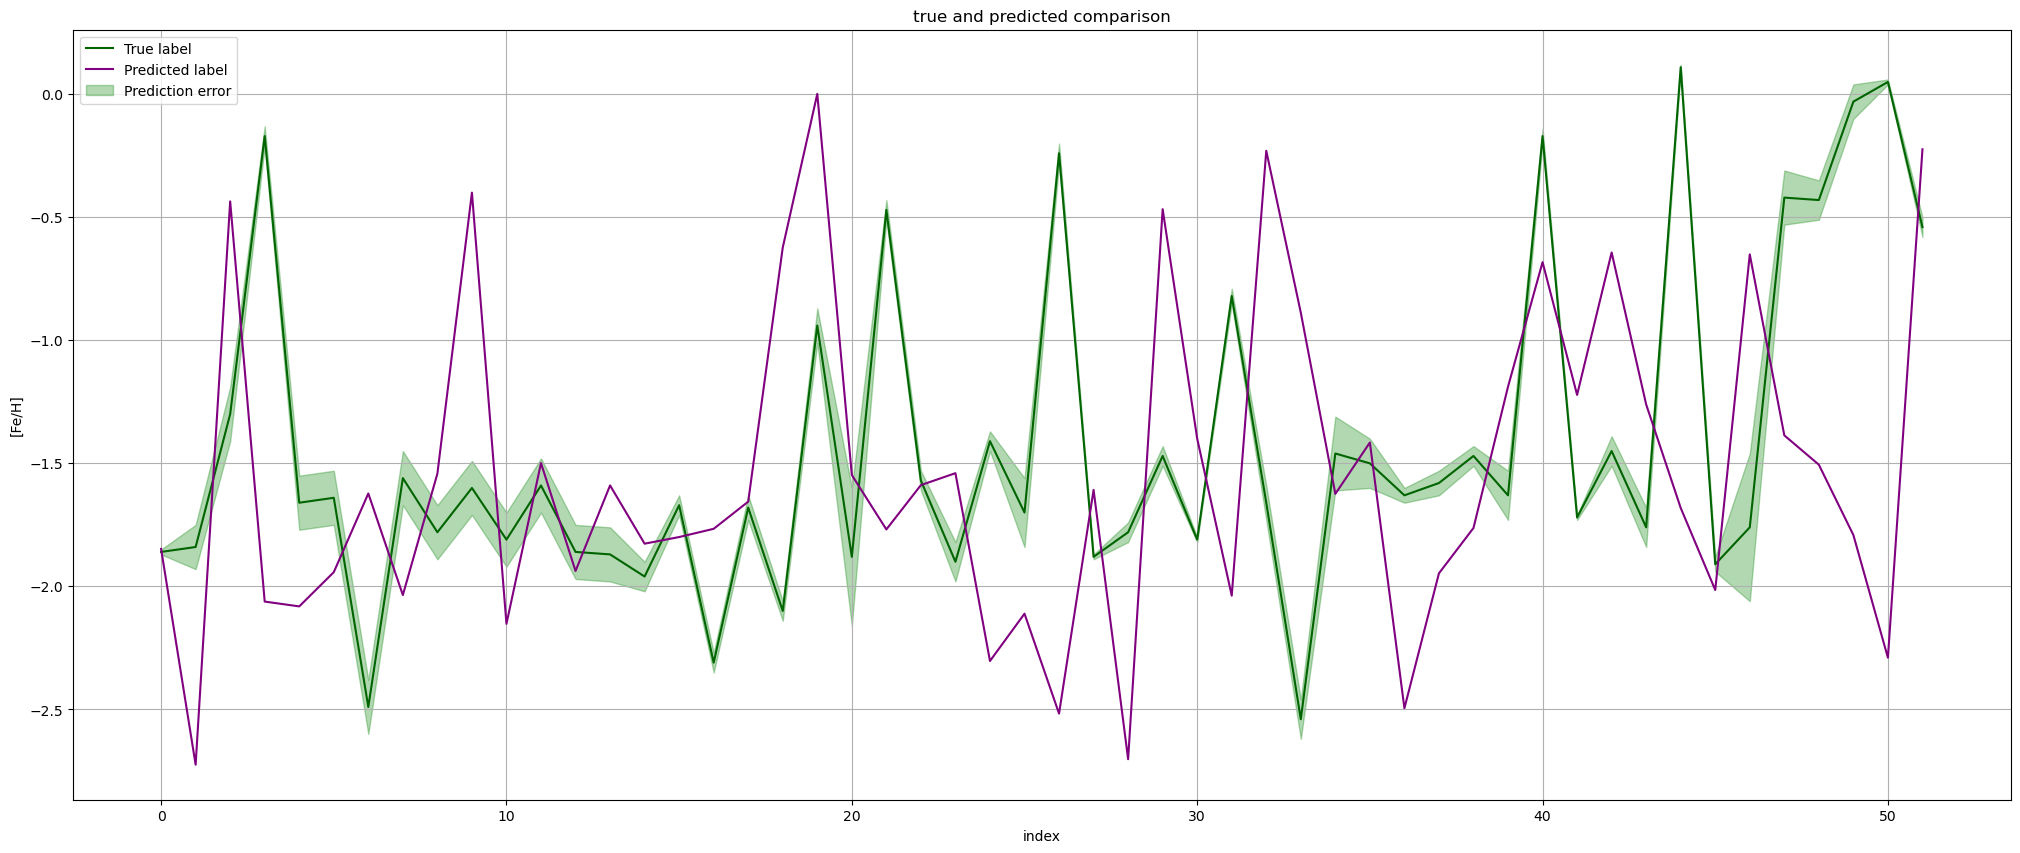

In [ ]:
fig, ax = plt.subplots()




ax.plot(pred_train_true.index, pred_train_true.FeH, color = 'darkgreen', label = 'True label')
ax.plot(pred_train_true.index, pred_train_true.FeH_pre, color='purple', label = 'Predicted label')

ax.fill_between(pred_train_true.index, pred_train_true.FeH - pred_train_true.FeH_e, pred_train_true.FeH + pred_train_true.FeH_e,
                 color='green', alpha=0.3, label = 'Prediction error')


ax.set_xlabel('index')
ax.set_ylabel('[Fe/H]')
ax.set_title('true and predicted comparison')
ax.grid(True)

ax.legend()




In [ ]:
#with open("/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/results_g/best_model_g/model.json") as json_file:
#    model = model_from_json(json_file.read())

#model.load_weights('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/results_g/best_model_g/weights_4.h5')
#input_layer = model.layers[0]
#output_layer = model.layers[-1]
#model.layers[0].trainable = True
#model.layers[-1].trainable = True
#for layer in model.layers[1: -1]:
#    layer.trainable = False
#optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,
#                                         epsilon=1e-07, amsgrad=False)
#loss = tf.keras.losses.MeanSquaredError()
#model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
#model.fit(X_dev, Y_dev, epochs=500,batch_size=256,
#                                sample_weight=weights_dev, initial_epoch=0, verbose=0,
#                                callbacks=callbacks, shuffle=True)#

# 1. wrapper of the parameter file and the model:



In [ ]:
# D in the train parameters shows the training on the default dataset.
def function(train_D = False, predict_crestani = True, train_crestani = False,
             predict_Liu = False, GRU = False, RNN = True)



with open(gfeh.par, 'r') as f:
    for line in f:

        # predict on Crestani data
        if predict_crestani == True:
            data = []
            if line.startswith('--train'):
                out = line.replace('--train', '#--train')
                data.append(out)
            elif line.startswith('#--predict'):
                out = line.replace('#--predict', '--predict')
                data.append(out)
            elif line.startswith('--outdir'):
                outdir = line.split()[1:][0]
                out = line.replace(outdir, 'Crestani/lcfit_crestani/results')
                data.append(out)
            elif line.startswith('--lcdir'):
                lcdir =line.split()[1:]
                out = line.replace(lcdir, 'Crestani/lcfit_crestani/DR3_LC_g')
                data.append(out)
            elif line.startswith('--input_file'):
                input_file = line.split()[1:][0]
                out = line.replace(input_file, 'Crestani/lcfit_crestani/meta.dat')
                data.append(out)
            elif line.startswith('--target_output_file'):
                target_output = line.split()[1:][0]
                out = line.replace(target_output, 'Crestani/lcfit_crestani/target_g.out')
                data.append(out)
            elif line.startswith('--wavebands'):
                band = line.split()[1:][0]
                out = line.replace(band, 'g')
                data.append(out)
            elif line.startswith('--lcfile_suffices'):
                suffices = line.split()[1:]
                out = line.replace(suffices, '.dat')
                data.append(out)


            # Data Parameters
            elif line.startswith('--columns   id period snr_g totamp_g phcov_g Nep_g Nep_i totamp_i costN_i phcov_i snr_i meanmag_g FeH FeH_e'):
                out = line.replace('--columns', '#--columns')
                data.append(out)
            elif line.startswith('#--columns    id period snr totamp phcov Nep meanmag'):
                out = line.replace('#--columns', '--columns')
                data.append(out)
            elif line.startswith('--features    id period totamp_g FeH FeH_e'):
                out = line.replace('--features', '#--features')
                data.append(out)
            elif line.starswith('#--features    id period totamp'):
                out = line.replace('#--features', '--features')
                data.append(out)
            elif line.startswith('--subset    period>0.28 and period<0.98 and totamp_i<1.1 and totamp_g<1.4 and phcov_g>0.85 and'):
                out = line.replace('--subset', '#--subset')
                data.append(out)
            elif line.startswith('            Nep_g>20 and snr_g>30 and FeH>-2.7 and FeH<0.0 and FeH_e<0.3'):
                out = '#'+ line
                data.append(out)
            elif line.startswith('#--subset    period>0.28 and period<0.98 and totamp<1.4 and phcov>0.85 and Nep>20 and snr>30'):
                out = line.replace('#--subset', '--subset')
                data.append(out)
            elif line.startswith('--model '):
                out = line.replace('bilstm2p','bilstm2p')
                data.append(out)





        # predict on Liu data
        elif predict_Liu == True:
            data = []
             if line.startswith('--train'):
                out = line.replace('--train', '#--train')
                data.append(out)
            elif line.startswith('#--predict'):
                out = line.replace('#--predict', '--predict')
                data.append(out)
            elif line.startswith('--outdir'):
                outdir = line.split()[1:][0]
                out = line.replace(outdir, 'Crestani/lcfit_crestani/results')
                data.append(out)
            elif line.startswith('--lcdir'):
                lcdir =line.split()[1:]
                out = line.replace(lcdir, 'Crestani/lcfit_crestani/LC')
                data.append(out)
            elif line.startswith('--input_file'):
                input_file = line.split()[1:][0]
                out = line.replace(input_file, 'Crestani/lcfit_crestani/meta.dat')
                data.append(out)
            elif line.startswith('--target_output_file'):
                target_output = line.split()[1:][0]
                out = line.replace(target_output, 'Crestani/lcfit_crestani/target_g.out')
                data.append(out)
            elif line.startswith('--wavebands'):
                band = line.split()[1:][0]
                out = line.replace(band, 'g')
                data.append(out)
            elif line.startswith('--lcfile_suffices'):
                suffices = line.split()[1:]
                out = line.replace(suffices, '.dat')
                data.append(out)















